In [1]:
# importing libraies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
# Wordcloud
from wordcloud import WordCloud
import seaborn as sns 
sns.set_theme(style="whitegrid")
sns.dark_palette((20, 60, 50), input="husl")
# import interactive libraries
import ipywidgets
# library to create sankey charts.
from pySankey.sankey import sankey 
# Library to ignore warning 
import warnings                     # enable this once the code is finalized.
warnings.filterwarnings("ignore")
# Os library is imported to work with files 
import os

setting the row and column count

In [2]:
# Set display.max_rows to increase the row limit
pd.set_option('display.max_rows', 100)  # Change 100 to the desired row limit

# Set display.max_columns to increase the column limit
pd.set_option('display.max_columns', 50)  # Change 50 to the desired column limit

Importing data
 
 --> here we are importing the data about donors and receivers

In [3]:
# Importing donors data as a dataframe: 
donordata = pd.read_csv(r"C:\Users\lavud\Documents\Careerpedia Advanced\EDA_COMMENTS\donor_data.csv")

In [4]:
reciverdata = pd.read_csv(r"C:\Users\lavud\Documents\Careerpedia Advanced\EDA_COMMENTS\reciver_data.csv")

In [5]:
reciverdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sno             20421 non-null  int64 
 1   DateEncashment  20421 non-null  object
 2   PartyName       20421 non-null  object
 3   AccountNum      20421 non-null  object
 4   Prefix          20421 non-null  object
 5   BondNumber      20421 non-null  int64 
 6   Denominations   20421 non-null  int64 
 7   PayBranchCode   20421 non-null  int64 
 8   PayTeller       20421 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.4+ MB


the bank codes details have been extracted from tis website

--> All the bank branches don't have the authority to issue electoral bonds only few bramnches of SBI banks can issue them and this table contains the details of that bank and based on the branch code we can connect to the reciver and donor data
 

In [6]:
# Importing bank details.bankdata =


In [7]:
bankdata = pd.read_excel(r"C:\Users\lavud\Documents\Careerpedia Advanced\Electoral-Bonddata-EDA-Python--main\RawData\bank_data.xlsx")

peeking into bankdata

In [8]:
bankdata.head()

Sl. No.                           State  \
0        1                           Delhi   
1        2  Haryana, Punjab and Chandigarh   
2        3                 HimachalPradesh   
3        4                Jammu andKashmir   
4        5                     Uttarakhand   

                        Name Of The Branch & Address  Branch Code No.  \
0  New Delhi Main Branch,11, Parliament Street, N...              691   
1  Chandigarh Main Branch,SCO 43-48, Banking Squa...              628   
2  Shimla Main BranchNear Kali Bari Temple, The M...              718   
3  Badami Bagh (Srinagar) BranchBadami Bagh Canto...             2295   
4  Dehra Dun Main Branch4, Convent Road, Dehradun...              630   

  Branch City  
0   New Delhi  
1  Chandigarh  
2      Shimla  
3    Srinagar  
4    Dehradun

In [9]:
bankdata.columns

Index(['Sl. No.', 'State', 'Name Of The Branch & Address', 'Branch Code No.',
       'Branch City'],
      dtype='object')

In [10]:
bankdata.shape

(29, 5)

In [11]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Sl. No.                       29 non-null     int64 
 1   State                         29 non-null     object
 2   Name Of The Branch & Address  29 non-null     object
 3   Branch Code No.               29 non-null     int64 
 4   Branch City                   29 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.3+ KB


In [12]:
bankdata['Branch Code No.'].count()

print(f"There are total 29 banks who can issues electoral bonds.")

There are total 29 banks who can issues electoral bonds.


there are only 29  banks who can issue electoral bonds


adress is of not important or we dont have any plans to use it inn the analysis. i am removing  the columns so that my dataframe is slick and my joins will concise.



In [13]:
# Drop Adress column bankdata
bankdata.drop('Name Of The Branch & Address',axis=1,inplace=True)

In [14]:
bankdata['State'] = bankdata['State'].str.strip()
bankdata['Branch City'] = bankdata['Branch City'].str.strip()

In [15]:
bankdata.drop(['Sl. No.'],axis=1,inplace=True)

In [16]:
bankdata.head()

State  Branch Code No. Branch City
0                           Delhi              691   New Delhi
1  Haryana, Punjab and Chandigarh              628  Chandigarh
2                 HimachalPradesh              718      Shimla
3                Jammu andKashmir             2295    Srinagar
4                     Uttarakhand              630    Dehradun

Looking into donors data setting data types

In [17]:
donordata.head()

SNo                      Urn JournalDate PurchaseDate  ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12  2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12  2019-04-26   
2    3  00001201904120000001166  2019-04-12   2019-04-12  2019-04-26   
3    4  00001201904120000001166  2019-04-12   2019-04-12  2019-04-26   
4    5  00001201904120000001166  2019-04-12   2019-04-12  2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  PayBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000              1   
1  A B C INDIA LIMITED     TL       11447        1000000              1   
2  A B C INDIA LIMITED     TL       11441        1000000              1   
3  A B C INDIA LIMITED     OL        1113         100000              1   
4  A B C INDIA LIMITED     OL        1118         100000              1   

   PayTeller  
0    5899230  
1    5899230  
2    5899230  
3    5899230  
4    5899230

### Some of the names in the purchaser columns are spelled wrongly and same company has bought bonds under different names after due diligince some of the names are changed showed like below.   

|Old Purchaser Name                                             |Replaced Purchaser Name                            |
|---------------------------------------------------------------|---------------------------------------------------|
|'AASHMAN ENERGY PRIVATE LIMITED'                               |'AASHMAN ENERGY PRIVATE LIMITED'                   |
|'AASHMAN ENERGY PVT LTD'                                       |'AASHMAN ENERGY PRIVATE LIMITED'                   |
|'ACHINTYA SOLAR POWER PRIVATE LIMITED'                         |'ACHINTYA SOLAR POWER PRIVATE LIMITED'             |
|'ACHINTYA SOLAR POWER PVT LTD'                                 |'ACHINTYA SOLAR POWER PRIVATE LIMITED'             |
|'APCO INFRATECH PRIVATE LIMITED'                               |'APCO INFRATECH PRIVATE LIMITED'                   |
|'APCO INFRATECH PRIVATE LTD'                                   |'APCO INFRATECH PRIVATE LIMITED'                   |
|'APCO INFRATECH PVT LTD FORMERLY AP'                           |'APCO INFRATECH PRIVATE LIMITED'                   |
|'ASKUS LOGISTICS PRIV'                                         |'ASKUS LOGISTICS PRIVATE LIMITED'                  |
|'ASKUS LOGISTICS PRIVATE LIMITED'                              |'ASKUS LOGISTICS PRIVATE LIMITED'                  |
|'ASKUS LOGISTICS PVT LTD'                                      |'ASKUS LOGISTICS PRIVATE LIMITED'                  |
|'AUROBINDO PHARMA LIMITED'                                     |'AUROBINDO PHARMA LIMITED'                         |
|'AUROBINDO PHARMA LTD'                                         |'AUROBINDO PHARMA LIMITED'                         |
|'AVEES TRADING & FINANCE PVT LTD'                              |'AVEES TRADING AND FINANCE PVT LTD'                |
|'AVEES TRADING AND FINANCE PVT LTD'                            |'AVEES TRADING AND FINANCE PVT LTD'                |
|'AVEES TRADING FINANCE PVT LTD'                                |'AVEES TRADING AND FINANCE PVT LTD'                |
|'BALU IRON & STEEL COMPANY'                                    |'BALU IRON AND STEEL COMPANY'                      |
|'BALU IRON AND STEEL COMPANY'                                  |'BALU IRON AND STEEL COMPANY'                      |
|'BESSEGGEN INFOTECH LLP'                                       |'BESSEGGEN INFOTECH LLP'                           |
|'BESSEGGENINFOTECHLLP'                                         |'BESSEGGEN INFOTECH LLP'                           |
|'BHARTI AIRTEL LIMITED'                                        |'BHARTI AIRTEL LIMITED'                            |
|'BHARTI AIRTEL LIMITEDAIRTEL CURRE NT AC-GCO'                  |'BHARTI AIRTEL LIMITED'                            |
|'CASTAMET WORKS'                                               |'CASTAMET WORKS PRIVATE LIMITED'                   |
|'CASTAMET WORKS PRIVATE LIMITED'                               |'CASTAMET WORKS PRIVATE LIMITED'                   |
|'CHOWGLE AND COMPANY PVT LTD'                                  |'CHOWGULE AND COMPANY PVT LTD'                     |
|'CHOWGULE AND COMPANY PVT LTD'                                 |'CHOWGULE AND COMPANY PVT LTD'                     |
|'CIPLA LIMITED'                                                |'CIPLA LIMITED'                                    |
|'CIPLA LTD'                                                    |'CIPLA LIMITED'                                    |
|'COMFORT TRIMS PRIVATE LIMITED'                                |'COMFORT TRIMS PRIVATE LIMITED'                    |
|'COMFORT TRIMS PRIVATE LIMITED DIVIS'                          |'COMFORT TRIMS PRIVATE LIMITED'                    |
|'CROCHET TRADE AND INVESTMENT PVT L'                           |'CROCHET TRADE AND INVESTMENT PVT '                |
|'CROCHET TRADE AND INVESTMENT PVT LT'                          |'CROCHET TRADE AND INVESTMENT PVT '                |
|'D S ENGINEERING WORKS LLP'                                    |'D S ENGINEERING WORKSHOP LLP'                     |
|'D S ENGINEERING WORKSHOP LLP'                                 |'D S ENGINEERING WORKSHOP LLP'                     |
|'DASAMI LAB PRIVATE LIMITED (FORMERLY HEL IUS LAB PVT LTD)'    |'DASAMI LAB PRIVATE LTD'                           |
|'DASAMI LAB PRIVATE LTD'                                       |'DASAMI LAB PRIVATE LTD'                           |
|'DCM SHRIRAM LIMITED'                                          |'DCM SHRIRAM LIMITED'                              |
|'DCM SHRIRAM LTD'                                              |'DCM SHRIRAM LIMITED'                              |
|'DEMPO IND PVT LTD NAVHIND PAPERSAND PUB'                      |'DEMPO INDUSTRIES PVT LTD'                         |
|'DEMPO INDUSTRIES PVT LTD'                                     |'DEMPO INDUSTRIES PVT LTD'                         |
|'DERIVE TRADING AND RESORTS PRIVATE LIMIT'                     |'DERIVE TRADING AND RESORTS PRIVATE LIMITED'       |
|'DERIVE TRADING AND RESORTS PRIVATE LIMITED'                   |'DERIVE TRADING AND RESORTS PRIVATE LIMITED'       |
|'DIVYESH POWER PRIVATE LIMITED'                                |'DIVYESH POWER PRIVATE LIMITED'                    |
|'DIVYESH POWER PVT LTD'                                        |'DIVYESH POWER PRIVATE LIMITED'                    |
|'DR REDDYS LABORATORIES LIMITED'                               |'DR REDDYS LABORATORIES LIMITED'                   |
|'DR.REDDY'S LABORATORIES LTD'                                  |'DR REDDYS LABORATORIES LIMITED'                   |
|'ELENA RENEWABLE ENERGY PRIVATE LIMITED'                       |'ELENA RENEWABLE ENERGY PRIVATE LIMITED'           |
|'ELENA RENEWABLE ENERGY PVT LTD'                               |'ELENA RENEWABLE ENERGY PRIVATE LIMITED'           |
|'FUTURE GAMING AND HOTEL SERVICES PR'                          |'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED' |
|'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED'             |'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED' |
|'FUTURE GAMING AND HOTEL SERVICES PVT LTD'                     |'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED' |
|'GENUS POWER'                                                  |'GENUS POWER INFRASTRUCTURES LIMITED'              |
|'GENUS POWER INFRASTRUCTURES LIMITED'                          |'GENUS POWER INFRASTRUCTURES LIMITED'              |
|'GENUS POWER INFRASTRUCTURES LTD'                              |'GENUS POWER INFRASTRUCTURES LIMITED'              |
|'GOODLUCK INDIA LIMITED'                                       |'GOODLUCK INDIA LIMITED'                           |
|'GOODLUCK INDIA LTD'                                           |'GOODLUCK INDIA LIMITED'                           |
|'HINDYS LAB PRIVATE LTD'                                       |'HINDYS LAB PRIVATE LTD'                           |
|'HINDYS LAB PVT. LTD. (PREVIOUSLY HIND LI FE SCIENCES PVT LTD)'|'HINDYS LAB PRIVATE LTD'                           |
|'HONOUR LAB LIMITED'                                           |'HONOUR LAB LIMITED'                               |
|'HONOUR LAB LTD'                                               |'HONOUR LAB LIMITED'                               |
|'INORBIT MALLS INDIA PRIVATE LIMIT'                            |'INORBIT MALLS INDIA PRIVATE LIMITED'              |
|'INORBIT MALLS INDIA PRIVATE LIMITED'                          |'INORBIT MALLS INDIA PRIVATE LIMITED'              |
|'INTERGLOBE AIR TRANSPORT LIMITED'                             |'INTERGLOBE AIR TRANSPORT LIMITED'                 |
|'INTERGLOBE AVIATION LIMITED'                                  |'INTERGLOBE AIR TRANSPORT LIMITED'                 |
|'J K CEMENT LIMITED'                                           |'J K CEMENT LIMITED'                               |
|'J K CEMENT LTD.'                                              |'J K CEMENT LIMITED'                               |
|'J.K.CEMENT LTD.'                                              |'J K CEMENT LIMITED'                               |
|'JAI SUSPENSION SYSTEMS L L P'                                 |'JAI SUSPENSION SYSTEMS LLP'                       |
|'JAI SUSPENSION SYSTEMS LLP'                                   |'JAI SUSPENSION SYSTEMS LLP'                       |
|'LAXMI INDUSTRIAL BOTTLING PLAN'                               |'LAXMI INDUSTRIAL BOTTLING PLANT'                  |
|'LAXMI INDUSTRIAL BOTTLING PLANT'                              |'LAXMI INDUSTRIAL BOTTLING PLANT'                  |
|'MADHYA PRADESH WASTE MANAGEMENT PR'                           |'MADHYA PRADESH WASTE MANAGEMENT'                  |
|'MADHYA PRADESH WASTE MANAGEMENT PRI'                          |'MADHYA PRADESH WASTE MANAGEMENT'                  |
|'MEGHA ENGINEERING & INFRASTRUCTURES LIMITED'                  |'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED'    |
|'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED'               |'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED'    |
|'MEGHA ENGINEERING AND INFRASTRUCTURES LTD'                    |'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED'    |
|'MICRO LABS LIMITED'                                           |'MICRO LABS LIMITED'                               |
|'MICRO LABS LTD'                                               |'MICRO LABS LIMITED'                               |
|'MKK METAL SECTIONS P LTD'                                     |'MKK METAL SECTIONS PVT LTD'                       |
|'MKK METAL SECTIONS PVT LTD'                                   |'MKK METAL SECTIONS PVT LTD'                       |
|'MODERN ROAD MAKERS PVT LTD'                                   |'MODERN ROAD MAKERS PVT LTD'                       |
|'MODERN ROAD MAKERS PVT. LTD.'                                 |'MODERN ROAD MAKERS PVT LTD'                       |
|'MOHIT MINERALS LIMITED'                                       |'MOHIT MINERALS LIMITED'                           |
|'MOHIT MINERALS LTD'                                           |'MOHIT MINERALS LIMITED'                           |
|'MY HOME INFRASTRUCTURES PRIVATE LI'                           |'MY HOME INFRASTRUCTURES PVT LTD '                 |
|'MY HOME INFRASTRUCTURES PVT LTD MY'                           |'MY HOME INFRASTRUCTURES PVT LTD '                 |
|'MYTRAH ENERGY INDIA PRIVATE LIMITED'                          |'MYTRAH ENERGY INDIA PRIVATE LIMITED'              |
|'MYTRAH ENERGY(INDIA) PRIVATE LIMITED'                         |'MYTRAH ENERGY INDIA PRIVATE LIMITED'              |
|'NATCO PHARMA LIMITED'                                         |'NATCO PHARMA LIMITED'                             |
|'NATCO PHARMA LTD'                                             |'NATCO PHARMA LIMITED'                             |
|'NAVAYUGA ENGINEERING CO LTD'                                  |'NAVAYUGA ENGINEERING COMPANY LIMITED'             |
|'NAVAYUGA ENGINEERING COMPANY LIMITED'                         |'NAVAYUGA ENGINEERING COMPANY LIMITED'             |
|'NSL SEZ HYDERABAD PRIVATE LIMITED'                            |'NSL SEZ HYDERABAD PRIVATE LIMITED'                |
|'NSL SEZ(HYDERABAD) PRIVATE LIMITED'                           |'NSL SEZ HYDERABAD PRIVATE LIMITED'                |
|'NUVOCO VISTAS CORP. LTD'                                      |'NUVOCO VISTAS CORP LTD'                           |
|'NUVOCO VISTAS CORPORATION LTD'                                |'NUVOCO VISTAS CORP LTD'                           |
|'ORISSA METALIKS PVT LIMITED'                                  |'ORISSA METALIKS PRIVATE LIMITED'                  |
|'ORRISA METALIKS PVT LTD'                                      |'ORISSA METALIKS PRIVATE LIMITED'                  |
|'PALM SHELTER ESTATE DEVELOPMENT LL'                           |'PALM SHELTER ESTATE DEVELOPMENT LLP'              |
|'PALM SHELTER ESTATE DEVELOPMENT LLP'                          |'PALM SHELTER ESTATE DEVELOPMENT LLP'              |
|'PENGUIN TRADING & AGENCIES LIMITED'                           |'PENGUIN TRADING AND AGENCIES LIMITED'             |
|'PENGUIN TRADING AND AGENCIES LTD'                             |'PENGUIN TRADING AND AGENCIES LIMITED'             |
|'PHILIPS CARBON BLACK LTD'                                     |'PHILLIPS CARBON BLACK LIMITED'                    |
|'PHILLIPS CARBON BLACK LIMITED'                                |'PHILLIPS CARBON BLACK LIMITED'                    |
|'PLUTO FINANCE PRIVATE LTD'                                    |'PLUTO FINANCE PRIVATE LIMITED'                    |
|'PLUTO FINANCE PRIVATE LTD.'                                   |'PLUTO FINANCE PRIVATE LIMITED'                    |
|'PRARAMBH SECURITIES PVT LTDOWN A/C'                           |'PRARAMBH SECURITIES PVT LTD'                      |
|'PRARAMBH SECURITIES PVT LTDPROPRIET'                          |'PRARAMBH SECURITIES PVT LTD'                      |
|'PROCURE ADVISORY SERVICES PRIVATE L'                          |'PROCURE ADVISORY SERVICES PRIVATE LTD'            |
|'PROCURE ADVISORY SERVICES PRIVATE LTD'                        |'PROCURE ADVISORY SERVICES PRIVATE LTD'            |
|'R.S.BROTHERS RETAIL INDIA PRIVATE LIMITE D'                   |'R.S.BROTHERS RETAIL INDIA PRIVATE LIMITED'        |
|'R.S.BROTHERS RETIAL INDIA PVT LTD'                            |'R.S.BROTHERS RETAIL INDIA PRIVATE LIMITED'        |
|'RAMESH AGARWAL C S BOTTLING PL'                               |'RAMESH AGARWAL C S BOTTLING PLANT'                |
|'RAMESH AGARWAL C S BOTTLING PLANT'                            |'RAMESH AGARWAL C S BOTTLING PLANT'                |
|'RANISATI MERCANTILES PVT LTD'                                 |'RANISATI MERCANTILES PVT LTD'                     |
|'RANISATI MERCANTILES PVT. LTD.'                               |'RANISATI MERCANTILES PVT LTD'                     |
|'RIPLEY & CO STEVDORING & HANDLING PVT LT D'                   |'RIPLEY AND CO STEVEDORING AND HANDLING PVT LTD'   |
|'RIPLEY AND CO. STEVEDORING & HANDLING PVT LTD'                |'RIPLEY AND CO STEVEDORING AND HANDLING PVT LTD'   |
|'ROSHNI DEALMARK PRIVATE LIMITED'                              |'ROSHNI DEALMARK PRIVATE LIMITED'                  |
|'ROSHNI DEALMARK PRIVATE LTD'                                  |'ROSHNI DEALMARK PRIVATE LIMITED'                  |
|'S K TRADERS'                                                  |'S K TRADING CO.'                                  |
|'S K TRADING CO.'                                              |'S K TRADING CO.'                                  |
|'SELMAR LAB PRIVATE LIMITED'                                   |'SELMAR LAB PRIVATE LIMITED'                       |
|'SELMAR LAB PRIVATE LTD'                                       |'SELMAR LAB PRIVATE LIMITED'                       |
|'SENGUPTA AND SENGUPTA PRIVATE LIMIT'                          |'SENGUPTA AND SENGUPTA PRIVATE LIMIT'              |
|'SENGUPTA AND SENGUPTA PVT LTD'                                |'SENGUPTA AND SENGUPTA PRIVATE LIMIT'              |
|'SHREE CEMENT LIMITED'                                         |'SHREE CEMENT LIMITED'                             |
|'SHREE CEMENT LTD'                                             |'SHREE CEMENT LIMITED'                             |
|'SKEIRON RENEWABLE ENERGY AMIDYALA P'                          |'SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED'|
|'SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED'            |'SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED'|
|'SOM DISTILERIES PRIVATE LTD'                                  |'SOM DISTILLERIES PVT LTD'                         |
|'SOM DISTILLERIES BREWERIES LIMITED'                           |'SOM DISTILLERIES PVT LTD'                         |
|'SOM DISTILLERIES PVT LTD'                                     |'SOM DISTILLERIES PVT LTD'                         |
|'SPECO INFRASTRUCTURE'                                         |'SPECO INFRASTRUCTURES'                            |
|'SPECO INFRASTRUCTURES'                                        |'SPECO INFRASTRUCTURES'                            |
|'SRI SIDDHARTH INFRATECH & SERVICES(I) PVT LTD'                |'SRI SIDDHARTH INFRATECH AND SERVICES PVT LTD'     |
|'SRI SIDDHARTH INFRATECH AND SERVICES I P'                     |'SRI SIDDHARTH INFRATECH AND SERVICES PVT LTD'     |
|'SUN PHARMA LABORATORIES LIMTED'                               |'SUN PHARMA LABORATORIES LIMTED'                   |
|'SUN PHARMA LABORATORIES LTD'                                  |'SUN PHARMA LABORATORIES LIMTED'                   |
|'THRIVENI EARTH MOVERS PVT LTD'                                |'THRIVENI EARTH MOVERS PVT LTD'                    |
|'THRIVENI EARTHMOVERS PVT LTD'                                 |'THRIVENI EARTH MOVERS PVT LTD'                    |
|'TORRENT PHARMACEUTICALS LIMITED'                              |'TORRENT PHARMACEUTICALS LIMITED'                  |
|'TORRENT PHARMACEUTICALS LTD'                                  |'TORRENT PHARMACEUTICALS LIMITED'                  |
|'TORRENT POWER LIMITED'                                        |'TORRENT POWER LIMITED'                            |
|'TORRENT POWER LTD'                                            |'TORRENT POWER LIMITED'                            |
|'TRANSWAYS EXIM PRIVATE LIMITED'                               |'TRANSWAYS EXIM PRIVATE LIMITED'                   |
|'TRANSWAYS EXIM PRIVATE LTD'                                   |'TRANSWAYS EXIM PRIVATE LIMITED'                   |
|'TRANSWAYS EXIM PVT LTD'                                       |'TRANSWAYS EXIM PRIVATE LIMITED'                   |
|'TRIDENT LIMITED'                                              |'TRIDENT LIMITED'                                  |
|'TRIDENT LIMITED {FORMERLY ABHISHEK INDUS TRIES LIMITED}'      |'TRIDENT LIMITED'                                  |
|'ULTRA TECH CEMENT LIMITED'                                    |'ULTRA TECH CEMENT LIMITED'                        |
|'ULTRATECHCEMENTSLTD'                                          |'ULTRA TECH CEMENT LIMITED'                        |
|'UTKAL ALUMINA INTERNATIONAL LIMITED'                          |'UTKAL ALUMINA INTERNATIONAL LIMITED'              |
|'UTKAL ALUMINA INTERNATIONAL LTD'                              |'UTKAL ALUMINA INTERNATIONAL LIMITED'              |
|'VARAS INTERNATIONAL PRIVATE LIMITED'                          |'VARAS INTERNATIONAL PRIVATE LIMITED'              |
|'VARAS INTERNATIONAL PVT LTD'                                  |'VARAS INTERNATIONAL PRIVATE LIMITED'              |
|'VARDHMAN TEXTILES LIMITED'                                    |'VARDHMAN TEXTILES LIMITED'                        |
|'VARDHMAN TEXTILES LTD'                                        |'VARDHMAN TEXTILES LIMITED'                        |
|'VEDANTA LIMITED'                                              |'VEDANTA LIMITED'                                  |
|'VEDANTA LTD'                                                  |'VEDANTA LIMITED'                                  |
|'WARORA CHANDRAPUR BALLARPUR TOLLRO'                           |'WARORA CHANDRAPUR BALLARPUR TOLL ROAD'            |
|'WARORA CHANDRAPUR BALLARPUR TOLLROA'                          |'WARORA CHANDRAPUR BALLARPUR TOLL ROAD'            |
|'WELSPUN CORP LIMITED'                                         |'WELSPUN CORP LIMITED'                             |
|'WELSPUN CORP LTD'                                             |'WELSPUN CORP LIMITED'                             |
|'ZUVAN ENERGY PRIVATE LIMITED'                                 |'ZUVAN ENERGY PRIVATE LIMITED'                     |
|'ZUVAN ENERGY PVT LTD'                                         |'ZUVAN ENERGY PRIVATE LIMITED'                     |
|'GREENKO RAYALA WIND POWER PVT LTD'                            |'GREENKO RAYALA WIND POWER PRIVATE LIMITED'        |
|'GREENKO RAYALA WIND POWER PRIVATE LIMITE D'                   |'GREENKO RAYALA WIND POWER PRIVATE LIMITED'        |

In [18]:
# replacing the purchaser names 
donordata['Purchaser'].replace('AASHMAN ENERGY PRIVATE LIMITED','AASHMAN ENERGY PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('AASHMAN ENERGY PVT LTD','AASHMAN ENERGY PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('ACHINTYA SOLAR POWER PRIVATE LIMITED','ACHINTYA SOLAR POWER PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('ACHINTYA SOLAR POWER PVT LTD','ACHINTYA SOLAR POWER PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('APCO INFRATECH PRIVATE LIMITED','APCO INFRATECH PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('APCO INFRATECH PRIVATE LTD','APCO INFRATECH PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('APCO INFRATECH PVT LTD FORMERLY AP','APCO INFRATECH PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('ASKUS LOGISTICS PRIV','ASKUS LOGISTICS PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('ASKUS LOGISTICS PRIVATE LIMITED','ASKUS LOGISTICS PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('ASKUS LOGISTICS PVT LTD','ASKUS LOGISTICS PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('AUROBINDO PHARMA LIMITED','AUROBINDO PHARMA LIMITED',inplace=True)
donordata['Purchaser'].replace('AUROBINDO PHARMA LTD','AUROBINDO PHARMA LIMITED',inplace=True)
donordata['Purchaser'].replace('AVEES TRADING & FINANCE PVT LTD','AVEES TRADING AND FINANCE PVT LTD',inplace=True)
donordata['Purchaser'].replace('AVEES TRADING AND FINANCE PVT LTD','AVEES TRADING AND FINANCE PVT LTD',inplace=True)
donordata['Purchaser'].replace('AVEES TRADING FINANCE PVT LTD','AVEES TRADING AND FINANCE PVT LTD',inplace=True)
donordata['Purchaser'].replace('BALU IRON & STEEL COMPANY','BALU IRON AND STEEL COMPANY',inplace=True)
donordata['Purchaser'].replace('BALU IRON AND STEEL COMPANY','BALU IRON AND STEEL COMPANY',inplace=True)
donordata['Purchaser'].replace('BESSEGGEN INFOTECH LLP','BESSEGGEN INFOTECH LLP',inplace=True)
donordata['Purchaser'].replace('BESSEGGENINFOTECHLLP','BESSEGGEN INFOTECH LLP',inplace=True)
donordata['Purchaser'].replace('BHARTI AIRTEL LIMITED','BHARTI AIRTEL LIMITED',inplace=True)
donordata['Purchaser'].replace('BHARTI AIRTEL LIMITEDAIRTEL CURRE NT AC-GCO','BHARTI AIRTEL LIMITED',inplace=True)
donordata['Purchaser'].replace('CASTAMET WORKS','CASTAMET WORKS PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('CASTAMET WORKS PRIVATE LIMITED','CASTAMET WORKS PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('CHOWGLE AND COMPANY PVT LTD','CHOWGULE AND COMPANY PVT LTD',inplace=True)
donordata['Purchaser'].replace('CHOWGULE AND COMPANY PVT LTD','CHOWGULE AND COMPANY PVT LTD',inplace=True)
donordata['Purchaser'].replace('CIPLA LIMITED','CIPLA LIMITED',inplace=True)
donordata['Purchaser'].replace('CIPLA LTD','CIPLA LIMITED',inplace=True)
donordata['Purchaser'].replace('COMFORT TRIMS PRIVATE LIMITED','COMFORT TRIMS PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('COMFORT TRIMS PRIVATE LIMITED DIVIS','COMFORT TRIMS PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('CROCHET TRADE AND INVESTMENT PVT L','CROCHET TRADE AND INVESTMENT PVT ',inplace=True)
donordata['Purchaser'].replace('CROCHET TRADE AND INVESTMENT PVT LT','CROCHET TRADE AND INVESTMENT PVT ',inplace=True)
donordata['Purchaser'].replace('D S ENGINEERING WORKS LLP','D S ENGINEERING WORKSHOP LLP',inplace=True)
donordata['Purchaser'].replace('D S ENGINEERING WORKSHOP LLP','D S ENGINEERING WORKSHOP LLP',inplace=True)
donordata['Purchaser'].replace('DASAMI LAB PRIVATE LIMITED (FORMERLY HEL IUS LAB PVT LTD)','DASAMI LAB PRIVATE LTD',inplace=True)
donordata['Purchaser'].replace('DASAMI LAB PRIVATE LTD','DASAMI LAB PRIVATE LTD',inplace=True)
donordata['Purchaser'].replace('DCM SHRIRAM LIMITED','DCM SHRIRAM LIMITED',inplace=True)
donordata['Purchaser'].replace('DCM SHRIRAM LTD','DCM SHRIRAM LIMITED',inplace=True)
donordata['Purchaser'].replace('DEMPO IND PVT LTD NAVHIND PAPERSAND PUB','DEMPO INDUSTRIES PVT LTD',inplace=True)
donordata['Purchaser'].replace('DEMPO INDUSTRIES PVT LTD','DEMPO INDUSTRIES PVT LTD',inplace=True)
donordata['Purchaser'].replace('DERIVE TRADING AND RESORTS PRIVATE LIMIT','DERIVE TRADING AND RESORTS PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('DERIVE TRADING AND RESORTS PRIVATE LIMITED','DERIVE TRADING AND RESORTS PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('DIVYESH POWER PRIVATE LIMITED','DIVYESH POWER PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('DIVYESH POWER PVT LTD','DIVYESH POWER PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('DR REDDYS LABORATORIES LIMITED','DR REDDYS LABORATORIES LIMITED',inplace=True)
donordata['Purchaser'].replace("DR.REDDY'S LABORATORIES LTD",'DR REDDYS LABORATORIES LIMITED',inplace=True)
donordata['Purchaser'].replace('ELENA RENEWABLE ENERGY PRIVATE LIMITED','ELENA RENEWABLE ENERGY PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('ELENA RENEWABLE ENERGY PVT LTD','ELENA RENEWABLE ENERGY PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('FUTURE GAMING AND HOTEL SERVICES PR','FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED','FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('FUTURE GAMING AND HOTEL SERVICES PVT LTD','FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('GENUS POWER','GENUS POWER INFRASTRUCTURES LIMITED',inplace=True)
donordata['Purchaser'].replace('GENUS POWER INFRASTRUCTURES LIMITED','GENUS POWER INFRASTRUCTURES LIMITED',inplace=True)
donordata['Purchaser'].replace('GENUS POWER INFRASTRUCTURES LTD','GENUS POWER INFRASTRUCTURES LIMITED',inplace=True)
donordata['Purchaser'].replace('GOODLUCK INDIA LIMITED','GOODLUCK INDIA LIMITED',inplace=True)
donordata['Purchaser'].replace('GOODLUCK INDIA LTD','GOODLUCK INDIA LIMITED',inplace=True)
donordata['Purchaser'].replace('HINDYS LAB PRIVATE LTD','HINDYS LAB PRIVATE LTD',inplace=True)
donordata['Purchaser'].replace('HINDYS LAB PVT. LTD. (PREVIOUSLY HIND LI FE SCIENCES PVT LTD)','HINDYS LAB PRIVATE LTD',inplace=True)
donordata['Purchaser'].replace('HONOUR LAB LIMITED','HONOUR LAB LIMITED',inplace=True)
donordata['Purchaser'].replace('HONOUR LAB LTD','HONOUR LAB LIMITED',inplace=True)
donordata['Purchaser'].replace('INORBIT MALLS INDIA PRIVATE LIMIT','INORBIT MALLS INDIA PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('INORBIT MALLS INDIA PRIVATE LIMITED','INORBIT MALLS INDIA PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('INTERGLOBE AIR TRANSPORT LIMITED','INTERGLOBE AIR TRANSPORT LIMITED',inplace=True)
donordata['Purchaser'].replace('INTERGLOBE AVIATION LIMITED','INTERGLOBE AIR TRANSPORT LIMITED',inplace=True)
donordata['Purchaser'].replace('J K CEMENT LIMITED','J K CEMENT LIMITED',inplace=True)
donordata['Purchaser'].replace('J K CEMENT LTD.','J K CEMENT LIMITED',inplace=True)
donordata['Purchaser'].replace('J.K.CEMENT LTD.','J K CEMENT LIMITED',inplace=True)
donordata['Purchaser'].replace('JAI SUSPENSION SYSTEMS L L P','JAI SUSPENSION SYSTEMS LLP',inplace=True)
donordata['Purchaser'].replace('JAI SUSPENSION SYSTEMS LLP','JAI SUSPENSION SYSTEMS LLP',inplace=True)
donordata['Purchaser'].replace('LAXMI INDUSTRIAL BOTTLING PLAN','LAXMI INDUSTRIAL BOTTLING PLANT',inplace=True)
donordata['Purchaser'].replace('LAXMI INDUSTRIAL BOTTLING PLANT','LAXMI INDUSTRIAL BOTTLING PLANT',inplace=True)
donordata['Purchaser'].replace('MADHYA PRADESH WASTE MANAGEMENT PR','MADHYA PRADESH WASTE MANAGEMENT',inplace=True)
donordata['Purchaser'].replace('MADHYA PRADESH WASTE MANAGEMENT PRI','MADHYA PRADESH WASTE MANAGEMENT',inplace=True)
donordata['Purchaser'].replace('MEGHA ENGINEERING & INFRASTRUCTURES LIMITED','MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED',inplace=True)
donordata['Purchaser'].replace('MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED','MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED',inplace=True)
donordata['Purchaser'].replace('MEGHA ENGINEERING AND INFRASTRUCTURES LTD','MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED',inplace=True)
donordata['Purchaser'].replace('MICRO LABS LIMITED','MICRO LABS LIMITED',inplace=True)
donordata['Purchaser'].replace('MICRO LABS LTD','MICRO LABS LIMITED',inplace=True)
donordata['Purchaser'].replace('MKK METAL SECTIONS P LTD','MKK METAL SECTIONS PVT LTD',inplace=True)
donordata['Purchaser'].replace('MKK METAL SECTIONS PVT LTD','MKK METAL SECTIONS PVT LTD',inplace=True)
donordata['Purchaser'].replace('MODERN ROAD MAKERS PVT LTD','MODERN ROAD MAKERS PVT LTD',inplace=True)
donordata['Purchaser'].replace('MODERN ROAD MAKERS PVT. LTD.','MODERN ROAD MAKERS PVT LTD',inplace=True)
donordata['Purchaser'].replace('MOHIT MINERALS LIMITED','MOHIT MINERALS LIMITED',inplace=True)
donordata['Purchaser'].replace('MOHIT MINERALS LTD','MOHIT MINERALS LIMITED',inplace=True)
donordata['Purchaser'].replace('MY HOME INFRASTRUCTURES PRIVATE LI','MY HOME INFRASTRUCTURES PVT LTD ',inplace=True)
donordata['Purchaser'].replace('MY HOME INFRASTRUCTURES PVT LTD MY','MY HOME INFRASTRUCTURES PVT LTD ',inplace=True)
donordata['Purchaser'].replace('MYTRAH ENERGY INDIA PRIVATE LIMITED','MYTRAH ENERGY INDIA PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('MYTRAH ENERGY(INDIA) PRIVATE LIMITED','MYTRAH ENERGY INDIA PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('NATCO PHARMA LIMITED','NATCO PHARMA LIMITED',inplace=True)
donordata['Purchaser'].replace('NATCO PHARMA LTD','NATCO PHARMA LIMITED',inplace=True)
donordata['Purchaser'].replace('NAVAYUGA ENGINEERING CO LTD','NAVAYUGA ENGINEERING COMPANY LIMITED',inplace=True)
donordata['Purchaser'].replace('NAVAYUGA ENGINEERING COMPANY LIMITED','NAVAYUGA ENGINEERING COMPANY LIMITED',inplace=True)
donordata['Purchaser'].replace('NSL SEZ HYDERABAD PRIVATE LIMITED','NSL SEZ HYDERABAD PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('NSL SEZ(HYDERABAD) PRIVATE LIMITED','NSL SEZ HYDERABAD PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('NUVOCO VISTAS CORP. LTD','NUVOCO VISTAS CORP LTD',inplace=True)
donordata['Purchaser'].replace('NUVOCO VISTAS CORPORATION LTD','NUVOCO VISTAS CORP LTD',inplace=True)
donordata['Purchaser'].replace('ORISSA METALIKS PVT LIMITED','ORISSA METALIKS PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('ORRISA METALIKS PVT LTD','ORISSA METALIKS PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('PALM SHELTER ESTATE DEVELOPMENT LL','PALM SHELTER ESTATE DEVELOPMENT LLP',inplace=True)
donordata['Purchaser'].replace('PALM SHELTER ESTATE DEVELOPMENT LLP','PALM SHELTER ESTATE DEVELOPMENT LLP',inplace=True)
donordata['Purchaser'].replace('PENGUIN TRADING & AGENCIES LIMITED','PENGUIN TRADING AND AGENCIES LIMITED',inplace=True)
donordata['Purchaser'].replace('PENGUIN TRADING AND AGENCIES LTD','PENGUIN TRADING AND AGENCIES LIMITED',inplace=True)
donordata['Purchaser'].replace('PHILIPS CARBON BLACK LTD','PHILLIPS CARBON BLACK LIMITED',inplace=True)
donordata['Purchaser'].replace('PHILLIPS CARBON BLACK LIMITED','PHILLIPS CARBON BLACK LIMITED',inplace=True)
donordata['Purchaser'].replace('PLUTO FINANCE PRIVATE LTD','PLUTO FINANCE PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('PLUTO FINANCE PRIVATE LTD.','PLUTO FINANCE PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('PRARAMBH SECURITIES PVT LTDOWN A/C','PRARAMBH SECURITIES PVT LTD',inplace=True)
donordata['Purchaser'].replace('PRARAMBH SECURITIES PVT LTDPROPRIET','PRARAMBH SECURITIES PVT LTD',inplace=True)
donordata['Purchaser'].replace('PROCURE ADVISORY SERVICES PRIVATE L','PROCURE ADVISORY SERVICES PRIVATE LTD',inplace=True)
donordata['Purchaser'].replace('PROCURE ADVISORY SERVICES PRIVATE LTD','PROCURE ADVISORY SERVICES PRIVATE LTD',inplace=True)
donordata['Purchaser'].replace('R.S.BROTHERS RETAIL INDIA PRIVATE LIMITE D','R.S.BROTHERS RETAIL INDIA PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('R.S.BROTHERS RETIAL INDIA PVT LTD','R.S.BROTHERS RETAIL INDIA PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('RAMESH AGARWAL C S BOTTLING PL','RAMESH AGARWAL C S BOTTLING PLANT',inplace=True)
donordata['Purchaser'].replace('RAMESH AGARWAL C S BOTTLING PLANT','RAMESH AGARWAL C S BOTTLING PLANT',inplace=True)
donordata['Purchaser'].replace('RANISATI MERCANTILES PVT LTD','RANISATI MERCANTILES PVT LTD',inplace=True)
donordata['Purchaser'].replace('RANISATI MERCANTILES PVT. LTD.','RANISATI MERCANTILES PVT LTD',inplace=True)
donordata['Purchaser'].replace('RIPLEY & CO STEVDORING & HANDLING PVT LT D','RIPLEY AND CO STEVEDORING AND HANDLING PVT LTD',inplace=True)
donordata['Purchaser'].replace('RIPLEY AND CO. STEVEDORING & HANDLING PVT LTD','RIPLEY AND CO STEVEDORING AND HANDLING PVT LTD',inplace=True)
donordata['Purchaser'].replace('ROSHNI DEALMARK PRIVATE LIMITED','ROSHNI DEALMARK PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('ROSHNI DEALMARK PRIVATE LTD','ROSHNI DEALMARK PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('S K TRADERS','S K TRADING CO.',inplace=True)
donordata['Purchaser'].replace('S K TRADING CO.','S K TRADING CO.',inplace=True)
donordata['Purchaser'].replace('SELMAR LAB PRIVATE LIMITED','SELMAR LAB PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('SELMAR LAB PRIVATE LTD','SELMAR LAB PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('SENGUPTA AND SENGUPTA PRIVATE LIMIT','SENGUPTA AND SENGUPTA PRIVATE LIMIT',inplace=True)
donordata['Purchaser'].replace('SENGUPTA AND SENGUPTA PVT LTD','SENGUPTA AND SENGUPTA PRIVATE LIMIT',inplace=True)
donordata['Purchaser'].replace('SHREE CEMENT LIMITED','SHREE CEMENT LIMITED',inplace=True)
donordata['Purchaser'].replace('SHREE CEMENT LTD','SHREE CEMENT LIMITED',inplace=True)
donordata['Purchaser'].replace('SKEIRON RENEWABLE ENERGY AMIDYALA P','SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED','SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('SOM DISTILERIES PRIVATE LTD','SOM DISTILLERIES PVT LTD',inplace=True)
donordata['Purchaser'].replace('SOM DISTILLERIES BREWERIES LIMITED','SOM DISTILLERIES PVT LTD',inplace=True)
donordata['Purchaser'].replace('SOM DISTILLERIES PVT LTD','SOM DISTILLERIES PVT LTD',inplace=True)
donordata['Purchaser'].replace('SPECO INFRASTRUCTURE','SPECO INFRASTRUCTURES',inplace=True)
donordata['Purchaser'].replace('SPECO INFRASTRUCTURES','SPECO INFRASTRUCTURES',inplace=True)
donordata['Purchaser'].replace('SRI SIDDHARTH INFRATECH & SERVICES(I) PVT LTD','SRI SIDDHARTH INFRATECH AND SERVICES PVT LTD',inplace=True)
donordata['Purchaser'].replace('SRI SIDDHARTH INFRATECH AND SERVICES I P','SRI SIDDHARTH INFRATECH AND SERVICES PVT LTD',inplace=True)
donordata['Purchaser'].replace('SUN PHARMA LABORATORIES LIMTED','SUN PHARMA LABORATORIES LIMTED',inplace=True)
donordata['Purchaser'].replace('SUN PHARMA LABORATORIES LTD','SUN PHARMA LABORATORIES LIMTED',inplace=True)
donordata['Purchaser'].replace('THRIVENI EARTH MOVERS PVT LTD','THRIVENI EARTH MOVERS PVT LTD',inplace=True)
donordata['Purchaser'].replace('THRIVENI EARTHMOVERS PVT LTD','THRIVENI EARTH MOVERS PVT LTD',inplace=True)
donordata['Purchaser'].replace('TORRENT PHARMACEUTICALS LIMITED','TORRENT PHARMACEUTICALS LIMITED',inplace=True)
donordata['Purchaser'].replace('TORRENT PHARMACEUTICALS LTD','TORRENT PHARMACEUTICALS LIMITED',inplace=True)
donordata['Purchaser'].replace('TORRENT POWER LIMITED','TORRENT POWER LIMITED',inplace=True)
donordata['Purchaser'].replace('TORRENT POWER LTD','TORRENT POWER LIMITED',inplace=True)
donordata['Purchaser'].replace('TRANSWAYS EXIM PRIVATE LIMITED','TRANSWAYS EXIM PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('TRANSWAYS EXIM PRIVATE LTD','TRANSWAYS EXIM PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('TRANSWAYS EXIM PVT LTD','TRANSWAYS EXIM PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('TRIDENT LIMITED','TRIDENT LIMITED',inplace=True)
donordata['Purchaser'].replace('TRIDENT LIMITED {FORMERLY ABHISHEK INDUS TRIES LIMITED}','TRIDENT LIMITED',inplace=True)
donordata['Purchaser'].replace('ULTRA TECH CEMENT LIMITED','ULTRA TECH CEMENT LIMITED',inplace=True)
donordata['Purchaser'].replace('ULTRATECHCEMENTSLTD','ULTRA TECH CEMENT LIMITED',inplace=True)
donordata['Purchaser'].replace('UTKAL ALUMINA INTERNATIONAL LIMITED','UTKAL ALUMINA INTERNATIONAL LIMITED',inplace=True)
donordata['Purchaser'].replace('UTKAL ALUMINA INTERNATIONAL LTD','UTKAL ALUMINA INTERNATIONAL LIMITED',inplace=True)
donordata['Purchaser'].replace('VARAS INTERNATIONAL PRIVATE LIMITED','VARAS INTERNATIONAL PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('VARAS INTERNATIONAL PVT LTD','VARAS INTERNATIONAL PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('VARDHMAN TEXTILES LIMITED','VARDHMAN TEXTILES LIMITED',inplace=True)
donordata['Purchaser'].replace('VARDHMAN TEXTILES LTD','VARDHMAN TEXTILES LIMITED',inplace=True)
donordata['Purchaser'].replace('VEDANTA LIMITED','VEDANTA LIMITED',inplace=True)
donordata['Purchaser'].replace('VEDANTA LTD','VEDANTA LIMITED',inplace=True)
donordata['Purchaser'].replace('WARORA CHANDRAPUR BALLARPUR TOLLRO','WARORA CHANDRAPUR BALLARPUR TOLL ROAD',inplace=True)
donordata['Purchaser'].replace('WARORA CHANDRAPUR BALLARPUR TOLLROA','WARORA CHANDRAPUR BALLARPUR TOLL ROAD',inplace=True)
donordata['Purchaser'].replace('WELSPUN CORP LIMITED','WELSPUN CORP LIMITED',inplace=True)
donordata['Purchaser'].replace('WELSPUN CORP LTD','WELSPUN CORP LIMITED',inplace=True)
donordata['Purchaser'].replace('ZUVAN ENERGY PRIVATE LIMITED','ZUVAN ENERGY PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('ZUVAN ENERGY PVT LTD','ZUVAN ENERGY PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('GREENKO RAYALA WIND POWER PRIVATE LIMITE D','GREENKO RAYALA WIND POWER PRIVATE LIMITED',inplace=True)
donordata['Purchaser'].replace('GREENKO RAYALA WIND POWER PVT LTD','GREENKO RAYALA WIND POWER PRIVATE LIMITED',inplace=True)


In [19]:
donordata.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller'],
      dtype='object')

In [20]:
donordata.shape

(18871, 11)

we have 18,871 Records in donor table

In [21]:
donordata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SNo            18871 non-null  int64 
 1   Urn            18871 non-null  object
 2   JournalDate    18871 non-null  object
 3   PurchaseDate   18871 non-null  object
 4   ExpiryDate     18871 non-null  object
 5   Purchaser      18871 non-null  object
 6   Prefix         18871 non-null  object
 7   BondNumber     18871 non-null  int64 
 8   Denominations  18871 non-null  int64 
 9   PayBranchCode  18871 non-null  int64 
 10  PayTeller      18871 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.6+ MB


In [22]:
donordata['ExpiryDate'] = pd.to_datetime(donordata['ExpiryDate'])
donordata['JournalDate'] = pd.to_datetime(donordata['JournalDate'])
donordata['PurchaseDate'] = pd.to_datetime(donordata['PurchaseDate'])

In [23]:
donordata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SNo            18871 non-null  int64         
 1   Urn            18871 non-null  object        
 2   JournalDate    18871 non-null  datetime64[ns]
 3   PurchaseDate   18871 non-null  datetime64[ns]
 4   ExpiryDate     18871 non-null  datetime64[ns]
 5   Purchaser      18871 non-null  object        
 6   Prefix         18871 non-null  object        
 7   BondNumber     18871 non-null  int64         
 8   Denominations  18871 non-null  int64         
 9   PayBranchCode  18871 non-null  int64         
 10  PayTeller      18871 non-null  int64         
dtypes: datetime64[ns](3), int64(5), object(3)
memory usage: 1.6+ MB


In [24]:
donordata.head(2)

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  PayBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000              1   
1  A B C INDIA LIMITED     TL       11447        1000000              1   

   PayTeller  
0    5899230  
1    5899230

In [25]:
# Striping purchaser column --> cleaning the columns
donordata['Purchaser'] = donordata['Purchaser'].str.strip()

In [26]:
# Rename the columns to decrease the confusion on the columns names
donordata.rename(columns={'PayTeller':'IssueTeller'})

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0          1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1          2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
2          3  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
3          4  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
4          5  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
...      ...                      ...         ...          ...        ...   
18866  18867  00001202401110000003729  2024-01-11   2024-01-11 2024-01-25   
18867  18868  00001202401110000003729  2024-01-11   2024-01-11 2024-01-25   
18868  18869  00001202401110000003729  2024-01-11   2024-01-11 2024-01-25   
18869  18870  00001202401110000003729  2024-01-11   2024-01-11 2024-01-25   
18870  18871  00001202401110000003729  2024-01-11   2024-01-11 2024-01-25   

                            Purchaser Prefix  BondNumber  Denominations  \
0                 A B C INDIA LIMITED     TL       11448        1000000   
1                 A B C INDIA LIMITED     TL       11447        1000000   
2                 A B C INDIA LIMITED     TL       11441        1000000   
3                 A B C INDIA LIMITED     OL        1113         100000   
4                 A B C INDIA LIMITED     OL        1118         100000   
...                               ...    ...         ...            ...   
18866  WESTWELL GASES PRIVATE LIMITED     OC       15695       10000000   
18867  WESTWELL GASES PRIVATE LIMITED     OC       15693       10000000   
18868  WESTWELL GASES PRIVATE LIMITED     OC       15697       10000000   
18869  WESTWELL GASES PRIVATE LIMITED     OC       17803       10000000   
18870  WESTWELL GASES PRIVATE LIMITED     OC       15691       10000000   

       PayBranchCode  IssueTeller  
0                  1      5899230  
1                  1      5899230  
2                  1      5899230  
3                  1      5899230  
4                  1      5899230  
...              ...          ...  
18866              1      5898161  
18867              1      5898161  
18868              1      5898161  
18869              1      5898161  
18870              1      5898161  

[18871 rows x 11 columns]

In [27]:
donordata.head(2)

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  PayBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000              1   
1  A B C INDIA LIMITED     TL       11447        1000000              1   

   PayTeller  
0    5899230  
1    5899230

In [28]:
donordata_df = pd.merge(donordata,
                        bankdata,
                        how= "inner",
                        left_on= "PayBranchCode",
                        right_on= "Branch Code No.")

In [29]:
donordata.head(2)

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  PayBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000              1   
1  A B C INDIA LIMITED     TL       11447        1000000              1   

   PayTeller  
0    5899230  
1    5899230

In [30]:
donordata_df.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller',
       'State', 'Branch Code No.', 'Branch City'],
      dtype='object')

creating composite key

  --> we are creating a composite key which is a combination of prefix and Bondnumber which act as a primary and will be the commom column in donor and reciver table.

  the prefix column and bondnumber column combination  acts as unique for a bond.  these columns are common in both donor and recivers table. so we are creating this columns in both the tables and we can join it or make connection for who paid for each party. 

In [31]:
# Creating a commong Key to connect Donors and recivers data
donordata['unique_key'] = donordata['Prefix'].astype(str) + donordata['BondNumber'].astype(str) 
donordata.head(2)

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  PayBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000              1   
1  A B C INDIA LIMITED     TL       11447        1000000              1   

   PayTeller unique_key  
0    5899230    TL11448  
1    5899230    TL11447

In [32]:
donordata.rename(columns={'PayTeller':'IssueTeller'},inplace=True)

In [33]:
donordata.head(2)

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  PayBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000              1   
1  A B C INDIA LIMITED     TL       11447        1000000              1   

   IssueTeller unique_key  
0      5899230    TL11448  
1      5899230    TL11447

In [34]:
donordata.shape

(18871, 12)

In [35]:
Total_amt_spent = donordata['Denominations'].sum()

print(f"The total amount spent by donor to fund political parities is {Total_amt_spent}")

The total amount spent by donor to fund political parities is 121555132000


peeking into recivers data

In [36]:
reciverdata.head()

Sno DateEncashment                                 PartyName   AccountNum  \
0    1     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
1    2     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
2    3     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
3    4     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
4    5     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   

  Prefix  BondNumber  Denominations  PayBranchCode  PayTeller  
0     OC         775       10000000            800    2770121  
1     OC        3975       10000000            800    2770121  
2     OC        3967       10000000            800    2770121  
3     TL       10418        1000000            800    2770121  
4     TL         126        1000000            800    2770121

In [37]:
reciverdata.columns

Index(['Sno', 'DateEncashment', 'PartyName', 'AccountNum', 'Prefix',
       'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller'],
      dtype='object')

In [38]:
reciverdata.shape

(20421, 9)

In [39]:
reciverdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sno             20421 non-null  int64 
 1   DateEncashment  20421 non-null  object
 2   PartyName       20421 non-null  object
 3   AccountNum      20421 non-null  object
 4   Prefix          20421 non-null  object
 5   BondNumber      20421 non-null  int64 
 6   Denominations   20421 non-null  int64 
 7   PayBranchCode   20421 non-null  int64 
 8   PayTeller       20421 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.4+ MB


In [40]:
# Changing the datatype to date time. 
reciverdata['DateEncashment'] = pd.to_datetime(reciverdata['DateEncashment'])

In [41]:
# creating a new column for year of enchasment 
reciverdata['encashedyear'] = reciverdata['DateEncashment'].dt.year

In [42]:
# Joining with bank data
reciver_df = pd.merge(reciverdata,
                      bankdata,
                      left_on='PayBranchCode',
                      right_on='Branch Code No.',
                      how='inner')

In [43]:
reciver_df.head(3)

Sno DateEncashment                                 PartyName   AccountNum  \
0    1     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
1    2     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
2    3     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   

  Prefix  BondNumber  Denominations  PayBranchCode  PayTeller  encashedyear  \
0     OC         775       10000000            800    2770121          2019   
1     OC        3975       10000000            800    2770121          2019   
2     OC        3967       10000000            800    2770121          2019   

                       State  Branch Code No. Branch City  
0  Tamil Nadu and Puducherry              800     Chennai  
1  Tamil Nadu and Puducherry              800     Chennai  
2  Tamil Nadu and Puducherry              800     Chennai

In [44]:
reciver_df.shape

(20421, 13)

In [45]:
reciverdata['PartyName'] = reciverdata['PartyName'].str.strip()

In [46]:
reciverdata['unique_key'] = reciverdata['Prefix'].astype(str) + reciverdata['BondNumber'].astype(str) 
donordata.head(2)

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  PayBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000              1   
1  A B C INDIA LIMITED     TL       11447        1000000              1   

   IssueTeller unique_key  
0      5899230    TL11448  
1      5899230    TL11447

In [47]:
Total_received_amt = reciverdata['Denominations'].sum()
print(f"The total amount recived by political parities is {Total_received_amt}")

The total amount recived by political parities is 127690893000


In [48]:
print(f"Total donated amount {Total_amt_spent}")
print(f"Total recived amount {Total_received_amt}")

print("""if we subtract the recived amount and the purchased amt the value is positive 
which means there are lot of excess funds recived from donors whose names are not 
disclosed or missing. \n""")

print(f"The total unacountable money recived by political parties is {Total_received_amt - Total_amt_spent}")

Total donated amount 121555132000
Total recived amount 127690893000
if we subtract the recived amount and the purchased amt the value is positive 
which means there are lot of excess funds recived from donors whose names are not 
disclosed or missing. 

The total unacountable money recived by political parties is 6135761000


In [49]:
reciverdata.columns


Index(['Sno', 'DateEncashment', 'PartyName', 'AccountNum', 'Prefix',
       'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller',
       'encashedyear', 'unique_key'],
      dtype='object')

Mergind data

In [50]:
print(f"The number of records in donar Table is {donordata['unique_key'].count()}")
print(f"The number of records in reciver Table is {reciverdata['unique_key'].count()}")

The number of records in donar Table is 18871
The number of records in reciver Table is 20421


the row count is way larger than the donors and recivers data so that means there are records in reciver tabke without any corresponding donors and may be even donor without any corresponding political party.  

Merging data to get insights :

In [51]:
donordata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SNo            18871 non-null  int64         
 1   Urn            18871 non-null  object        
 2   JournalDate    18871 non-null  datetime64[ns]
 3   PurchaseDate   18871 non-null  datetime64[ns]
 4   ExpiryDate     18871 non-null  datetime64[ns]
 5   Purchaser      18871 non-null  object        
 6   Prefix         18871 non-null  object        
 7   BondNumber     18871 non-null  int64         
 8   Denominations  18871 non-null  int64         
 9   PayBranchCode  18871 non-null  int64         
 10  IssueTeller    18871 non-null  int64         
 11  unique_key     18871 non-null  object        
dtypes: datetime64[ns](3), int64(5), object(4)
memory usage: 1.7+ MB


In [52]:
reciver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Sno              20421 non-null  int64         
 1   DateEncashment   20421 non-null  datetime64[ns]
 2   PartyName        20421 non-null  object        
 3   AccountNum       20421 non-null  object        
 4   Prefix           20421 non-null  object        
 5   BondNumber       20421 non-null  int64         
 6   Denominations    20421 non-null  int64         
 7   PayBranchCode    20421 non-null  int64         
 8   PayTeller        20421 non-null  int64         
 9   encashedyear     20421 non-null  int32         
 10  State            20421 non-null  object        
 11  Branch Code No.  20421 non-null  int64         
 12  Branch City      20421 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(6), object(5)
memory usage: 1.9+ MB


In [53]:
# Merging the data with outer join.
alldata_df = pd.merge(donordata, reciverdata, on='unique_key', how='outer')
alldata_df.head()

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0  1.0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1  2.0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
2  3.0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
3  4.0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
4  5.0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix_x  BondNumber_x  Denominations_x  \
0  A B C INDIA LIMITED       TL       11448.0        1000000.0   
1  A B C INDIA LIMITED       TL       11447.0        1000000.0   
2  A B C INDIA LIMITED       TL       11441.0        1000000.0   
3  A B C INDIA LIMITED       OL        1113.0         100000.0   
4  A B C INDIA LIMITED       OL        1118.0         100000.0   

   PayBranchCode_x  IssueTeller unique_key     Sno DateEncashment  \
0              1.0    5899230.0    TL11448  2766.0     2019-04-25   
1              1.0    5899230.0    TL11447  2767.0     2019-04-25   
2              1.0    5899230.0    TL11441  2768.0     2019-04-25   
3              1.0    5899230.0     OL1113  2807.0     2019-04-25   
4              1.0    5899230.0     OL1118  2808.0     2019-04-25   

                PartyName   AccountNum Prefix_y  BondNumber_y  \
0  BHARATIYA JANATA PARTY  *******8244       TL       11448.0   
1  BHARATIYA JANATA PARTY  *******8244       TL       11447.0   
2  BHARATIYA JANATA PARTY  *******8244       TL       11441.0   
3  BHARATIYA JANATA PARTY  *******8244       OL        1113.0   
4  BHARATIYA JANATA PARTY  *******8244       OL        1118.0   

   Denominations_y  PayBranchCode_y  PayTeller  encashedyear  
0        1000000.0            691.0  3300196.0        2019.0  
1        1000000.0            691.0  3300196.0        2019.0  
2        1000000.0            691.0  3300196.0        2019.0  
3         100000.0            691.0  3300196.0        2019.0  
4         100000.0            691.0  3300196.0        2019.0

In [54]:
alldata_df.isnull().sum()

SNo                1680
Urn                1680
JournalDate        1680
PurchaseDate       1680
ExpiryDate         1680
Purchaser          1680
Prefix_x           1680
BondNumber_x       1680
Denominations_x    1680
PayBranchCode_x    1680
IssueTeller        1680
unique_key            0
Sno                 130
DateEncashment      130
PartyName           130
AccountNum          130
Prefix_y            130
BondNumber_y        130
Denominations_y     130
PayBranchCode_y     130
PayTeller           130
encashedyear        130
dtype: int64

In [55]:
alldata_df.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix_x', 'BondNumber_x', 'Denominations_x', 'PayBranchCode_x',
       'IssueTeller', 'unique_key', 'Sno', 'DateEncashment', 'PartyName',
       'AccountNum', 'Prefix_y', 'BondNumber_y', 'Denominations_y',
       'PayBranchCode_y', 'PayTeller', 'encashedyear'],
      dtype='object')

In [56]:
alldata_df['Denomination'] = alldata_df['Denominations_x'].fillna(alldata_df['Denominations_y'])

In [57]:
alldata_df.isnull().sum()

SNo                1680
Urn                1680
JournalDate        1680
PurchaseDate       1680
ExpiryDate         1680
Purchaser          1680
Prefix_x           1680
BondNumber_x       1680
Denominations_x    1680
PayBranchCode_x    1680
IssueTeller        1680
unique_key            0
Sno                 130
DateEncashment      130
PartyName           130
AccountNum          130
Prefix_y            130
BondNumber_y        130
Denominations_y     130
PayBranchCode_y     130
PayTeller           130
encashedyear        130
Denomination          0
dtype: int64

> Out of these columns some of them are redundant.

In [58]:
# Fill missing values in 'Prefix_x' with corresponding values from 'Prefix_y'
alldata_df['Prefix_x'].fillna(alldata_df['Prefix_y'], inplace=True)

# Fill missing values in 'BondNumber_x' with corresponding values from 'BondNumber_y'
alldata_df['BondNumber_x'].fillna(alldata_df['BondNumber_y'], inplace=True)

In [59]:
alldata_df.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix_x', 'BondNumber_x', 'Denominations_x', 'PayBranchCode_x',
       'IssueTeller', 'unique_key', 'Sno', 'DateEncashment', 'PartyName',
       'AccountNum', 'Prefix_y', 'BondNumber_y', 'Denominations_y',
       'PayBranchCode_y', 'PayTeller', 'encashedyear', 'Denomination'],
      dtype='object')

In [60]:
alldata_df.drop(['SNo','Sno','Prefix_y', 'BondNumber_y', 'Denominations_y','Denominations_x'],axis=1,inplace=True)

In [61]:
alldata_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix_x', 'BondNumber_x', 'PayBranchCode_x', 'IssueTeller',
       'unique_key', 'DateEncashment', 'PartyName', 'AccountNum',
       'PayBranchCode_y', 'PayTeller', 'encashedyear', 'Denomination'],
      dtype='object')

In [62]:
alldata_df.rename(columns={'Prefix_x':'Prefix', 
                           'BondNumber_x':'BondNumber', 
                           #'Denominations_x':'Denomination',
                           'State_x':'IssueState', 
                           'Branch Code No._x':'IssueBranchCodeNo', 
                           'Branch City_x':'IssueBranchCity',
                           'State_y':'EncashedState', 
                           'Branch Code No._y':'EncashedBranchCode',
                           'Branch City_y':'EncashedCity'}, 
                  inplace=True)

In [63]:
alldata_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination'],
      dtype='object')

In [64]:
alldata_df.head(2)

Urn JournalDate PurchaseDate ExpiryDate  \
0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  PayBranchCode_x  IssueTeller  \
0  A B C INDIA LIMITED     TL     11448.0              1.0    5899230.0   
1  A B C INDIA LIMITED     TL     11447.0              1.0    5899230.0   

  unique_key DateEncashment               PartyName   AccountNum  \
0    TL11448     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
1    TL11447     2019-04-25  BHARATIYA JANATA PARTY  *******8244   

   PayBranchCode_y  PayTeller  encashedyear  Denomination  
0            691.0  3300196.0        2019.0     1000000.0  
1            691.0  3300196.0        2019.0     1000000.0

In [65]:
alldata_df.isnull().sum()

Urn                1680
JournalDate        1680
PurchaseDate       1680
ExpiryDate         1680
Purchaser          1680
Prefix                0
BondNumber            0
PayBranchCode_x    1680
IssueTeller        1680
unique_key            0
DateEncashment      130
PartyName           130
AccountNum          130
PayBranchCode_y     130
PayTeller           130
encashedyear        130
Denomination          0
dtype: int64

In [66]:
# Listing elements which don't have purchaser (Donor) and PartyName. 
allnulls_df = pd.DataFrame(alldata_df.isnull().sum())
allnulls_df.loc[['Purchaser','PartyName']].rename(columns={0:'Missing Rows Count'})

Missing Rows Count
Purchaser                1680
PartyName                 130

#### Conclusion 

**Looking into the above null count**
- $130$ of the Bonds are not redemeed by any party. 
- $1680$ of the redemeed bonds by the political parties don't have donors name.

#### Analysis of Nulls (Purchaser and PartyName)

#### Here is a diagram trying to show different dataframes we have created. 

![dataframe diagram](img/dataframe.png)

> Note: In the above diagram boxes that are filled has data and empty means NULLS

In [67]:
alldata_df.shape

(20551, 17)

In [68]:
perfect_data = alldata_df.dropna(subset=['Purchaser','PartyName'])

In [69]:
perfect_data.head()

Urn JournalDate PurchaseDate ExpiryDate  \
0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
3  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
4  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  PayBranchCode_x  IssueTeller  \
0  A B C INDIA LIMITED     TL     11448.0              1.0    5899230.0   
1  A B C INDIA LIMITED     TL     11447.0              1.0    5899230.0   
2  A B C INDIA LIMITED     TL     11441.0              1.0    5899230.0   
3  A B C INDIA LIMITED     OL      1113.0              1.0    5899230.0   
4  A B C INDIA LIMITED     OL      1118.0              1.0    5899230.0   

  unique_key DateEncashment               PartyName   AccountNum  \
0    TL11448     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
1    TL11447     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
2    TL11441     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
3     OL1113     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
4     OL1118     2019-04-25  BHARATIYA JANATA PARTY  *******8244   

   PayBranchCode_y  PayTeller  encashedyear  Denomination  
0            691.0  3300196.0        2019.0     1000000.0  
1            691.0  3300196.0        2019.0     1000000.0  
2            691.0  3300196.0        2019.0     1000000.0  
3            691.0  3300196.0        2019.0      100000.0  
4            691.0  3300196.0        2019.0      100000.0

In [70]:
perfect_data.shape

(18741, 17)

In [71]:
# Count nulls in each column
perfect_data.isnull().sum()

Urn                0
JournalDate        0
PurchaseDate       0
ExpiryDate         0
Purchaser          0
Prefix             0
BondNumber         0
PayBranchCode_x    0
IssueTeller        0
unique_key         0
DateEncashment     0
PartyName          0
AccountNum         0
PayBranchCode_y    0
PayTeller          0
encashedyear       0
Denomination       0
dtype: int64

#### Note: 

- We have 2 dataframes one has all columns data with null values rows $\rightarrow$ alldata_df
- The other data frame has all columns data with no null colums $\rightarrow$ perfect_data

# Final Cleaned Data 

- Here you can see the final cleaned Tables and column names. for each table. 

In [72]:

donordata.head(2)

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  PayBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000              1   
1  A B C INDIA LIMITED     TL       11447        1000000              1   

   IssueTeller unique_key  
0      5899230    TL11448  
1      5899230    TL11447

In [73]:
donordata.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'Denominations', 'PayBranchCode', 'IssueTeller',
       'unique_key'],
      dtype='object')

In [74]:
donordata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SNo            18871 non-null  int64         
 1   Urn            18871 non-null  object        
 2   JournalDate    18871 non-null  datetime64[ns]
 3   PurchaseDate   18871 non-null  datetime64[ns]
 4   ExpiryDate     18871 non-null  datetime64[ns]
 5   Purchaser      18871 non-null  object        
 6   Prefix         18871 non-null  object        
 7   BondNumber     18871 non-null  int64         
 8   Denominations  18871 non-null  int64         
 9   PayBranchCode  18871 non-null  int64         
 10  IssueTeller    18871 non-null  int64         
 11  unique_key     18871 non-null  object        
dtypes: datetime64[ns](3), int64(5), object(4)
memory usage: 1.7+ MB


In [75]:
# Creating a purchase year column in donors dataframe 
donordata['PurchaserYear'] = donordata['PurchaseDate'].dt.year

In [76]:
reciverdata.head(2)

Sno DateEncashment                                 PartyName   AccountNum  \
0    1     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
1    2     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   

  Prefix  BondNumber  Denominations  PayBranchCode  PayTeller  encashedyear  \
0     OC         775       10000000            800    2770121          2019   
1     OC        3975       10000000            800    2770121          2019   

  unique_key  
0      OC775  
1     OC3975

In [77]:
reciverdata.columns

Index(['Sno', 'DateEncashment', 'PartyName', 'AccountNum', 'Prefix',
       'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller',
       'encashedyear', 'unique_key'],
      dtype='object')

In [78]:
reciverdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sno             20421 non-null  int64         
 1   DateEncashment  20421 non-null  datetime64[ns]
 2   PartyName       20421 non-null  object        
 3   AccountNum      20421 non-null  object        
 4   Prefix          20421 non-null  object        
 5   BondNumber      20421 non-null  int64         
 6   Denominations   20421 non-null  int64         
 7   PayBranchCode   20421 non-null  int64         
 8   PayTeller       20421 non-null  int64         
 9   encashedyear    20421 non-null  int32         
 10  unique_key      20421 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(5), object(4)
memory usage: 1.6+ MB


In [79]:
bankdata.head(2)

State  Branch Code No. Branch City
0                           Delhi              691   New Delhi
1  Haryana, Punjab and Chandigarh              628  Chandigarh

In [80]:
bankdata.columns

Index(['State', 'Branch Code No.', 'Branch City'], dtype='object')

In [81]:
perfect_data.head(2)

Urn JournalDate PurchaseDate ExpiryDate  \
0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  PayBranchCode_x  IssueTeller  \
0  A B C INDIA LIMITED     TL     11448.0              1.0    5899230.0   
1  A B C INDIA LIMITED     TL     11447.0              1.0    5899230.0   

  unique_key DateEncashment               PartyName   AccountNum  \
0    TL11448     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
1    TL11447     2019-04-25  BHARATIYA JANATA PARTY  *******8244   

   PayBranchCode_y  PayTeller  encashedyear  Denomination  
0            691.0  3300196.0        2019.0     1000000.0  
1            691.0  3300196.0        2019.0     1000000.0

In [82]:
perfect_data.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination'],
      dtype='object')

In [83]:
perfect_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18741 entries, 0 to 18870
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Urn              18741 non-null  object        
 1   JournalDate      18741 non-null  datetime64[ns]
 2   PurchaseDate     18741 non-null  datetime64[ns]
 3   ExpiryDate       18741 non-null  datetime64[ns]
 4   Purchaser        18741 non-null  object        
 5   Prefix           18741 non-null  object        
 6   BondNumber       18741 non-null  float64       
 7   PayBranchCode_x  18741 non-null  float64       
 8   IssueTeller      18741 non-null  float64       
 9   unique_key       18741 non-null  object        
 10  DateEncashment   18741 non-null  datetime64[ns]
 11  PartyName        18741 non-null  object        
 12  AccountNum       18741 non-null  object        
 13  PayBranchCode_y  18741 non-null  float64       
 14  PayTeller        18741 non-null  float64   

In [84]:
alldata_df.head(2)

Urn JournalDate PurchaseDate ExpiryDate  \
0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  PayBranchCode_x  IssueTeller  \
0  A B C INDIA LIMITED     TL     11448.0              1.0    5899230.0   
1  A B C INDIA LIMITED     TL     11447.0              1.0    5899230.0   

  unique_key DateEncashment               PartyName   AccountNum  \
0    TL11448     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
1    TL11447     2019-04-25  BHARATIYA JANATA PARTY  *******8244   

   PayBranchCode_y  PayTeller  encashedyear  Denomination  
0            691.0  3300196.0        2019.0     1000000.0  
1            691.0  3300196.0        2019.0     1000000.0

In [85]:
alldata_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination'],
      dtype='object')

In [86]:
alldata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20551 entries, 0 to 20550
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Urn              18871 non-null  object        
 1   JournalDate      18871 non-null  datetime64[ns]
 2   PurchaseDate     18871 non-null  datetime64[ns]
 3   ExpiryDate       18871 non-null  datetime64[ns]
 4   Purchaser        18871 non-null  object        
 5   Prefix           20551 non-null  object        
 6   BondNumber       20551 non-null  float64       
 7   PayBranchCode_x  18871 non-null  float64       
 8   IssueTeller      18871 non-null  float64       
 9   unique_key       20551 non-null  object        
 10  DateEncashment   20421 non-null  datetime64[ns]
 11  PartyName        20421 non-null  object        
 12  AccountNum       20421 non-null  object        
 13  PayBranchCode_y  20421 non-null  float64       
 14  PayTeller        20421 non-null  float

##### Amount of money got donated but not claimed by political parties 

In [87]:
PM_fund = alldata_df.loc[alldata_df['PartyName'].isnull(), 'Denomination'].sum()

print(f"This is the amount that has bean transfered to PM fund {PM_fund}")

This is the amount that has bean transfered to PM fund 96349000.0


##### Number of bonds donated but not claimed by political parties 

In [88]:
PM_fund_bonds = alldata_df.loc[alldata_df['PartyName'].isnull(), 'Denomination'].count()

print(f"This is the number of bonds that has bean transfered to PM fund {PM_fund_bonds}")

This is the number of bonds that has bean transfered to PM fund 130


##### What is the average value of the bond that has no political party associated

In [89]:
PM_fund/PM_fund_bonds

741146.1538461539

##### Amount of money claimed by political parties without donors. 

In [90]:
black_amount = alldata_df.loc[alldata_df['Purchaser'].isnull(), 'Denomination'].sum()

print(f"This is the amount that has no donor names which can be considered as black money an that amount is {black_amount}")

This is the amount that has no donor names which can be considered as black money an that amount is 6232110000.0


##### Number of bonds claimed by political parties without donors.

In [91]:
black_bonds = alldata_df.loc[alldata_df['Purchaser'].isnull(), 'Denomination'].count()

print(f"This is the number of bonds that has no donor names which can be considered as black bonds an that  count is {black_bonds}")

This is the number of bonds that has no donor names which can be considered as black bonds an that  count is 1680


##### What is the average value of the bond which has no donor associated with

In [92]:
black_amount/black_bonds

3709589.285714286

##### How many bonds don't have Purchaser and PartyNames

In [93]:
# Listing elements which don't have purchaser (Donor) and PartyName. 
allnulls_df = pd.DataFrame(alldata_df.isnull().sum())
allnulls_df.loc[['Purchaser','PartyName']].rename(columns={0:'Missing Rows Count'})

Missing Rows Count
Purchaser                1680
PartyName                 130

#### Conclusion 

**Looking into the above null count**
- $130$ of the Bonds are not redemeed by any party. 
- $1680$ of the redemeed bonds by the political parties don't have donors name.

#### Analysis of Nulls (Purchaser and PartyName)

#### Here is a diagram trying to show different dataframes we have created. 

![dataframe diagram](img/dataframe.png)

> Note: In the above diagram boxes that are filled has data and empty means NULLS

In [94]:
unredeemed_bonds_df = alldata_df[alldata_df['PartyName'].isnull()]
unredeemed_bonds_df.head(2)

Urn JournalDate PurchaseDate ExpiryDate  \
443  00300201904150000001198  2019-04-15   2019-04-15 2019-04-29   
444  00300201904150000001198  2019-04-15   2019-04-15 2019-04-29   

                               Purchaser Prefix  BondNumber  PayBranchCode_x  \
443  UTKAL ALUMINA INTERNATIONAL LIMITED     TL     12858.0            300.0   
444  UTKAL ALUMINA INTERNATIONAL LIMITED     TL     12856.0            300.0   

     IssueTeller unique_key DateEncashment PartyName AccountNum  \
443    4180496.0    TL12858            NaT       NaN        NaN   
444    4180496.0    TL12856            NaT       NaN        NaN   

     PayBranchCode_y  PayTeller  encashedyear  Denomination  
443              NaN        NaN           NaN     1000000.0  
444              NaN        NaN           NaN     1000000.0

In [95]:
unredeemed_bonds_analysis_df = unredeemed_bonds_df.groupby('Purchaser').agg(
    **{
        'Denomination_min': ('Denomination', 'min'),
        'Denomination_max': ('Denomination', 'max'),
        'Denomination_sum': ('Denomination', 'sum'),
        #'Denomination_count': ('Denomination', 'count'),
        'Denomination_avg': ('Denomination', 'mean'),
        'Bond_count': ('Purchaser', 'count')
    }
).reset_index()

unredeemed_bonds_analysis_df

Purchaser  Denomination_min  \
0                     ADWITA FINVEST PRIVATE LIMITED            1000.0   
1                                      ANAND AGRAWAL            1000.0   
2                      ANKUR SINGHAL S O SH ANIL SIN            1000.0   
3                                   BRINDABAN NASKAR          100000.0   
4                               C MACKERTICH PVT LTD         1000000.0   
5           CHENNAMANAGATHIHALLI SOLAR POWER PROJECT          100000.0   
6                                        DAMINI NATH            1000.0   
7                                       DIPAN P SHAH          100000.0   
8                                    ECL FINANCE LTD         1000000.0   
9                  EDELWEISS RURAL CORPORATE SERVICE         1000000.0   
10  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED        10000000.0   
11                       JUPITER MERCANTILES PVT LTD          100000.0   
12                         KEYSTONE REALTORS PVT LTD         1000000.0   
13                                       KUNAL GUPTA            1000.0   
14                           MR GIRIDARAN MANIVANNAN            1000.0   
15                       MR. ABHIJEET SOLOMAN KAMBLE            1000.0   
16                                MR. BISWAJIT GHOSH            1000.0   
17                                 MR. SAMEER BHATIA            1000.0   
18                                     N RAMAMOORTHY            1000.0   
19               PACIFICA DEVELOPERS P LTD REFLECTIO          100000.0   
20                   PACIFICA INDIA PROJECTS PVT LTD         1000000.0   
21                                     PAWAN AGARWAL            1000.0   
22                                    POONAM AGARWAL            1000.0   
23         PRAKASH DISTILLERY & CHEMICAL CO (P) LT D          100000.0   
24                       PUNIT DEVENDRABHAI BHANDERI            1000.0   
25                         RAKESH PRAVINCHANDRA SHAH          100000.0   
26                             RAY CONSTRUCTIONS LTD            1000.0   
27                                    RITESH AGARWAL            1000.0   
28                                 SAROJIT KUMAR DEY          100000.0   
29                      SUDHA COMMERCIAL COMPANY LTD         1000000.0   
30               SYLVANUS BUILDERS AND DEVELOPERS LI         1000000.0   
31               UTKAL ALUMINA INTERNATIONAL LIMITED         1000000.0   
32                 V M SALGAOCAR CORPORATION PVT LTD         1000000.0   
33                                   VEDANTA LIMITED         1000000.0   

    Denomination_max  Denomination_sum  Denomination_avg  Bond_count  
0             1000.0            1000.0      1.000000e+03           1  
1            10000.0           25000.0      3.571429e+03           7  
2             1000.0            1000.0      1.000000e+03           1  
3           100000.0          500000.0      1.000000e+05           5  
4          1000000.0         4000000.0      1.000000e+06           4  
5           100000.0          600000.0      1.000000e+05           6  
6             1000.0            1000.0      1.000000e+03           1  
7           100000.0          300000.0      1.000000e+05           3  
8          1000000.0        20000000.0      1.000000e+06          20  
9          1000000.0        10000000.0      1.000000e+06          10  
10        10000000.0        30000000.0      1.000000e+07           3  
11         1000000.0         2500000.0      3.571429e+05           7  
12         1000000.0         1000000.0      1.000000e+06           1  
13            1000.0            1000.0      1.000000e+03           1  
14            1000.0            3000.0      1.000000e+03           3  
15            1000.0            4000.0      1.000000e+03           4  
16            1000.0            2000.0      1.000000e+03           2  
17            1000.0            1000.0      1.000000e+03           1  
18            1000.0            1000.0      1.000000e+03           1  
19         1000000.0         750

In [96]:
unaccounted_bonds_df = alldata_df[alldata_df['Purchaser'].isnull()]
unaccounted_bonds_df.head(2)

Urn JournalDate PurchaseDate ExpiryDate Purchaser Prefix  BondNumber  \
18871  NaN         NaT          NaT        NaT       NaN     OC       775.0   
18872  NaN         NaT          NaT        NaT       NaN     OC      3975.0   

       PayBranchCode_x  IssueTeller unique_key DateEncashment  \
18871              NaN          NaN      OC775     2019-04-12   
18872              NaN          NaN     OC3975     2019-04-12   

                                      PartyName   AccountNum  PayBranchCode_y  \
18871  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199            800.0   
18872  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199            800.0   

       PayTeller  encashedyear  Denomination  
18871  2770121.0        2019.0    10000000.0  
18872  2770121.0        2019.0    10000000.0

In [97]:
unaccounted_bonds_df.shape

(1680, 17)

In [98]:
unaccounted_bonds_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination'],
      dtype='object')

In [99]:
unaccounted_bonds_df.isnull().sum()

Urn                1680
JournalDate        1680
PurchaseDate       1680
ExpiryDate         1680
Purchaser          1680
Prefix                0
BondNumber            0
PayBranchCode_x    1680
IssueTeller        1680
unique_key            0
DateEncashment        0
PartyName             0
AccountNum            0
PayBranchCode_y       0
PayTeller             0
encashedyear          0
Denomination          0
dtype: int64

In [100]:
unaccounted_bonds_analysis_df = unaccounted_bonds_df.groupby('PartyName').agg(
    **{
        'Denomination_min': ('Denomination', 'min'),
        'Denomination_max': ('Denomination', 'max'),
        'Denomination_sum': ('Denomination', 'sum'),
        'Denomination_avg': ('Denomination', 'mean'),
        'Bond_count': ('PartyName', 'count')
    }
).reset_index()
unaccounted_bonds_analysis_df

PartyName  Denomination_min  \
0                                     AAM AADMI PARTY         1000000.0   
1                            ADYAKSHA SAMAJVADI PARTY          100000.0   
2            ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM          100000.0   
3                        ALL INDIA TRINAMOOL CONGRESS          100000.0   
4                              BHARAT RASHTRA SAMITHI          100000.0   
5                              BHARATIYA JANATA PARTY          100000.0   
6                     BIHAR PRADESH JANTA DAL(UNITED)        10000000.0   
7                     DRAVIDA MUNNETRA KAZHAGAM (DMK)        10000000.0   
8                              JANATA DAL ( SECULAR )         1000000.0   
9                              JHARKHAND MUKTI MORCHA         1000000.0   
10     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH         1000000.0   
11            PRESIDENT, ALL INDIA CONGRESS COMMITTEE           10000.0   
12                                RASHTRIYA JANTA DAL         1000000.0   
13                                           SHIVSENA          100000.0   
14                                 TELUGU DESAM PARTY         1000000.0   
15  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...          100000.0   

    Denomination_max  Denomination_sum  Denomination_avg  Bond_count  
0          1000000.0      2.000000e+06      1.000000e+06           2  
1          1000000.0      8.400000e+06      2.800000e+05          30  
2         10000000.0      6.050000e+07      1.592105e+06          38  
3         10000000.0      1.701000e+08      4.725000e+06          36  
4         10000000.0      2.355000e+08      7.136364e+06          33  
5         10000000.0      4.663100e+09      4.072576e+06        1145  
6         10000000.0      2.000000e+07      1.000000e+07           2  
7         10000000.0      7.000000e+07      1.000000e+07           7  
8          1000000.0      2.500000e+07      1.000000e+06          25  
9          1000000.0      1.000000e+07      1.000000e+06          10  
10         1000000.0      2.500000e+07      1.000000e+06          25  
11        10000000.0      7.077100e+08      2.973571e+06         238  
12         1000000.0      1.000000e+07      1.000000e+06          10  
13        10000000.0      6.930000e+07      1.925000e+06          36  
14        10000000.0      7.300000e+07      3.842105e+06          19  
15        10000000.0      8.250000e+07      3.437500e+06          24

In [101]:
donordata.describe()

SNo                    JournalDate  \
count  18871.000000                          18871   
mean    9436.000000  2022-03-15 00:27:55.714058496   
min        1.000000            2019-04-12 00:00:00   
25%     4718.500000            2021-04-09 00:00:00   
50%     9436.000000            2022-07-06 00:00:00   
75%    14153.500000            2023-07-10 00:00:00   
max    18871.000000            2024-01-11 00:00:00   
std     5447.732801                            NaN   

                        PurchaseDate                     ExpiryDate  \
count                          18871                          18871   
mean   2022-03-15 00:28:27.763234304  2022-03-29 00:28:27.763234304   
min              2019-04-12 00:00:00            2019-04-26 00:00:00   
25%              2021-04-09 00:00:00            2021-04-23 00:00:00   
50%              2022-07-06 00:00:00            2022-07-20 00:00:00   
75%              2023-07-10 00:00:00            2023-07-24 00:00:00   
max              2024-01-11 00:00:00            2024-01-25 00:00:00   
std                              NaN                            NaN   

         BondNumber  Denominations  PayBranchCode   IssueTeller  PurchaserYear  
count  18871.000000   1.887100e+04   18871.000000  1.887100e+04   18871.000000  
mean   12181.003338   6.441372e+06     480.065550  5.895737e+06    2021.743734  
min        8.000000   1.000000e+03       1.000000  1.013030e+06    2019.000000  
25%     8317.500000   1.000000e+06       1.000000  5.054982e+06    2021.000000  
50%    12350.000000   1.000000e+07     509.000000  6.405134e+06    2022.000000  
75%    14764.000000   1.000000e+07     813.000000  7.273126e+06    2023.000000  
max    71548.000000   1.000000e+07    1355.000000  8.492239e+06    2024.000000  
std     6573.754865   4.538947e+06     395.446834  1.825395e+06       1.485145

In [102]:
# Start by grouping by 'Purchaser' and aggregating with named aggregation
donors_agg_df = donordata.groupby('Purchaser').agg(
    Denominations_sum=('Denominations', 'sum'),
    Denominations_count=('Denominations', 'count'),
    Denominations_min=('Denominations', 'min'),
    Denominations_max=('Denominations', 'max'),
    Denominations_mean=('Denominations', 'mean')
).reset_index()

# Now sort the values by 'Denominations_sum' in descending order
donors_agg_df = donors_agg_df.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
donors_agg_df

Purchaser  Denominations_sum  \
0     FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED        13680000000   
1        MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED         9660000000   
2                        QWIKSUPPLYCHAINPRIVATELIMITED         4100000000   
3                                      VEDANTA LIMITED         4006500000   
4                                HALDIA ENERGY LIMITED         3770000000   
...                                                ...                ...   
1223                                       KUNAL GUPTA               1000   
1224                                 MR. SAMEER BHATIA               1000   
1225                       PUNIT DEVENDRABHAI BHANDERI               1000   
1226                    ADWITA FINVEST PRIVATE LIMITED               1000   
1227                                     N RAMAMOORTHY               1000   

      Denominations_count  Denominations_min  Denominations_max  \
0                    1368           10000000           10000000   
1                     966           10000000           10000000   
2                     410           10000000           10000000   
3                     429             100000           10000000   
4                     395            1000000           10000000   
...                   ...                ...                ...   
1223                    1               1000               1000   
1224                    1               1000               1000   
1225                    1               1000               1000   
1226                    1               1000               1000   
1227                    1               1000               1000   

      Denominations_mean  
0           1.000000e+07  
1           1.000000e+07  
2           1.000000e+07  
3           9.339161e+06  
4           9.544304e+06  
...                  ...  
1223        1.000000e+03  
1224        1.000000e+03  
1225        1.000000e+03  
1226        1.000000e+03  
1227        1.000000e+03  

[1228 rows x 6 columns]

In [103]:
donordata.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'Denominations', 'PayBranchCode', 'IssueTeller',
       'unique_key', 'PurchaserYear'],
      dtype='object')

In [104]:
# Start by grouping by 'Purchaser' and aggregating with named aggregation
donors_agg_year_df = donordata.groupby(['Purchaser','PurchaserYear']).agg(
    Denominations_sum=('Denominations', 'sum'),
    Denominations_count=('Denominations', 'count'),
    Denominations_min=('Denominations', 'min'),
    Denominations_max=('Denominations', 'max'),
    Denominations_mean=('Denominations', 'mean')
).reset_index()

# Now sort the values by 'Denominations_sum' in descending order
donors_agg_year_df = donors_agg_year_df.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
donors_agg_year_df 

Purchaser  PurchaserYear  \
0     FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED           2022   
1        MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED           2023   
2                        QWIKSUPPLYCHAINPRIVATELIMITED           2022   
3     FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED           2021   
4     FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED           2023   
...                                                ...            ...   
1550                                       DAMINI NATH           2023   
1551                                 MR. SAMEER BHATIA           2023   
1552                     ANKUR SINGHAL S O SH ANIL SIN           2023   
1553                       PUNIT DEVENDRABHAI BHANDERI           2023   
1554                    ADWITA FINVEST PRIVATE LIMITED           2022   

      Denominations_sum  Denominations_count  Denominations_min  \
0            5000000000                  500           10000000   
1            4150000000                  415           10000000   
2            3600000000                  360           10000000   
3            3340000000                  334           10000000   
4            3210000000                  321           10000000   
...                 ...                  ...                ...   
1550               1000                    1               1000   
1551               1000                    1               1000   
1552               1000                    1               1000   
1553               1000                    1               1000   
1554               1000                    1               1000   

      Denominations_max  Denominations_mean  
0              10000000          10000000.0  
1              10000000          10000000.0  
2              10000000          10000000.0  
3              10000000          10000000.0  
4              10000000          10000000.0  
...                 ...                 ...  
1550               1000              1000.0  
1551               1000              1000.0  
1552               1000              1000.0  
1553               1000              1000.0  
1554               1000              1000.0  

[1555 rows x 7 columns]

In [105]:
reciverdata.describe()

Sno                 DateEncashment    BondNumber  \
count  20421.000000                          20421  20421.000000   
mean   10211.000000  2021-12-23 18:57:25.041868800  11783.435140   
min        1.000000            2019-04-12 00:00:00     10.000000   
25%     5106.000000            2020-11-02 00:00:00   7797.000000   
50%    10211.000000            2022-04-11 00:00:00  11913.000000   
75%    15316.000000            2023-07-13 00:00:00  14585.000000   
max    20421.000000            2024-01-24 00:00:00  71548.000000   
std     5895.179259                            NaN   6525.685559   

       Denominations  PayBranchCode     PayTeller  encashedyear  
count   2.042100e+04   20421.000000  2.042100e+04  20421.000000  
mean    6.252921e+06     559.467852  5.293055e+06   2021.520102  
min     1.000000e+03       1.000000  1.498450e+05   2019.000000  
25%     1.000000e+06     691.000000  3.490777e+06   2020.000000  
50%     1.000000e+07     691.000000  5.614473e+06   2022.000000  
75%     1.000000e+07     691.000000  7.516991e+06   2023.000000  
max     1.000000e+07    2295.000000  8.212066e+06   2024.000000  
std     4.576321e+06     297.836567  1.953104e+06      1.606107

In [106]:
# Group by 'PartyName' and use named aggregation for 'Denominations'
receiver_agg_df = reciverdata.groupby('PartyName').agg(
    Denominations_sum=('Denominations', 'sum'),
    Denominations_count=('Denominations', 'count'),
    Denominations_min=('Denominations', 'min'),
    Denominations_max=('Denominations', 'max'),
    Denominations_mean=('Denominations', 'mean')
).reset_index()

# Sort the DataFrame by 'Denominations_sum' in descending order and reset the index without adding an 'index' column
receiver_agg_df = receiver_agg_df.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
receiver_agg_df

PartyName  Denominations_sum  \
0                              BHARATIYA JANATA PARTY        60605111000   
1                        ALL INDIA TRINAMOOL CONGRESS        16095314000   
2             PRESIDENT, ALL INDIA CONGRESS COMMITTEE        14218655000   
3                              BHARAT RASHTRA SAMITHI        12147099000   
4                                     BIJU JANATA DAL         7755000000   
5                     DRAVIDA MUNNETRA KAZHAGAM (DMK)         6390000000   
6   YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...         3370000000   
7                                  TELUGU DESAM PARTY         2188800000   
8                                            SHIVSENA         1593814000   
9                                 RASHTRIYA JANTA DAL          735000000   
10                                    AAM AADMI PARTY          654500000   
11                             JANATA DAL ( SECULAR )          435000000   
12                           SIKKIM KRANTIKARI MORCHA          365000000   
13     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH          310000000   
14                                     JANASENA PARTY          210000000   
15                           ADYAKSHA SAMAJVADI PARTY          140500000   
16                    BIHAR PRADESH JANTA DAL(UNITED)          140000000   
17                             JHARKHAND MUKTI MORCHA          135000000   
18                                SHIROMANI AKALI DAL           72600000   
19           ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM           60500000   
20                            SIKKIM DEMOCRATIC FRONT           55000000   
21                      MAHARASHTRAWADI GOMNTAK PARTY            5500000   
22              JAMMU AND KASHMIR NATIONAL CONFERENCE            5000000   
23                                  GOA FORWARD PARTY            3500000   

    Denominations_count  Denominations_min  Denominations_max  \
0                  8633               1000           10000000   
1                  3305               1000           10000000   
2                  3146               1000           10000000   
3                  1806               1000           10000000   
4                   861            1000000           10000000   
5                   648            1000000           10000000   
6                   472             100000           10000000   
7                   279             100000           10000000   
8                   355               1000           10000000   
9                   150             100000           10000000   
10                  245             100000           10000000   
11                   75            1000000           10000000   
12                   50            1000000           10000000   
13                  121             100000           10000000   
14                   39            1000000           10000000   
15                   46             100000           10000000   
16                   14           10000000           10000000   
17                   45             100000           10000000   
18                   33              10000           10000000   
19                   38             100000           10000000   
20                   10            1000000           10000000   
21                   28             100000            1000000   
22                    5            1000000            1000000   
23                   17             100000            1000000   

    Denominations_mean  
0         7.020168e+06  
1         4.869989e+06  
2         4.519598e+06  
3         6.725968e+06  
4         9.006969e+06  
5         9.861111e+06  
6         7.139831e+06  
7         7.845161e+06  
8         4.489617e+06  
9         4.900000e+06  
10        2.671429e+06  
11        5.800000e+06  
12        7.300000e+06  
13        2.561983e+06  
14        5.384615e+06  
15        3.054348e+06  
16        1.000000e+07  
17        3.000000e+06  
18        2.200000e+06  
19        1.59210

In [107]:
reciverdata.columns

Index(['Sno', 'DateEncashment', 'PartyName', 'AccountNum', 'Prefix',
       'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller',
       'encashedyear', 'unique_key'],
      dtype='object')

In [108]:
# Group by 'PartyName' and use named aggregation for 'Denominations'
receiver_agg_year_df = reciverdata.groupby(['PartyName','encashedyear']).agg(
    Denominations_sum=('Denominations', 'sum'),
    Denominations_count=('Denominations', 'count'),
    Denominations_min=('Denominations', 'min'),
    Denominations_max=('Denominations', 'max'),
    Denominations_mean=('Denominations', 'mean')
).reset_index()

# Sort the DataFrame by 'Denominations_sum' in descending order and reset the index without adding an 'index' column
receiver_agg_year_df = receiver_agg_year_df.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
receiver_agg_year_df

PartyName  encashedyear  \
0                              BHARATIYA JANATA PARTY          2019   
1                              BHARATIYA JANATA PARTY          2022   
2                              BHARATIYA JANATA PARTY          2023   
3             PRESIDENT, ALL INDIA CONGRESS COMMITTEE          2023   
4                        ALL INDIA TRINAMOOL CONGRESS          2023   
5                              BHARAT RASHTRA SAMITHI          2022   
6                              BHARAT RASHTRA SAMITHI          2023   
7                        ALL INDIA TRINAMOOL CONGRESS          2022   
8                              BHARATIYA JANATA PARTY          2021   
9                        ALL INDIA TRINAMOOL CONGRESS          2021   
10            PRESIDENT, ALL INDIA CONGRESS COMMITTEE          2022   
11                    DRAVIDA MUNNETRA KAZHAGAM (DMK)          2022   
12                                    BIJU JANATA DAL          2023   
13                                    BIJU JANATA DAL          2021   
14                    DRAVIDA MUNNETRA KAZHAGAM (DMK)          2021   
15                             BHARATIYA JANATA PARTY          2024   
16                                    BIJU JANATA DAL          2022   
17            PRESIDENT, ALL INDIA CONGRESS COMMITTEE          2019   
18                             BHARAT RASHTRA SAMITHI          2021   
19                       ALL INDIA TRINAMOOL CONGRESS          2024   
20            PRESIDENT, ALL INDIA CONGRESS COMMITTEE          2021   
21  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...          2023   
22                                 TELUGU DESAM PARTY          2024   
23  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...          2020   
24                       ALL INDIA TRINAMOOL CONGRESS          2019   
25                    DRAVIDA MUNNETRA KAZHAGAM (DMK)          2020   
26                                    BIJU JANATA DAL          2020   
27                                 TELUGU DESAM PARTY          2023   
28                             BHARATIYA JANATA PARTY          2020   
29                                           SHIVSENA          2023   
30  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...          2021   
31                                RASHTRIYA JANTA DAL          2023   
32  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...          2022   
33                                    AAM AADMI PARTY          2022   
34                             JANATA DAL ( SECULAR )          2023   
35                    DRAVIDA MUNNETRA KAZHAGAM (DMK)          2023   
36                             BHARAT RASHTRA SAMITHI          2019   
37            PRESIDENT, ALL INDIA CONGRESS COMMITTEE          2024   
38                                           SHIVSENA          2019   
39                           SIKKIM KRANTIKARI MORCHA          2023   
40                       ALL INDIA TRINAMOOL CONGRESS          2020   
41                                           SHIVSENA          2022   
42                                           SHIVSENA          2024   
43                    DRAVIDA MUNNETRA KAZHAGAM (DMK)          2024   
44                                     JANASENA PARTY          2024   
45     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH          2019   
46                                RASHTRIYA JANTA DAL          2024   
47                                 TELUGU DESAM PARTY          2022   
48                             JHARKHAND MUKTI MORCHA          2023   
49                           ADYAKSHA SAMAJVADI PARTY          2019   
50     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH          2022   
51                                    AAM AADMI PARTY          2023   
52                    BIHAR PRADESH JANTA DAL(UNITED)          2022   
53                                    BIJU JANATA DAL          2019   
54                    DRAVIDA MUNNETRA KAZHAGAM (DMK)          2019   
55            PRESIDENT, ALL INDIA CONGRESS COMMITTEE          2020 

In [109]:
bankdata.describe()

Branch Code No.
count        29.000000
mean        786.862069
std        1151.535209
min           1.000000
25%         167.000000
50%         628.000000
75%         847.000000
max        6091.000000

In [110]:
alldata_df.describe()

JournalDate                   PurchaseDate  \
count                          18871                          18871   
mean   2022-03-15 00:27:55.714058496  2022-03-15 00:28:27.763234304   
min              2019-04-12 00:00:00            2019-04-12 00:00:00   
25%              2021-04-09 00:00:00            2021-04-09 00:00:00   
50%              2022-07-06 00:00:00            2022-07-06 00:00:00   
75%              2023-07-10 00:00:00            2023-07-10 00:00:00   
max              2024-01-11 00:00:00            2024-01-11 00:00:00   
std                              NaN                            NaN   

                          ExpiryDate    BondNumber  PayBranchCode_x  \
count                          18871  20551.000000     18871.000000   
mean   2022-03-29 00:28:27.763234304  11804.060046       480.065550   
min              2019-04-26 00:00:00      8.000000         1.000000   
25%              2021-04-23 00:00:00   7801.500000         1.000000   
50%              2022-07-20 00:00:00  11916.000000       509.000000   
75%              2023-07-24 00:00:00  14584.500000       813.000000   
max              2024-01-25 00:00:00  71548.000000      1355.000000   
std                              NaN   6594.161087       395.446834   

        IssueTeller                 DateEncashment  PayBranchCode_y  \
count  1.887100e+04                          20421     20421.000000   
mean   5.895737e+06  2021-12-23 18:57:25.041868288       559.467852   
min    1.013030e+06            2019-04-12 00:00:00         1.000000   
25%    5.054982e+06            2020-11-02 00:00:00       691.000000   
50%    6.405134e+06            2022-04-11 00:00:00       691.000000   
75%    7.273126e+06            2023-07-13 00:00:00       691.000000   
max    8.492239e+06            2024-01-24 00:00:00      2295.000000   
std    1.825395e+06                            NaN       297.836567   

          PayTeller  encashedyear  Denomination  
count  2.042100e+04  20421.000000  2.055100e+04  
mean   5.293055e+06   2021.520102  6.218055e+06  
min    1.498450e+05   2019.000000  1.000000e+03  
25%    3.490777e+06   2020.000000  1.000000e+06  
50%    5.614473e+06   2022.000000  1.000000e+07  
75%    7.516991e+06   2023.000000  1.000000e+07  
max    8.212066e+06   2024.000000  1.000000e+07  
std    1.953104e+06      1.606107  4.584256e+06

In [111]:
perfect_data.describe()

JournalDate                   PurchaseDate  \
count                          18741                          18741   
mean   2022-03-16 07:26:02.285897472  2022-03-16 07:26:34.557387520   
min              2019-04-12 00:00:00            2019-04-12 00:00:00   
25%              2021-07-02 00:00:00            2021-07-02 00:00:00   
50%              2022-07-06 00:00:00            2022-07-06 00:00:00   
75%              2023-07-10 00:00:00            2023-07-10 00:00:00   
max              2024-01-11 00:00:00            2024-01-11 00:00:00   
std                              NaN                            NaN   

                          ExpiryDate    BondNumber  PayBranchCode_x  \
count                          18741  18741.000000     18741.000000   
mean   2022-03-30 07:26:34.557387520  12161.144283       480.130356   
min              2019-04-26 00:00:00     10.000000         1.000000   
25%              2021-07-16 00:00:00   8313.000000         1.000000   
50%              2022-07-20 00:00:00  12347.000000       509.000000   
75%              2023-07-24 00:00:00  14764.000000       813.000000   
max              2024-01-25 00:00:00  71548.000000      1355.000000   
std                              NaN   6499.960698       394.905865   

        IssueTeller                 DateEncashment  PayBranchCode_y  \
count  1.874100e+04                          18741     18741.000000   
mean   5.903193e+06  2022-03-21 21:42:09.278053376       550.911424   
min    1.013030e+06            2019-04-16 00:00:00         1.000000   
25%    5.054982e+06            2021-07-09 00:00:00       300.000000   
50%    6.405134e+06            2022-07-11 00:00:00       691.000000   
75%    7.273126e+06            2023-07-13 00:00:00       691.000000   
max    8.492239e+06            2024-01-24 00:00:00      2295.000000   
std    1.820633e+06                            NaN       305.779107   

          PayTeller  encashedyear  Denomination  
count  1.874100e+04  18741.000000  1.874100e+04  
mean   5.439590e+06   2021.746011  6.480913e+06  
min    1.498450e+05   2019.000000  1.000000e+03  
25%    3.490777e+06   2021.000000  1.000000e+06  
50%    5.882354e+06   2022.000000  1.000000e+07  
75%    7.516991e+06   2023.000000  1.000000e+07  
max    8.212066e+06   2024.000000  1.000000e+07  
std    1.951774e+06      1.480017  4.527959e+06

In [112]:
# Group by 'PartyName' and use named aggregation for 'Denominations'
prefect_data_agg_df = perfect_data.groupby('PartyName').agg(
    Denominations_sum=('Denomination', 'sum'),
    Denominations_count=('Denomination', 'count'),
    Denominations_min=('Denomination', 'min'),
    Denominations_max=('Denomination', 'max'),
    Denominations_mean=('Denomination', 'mean')
).reset_index()

# Sort the DataFrame by 'Denominations_sum' in descending order and reset the index without adding an 'index' column
prefect_data_agg_df = prefect_data_agg_df.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
prefect_data_agg_df

PartyName  Denominations_sum  \
0                              BHARATIYA JANATA PARTY       5.594201e+10   
1                        ALL INDIA TRINAMOOL CONGRESS       1.592521e+10   
2             PRESIDENT, ALL INDIA CONGRESS COMMITTEE       1.351094e+10   
3                              BHARAT RASHTRA SAMITHI       1.191160e+10   
4                                     BIJU JANATA DAL       7.755000e+09   
5                     DRAVIDA MUNNETRA KAZHAGAM (DMK)       6.320000e+09   
6   YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...       3.287500e+09   
7                                  TELUGU DESAM PARTY       2.115800e+09   
8                                            SHIVSENA       1.524514e+09   
9                                 RASHTRIYA JANTA DAL       7.250000e+08   
10                                    AAM AADMI PARTY       6.525000e+08   
11                             JANATA DAL ( SECULAR )       4.100000e+08   
12                           SIKKIM KRANTIKARI MORCHA       3.650000e+08   
13     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH       2.850000e+08   
14                                     JANASENA PARTY       2.100000e+08   
15                           ADYAKSHA SAMAJVADI PARTY       1.321000e+08   
16                             JHARKHAND MUKTI MORCHA       1.250000e+08   
17                    BIHAR PRADESH JANTA DAL(UNITED)       1.200000e+08   
18                                SHIROMANI AKALI DAL       7.260000e+07   
19                            SIKKIM DEMOCRATIC FRONT       5.500000e+07   
20                      MAHARASHTRAWADI GOMNTAK PARTY       5.500000e+06   
21              JAMMU AND KASHMIR NATIONAL CONFERENCE       5.000000e+06   
22                                  GOA FORWARD PARTY       3.500000e+06   

    Denominations_count  Denominations_min  Denominations_max  \
0                  7488             1000.0         10000000.0   
1                  3269             1000.0         10000000.0   
2                  2908             1000.0         10000000.0   
3                  1773             1000.0         10000000.0   
4                   861          1000000.0         10000000.0   
5                   641          1000000.0         10000000.0   
6                   448           100000.0         10000000.0   
7                   260           100000.0         10000000.0   
8                   319             1000.0         10000000.0   
9                   140           100000.0         10000000.0   
10                  243           100000.0         10000000.0   
11                   50          1000000.0         10000000.0   
12                   50          1000000.0         10000000.0   
13                   96           100000.0         10000000.0   
14                   39          1000000.0         10000000.0   
15                   16           100000.0         10000000.0   
16                   35           100000.0         10000000.0   
17                   12         10000000.0         10000000.0   
18                   33            10000.0         10000000.0   
19                   10          1000000.0         10000000.0   
20                   28           100000.0          1000000.0   
21                    5          1000000.0          1000000.0   
22                   17           100000.0          1000000.0   

    Denominations_mean  
0         7.470888e+06  
1         4.871586e+06  
2         4.646130e+06  
3         6.718330e+06  
4         9.006969e+06  
5         9.859594e+06  
6         7.338170e+06  
7         8.137692e+06  
8         4.779041e+06  
9         5.178571e+06  
10        2.685185e+06  
11        8.200000e+06  
12        7.300000e+06  
13        2.968750e+06  
14        5.384615e+06  
15        8.256250e+06  
16        3.571429e+06  
17        1.000000e+07  
18        2.200000e+06  
19        5.500000e+06  
20        1.964286e+05  
21        1.000000e+06  
22        2.058824e+05

# All Data Anlaysis

In [113]:
All_denomination_count = alldata_df['Denomination'].value_counts()
All_denomination_count = All_denomination_count.reset_index()
All_denomination_count.rename(columns={'count':'All_count'},inplace=True)
All_denomination_count

Denomination  All_count
0    10000000.0      12210
1     1000000.0       5429
2      100000.0       2559
3       10000.0        221
4        1000.0        132

In [114]:
donor_denomination_count = donordata['Denominations'].value_counts()
donor_denomination_count = donor_denomination_count.reset_index()
donor_denomination_count.rename(columns={'count':'donor_count'},inplace=True)
donor_denomination_count

Denominations  donor_count
0       10000000        11671
1        1000000         4620
2         100000         2228
3          10000          220
4           1000          132

In [115]:
receivers_denomination_count = reciverdata['Denominations'].value_counts()
receivers_denomination_count = receivers_denomination_count.reset_index()
receivers_denomination_count.rename(columns={'count':'receiver_count'},inplace=True)
receivers_denomination_count 

Denominations  receiver_count
0       10000000           12207
1        1000000            5366
2         100000            2526
3          10000             219
4           1000             103

In [116]:
append_denominations_count = pd.concat([All_denomination_count,donor_denomination_count,receivers_denomination_count],axis=1)
append_denominations_count.drop(['Denominations'], axis = 1, inplace=True)
append_denominations_count["receiver_donor"] = append_denominations_count['receiver_count'] - append_denominations_count['donor_count'] 
append_denominations_count['All_donor'] = append_denominations_count['All_count'] - append_denominations_count['donor_count']
append_denominations_count['All_receiver'] = append_denominations_count['All_count'] - append_denominations_count['receiver_count'] 
append_denominations_count

Denomination  All_count  donor_count  receiver_count  receiver_donor  \
0    10000000.0      12210        11671           12207             536   
1     1000000.0       5429         4620            5366             746   
2      100000.0       2559         2228            2526             298   
3       10000.0        221          220             219              -1   
4        1000.0        132          132             103             -29   

   All_donor  All_receiver  
0        539             3  
1        809            63  
2        331            33  
3          1             2  
4          0            29

In [117]:
append_denominations_count = append_denominations_count[['Denomination','All_count','donor_count','receiver_count']]
append_denominations_count = append_denominations_count.set_index('Denomination')
append_denominations_count

All_count  donor_count  receiver_count
Denomination                                        
10000000.0        12210        11671           12207
1000000.0          5429         4620            5366
100000.0           2559         2228            2526
10000.0             221          220             219
1000.0              132          132             103

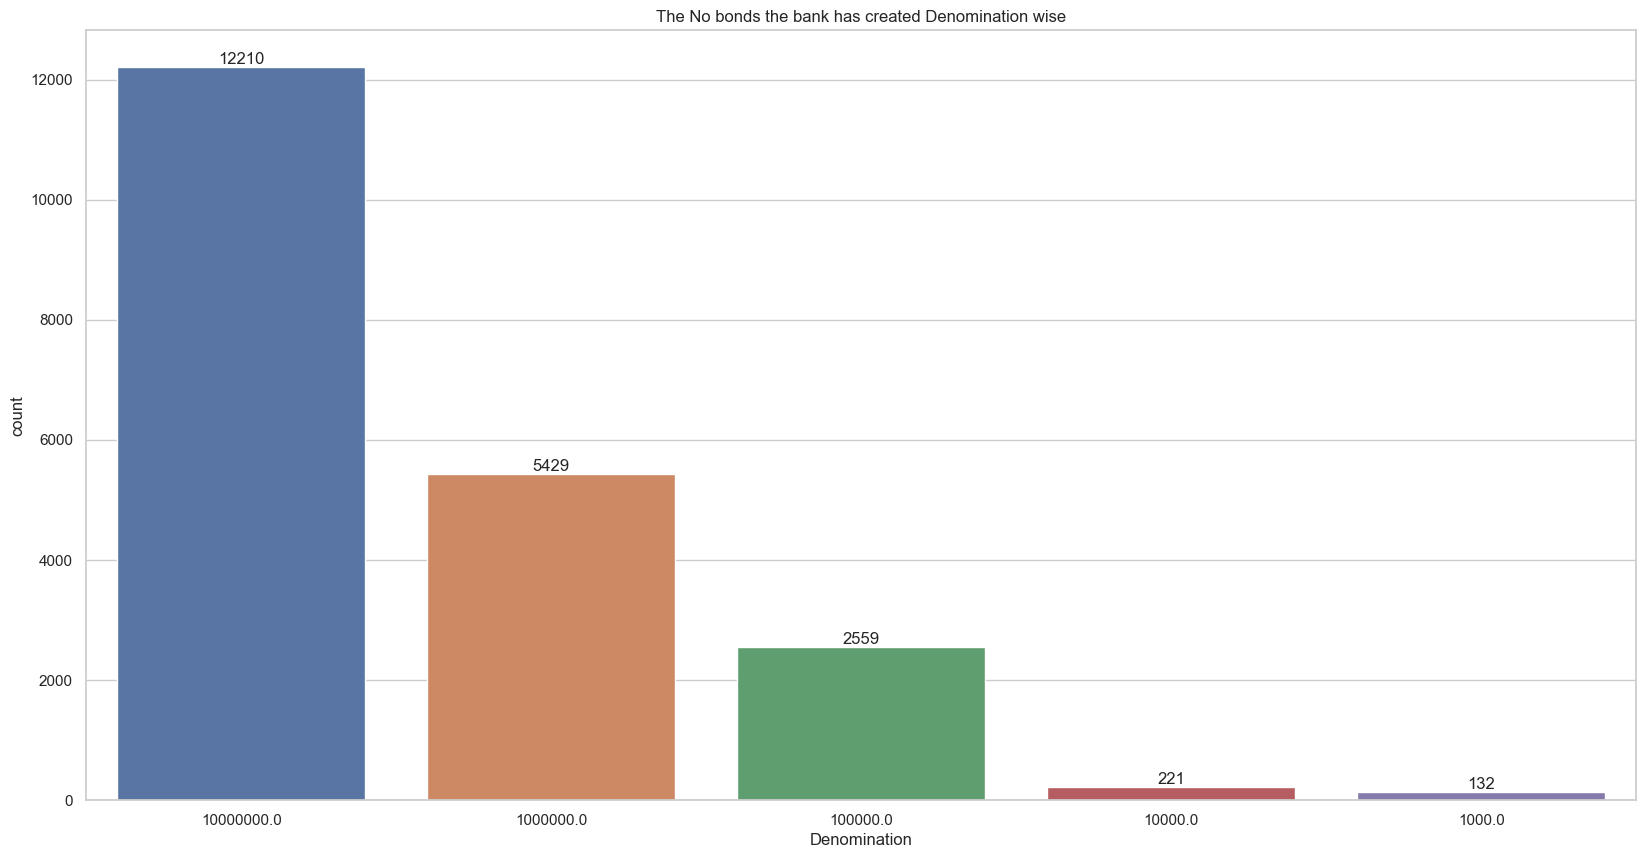

In [118]:
# Set the figure size
plt.figure(figsize=(20, 10))
# Calculate value counts of 'Denomination' and sort by descending order of counts
denomination_counts = alldata_df['Denomination'].value_counts().sort_values(ascending=False)
# Create the count plot with specified order and add count labels
ax = sns.countplot(data=alldata_df, x='Denomination', order=denomination_counts.index)
ax.bar_label(ax.containers[0])  # Add count labels to the bars
# title 
plt.title("The No bonds the bank has created Denomination wise")
# Show the plot
plt.show()

 --> This visualizations helps in understanding the distribution of bond denominations in the dataset
 
 --> in "alldata_df" the highest denominations is 10000000.0 ant the count is 12210 amd the lowest denominations is 1000.0 and the count is 132

 --> the number of bonds the bank has created denominations wise 

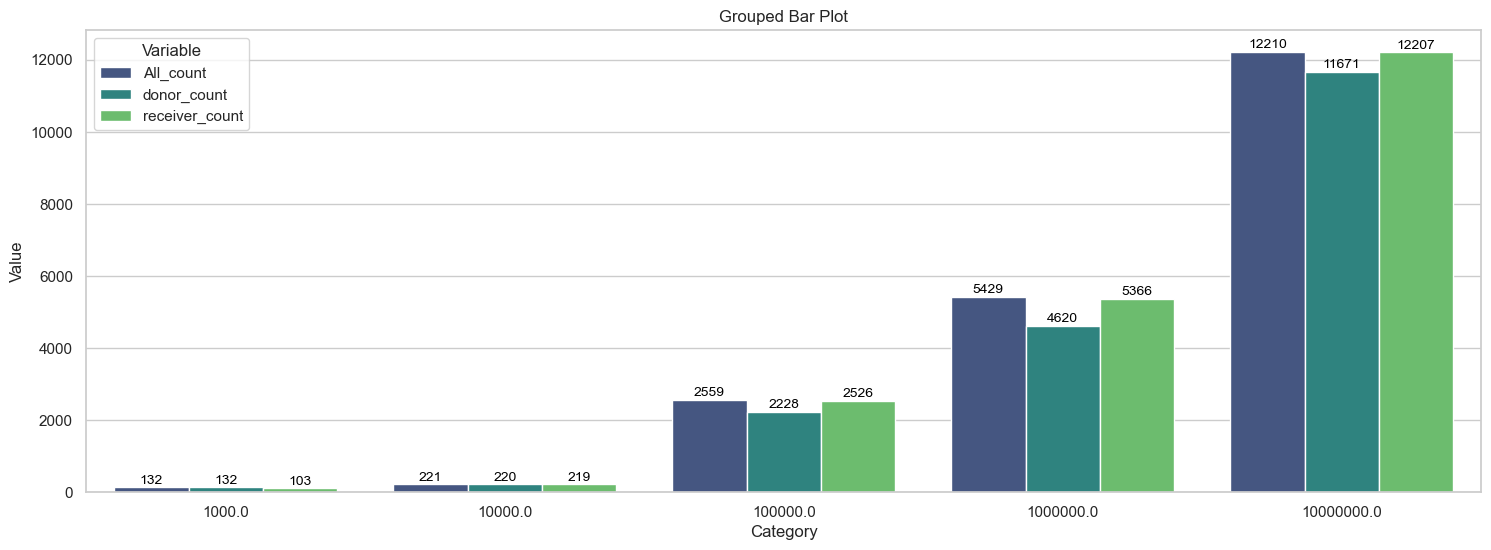

In [119]:
# Plotting
plt.figure(figsize=(18, 6))  # Set the figure size

# Melt the DataFrame to convert it to the long format
append_denominations_count_melted = append_denominations_count.reset_index().melt(id_vars='Denomination', 
                                                                                  var_name='Variable', 
                                                                                  value_name='Value')

# Create the grouped bar plot using Seaborn
ax = sns.barplot(x='Denomination', y='Value', hue='Variable', data=append_denominations_count_melted, palette='viridis')

# Adding numerical labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Adding title and labels
plt.title('Grouped Bar Plot')
plt.xlabel('Category')
plt.ylabel('Value')

# Show plot
plt.show()

--> This above graph is showing that grouped bar plot of variables (all_count,donor_count,receiver_count)

--> If we see values wise the "All_count" and "receiver_count" are gradually increased as compare to "donor_count".

--> If we see the category of the denominations the "donor_count" and "receiver_count" are less compare to "All_count".

In [120]:
append_denominations_count = append_denominations_count.reset_index()
append_denominations_count

Denomination  All_count  donor_count  receiver_count
0    10000000.0      12210        11671           12207
1     1000000.0       5429         4620            5366
2      100000.0       2559         2228            2526
3       10000.0        221          220             219
4        1000.0        132          132             103

In [121]:
append_denominations_count.columns

Index(['Denomination', 'All_count', 'donor_count', 'receiver_count'], dtype='object')

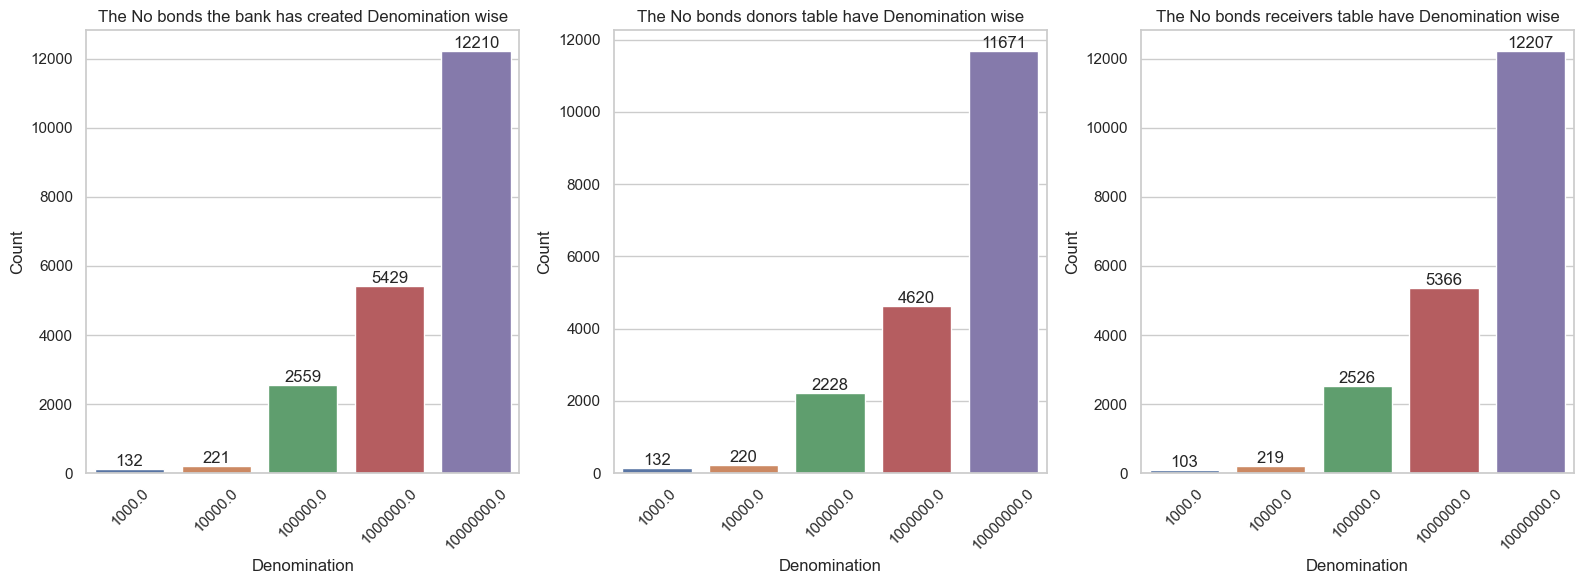

In [122]:
# Set the figure size (larger figure)
plt.figure(figsize=(16, 6))

# Plot the first count plot (leftmost)
plt.subplot(1, 3, 1)
sns.barplot(data=append_denominations_count, x='Denomination', y='All_count')
plt.title('First Plot')
plt.xlabel('Denomination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("The No bonds the bank has created Denomination wise")
plt.gca().bar_label(plt.gca().containers[0])  # Add count labels to the bars

# Plot the second count plot (middle)
plt.subplot(1, 3, 2)
sns.barplot(data=append_denominations_count, x='Denomination', y='donor_count')
plt.title('Second Plot')
plt.xlabel('Denomination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("The No bonds donors table have Denomination wise")
plt.gca().bar_label(plt.gca().containers[0])  # Add count labels to the bars

# Plot the third count plot (rightmost)
plt.subplot(1, 3, 3)
sns.barplot(data=append_denominations_count, x='Denomination', y='receiver_count')
plt.title('Third Plot')
plt.xlabel('Denomination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("The No bonds receivers table have Denomination wise")
plt.gca().bar_label(plt.gca().containers[0])  # Add count labels to the bars

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

- In This graph we are comparing three data denominations with there counts
- The number of bonds created by the banks for to donate data donors with there denominations wise
- The donors have received the denominations and they donating the bonds to recivers
 


## Bond Prefix Count Distribution

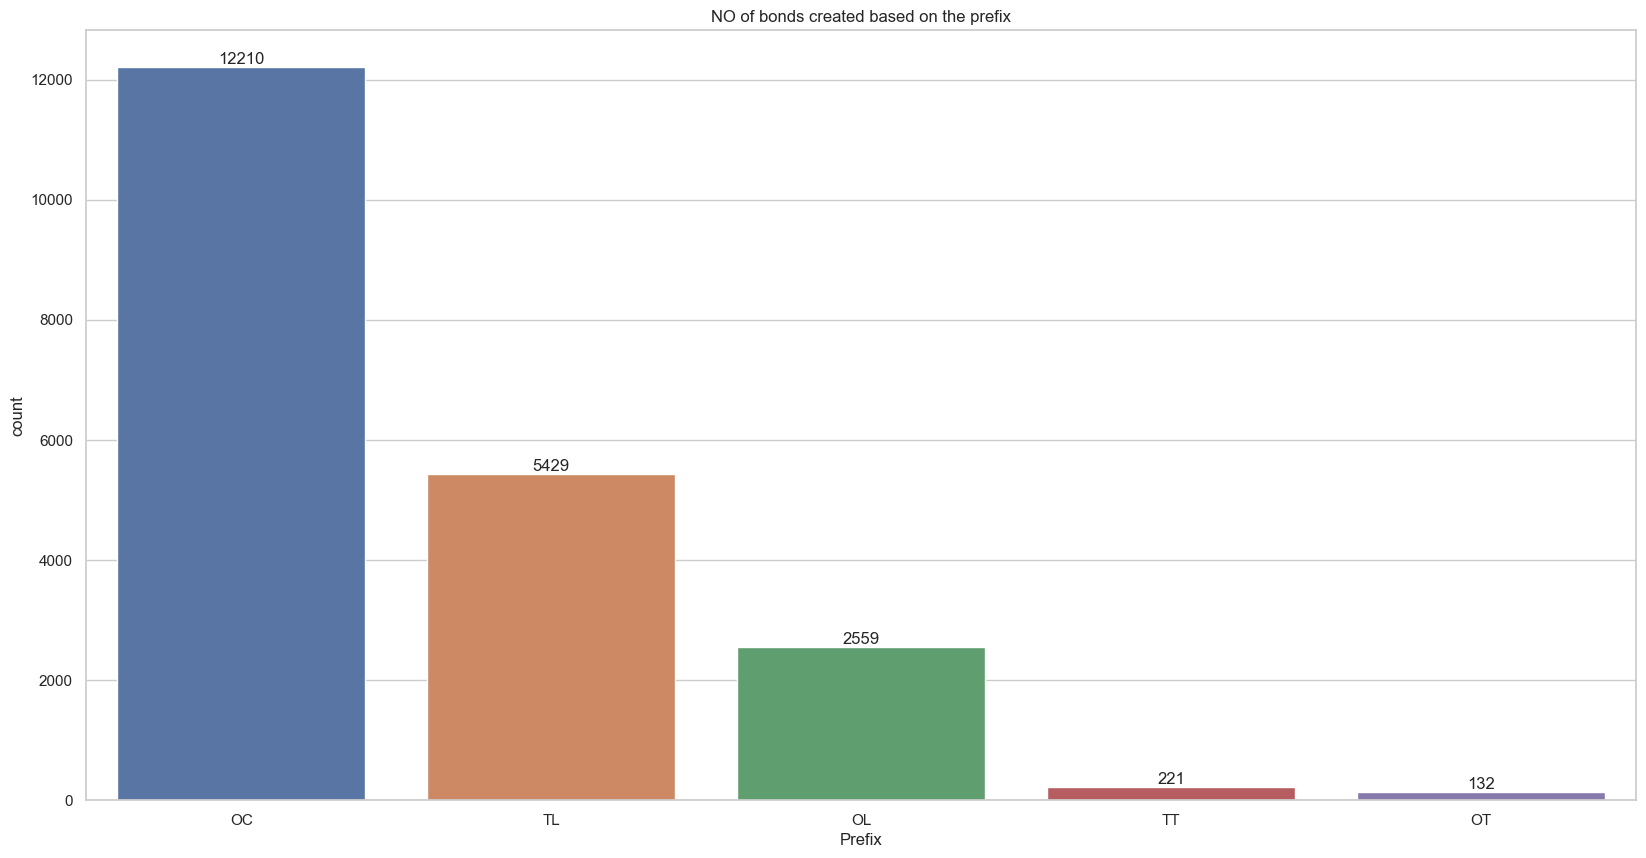

In [123]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot for 'Prefix'
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
# Calculate value counts of 'Prefix' and sort by descending order of counts
prefix_counts = alldata_df['Prefix'].value_counts().sort_values(ascending=False)
# Create the count plot using Seaborn with specified order
ax = sns.countplot(data=alldata_df, x='Prefix', order=prefix_counts.index)
# Add count labels to the bars
ax.bar_label(ax.containers[0])  # Assuming you want to label the first container
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=0)
plt.title("NO of bonds created based on the prefix")
# Show the plot
plt.show()

- the graph is a count plot that shows the number of bonds created based on different prefixes. the x-axis represents thr pfrefixes and y-axis represents the count of bonds.

- from the graph we can see that some prefixes have a significantly higher number of bonds compare to others.

- this indicates that certain prefixes are more commonly used when creating bonds

In [124]:
alldata_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination'],
      dtype='object')

In [125]:
alldata_df.head()

Urn JournalDate PurchaseDate ExpiryDate  \
0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
3  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
4  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  PayBranchCode_x  IssueTeller  \
0  A B C INDIA LIMITED     TL     11448.0              1.0    5899230.0   
1  A B C INDIA LIMITED     TL     11447.0              1.0    5899230.0   
2  A B C INDIA LIMITED     TL     11441.0              1.0    5899230.0   
3  A B C INDIA LIMITED     OL      1113.0              1.0    5899230.0   
4  A B C INDIA LIMITED     OL      1118.0              1.0    5899230.0   

  unique_key DateEncashment               PartyName   AccountNum  \
0    TL11448     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
1    TL11447     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
2    TL11441     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
3     OL1113     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
4     OL1118     2019-04-25  BHARATIYA JANATA PARTY  *******8244   

   PayBranchCode_y  PayTeller  encashedyear  Denomination  
0            691.0  3300196.0        2019.0     1000000.0  
1            691.0  3300196.0        2019.0     1000000.0  
2            691.0  3300196.0        2019.0     1000000.0  
3            691.0  3300196.0        2019.0      100000.0  
4            691.0  3300196.0        2019.0      100000.0

In [126]:
# Aggregate sum of 'Denomination' by 'IssueBranchCity'
city_sum_denominations = alldata_df.groupby('PayBranchCode_x')['Denomination'].sum()

city_sum_denominations

PayBranchCode_x
1.0       2.432193e+10
41.0      1.357500e+09
78.0      1.015000e+08
125.0     5.421000e+08
152.0     8.000000e+06
167.0     5.000000e+07
300.0     2.720218e+10
461.0     1.475260e+08
509.0     2.830000e+08
628.0     5.181000e+08
656.0     1.022100e+09
691.0     1.683071e+10
800.0     1.340150e+10
813.0     1.442803e+09
847.0     2.918907e+10
941.0     2.620000e+08
952.0     6.900000e+07
1308.0    1.824000e+08
1355.0    4.623714e+09
Name: Denomination, dtype: float64

In [127]:
alldata_df['PayBranchCode_x'] = alldata_df['PayBranchCode_x'].astype('Int64')

In [128]:
alldata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20551 entries, 0 to 20550
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Urn              18871 non-null  object        
 1   JournalDate      18871 non-null  datetime64[ns]
 2   PurchaseDate     18871 non-null  datetime64[ns]
 3   ExpiryDate       18871 non-null  datetime64[ns]
 4   Purchaser        18871 non-null  object        
 5   Prefix           20551 non-null  object        
 6   BondNumber       20551 non-null  float64       
 7   PayBranchCode_x  18871 non-null  Int64         
 8   IssueTeller      18871 non-null  float64       
 9   unique_key       20551 non-null  object        
 10  DateEncashment   20421 non-null  datetime64[ns]
 11  PartyName        20421 non-null  object        
 12  AccountNum       20421 non-null  object        
 13  PayBranchCode_y  20421 non-null  float64       
 14  PayTeller        20421 non-null  float

In [129]:
alldata_df.head()

Urn JournalDate PurchaseDate ExpiryDate  \
0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
3  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
4  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  PayBranchCode_x  IssueTeller  \
0  A B C INDIA LIMITED     TL     11448.0                1    5899230.0   
1  A B C INDIA LIMITED     TL     11447.0                1    5899230.0   
2  A B C INDIA LIMITED     TL     11441.0                1    5899230.0   
3  A B C INDIA LIMITED     OL      1113.0                1    5899230.0   
4  A B C INDIA LIMITED     OL      1118.0                1    5899230.0   

  unique_key DateEncashment               PartyName   AccountNum  \
0    TL11448     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
1    TL11447     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
2    TL11441     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
3     OL1113     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
4     OL1118     2019-04-25  BHARATIYA JANATA PARTY  *******8244   

   PayBranchCode_y  PayTeller  encashedyear  Denomination  
0            691.0  3300196.0        2019.0     1000000.0  
1            691.0  3300196.0        2019.0     1000000.0  
2            691.0  3300196.0        2019.0     1000000.0  
3            691.0  3300196.0        2019.0      100000.0  
4            691.0  3300196.0        2019.0      100000.0

In [130]:
city_sum_denominations.info()

<class 'pandas.core.series.Series'>
Index: 19 entries, 1.0 to 1355.0
Series name: Denomination
Non-Null Count  Dtype  
--------------  -----  
19 non-null     float64
dtypes: float64(1)
memory usage: 304.0 bytes


In [131]:
bankdata.columns

Index(['State', 'Branch Code No.', 'Branch City'], dtype='object')

In [132]:
alldata_df = pd.merge(alldata_df, bankdata, how="inner", left_on="PayBranchCode_x", right_on= "Branch Code No.")

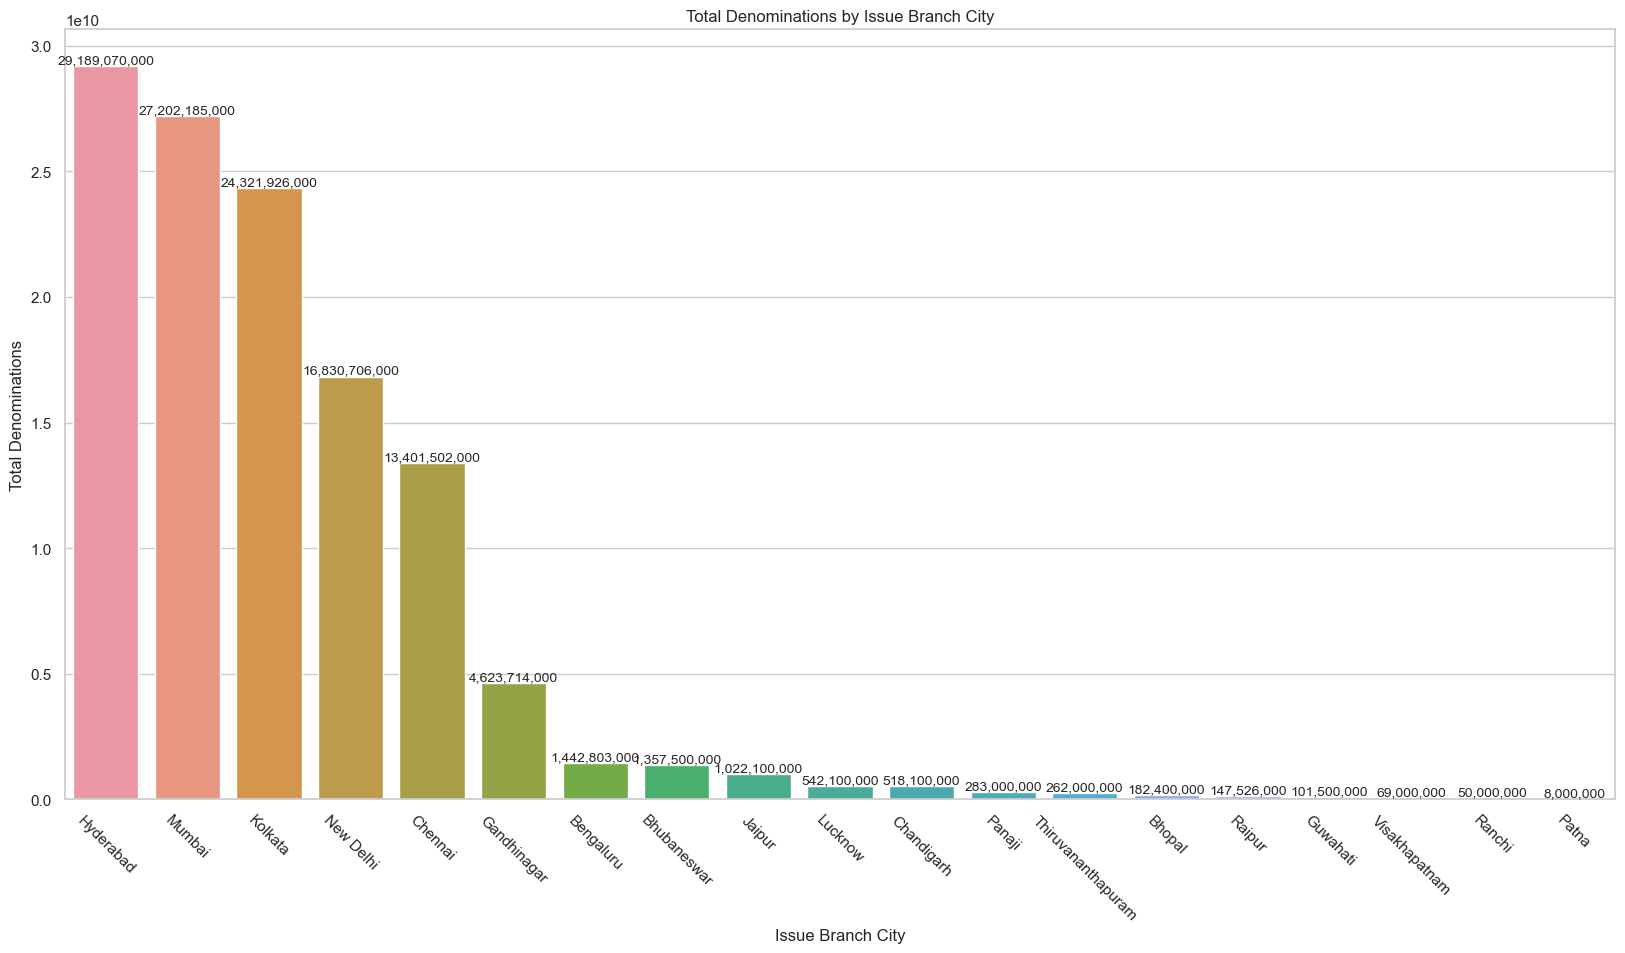

In [133]:
# Aggregate sum of 'Denomination' by 'IssueBranchCity'
city_sum_denominations = alldata_df.groupby('Branch City')['Denomination'].sum()

# Sort the aggregated sums in descending order
city_sum_denominations = city_sum_denominations.sort_values(ascending=False)

# Create a count plot based on the aggregated sums
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.barplot(x=city_sum_denominations.index, y=city_sum_denominations.values, order=city_sum_denominations.index)

# Add count labels (sums of denominations) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
plt.xlabel('Issue Branch City')
plt.ylabel('Total Denominations')
plt.title('Total Denominations by Issue Branch City')
plt.show()

- This graph is showing that total denominations by issue branch city
- city of kolkata has issued highest denominations to comparative of other cities
- patna has issued lowest denominations

In [134]:
bankdata.columns

Index(['State', 'Branch Code No.', 'Branch City'], dtype='object')

In [135]:
alldata_df.columns


Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination', 'State', 'Branch Code No.',
       'Branch City'],
      dtype='object')

In [136]:
alldata_df.head()

Urn JournalDate PurchaseDate ExpiryDate  \
0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
3  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
4  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  PayBranchCode_x  IssueTeller  \
0  A B C INDIA LIMITED     TL     11448.0                1    5899230.0   
1  A B C INDIA LIMITED     TL     11447.0                1    5899230.0   
2  A B C INDIA LIMITED     TL     11441.0                1    5899230.0   
3  A B C INDIA LIMITED     OL      1113.0                1    5899230.0   
4  A B C INDIA LIMITED     OL      1118.0                1    5899230.0   

  unique_key DateEncashment               PartyName   AccountNum  \
0    TL11448     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
1    TL11447     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
2    TL11441     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
3     OL1113     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
4     OL1118     2019-04-25  BHARATIYA JANATA PARTY  *******8244   

   PayBranchCode_y  PayTeller  encashedyear  Denomination  \
0            691.0  3300196.0        2019.0     1000000.0   
1            691.0  3300196.0        2019.0     1000000.0   
2            691.0  3300196.0        2019.0     1000000.0   
3            691.0  3300196.0        2019.0      100000.0   
4            691.0  3300196.0        2019.0      100000.0   

                              State  Branch Code No. Branch City  
0  West Bengal and Andaman& Nicobar                1     Kolkata  
1  West Bengal and Andaman& Nicobar                1     Kolkata  
2  West Bengal and Andaman& Nicobar                1     Kolkata  
3  West Bengal and Andaman& Nicobar                1     Kolkata  
4  West Bengal and Andaman& Nicobar                1     Kolkata

In [137]:
alldata_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination', 'State', 'Branch Code No.',
       'Branch City'],
      dtype='object')

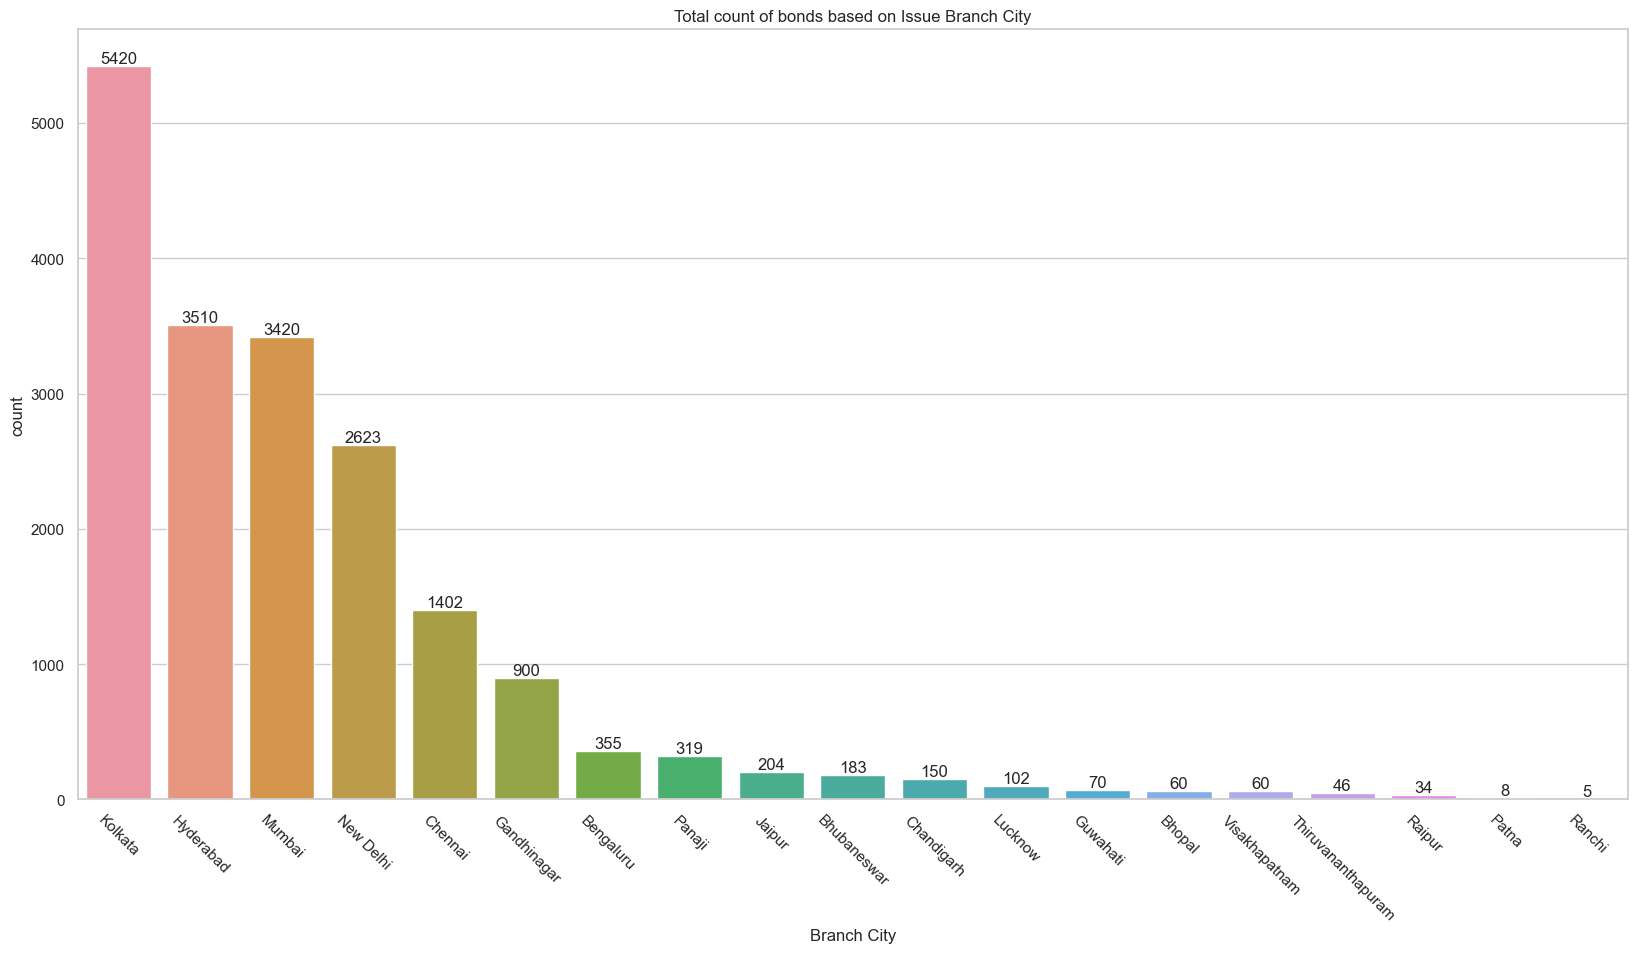

In [138]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
# Calculate value counts of 'IssueBranchCity' and sort by descending order of counts
city_counts = alldata_df['Branch City'].value_counts().sort_values(ascending=False)
# Create the count plot using Seaborn with specified order
ax = sns.countplot(data=alldata_df, x='Branch City', order=city_counts.index)
# Add count labels to the bars
ax.bar_label(ax.containers[0])  # Assuming you want to label the first container
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
plt.title('Total count of bonds based on Issue Branch City')
# Show the plot
plt.show()

-  This graph is showing that total denominations by issue branch city
- city of hyderabad has received highest count to comparative of other cities



In [139]:
alldata_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination', 'State', 'Branch Code No.',
       'Branch City'],
      dtype='object')

In [140]:
alldata_df['PayBranchCode_y'] = alldata_df['PayBranchCode_y'].astype('Int64')

In [141]:
alldata_df.head()

Urn JournalDate PurchaseDate ExpiryDate  \
0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
3  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
4  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  PayBranchCode_x  IssueTeller  \
0  A B C INDIA LIMITED     TL     11448.0                1    5899230.0   
1  A B C INDIA LIMITED     TL     11447.0                1    5899230.0   
2  A B C INDIA LIMITED     TL     11441.0                1    5899230.0   
3  A B C INDIA LIMITED     OL      1113.0                1    5899230.0   
4  A B C INDIA LIMITED     OL      1118.0                1    5899230.0   

  unique_key DateEncashment               PartyName   AccountNum  \
0    TL11448     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
1    TL11447     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
2    TL11441     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
3     OL1113     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
4     OL1118     2019-04-25  BHARATIYA JANATA PARTY  *******8244   

   PayBranchCode_y  PayTeller  encashedyear  Denomination  \
0              691  3300196.0        2019.0     1000000.0   
1              691  3300196.0        2019.0     1000000.0   
2              691  3300196.0        2019.0     1000000.0   
3              691  3300196.0        2019.0      100000.0   
4              691  3300196.0        2019.0      100000.0   

                              State  Branch Code No. Branch City  
0  West Bengal and Andaman& Nicobar                1     Kolkata  
1  West Bengal and Andaman& Nicobar                1     Kolkata  
2  West Bengal and Andaman& Nicobar                1     Kolkata  
3  West Bengal and Andaman& Nicobar                1     Kolkata  
4  West Bengal and Andaman& Nicobar                1     Kolkata

In [142]:
alldata_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination', 'State', 'Branch Code No.',
       'Branch City'],
      dtype='object')

In [143]:
bankdata.head()

State  Branch Code No. Branch City
0                           Delhi              691   New Delhi
1  Haryana, Punjab and Chandigarh              628  Chandigarh
2                 HimachalPradesh              718      Shimla
3                Jammu andKashmir             2295    Srinagar
4                     Uttarakhand              630    Dehradun

In [144]:
bankdata.columns

Index(['State', 'Branch Code No.', 'Branch City'], dtype='object')

In [145]:
alldata_df = pd.merge(alldata_df, bankdata, how="inner", left_on="PayBranchCode_x", right_on= "Branch Code No.")

In [146]:
alldata_df.head()

Urn JournalDate PurchaseDate ExpiryDate  \
0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
3  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
4  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  PayBranchCode_x  IssueTeller  \
0  A B C INDIA LIMITED     TL     11448.0                1    5899230.0   
1  A B C INDIA LIMITED     TL     11447.0                1    5899230.0   
2  A B C INDIA LIMITED     TL     11441.0                1    5899230.0   
3  A B C INDIA LIMITED     OL      1113.0                1    5899230.0   
4  A B C INDIA LIMITED     OL      1118.0                1    5899230.0   

  unique_key DateEncashment               PartyName   AccountNum  \
0    TL11448     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
1    TL11447     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
2    TL11441     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
3     OL1113     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
4     OL1118     2019-04-25  BHARATIYA JANATA PARTY  *******8244   

   PayBranchCode_y  PayTeller  encashedyear  Denomination  \
0              691  3300196.0        2019.0     1000000.0   
1              691  3300196.0        2019.0     1000000.0   
2              691  3300196.0        2019.0     1000000.0   
3              691  3300196.0        2019.0      100000.0   
4              691  3300196.0        2019.0      100000.0   

                            State_x  Branch Code No._x Branch City_x  \
0  West Bengal and Andaman& Nicobar                  1       Kolkata   
1  West Bengal and Andaman& Nicobar                  1       Kolkata   
2  West Bengal and Andaman& Nicobar                  1       Kolkata   
3  West Bengal and Andaman& Nicobar                  1       Kolkata   
4  West Bengal and Andaman& Nicobar                  1       Kolkata   

                            State_y  Branch Code No._y Branch City_y  
0  West Bengal and Andaman& Nicobar                  1       Kolkata  
1  West Bengal and Andaman& Nicobar                  1       Kolkata  
2  West Bengal and Andaman& Nicobar                  1       Kolkata  
3  West Bengal and Andaman& Nicobar                  1       Kolkata  
4  West Bengal and Andaman& Nicobar                  1       Kolkata

In [147]:
alldata_df = pd.merge(alldata_df, bankdata, how="inner", left_on="PayBranchCode_y", right_on= "Branch Code No.")

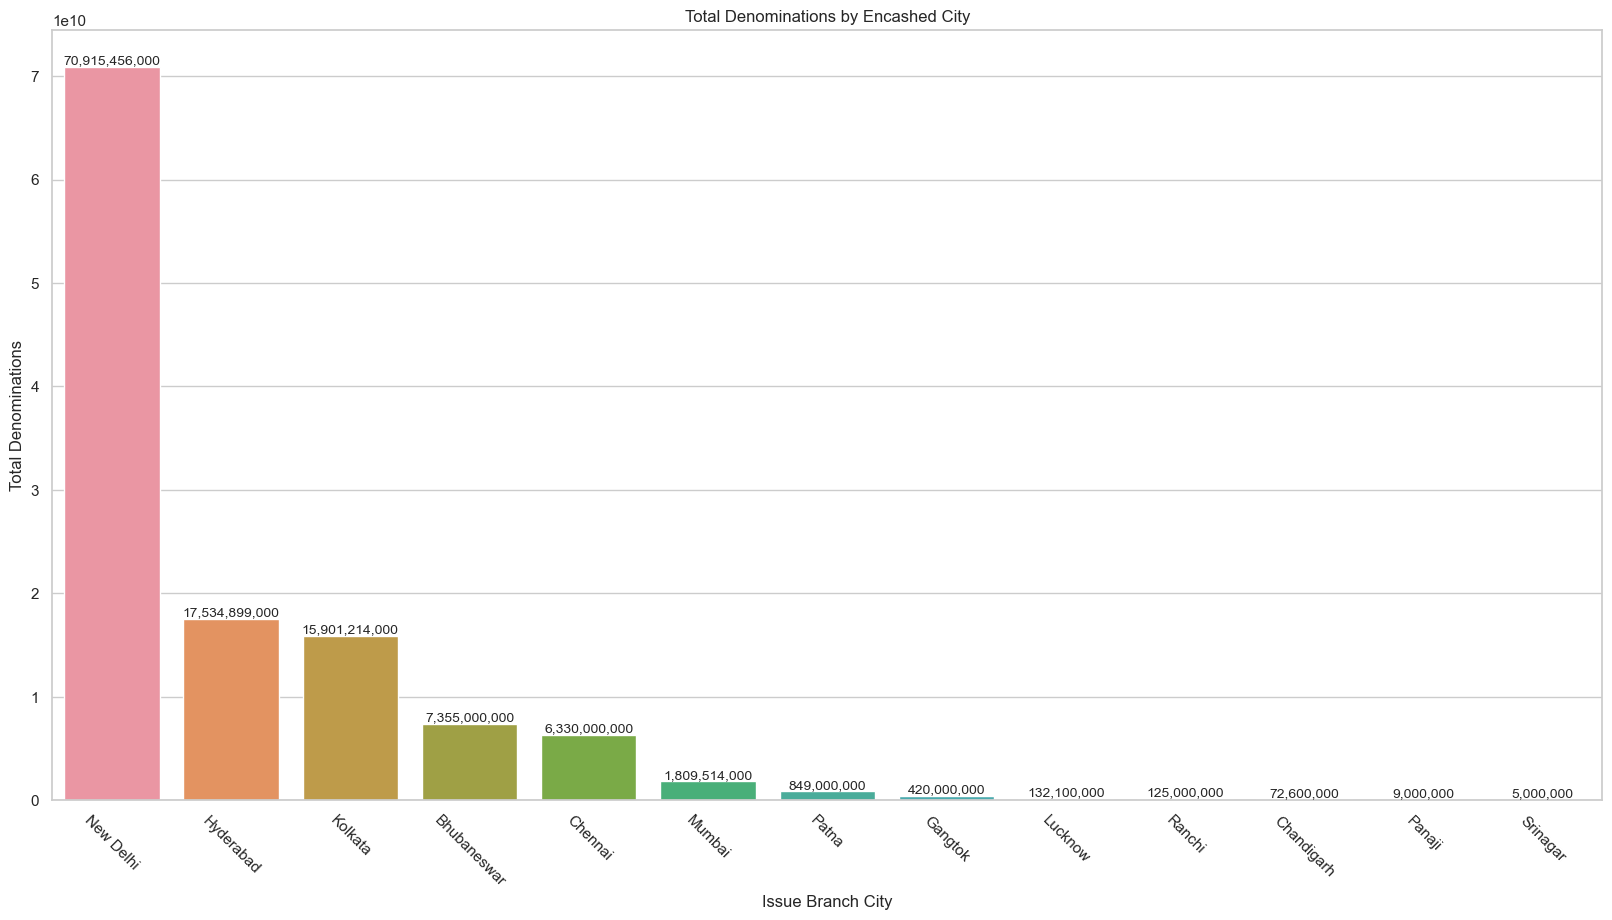

In [148]:
# Aggregate sum of 'Denomination' by 'IssueBranchCity'
city_sum_denominations = alldata_df.groupby('Branch City')['Denomination'].sum()

# Sort the aggregated sums in descending order
city_sum_denominations = city_sum_denominations.sort_values(ascending=False)

# Create a count plot based on the aggregated sums
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.barplot(x=city_sum_denominations.index, y=city_sum_denominations.values, order=city_sum_denominations.index)

# Add count labels (sums of denominations) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
plt.xlabel('Issue Branch City')
plt.ylabel('Total Denominations')
plt.title('Total Denominations by Encashed City')
plt.show()

- This graph shows that the total denominations by encashed city
- New delhi has issued highest denomination
-  all over the india the denominations has decreased gradually

In [149]:
alldata_df.head()

Urn JournalDate PurchaseDate ExpiryDate  \
0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
3  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
4  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  PayBranchCode_x  IssueTeller  \
0  A B C INDIA LIMITED     TL     11448.0                1    5899230.0   
1  A B C INDIA LIMITED     TL     11447.0                1    5899230.0   
2  A B C INDIA LIMITED     TL     11441.0                1    5899230.0   
3  A B C INDIA LIMITED     OL      1113.0                1    5899230.0   
4  A B C INDIA LIMITED     OL      1118.0                1    5899230.0   

  unique_key DateEncashment               PartyName   AccountNum  \
0    TL11448     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
1    TL11447     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
2    TL11441     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
3     OL1113     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
4     OL1118     2019-04-25  BHARATIYA JANATA PARTY  *******8244   

   PayBranchCode_y  PayTeller  encashedyear  Denomination  \
0              691  3300196.0        2019.0     1000000.0   
1              691  3300196.0        2019.0     1000000.0   
2              691  3300196.0        2019.0     1000000.0   
3              691  3300196.0        2019.0      100000.0   
4              691  3300196.0        2019.0      100000.0   

                            State_x  Branch Code No._x Branch City_x  \
0  West Bengal and Andaman& Nicobar                  1       Kolkata   
1  West Bengal and Andaman& Nicobar                  1       Kolkata   
2  West Bengal and Andaman& Nicobar                  1       Kolkata   
3  West Bengal and Andaman& Nicobar                  1       Kolkata   
4  West Bengal and Andaman& Nicobar                  1       Kolkata   

                            State_y  Branch Code No._y Branch City_y  State  \
0  West Bengal and Andaman& Nicobar                  1       Kolkata  Delhi   
1  West Bengal and Andaman& Nicobar                  1       Kolkata  Delhi   
2  West Bengal and Andaman& Nicobar                  1       Kolkata  Delhi   
3  West Bengal and Andaman& Nicobar                  1       Kolkata  Delhi   
4  West Bengal and Andaman& Nicobar                  1       Kolkata  Delhi   

   Branch Code No. Branch City  
0              691   New Delhi  
1              691   New Delhi  
2              691   New Delhi  
3              691   New Delhi  
4              691   New Delhi

In [150]:
bankdata.head()

State  Branch Code No. Branch City
0                           Delhi              691   New Delhi
1  Haryana, Punjab and Chandigarh              628  Chandigarh
2                 HimachalPradesh              718      Shimla
3                Jammu andKashmir             2295    Srinagar
4                     Uttarakhand              630    Dehradun

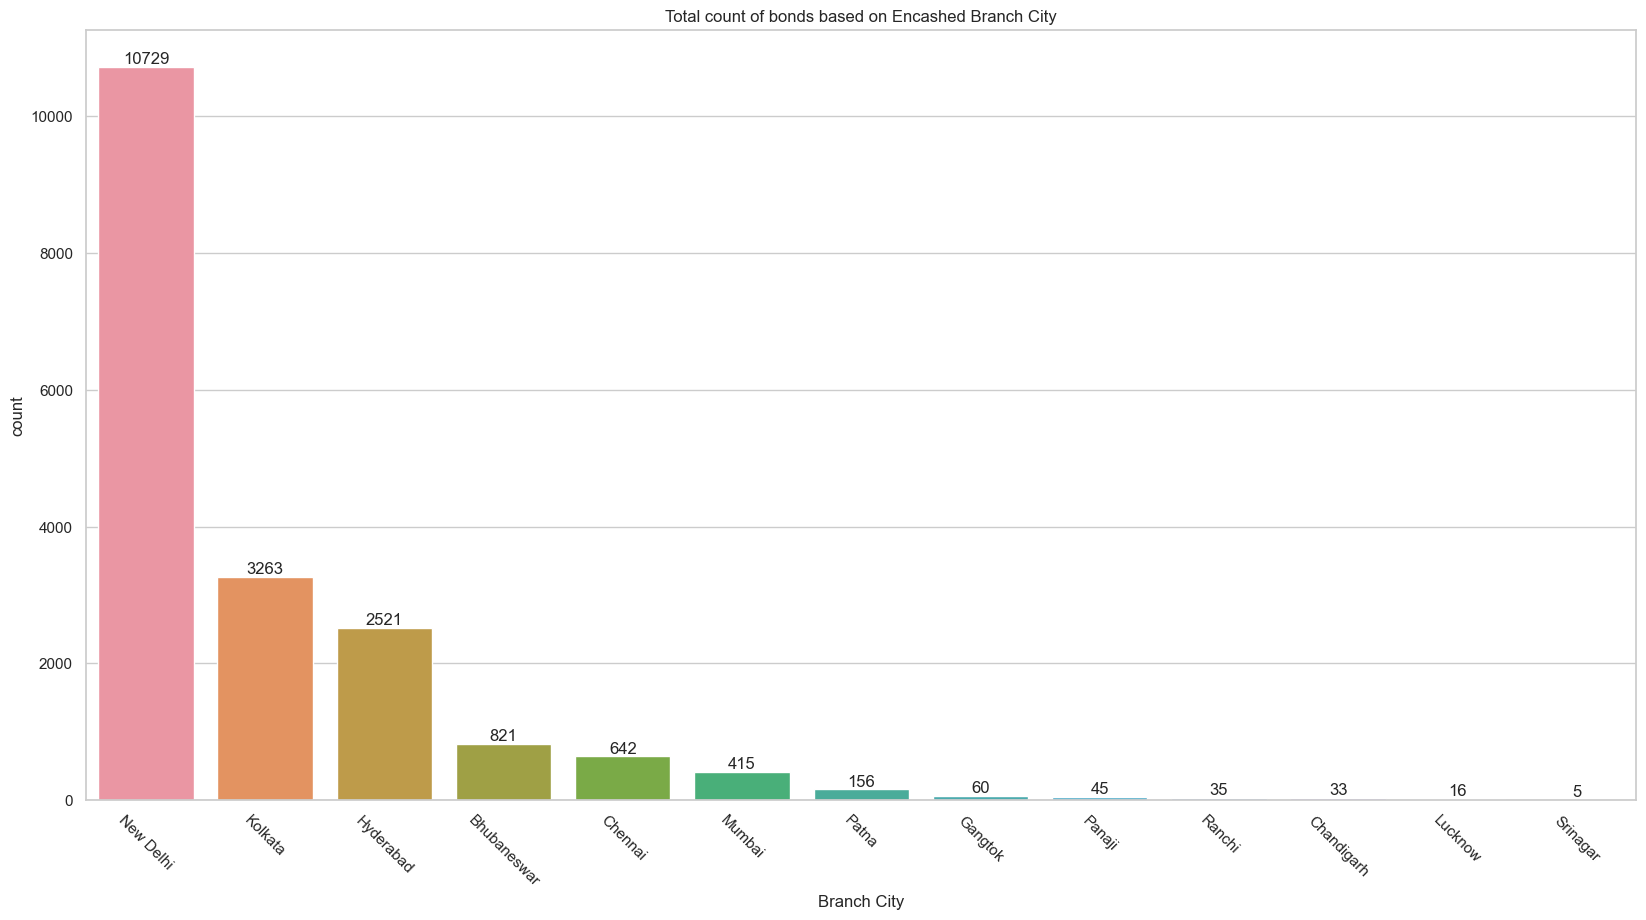

In [151]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
# Calculate value counts of 'IssueBranchCity' and sort by descending order of counts
city_counts = alldata_df['Branch City'].value_counts().sort_values(ascending=False)
# Create the count plot using Seaborn with specified order
ax = sns.countplot(data=alldata_df, x='Branch City', order=city_counts.index)
# Add count labels to the bars
ax.bar_label(ax.containers[0])  # Assuming you want to label the first container
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
plt.title('Total count of bonds based on Encashed Branch City')
# Show the plot
plt.show()

- the bar graph is representing  the total count of bonds based on encashed branch city
- New delhi has received highest count with comparing all cities 
- while we comparing all cities srinagar has received lowest denominations and counts


## Wordcloud 

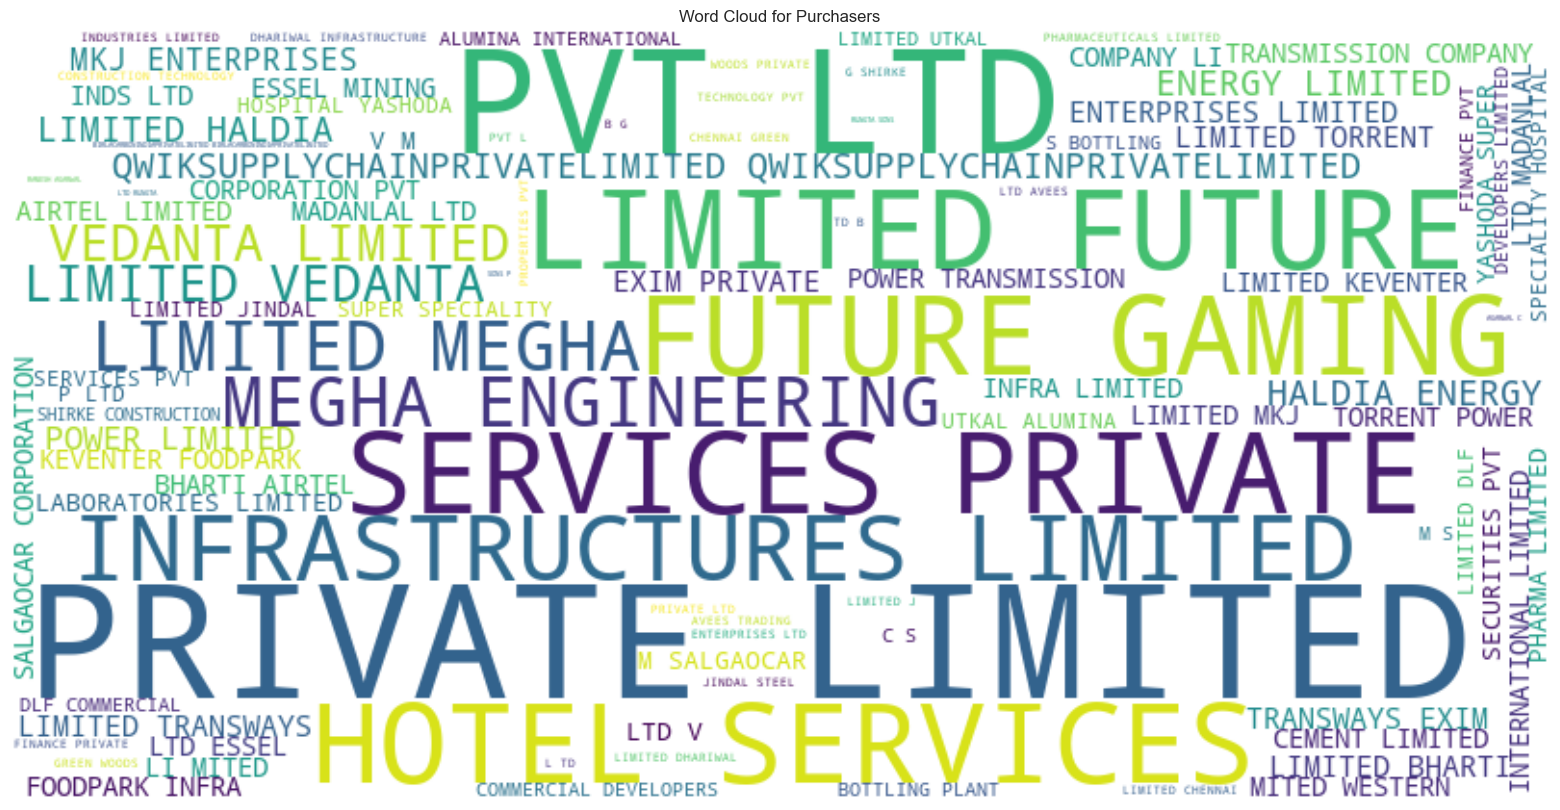

In [152]:
# Extract text data from the 'Purchaser' column and join into a single string
text_data = ' '.join(alldata_df['Purchaser'].dropna())  # Join non-null values
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud for Purchasers')
plt.show()

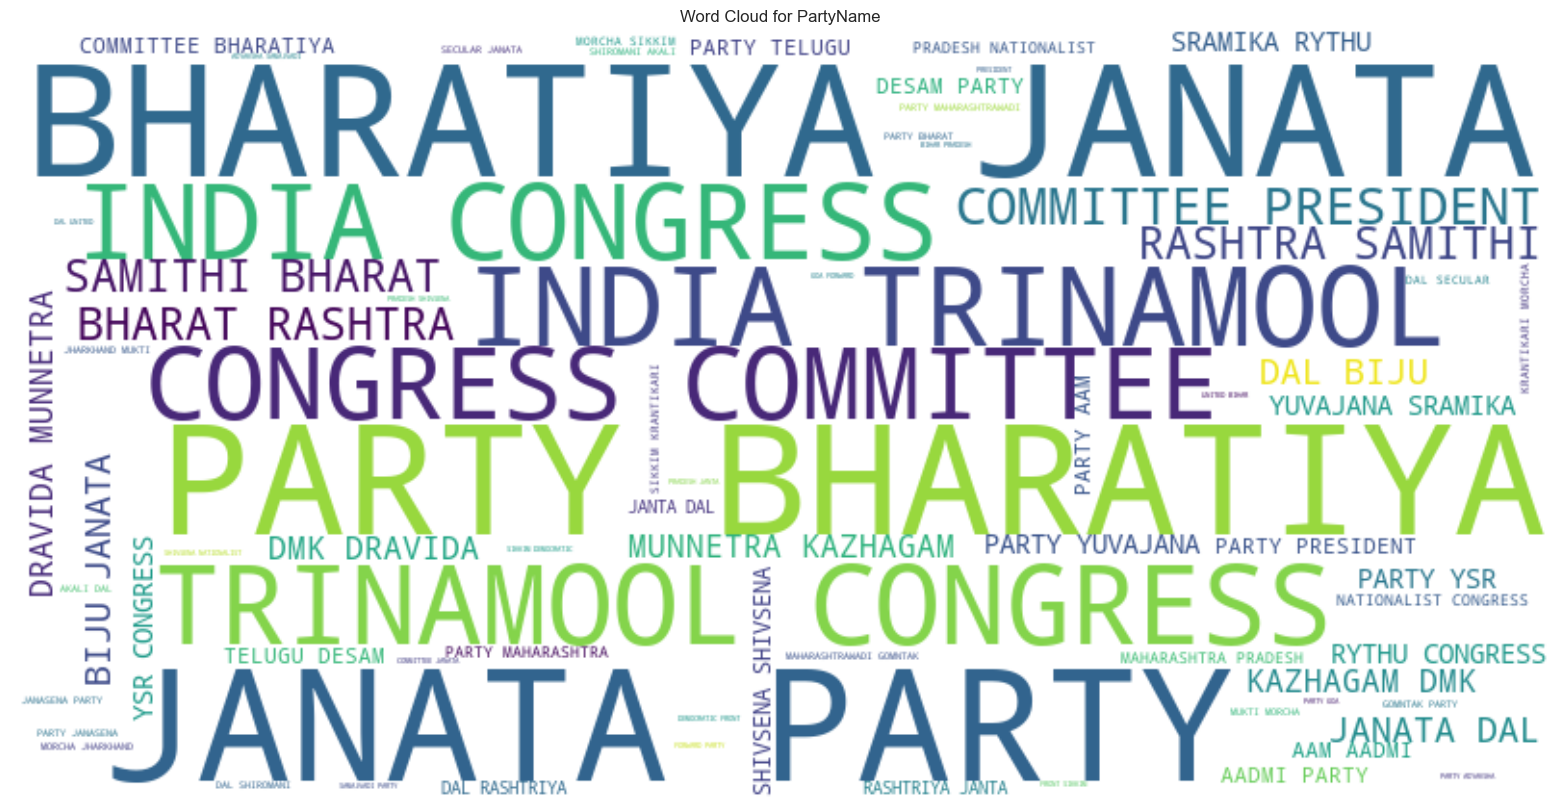

In [153]:
# Extract text data from the 'Purchaser' column and join into a single string
text_data = ' '.join(alldata_df['PartyName'].dropna())  # Join non-null values
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud for PartyName')
plt.show()

## Date Analysis

In [154]:
donor_dates = donordata[['unique_key','JournalDate','PurchaseDate','ExpiryDate']]
donor_dates.head()

unique_key JournalDate PurchaseDate ExpiryDate
0    TL11448  2019-04-12   2019-04-12 2019-04-26
1    TL11447  2019-04-12   2019-04-12 2019-04-26
2    TL11441  2019-04-12   2019-04-12 2019-04-26
3     OL1113  2019-04-12   2019-04-12 2019-04-26
4     OL1118  2019-04-12   2019-04-12 2019-04-26

In [155]:
donor_dates['Journal_Purchase'] =  donor_dates['PurchaseDate'] - donor_dates['JournalDate']
donor_dates['Purchase-Expiry'] = donor_dates['ExpiryDate'] - donor_dates['PurchaseDate']
donor_dates['Journal-Expiry'] = donor_dates['ExpiryDate'] - donor_dates['JournalDate']

In [156]:
donor_dates.columns

Index(['unique_key', 'JournalDate', 'PurchaseDate', 'ExpiryDate',
       'Journal_Purchase', 'Purchase-Expiry', 'Journal-Expiry'],
      dtype='object')

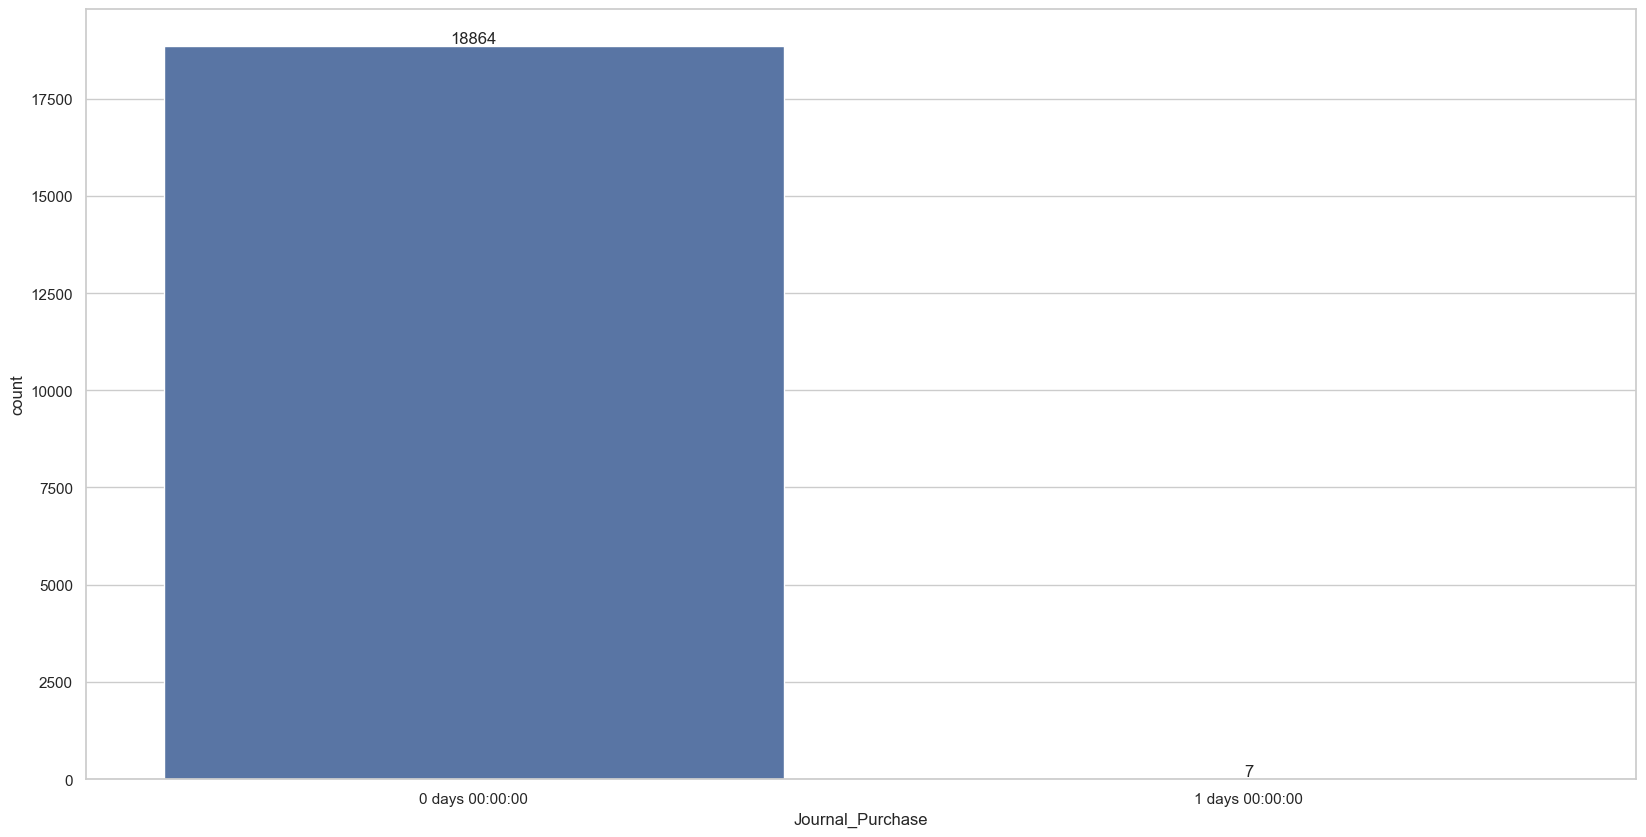

In [157]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.countplot(donor_dates,x='Journal_Purchase')
ax.bar_label(ax.containers[0])  
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=0)
# Show the plot
plt.show()

**Looking into the above graph we can see most of the bonds are isssued within a day and at max in one day. No bond took more than one day to issue.** 

In [158]:
Issue_delay = donordata[donordata['JournalDate']!= donordata['PurchaseDate']]
Issue_delay

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
9122  9123  00847202204080000002409  2022-04-08   2022-04-09 2022-04-23   
9125  9126  00847202204080000002424  2022-04-08   2022-04-09 2022-04-23   
9128  9129  00847202204080000002417  2022-04-08   2022-04-09 2022-04-23   
9130  9131  00847202204080000002416  2022-04-08   2022-04-09 2022-04-23   
9132  9133  00847202204080000002421  2022-04-08   2022-04-09 2022-04-23   
9134  9135  00847202204080000002419  2022-04-08   2022-04-09 2022-04-23   
9136  9137  00847202204080000002413  2022-04-08   2022-04-09 2022-04-23   

                                      Purchaser Prefix  BondNumber  \
9122         GREENKO BUDHIL HYDRO POWER PVT LTD     OC       12060   
9125  GREENKO RAYALA WIND POWER PRIVATE LIMITED     OC       12059   
9128                SANOLA WIND PROJECT PVT LTD     OC       12052   
9130                        SEI DIAMOND PVT LTD     OC       12056   
9132                          SEI VENUS PVT LTD     OC       12051   
9134             SUNBORNE ENERGY ANDHRA PVT LTD     OC       12055   
9136          TANOT WIND POWER VENTURES PVT LTD     OC       12067   

      Denominations  PayBranchCode  IssueTeller unique_key  PurchaserYear  
9122       10000000            847      3898296    OC12060           2022  
9125       10000000            847      3898296    OC12059           2022  
9128       10000000            847      3898296    OC12052           2022  
9130       10000000            847      3898296    OC12056           2022  
9132       10000000            847      3898296    OC12051           2022  
9134       10000000            847      3898296    OC12055           2022  
9136       10000000            847      3898296    OC12067           2022

In [159]:
donordata.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'Denominations', 'PayBranchCode', 'IssueTeller',
       'unique_key', 'PurchaserYear'],
      dtype='object')

In [160]:
Issue_delay = Issue_delay[['JournalDate','PurchaseDate','Purchaser','PayBranchCode']]
Issue_delay

JournalDate PurchaseDate                                  Purchaser  \
9122  2022-04-08   2022-04-09         GREENKO BUDHIL HYDRO POWER PVT LTD   
9125  2022-04-08   2022-04-09  GREENKO RAYALA WIND POWER PRIVATE LIMITED   
9128  2022-04-08   2022-04-09                SANOLA WIND PROJECT PVT LTD   
9130  2022-04-08   2022-04-09                        SEI DIAMOND PVT LTD   
9132  2022-04-08   2022-04-09                          SEI VENUS PVT LTD   
9134  2022-04-08   2022-04-09             SUNBORNE ENERGY ANDHRA PVT LTD   
9136  2022-04-08   2022-04-09          TANOT WIND POWER VENTURES PVT LTD   

      PayBranchCode  
9122            847  
9125            847  
9128            847  
9130            847  
9132            847  
9134            847  
9136            847

> Only 7 Bonds got delayed while issuing them and that happend on 2022-04-08 and only in Hyderbad which means we can say there was a technical problems in that branch. 

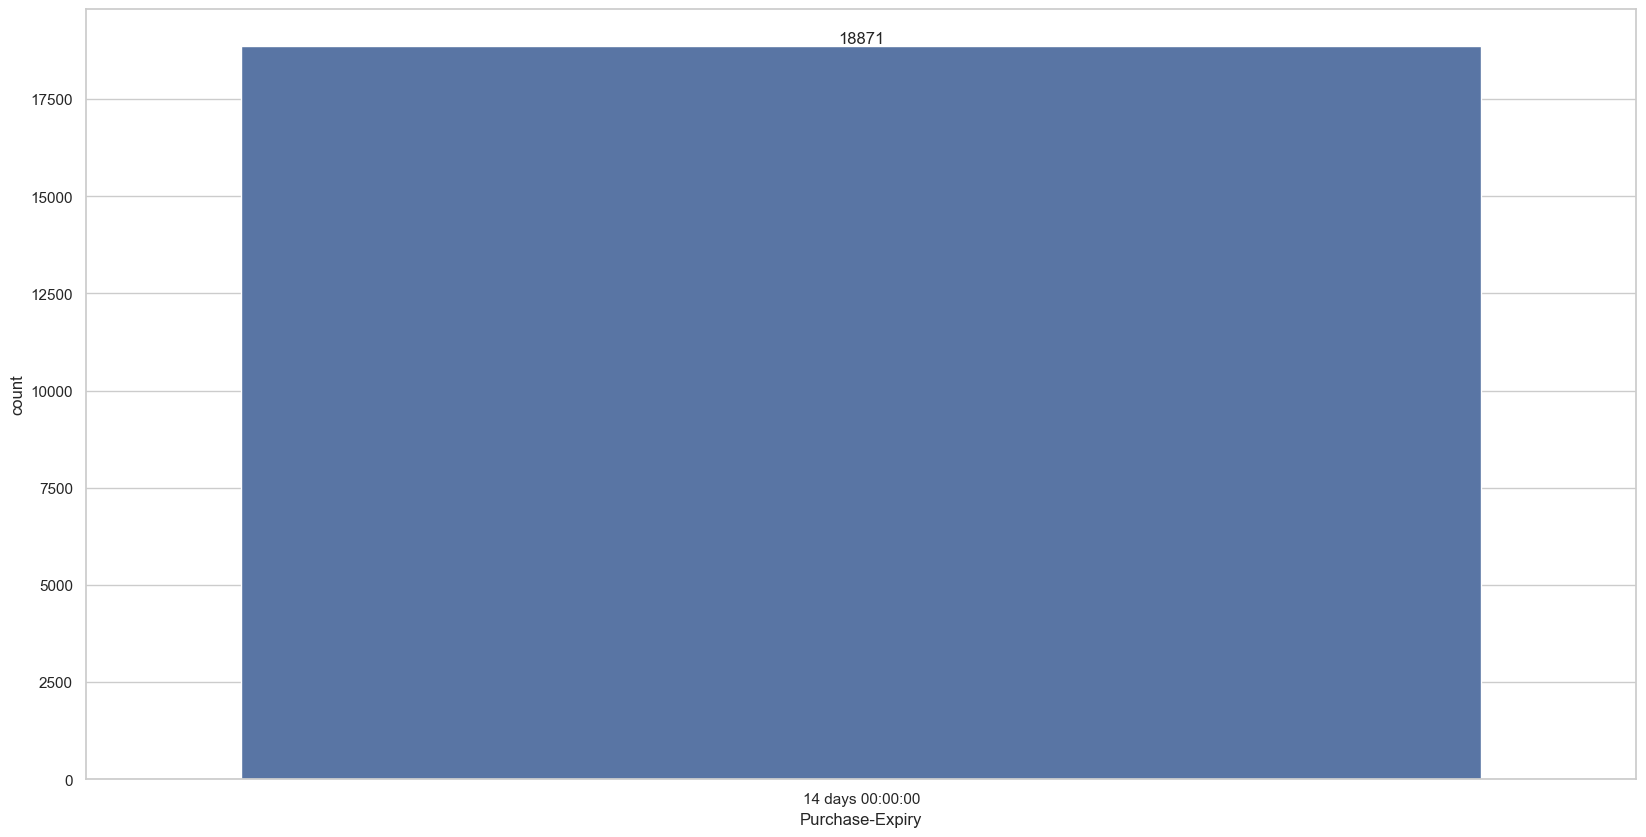

In [161]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.countplot(donor_dates,x='Purchase-Expiry')
ax.bar_label(ax.containers[0])  
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=0)
# Show the plot
plt.show()

> Looking into the graph we can say all the bonds have only 14 days to encash from their puchase date

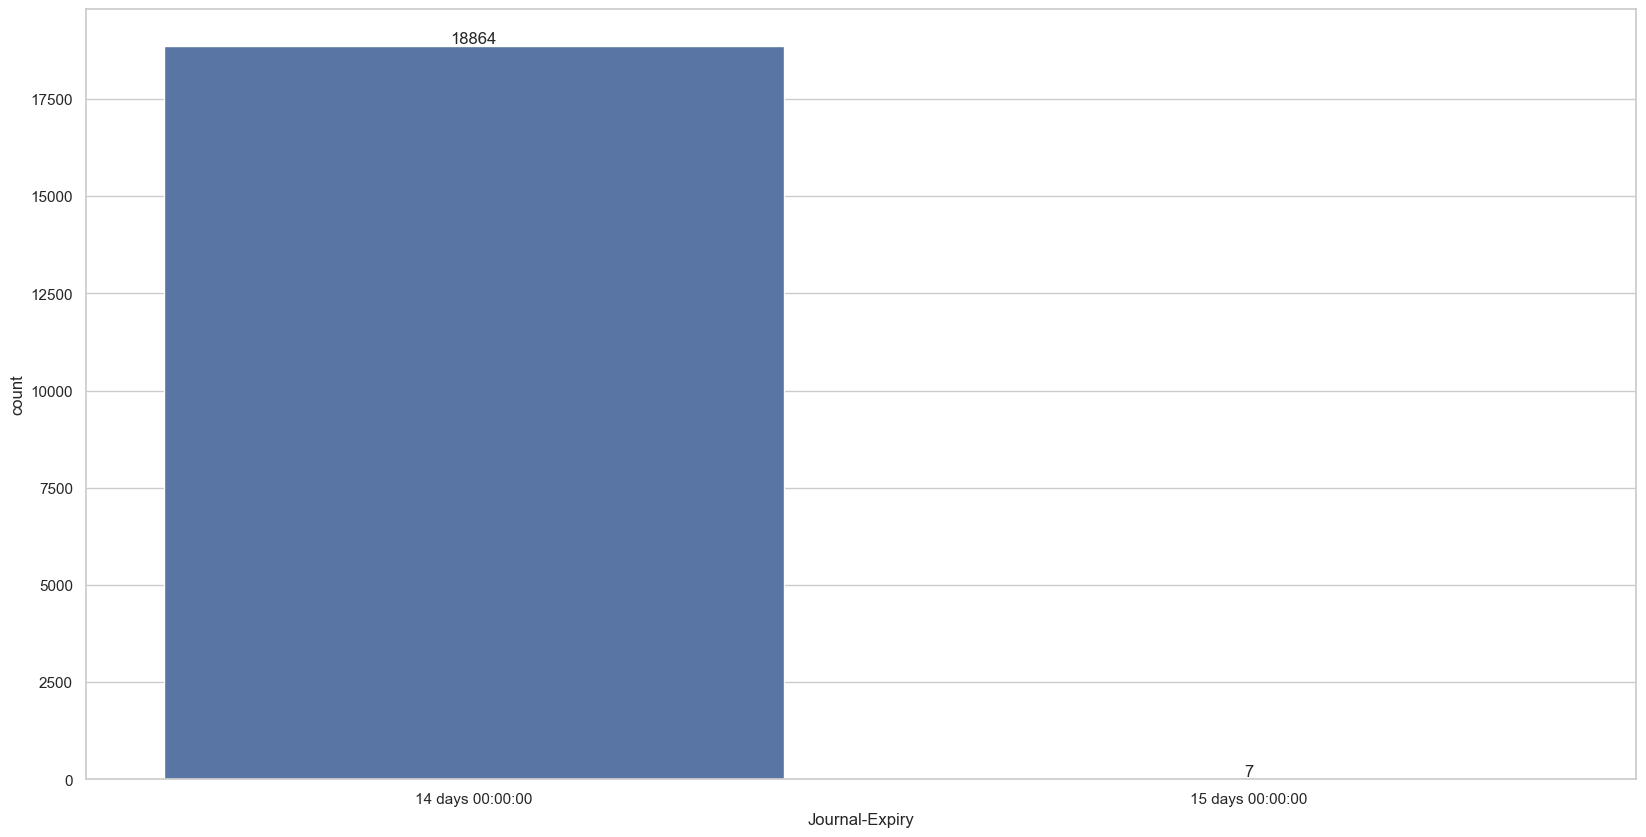

In [162]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.countplot(donor_dates,x='Journal-Expiry')
ax.bar_label(ax.containers[0])  
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=0)
# Show the plot
plt.show()

Looking into this graph we can say all the bonds have in 14 days and the counts are in the during days

In [163]:
perfect_data.columns 

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination'],
      dtype='object')

In [164]:
encashed_dates = perfect_data[['unique_key','JournalDate', 'PurchaseDate', 'ExpiryDate','DateEncashment']]
encashed_dates.head(2) 

unique_key JournalDate PurchaseDate ExpiryDate DateEncashment
0    TL11448  2019-04-12   2019-04-12 2019-04-26     2019-04-25
1    TL11447  2019-04-12   2019-04-12 2019-04-26     2019-04-25

In [165]:
encashed_dates['buy-encash'] = encashed_dates['DateEncashment'] - encashed_dates['PurchaseDate']

In [166]:
encashed_dates.head(2)

unique_key JournalDate PurchaseDate ExpiryDate DateEncashment buy-encash
0    TL11448  2019-04-12   2019-04-12 2019-04-26     2019-04-25    13 days
1    TL11447  2019-04-12   2019-04-12 2019-04-26     2019-04-25    13 days

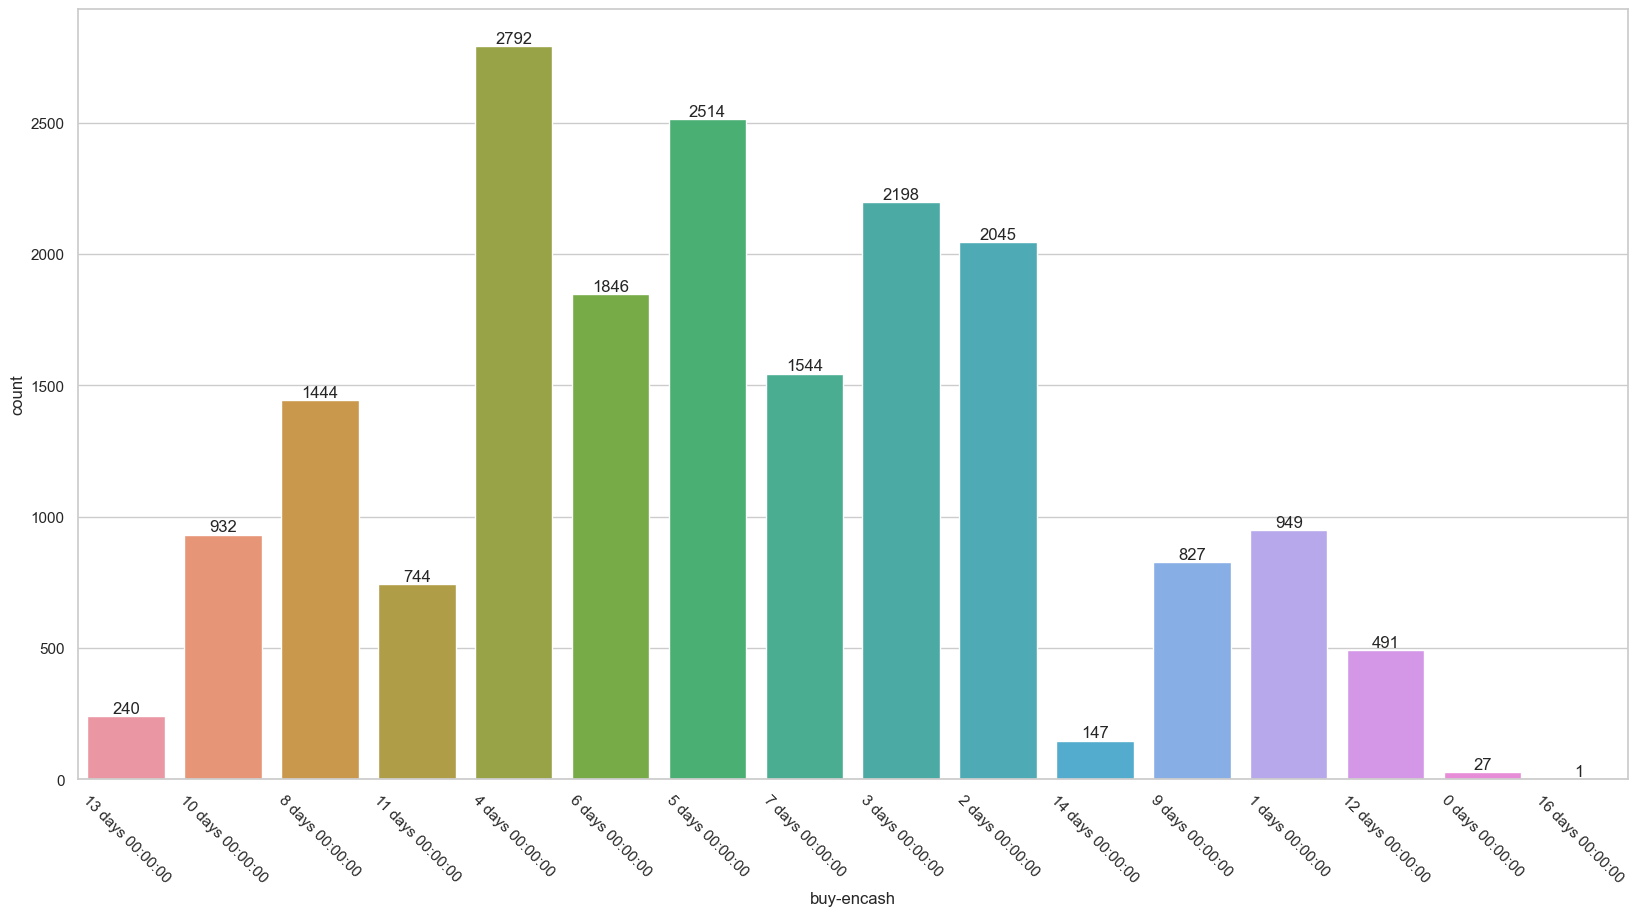

In [167]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.countplot(encashed_dates,x='buy-encash')
ax.bar_label(ax.containers[0])  
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
# Show the plot
plt.show()

In [168]:
black_data = perfect_data[perfect_data['DateEncashment']>perfect_data['ExpiryDate']]
black_data

Urn JournalDate PurchaseDate ExpiryDate  \
4974  00800202107070000001869  2021-07-07   2021-07-07 2021-07-21   

                                             Purchaser Prefix  BondNumber  \
4974  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      8637.0   

      PayBranchCode_x  IssueTeller unique_key DateEncashment  \
4974            800.0    7273126.0     OC8637     2021-07-23   

                         PartyName   AccountNum  PayBranchCode_y  PayTeller  \
4974  ALL INDIA TRINAMOOL CONGRESS  *******0688              1.0  3480909.0   

      encashedyear  Denomination  
4974        2021.0    10000000.0

> This is the only bond which got encashed even after it got expired and this was encashed by **All INDIA Trinalmool congress** which could be the data is wrong (Provided by the govt) or Some Quid proco has been there between the party and the bank.

## Party and company analysis 

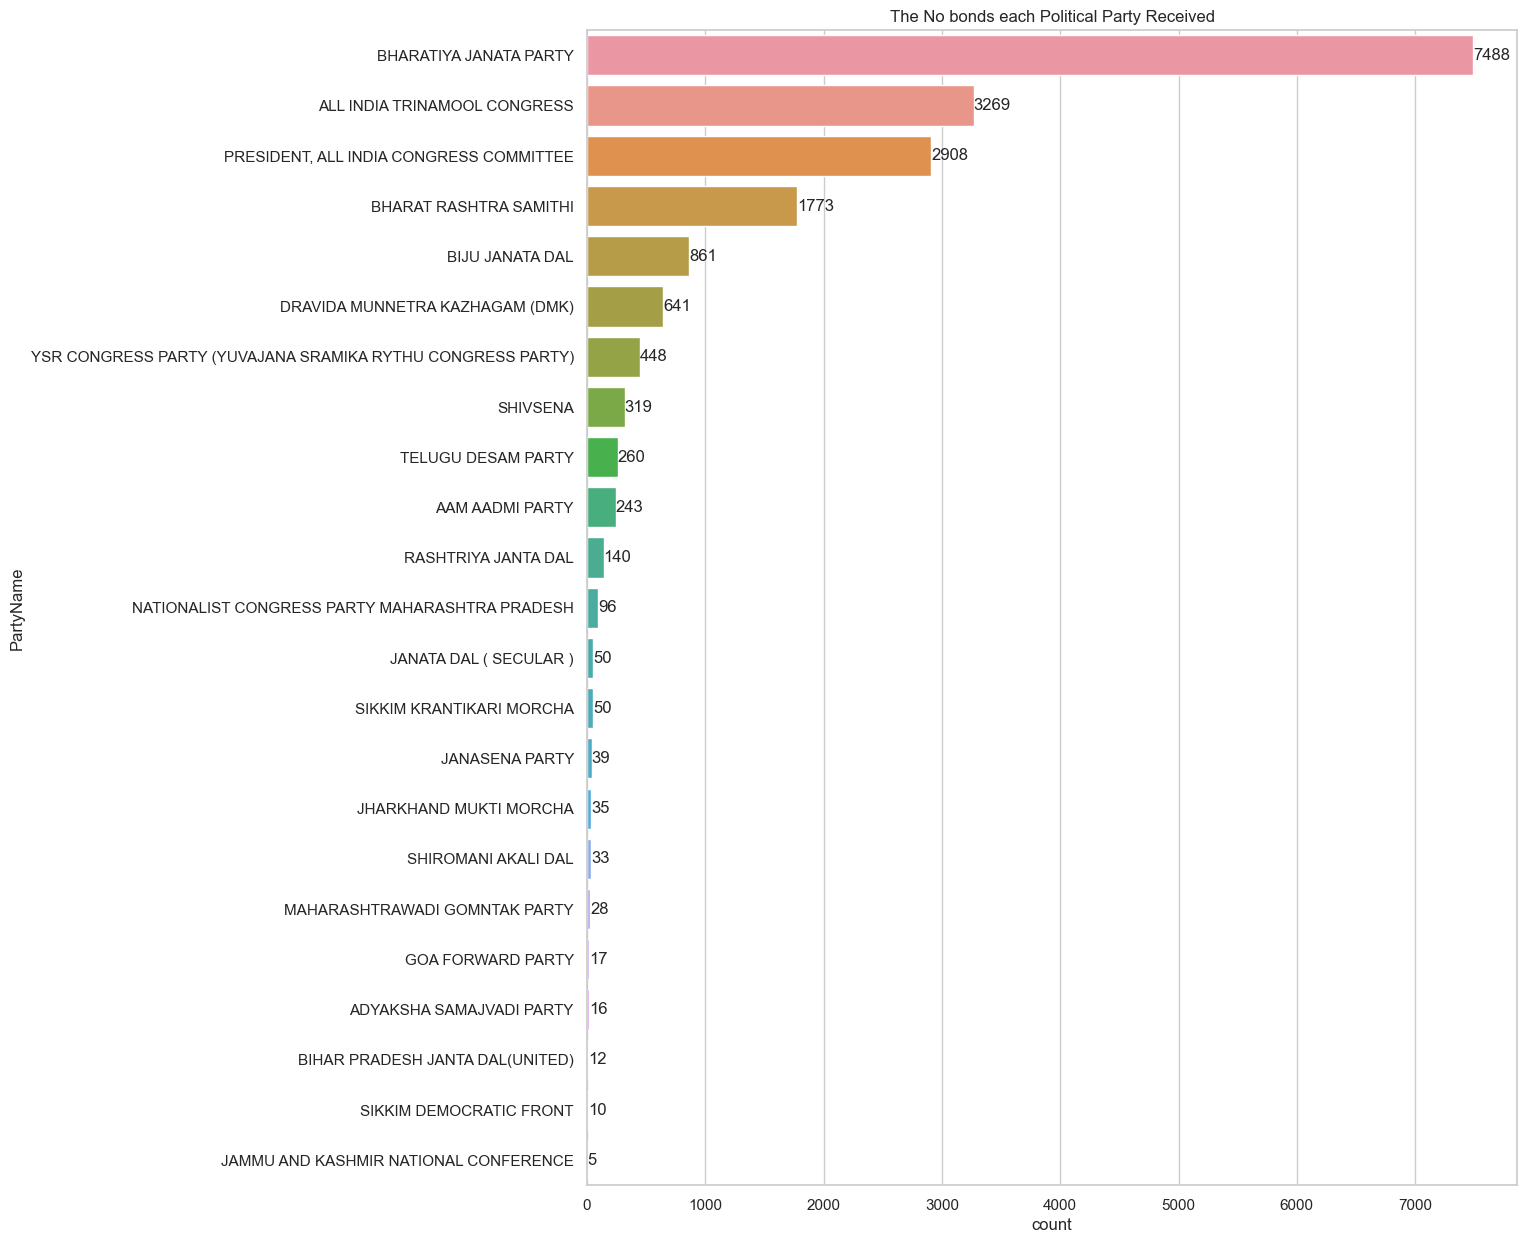

In [169]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a horizontal count plot
plt.figure(figsize=(12, 15))  # Set the figure size (width, height) in inches

# Create the horizontal count plot with y-labels on the bars
ax = sns.countplot(data=alldata_df, y='PartyName', order=alldata_df['PartyName'].value_counts().index)
ax.bar_label(ax.containers[0], fmt='%.0f')  # Display count labels on the bars
# title
plt.title('The No bonds each Political Party Received')
# Show the plot
plt.show()

- this graph shows the number of bonds each political party has received
- in all the party the all india trinamool congress party has received highest bond counts
- the jammu and kashmir national conference party has received lowest bond counts


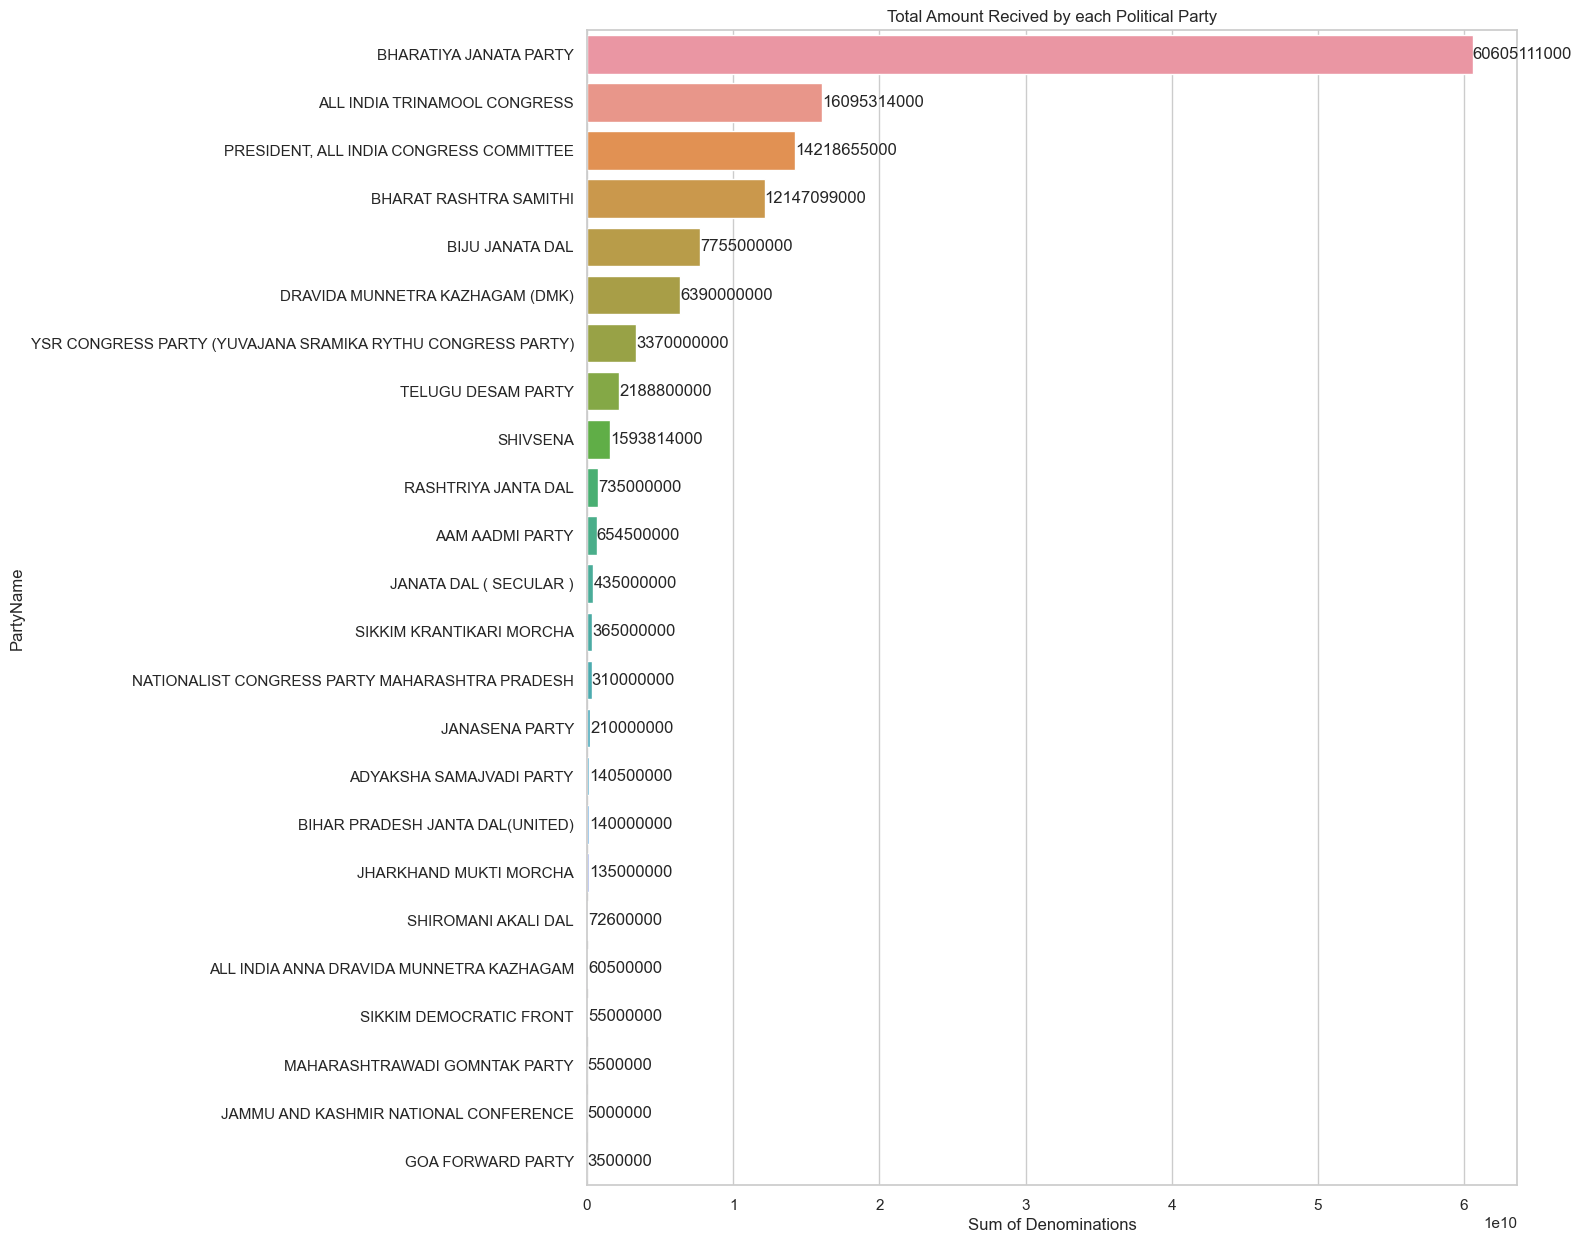

In [170]:
# Calculate the sum of 'Denominations' for each 'PartyName'
sum_denominations = reciverdata.groupby('PartyName')['Denominations'].sum().sort_values(ascending=False).reset_index()

# Plotting using Seaborn barplot
plt.figure(figsize=(12, 15))  # Set the figure size (width, height) in inches

# Create the horizontal bar plot with 'PartyName' on y-axis and summed 'Denominations' on x-axis
ax = sns.barplot(data=sum_denominations, y='PartyName', x='Denominations')

# Add count labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')  # Display count labels on the bars

# Set plot title and labels
plt.title('Total Amount Recived by each Political Party')
plt.xlabel('Sum of Denominations')
plt.ylabel('PartyName')

# Show the plot
plt.show()

- the plot graph as showing the total amount received by each political party
- the bharathiya jaanatha party has received highest denominations to compare with other parties
- Goa forward party has received lowest amount 

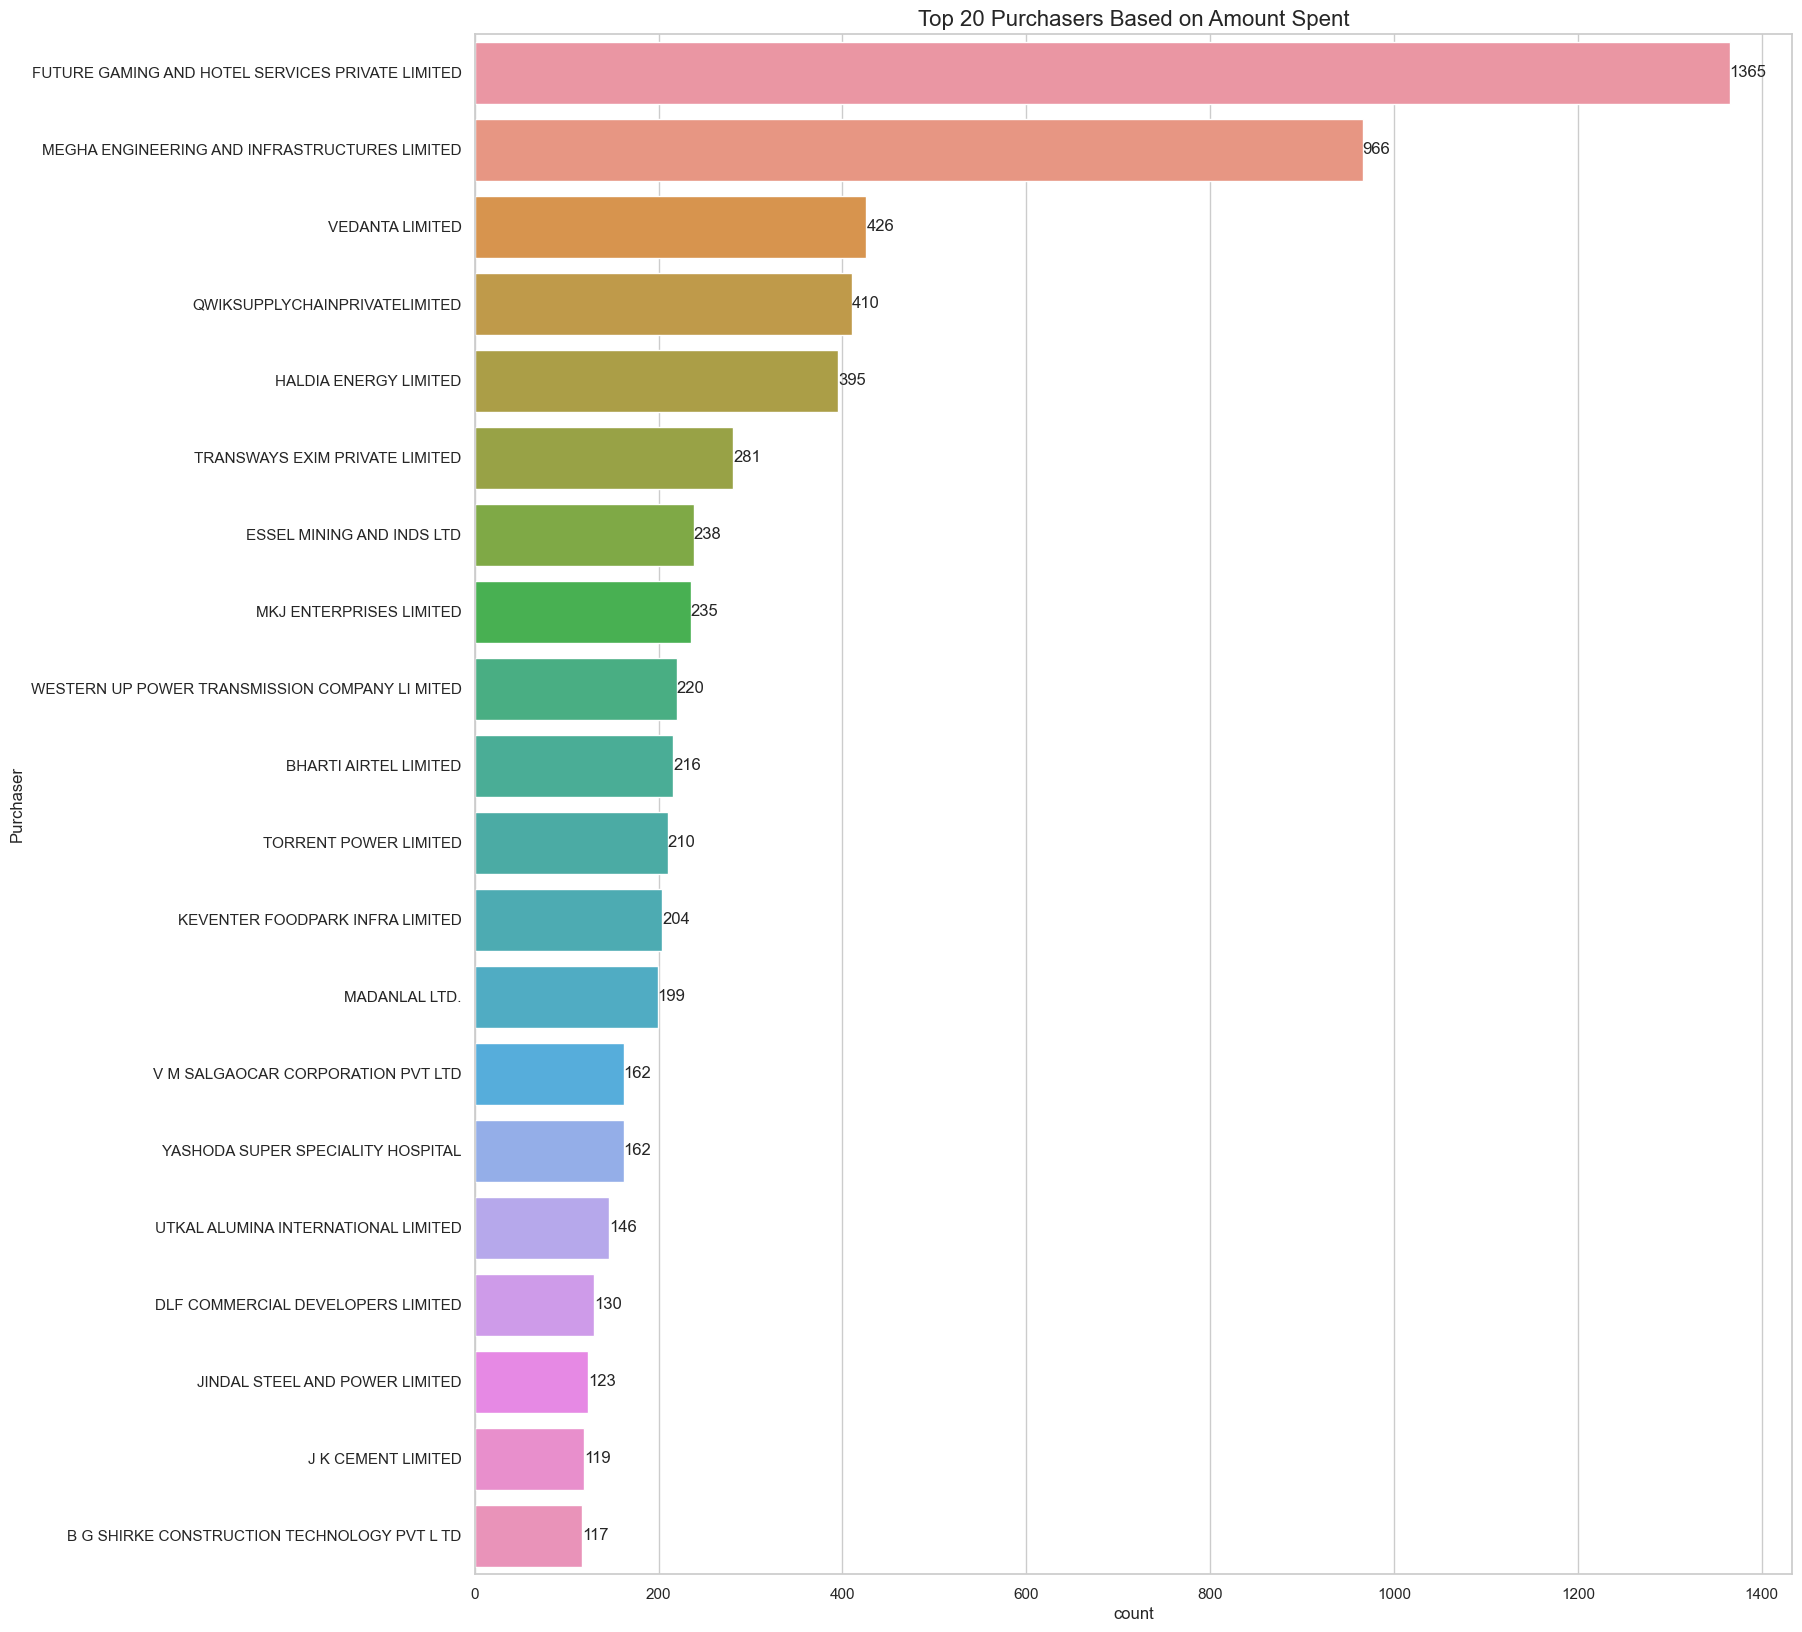

In [171]:
# Calculate the top 20 purchasers based on frequency
top_purchasers = alldata_df['Purchaser'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 purchasers
filtered_df = alldata_df[alldata_df['Purchaser'].isin(top_purchasers)]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 20))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.countplot(data=filtered_df, y='Purchaser', order=top_purchasers)  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0])  # Display count labels on the bars

# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
# title 
plt.title('Top 20 Purchasers Based on Amount Spent', fontsize=16)
# Show the plot
plt.show()

- this graph is showing top 20 purchasers based on amount spent
- the "future gaming and hotel services pr"  spends the most money more than the other company
- "MS.Ramesh agarwal C S Bottling PL" and "castle liquor priva limited" spend the least amount of money among the top 20 purchasers. 

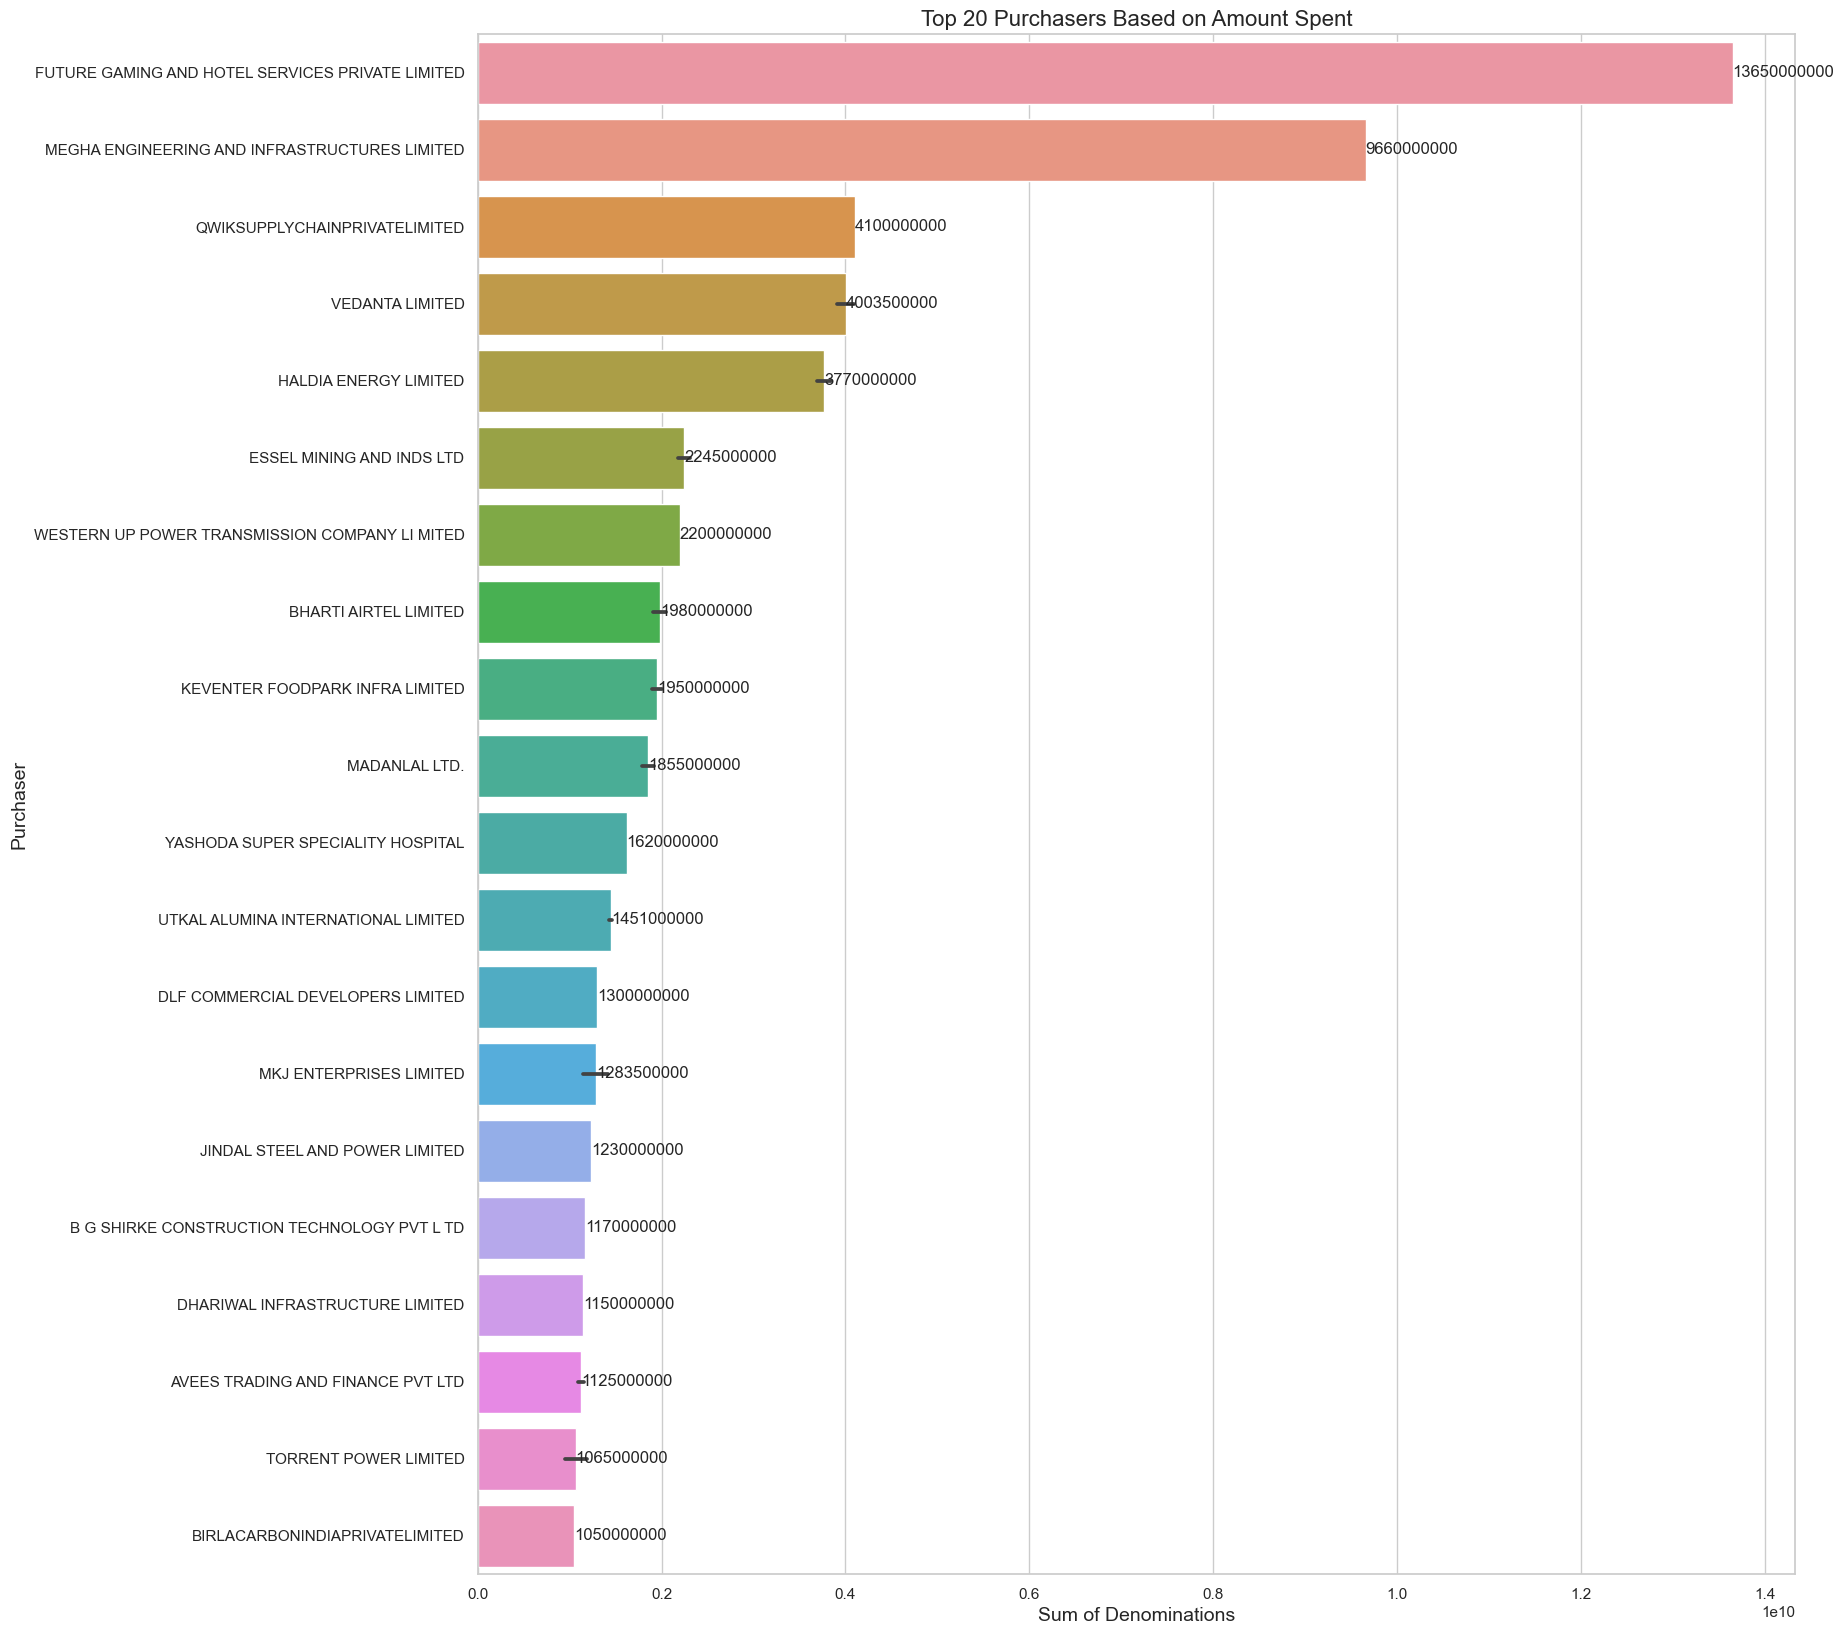

In [172]:
# Calculate the top 20 purchasers based on sum of denominations
top_purchasers = alldata_df.groupby('Purchaser')['Denomination'].sum().nlargest(20).index

# Filter the DataFrame to include only the top 20 purchasers
filtered_df = alldata_df[alldata_df['Purchaser'].isin(top_purchasers)]

# Create the horizontal bar plot for the top 20 purchasers based on sum of denominations
plt.figure(figsize=(17, 20))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, y='Purchaser', x='Denomination', order=top_purchasers, estimator=sum)  

# Display the sum of denominations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

# Set plot title and labels
plt.title('Top 20 Purchasers Based on Amount Spent', fontsize=16)
plt.xlabel('Sum of Denominations', fontsize=14)
plt.ylabel('Purchaser', fontsize=14)
plt.show()

- this horizontal count plot shows top 20 purchaser based on amount spent
- in this graph  future gaming and hotel service pr spend more than opother purchaser
- in this graph "VEDANTA LIMITED" has the lowest sum of denominations among the tpo 20 purchasers


In [173]:
top_donors_amtwise = list(top_purchasers)
top_donors_amtwise

['FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED',
 'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED',
 'QWIKSUPPLYCHAINPRIVATELIMITED',
 'VEDANTA LIMITED',
 'HALDIA ENERGY LIMITED',
 'ESSEL MINING AND INDS LTD',
 'WESTERN UP POWER TRANSMISSION COMPANY LI MITED',
 'BHARTI AIRTEL LIMITED',
 'KEVENTER FOODPARK INFRA LIMITED',
 'MADANLAL LTD.',
 'YASHODA SUPER SPECIALITY HOSPITAL',
 'UTKAL ALUMINA INTERNATIONAL LIMITED',
 'DLF COMMERCIAL DEVELOPERS LIMITED',
 'MKJ ENTERPRISES LIMITED',
 'JINDAL STEEL AND POWER LIMITED',
 'B G SHIRKE CONSTRUCTION TECHNOLOGY PVT L TD',
 'DHARIWAL INFRASTRUCTURE LIMITED',
 'AVEES TRADING AND FINANCE PVT LTD',
 'TORRENT POWER LIMITED',
 'BIRLACARBONINDIAPRIVATELIMITED']

## Analyzing Top 5 companies 

In [174]:
filtered_df = perfect_data[perfect_data['Purchaser'].isin(top_purchasers)]
# Extract year from 'PurchaseDate'
filtered_df['Year'] = filtered_df['PurchaseDate'].dt.year
filtered_df.groupby(['Purchaser','Year','PartyName'])['Denomination'].sum().reset_index()

Purchaser  Year  \
0    AVEES TRADING AND FINANCE PVT LTD  2019   
1    AVEES TRADING AND FINANCE PVT LTD  2021   
2    AVEES TRADING AND FINANCE PVT LTD  2022   
3    AVEES TRADING AND FINANCE PVT LTD  2022   
4    AVEES TRADING AND FINANCE PVT LTD  2023   
..                                 ...   ...   
138  YASHODA SUPER SPECIALITY HOSPITAL  2022   
139  YASHODA SUPER SPECIALITY HOSPITAL  2022   
140  YASHODA SUPER SPECIALITY HOSPITAL  2022   
141  YASHODA SUPER SPECIALITY HOSPITAL  2023   
142  YASHODA SUPER SPECIALITY HOSPITAL  2023   

                                             PartyName  Denomination  
0                         ALL INDIA TRINAMOOL CONGRESS   240000000.0  
1                         ALL INDIA TRINAMOOL CONGRESS   150000000.0  
2                                      AAM AADMI PARTY   100000000.0  
3                                      BIJU JANATA DAL    30000000.0  
4                         ALL INDIA TRINAMOOL CONGRESS    65000000.0  
..                                                 ...           ...  
138                             BHARAT RASHTRA SAMITHI   800000000.0  
139            PRESIDENT, ALL INDIA CONGRESS COMMITTEE    70000000.0  
140  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...    10000000.0  
141                             BHARAT RASHTRA SAMITHI    90000000.0  
142            PRESIDENT, ALL INDIA CONGRESS COMMITTEE   470000000.0  

[143 rows x 4 columns]

# 'FUTURE GAMING AND HOTEL SERVICES PR'

In [175]:
filtered_df

Urn JournalDate PurchaseDate ExpiryDate  \
26     00001201904120000001165  2019-04-12   2019-04-12 2019-04-26   
27     00001201904120000001165  2019-04-12   2019-04-12 2019-04-26   
28     00001201904120000001165  2019-04-12   2019-04-12 2019-04-26   
29     00001201904120000001165  2019-04-12   2019-04-12 2019-04-26   
30     00001201904120000001165  2019-04-12   2019-04-12 2019-04-26   
...                        ...         ...          ...        ...   
18858  00847202401110000003738  2024-01-11   2024-01-11 2024-01-25   
18859  00847202401110000003738  2024-01-11   2024-01-11 2024-01-25   
18860  00847202401110000003738  2024-01-11   2024-01-11 2024-01-25   
18861  00847202401110000003738  2024-01-11   2024-01-11 2024-01-25   
18862  00847202401110000003738  2024-01-11   2024-01-11 2024-01-25   

                                            Purchaser Prefix  BondNumber  \
26                          ESSEL MINING AND INDS LTD     OC      6297.0   
27                          ESSEL MINING AND INDS LTD     OC      6275.0   
28                          ESSEL MINING AND INDS LTD     OC      6261.0   
29                          ESSEL MINING AND INDS LTD     OC      6278.0   
30                          ESSEL MINING AND INDS LTD     OC      6262.0   
...                                               ...    ...         ...   
18858  WESTERN UP POWER TRANSMISSION COMPANY LI MITED     OC     17059.0   
18859  WESTERN UP POWER TRANSMISSION COMPANY LI MITED     OC     17063.0   
18860  WESTERN UP POWER TRANSMISSION COMPANY LI MITED     OC     17091.0   
18861  WESTERN UP POWER TRANSMISSION COMPANY LI MITED     OC     17087.0   
18862  WESTERN UP POWER TRANSMISSION COMPANY LI MITED     OC     17065.0   

       PayBranchCode_x  IssueTeller unique_key DateEncashment  \
26                 1.0    5899230.0     OC6297     2019-04-20   
27                 1.0    5899230.0     OC6275     2019-04-20   
28                 1.0    5899230.0     OC6261     2019-04-20   
29                 1.0    5899230.0     OC6278     2019-04-20   
30                 1.0    5899230.0     OC6262     2019-04-20   
...                ...          ...        ...            ...   
18858            847.0    6458726.0    OC17059     2024-01-16   
18859            847.0    6458726.0    OC17063     2024-01-16   
18860            847.0    6458726.0    OC17091     2024-01-16   
18861            847.0    6458726.0    OC17087     2024-01-16   
18862            847.0    6458726.0    OC17065     2024-01-16   

                    PartyName   AccountNum  PayBranchCode_y  PayTeller  \
26     BHARATIYA JANATA PARTY  *******8244            691.0  2039265.0   
27     BHARATIYA JANATA PARTY  *******8244            691.0  2039265.0   
28     BHARATIYA JANATA PARTY  *******8244            691.0  2039265.0   
29     BHARATIYA JANATA PARTY  *******8244            691.0  2039265.0   
30     BHARATIYA JANATA PARTY  *******8244            691.0  2039265.0   
...                       ...          ...              ...        ...   
18858      TELUGU DESAM PARTY  *******3067            847.0  6391354.0   
18859      TELUGU DESAM PARTY  *******3067            847.0  6391354.0   
18860      TELUGU DESAM PARTY  *******3067            847.0  6391354.0   
18861      TELUGU DESAM PARTY  *******3067            847.0  6391354.0   
18862      TELUGU DESAM PARTY  *******3067            847.0  6391354.0   

       encashedyear  Denomination  Year  
26           2019.0    10000000.0  2019  
27           2019.0    10000000.0  2019  
28           2019.0    10000000.0  2019  
29           2019.0    10000000.0  2019  
30           2019.0    10000000.0  2019  
...             ...           ...   ...  
18858        2024.0    10000000.0  2024  
18859        2024.0    10000000.0  2024  
18860        2024.0    10000000.0  2024  
18861        2024.0    10000000.0  2024  
18862        2024.0    10000000.0  2024  

[6099 rows x 18 columns]

In [176]:
company_name =  'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED'
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name] 
company_name_df

Urn JournalDate PurchaseDate ExpiryDate  \
3342   00800202010210000001642  2020-10-21   2020-10-21 2020-11-04   
3343   00800202010210000001642  2020-10-21   2020-10-21 2020-11-04   
3344   00800202010210000001642  2020-10-21   2020-10-21 2020-11-04   
3345   00800202010210000001642  2020-10-21   2020-10-21 2020-11-04   
3346   00800202010210000001642  2020-10-21   2020-10-21 2020-11-04   
...                        ...         ...          ...        ...   
18331  00800202401090000003682  2024-01-09   2024-01-09 2024-01-23   
18332  00800202401090000003682  2024-01-09   2024-01-09 2024-01-23   
18333  00800202401090000003682  2024-01-09   2024-01-09 2024-01-23   
18334  00800202401090000003682  2024-01-09   2024-01-09 2024-01-23   
18335  00800202401090000003682  2024-01-09   2024-01-09 2024-01-23   

                                              Purchaser Prefix  BondNumber  \
3342   FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      5761.0   
3343   FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      5772.0   
3344   FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      5793.0   
3345   FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      5776.0   
3346   FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      5726.0   
...                                                 ...    ...         ...   
18331  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     15266.0   
18332  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     15284.0   
18333  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     15260.0   
18334  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     15314.0   
18335  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     15232.0   

       PayBranchCode_x  IssueTeller unique_key DateEncashment  \
3342             800.0    4004833.0     OC5761     2020-10-23   
3343             800.0    4004833.0     OC5772     2020-10-23   
3344             800.0    4004833.0     OC5793     2020-10-23   
3345             800.0    4004833.0     OC5776     2020-10-23   
3346             800.0    4004833.0     OC5726     2020-10-23   
...                ...          ...        ...            ...   
18331            800.0    7910576.0    OC15266     2024-01-11   
18332            800.0    7910576.0    OC15284     2024-01-11   
18333            800.0    7910576.0    OC15260     2024-01-11   
18334            800.0    7910576.0    OC15314     2024-01-11   
18335            800.0    7910576.0    OC15232     2024-01-11   

                             PartyName   AccountNum  PayBranchCode_y  \
3342   DRAVIDA MUNNETRA KAZHAGAM (DMK)  *******8935            800.0   
3343   DRAVIDA MUNNETRA KAZHAGAM (DMK)  *******8935            800.0   
3344   DRAVIDA MUNNETRA KAZHAGAM (DMK)  *******8935            800.0   
3345   DRAVIDA MUNNETRA KAZHAGAM (DMK)  *******8935            800.0   
3346   DRAVIDA MUNNETRA KAZHAGAM (DMK)  *******8935            800.0   
...                                ...          ...              ...   
18331     ALL INDIA TRINAMOOL CONGRESS  *******0688              1.0   
18332     ALL INDIA TRINAMOOL CONGRESS  *******0688              1.0   
18333     ALL INDIA TRINAMOOL CONGRESS  *******0688              1.0   
18334     ALL INDIA TRINAMOOL CONGRESS  *******0688              1.0   
18335     ALL INDIA TRINAMOOL CONGRESS  *******0688              1.0   

       PayTeller  encashedyear  Denomination  Year  
3342   5614473.0        2020.0    10000000.0  2020  
3343   5614473.0        2020.0    10000000.0  2020  
3344   5614473.0        2020.0    10000000.0  2020  
3345   5614473.0        2020.0    10000000.0  2020  
3346   5614473.0        2020.0    10000000.0  2020  
...          ...           ...           ...   ...  
18331  3490777.0        2024.0    10000000.0  2024  
18332  3490777.0        2024.0    10000000.0  2024  
18333  3490777.0        2024.0    10000000.0  2024  
18334  3490777.0        2024.0    10000000.0  2024  
18335  3490777.0    

In [177]:
company_amt_agg_df = company_name_df.groupby('Year')['Denomination'].agg(
    Denominations_sum=('sum'),
    Denominations_count=('count')
).reset_index()
company_amt_agg_df

Year  Denominations_sum  Denominations_count
0  2020       1.500000e+09                  150
1  2021       3.340000e+09                  334
2  2022       4.970000e+09                  497
3  2023       3.210000e+09                  321
4  2024       6.300000e+08                   63

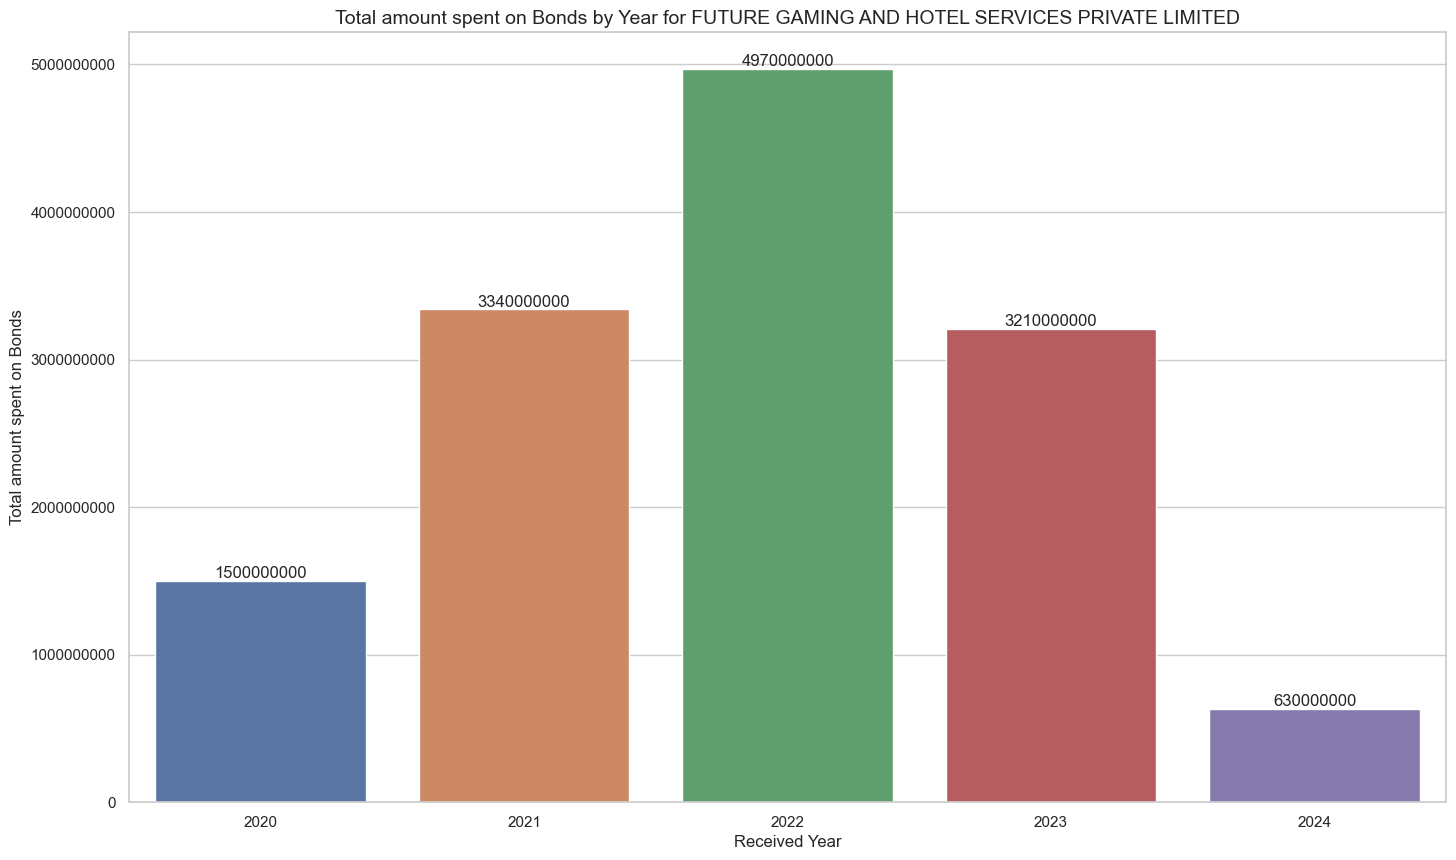

In [178]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg_df, x='Year', y='Denominations_sum')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- The bar chart illustrates the total amount spent on bonds by year for Future Gaming and Hotel Services Private Limited from 2020 to 2024
- The total amount spent on bonds generally increased from 2020 to 2022, followed by a decline in 2023 and 2024

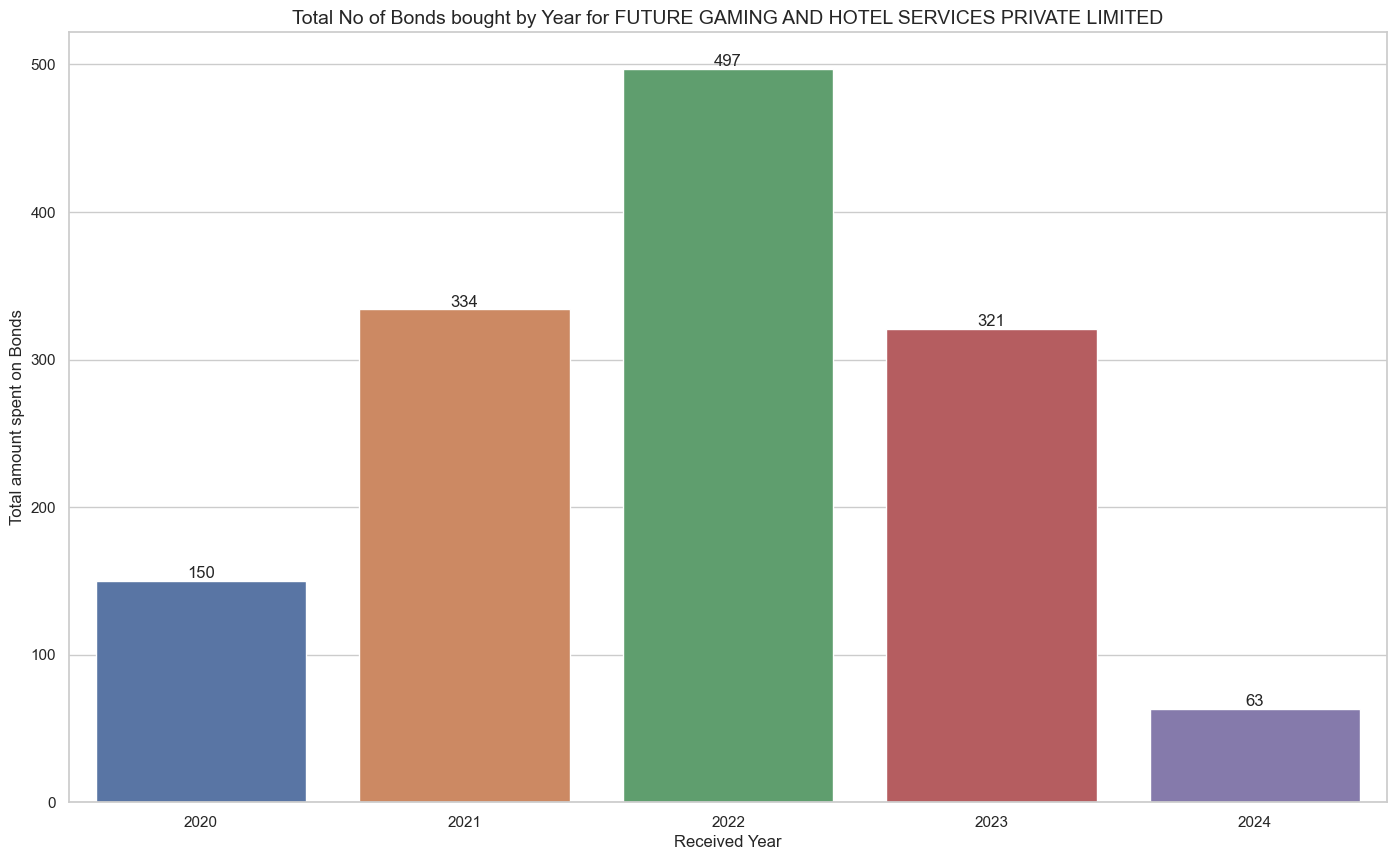

In [179]:
# Create the count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg_df, x='Year', y='Denominations_count')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total No of Bonds bought by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- The chart depicts the total number of bonds bought annually by Future Gaming and Hotel Services Private Limited from 2020 to 2024
- in 2022 the total amount spent on bonds has received highest 
- in 2024 the lowest 63 bonds has bought.

In [180]:
# Group by 'Year' and 'PartyName', and aggregate 'Denomination' using custom names for the aggregated columns
company_amt_agg_partyname_df = company_name_df.groupby(['Year', 'PartyName']).agg(
    Denominations_sum=('Denomination', 'sum'),
    Denominations_count=('Denomination', 'count')
).reset_index()

company_amt_agg_partyname_df

Year                                          PartyName  \
0   2020                       ALL INDIA TRINAMOOL CONGRESS   
1   2020                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
2   2020  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...   
3   2021                       ALL INDIA TRINAMOOL CONGRESS   
4   2021                             BHARATIYA JANATA PARTY   
5   2021                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
6   2021  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...   
7   2022                       ALL INDIA TRINAMOOL CONGRESS   
8   2022                             BHARATIYA JANATA PARTY   
9   2022                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
10  2022                           SIKKIM KRANTIKARI MORCHA   
11  2022  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...   
12  2023                       ALL INDIA TRINAMOOL CONGRESS   
13  2023                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
14  2023            PRESIDENT, ALL INDIA CONGRESS COMMITTEE   
15  2023                            SIKKIM DEMOCRATIC FRONT   
16  2023                           SIKKIM KRANTIKARI MORCHA   
17  2024                       ALL INDIA TRINAMOOL CONGRESS   
18  2024                           SIKKIM KRANTIKARI MORCHA   

    Denominations_sum  Denominations_count  
0        1.000000e+07                    1  
1        6.000000e+08                   60  
2        8.900000e+08                   89  
3        7.600000e+08                   76  
4        5.000000e+08                   50  
5        1.480000e+09                  148  
6        6.000000e+08                   60  
7        1.850000e+09                  185  
8        5.000000e+08                   50  
9        2.550000e+09                  255  
10       2.000000e+07                    2  
11       5.000000e+07                    5  
12       2.200000e+09                  220  
13       4.000000e+08                   40  
14       5.000000e+08                   50  
15       5.000000e+07                    5  
16       6.000000e+07                    6  
17       6.000000e+08                   60  
18       3.000000e+07                    3

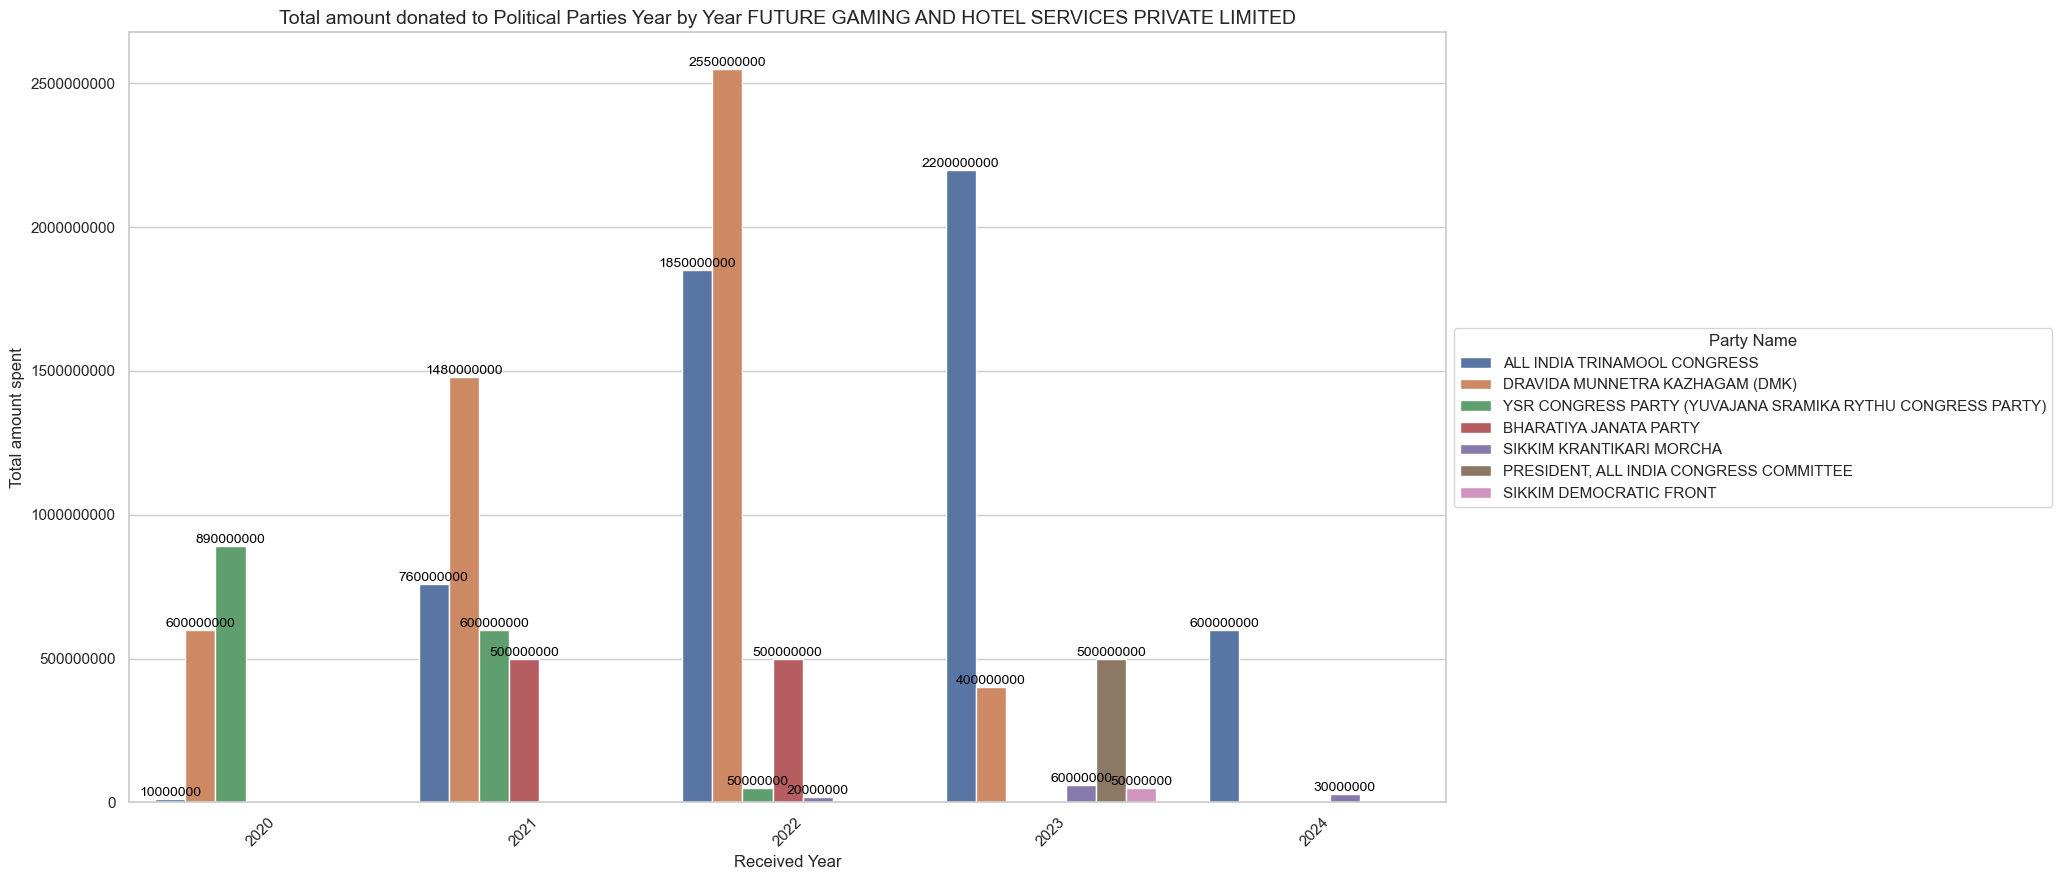

In [181]:
# Create the grouped bar plot
plt.figure(figsize=(17, 10))
ax = sns.barplot(data=company_amt_agg_partyname_df, x='Year', y='Denominations_sum', hue='PartyName')

# Iterate over each container (group of bars)
for container in ax.containers:
    # Iterate over each bar in the container and add labels
    for bar in container:
        # Get the height of the bar
        height = bar.get_height()
        # Add the value label to the bar
        ax.annotate(f'{height:.0f}', 
                    (bar.get_x() + bar.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent', fontsize=12)
plt.title(f'Total amount donated to Political Parties Year by Year {company_name}', fontsize=14)

# Rotate y-axis labels by -45 degrees for better readability
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Move legend to the right and outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Party Name')

# Show the plot
plt.show()

- The chart shows  Future Gaming and Hotel Services Private Limited donated to political parties from 2020 to 2024
- The DRAVIDA MUNNETRA KAZHAGAM(DMK) has received highest  bonds from future gaming and hotel services private limited 
- comparing with all company the sikkim democratic front has company has received lowest bonds from guture gaming and hotel services private limited
 

In [182]:
# Due to some reason some of the sankeys are not working dirtectly but this problem is resolved when we are exporting the data frame to a csv file and recreating
# again as a new dataframe --> as of now I don't the reason but as a bandaid solution I am applying thisabs 

#exporting to a csv file 
company_name_df.to_csv('temp_files.csv')
# Reimporting as a dataframe 
company_name_df.to_csv('temp_files.csv')

In [183]:
company_name_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination', 'Year'],
      dtype='object')

In [184]:
company_name_df

Urn JournalDate PurchaseDate ExpiryDate  \
3342   00800202010210000001642  2020-10-21   2020-10-21 2020-11-04   
3343   00800202010210000001642  2020-10-21   2020-10-21 2020-11-04   
3344   00800202010210000001642  2020-10-21   2020-10-21 2020-11-04   
3345   00800202010210000001642  2020-10-21   2020-10-21 2020-11-04   
3346   00800202010210000001642  2020-10-21   2020-10-21 2020-11-04   
...                        ...         ...          ...        ...   
18331  00800202401090000003682  2024-01-09   2024-01-09 2024-01-23   
18332  00800202401090000003682  2024-01-09   2024-01-09 2024-01-23   
18333  00800202401090000003682  2024-01-09   2024-01-09 2024-01-23   
18334  00800202401090000003682  2024-01-09   2024-01-09 2024-01-23   
18335  00800202401090000003682  2024-01-09   2024-01-09 2024-01-23   

                                              Purchaser Prefix  BondNumber  \
3342   FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      5761.0   
3343   FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      5772.0   
3344   FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      5793.0   
3345   FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      5776.0   
3346   FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      5726.0   
...                                                 ...    ...         ...   
18331  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     15266.0   
18332  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     15284.0   
18333  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     15260.0   
18334  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     15314.0   
18335  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     15232.0   

       PayBranchCode_x  IssueTeller unique_key DateEncashment  \
3342             800.0    4004833.0     OC5761     2020-10-23   
3343             800.0    4004833.0     OC5772     2020-10-23   
3344             800.0    4004833.0     OC5793     2020-10-23   
3345             800.0    4004833.0     OC5776     2020-10-23   
3346             800.0    4004833.0     OC5726     2020-10-23   
...                ...          ...        ...            ...   
18331            800.0    7910576.0    OC15266     2024-01-11   
18332            800.0    7910576.0    OC15284     2024-01-11   
18333            800.0    7910576.0    OC15260     2024-01-11   
18334            800.0    7910576.0    OC15314     2024-01-11   
18335            800.0    7910576.0    OC15232     2024-01-11   

                             PartyName   AccountNum  PayBranchCode_y  \
3342   DRAVIDA MUNNETRA KAZHAGAM (DMK)  *******8935            800.0   
3343   DRAVIDA MUNNETRA KAZHAGAM (DMK)  *******8935            800.0   
3344   DRAVIDA MUNNETRA KAZHAGAM (DMK)  *******8935            800.0   
3345   DRAVIDA MUNNETRA KAZHAGAM (DMK)  *******8935            800.0   
3346   DRAVIDA MUNNETRA KAZHAGAM (DMK)  *******8935            800.0   
...                                ...          ...              ...   
18331     ALL INDIA TRINAMOOL CONGRESS  *******0688              1.0   
18332     ALL INDIA TRINAMOOL CONGRESS  *******0688              1.0   
18333     ALL INDIA TRINAMOOL CONGRESS  *******0688              1.0   
18334     ALL INDIA TRINAMOOL CONGRESS  *******0688              1.0   
18335     ALL INDIA TRINAMOOL CONGRESS  *******0688              1.0   

       PayTeller  encashedyear  Denomination  Year  
3342   5614473.0        2020.0    10000000.0  2020  
3343   5614473.0        2020.0    10000000.0  2020  
3344   5614473.0        2020.0    10000000.0  2020  
3345   5614473.0        2020.0    10000000.0  2020  
3346   5614473.0        2020.0    10000000.0  2020  
...          ...           ...           ...   ...  
18331  3490777.0        2024.0    10000000.0  2024  
18332  3490777.0        2024.0    10000000.0  2024  
18333  3490777.0        2024.0    10000000.0  2024  
18334  3490777.0        2024.0    10000000.0  2024  
18335  3490777.0    

In [186]:
# Due to some reason some of the sankeys are not working dirtectly but this problem is resolved when we are exporting the data frame to a csv file and recreating
# again as a new dataframe --> as of now I don't the reason but as a bandaid solution I am applying thisabs 

#exporting to a csv file 
company_name_df.to_csv("temp_files/check.csv")
# Reimporting as a dataframe 
company_name_df = pd.read_csv('temp_files/check.csv')

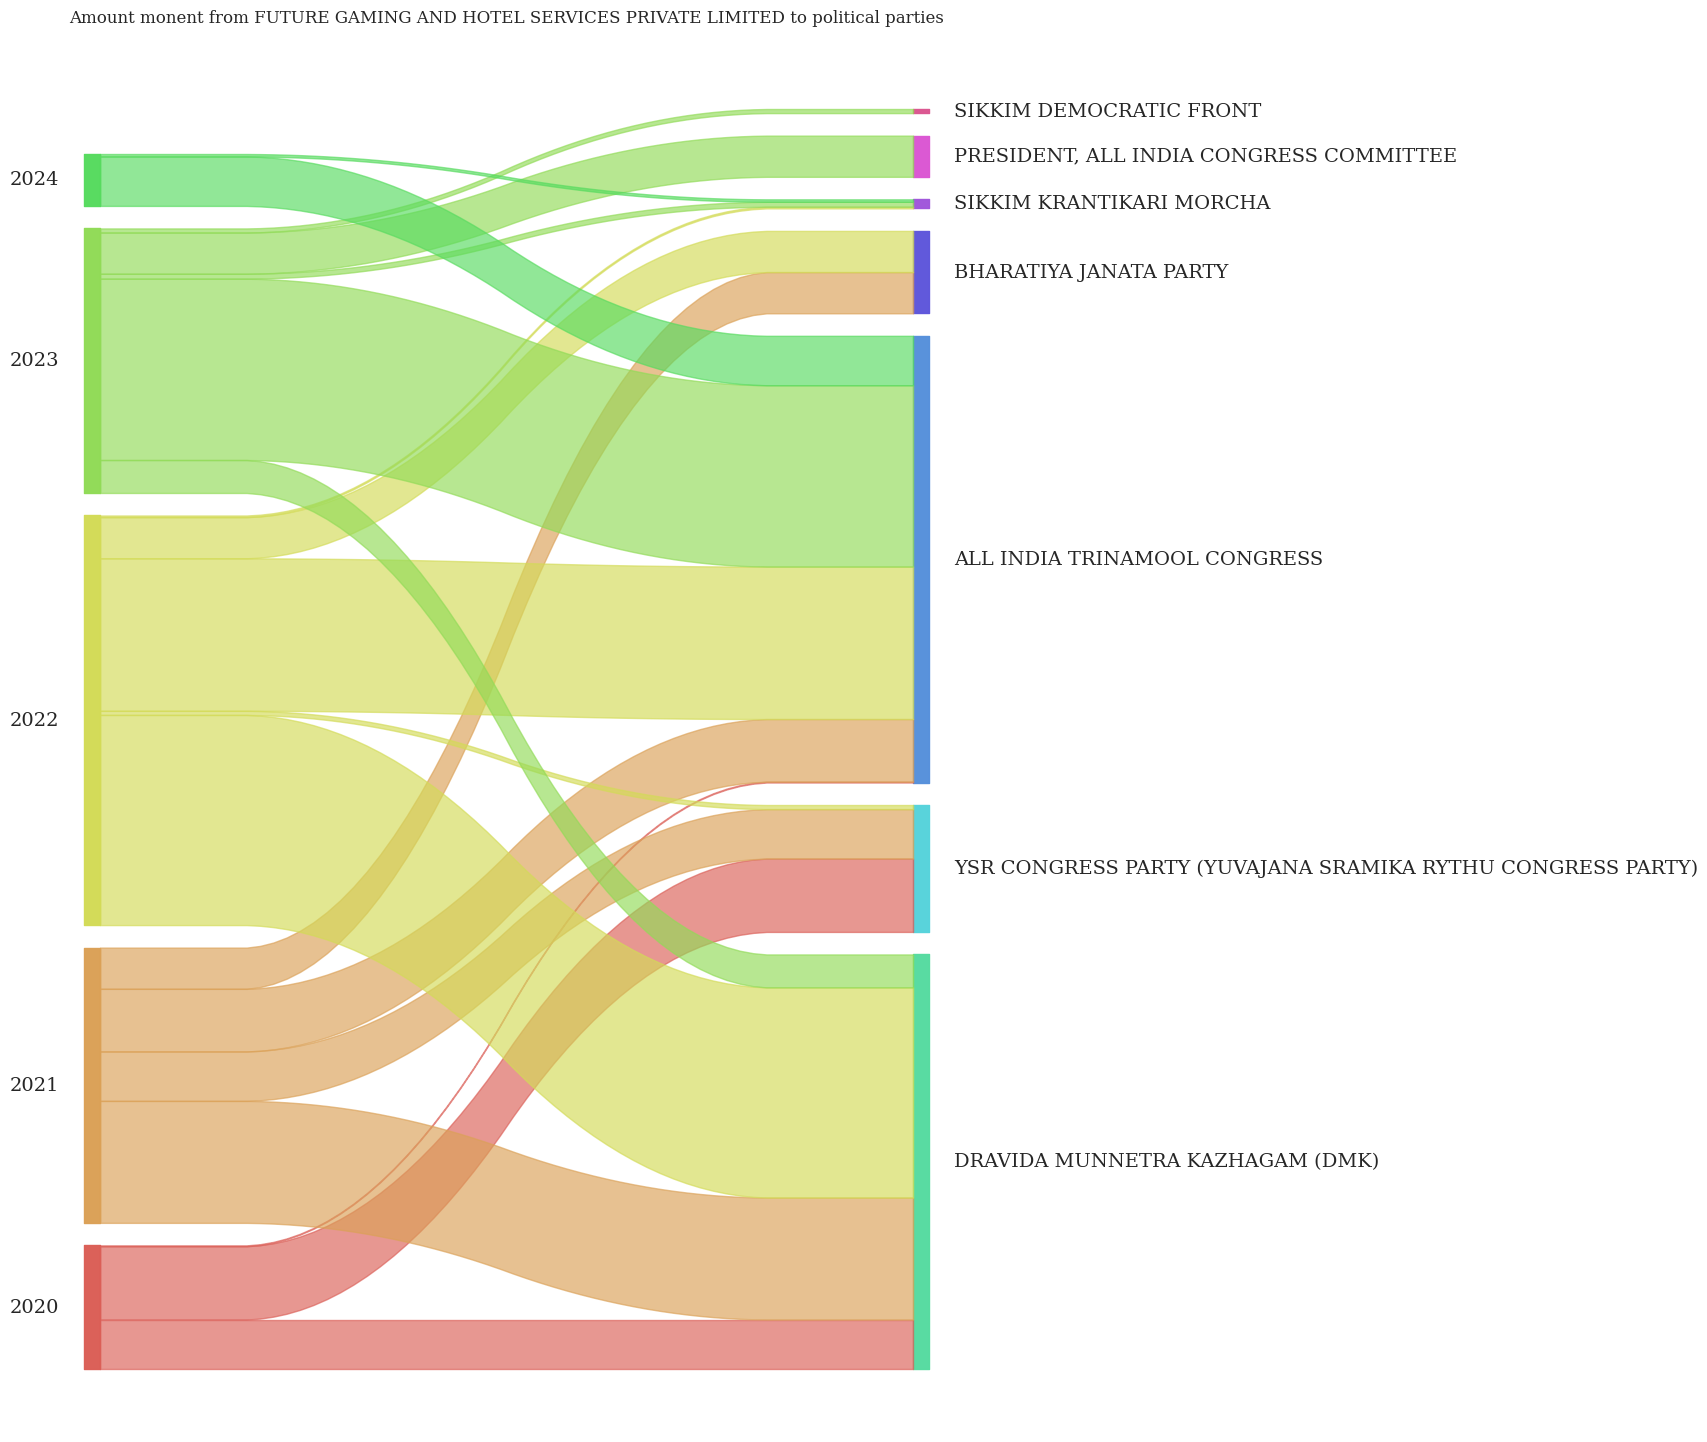

In [187]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

- this sankey chart is representing the amount monent from FUTURE GAMING AND HOTEL SERVICE PRIVATE LIMITED to political parties
- it is recognise the party names by anually and it also shows different denomination according to party wise
- the all india trinommol congress party has received highest denomination in during the year of 2022 - 2023

In [188]:
# Removing the file I created which is of no use
os.remove("temp_files/check.csv")

# 'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED',ITY HOSPITAL'

In [189]:
company_name =  'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED'
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name] 
company_name_df

Urn JournalDate PurchaseDate ExpiryDate  \
117    00847201904120000001164  2019-04-12   2019-04-12 2019-04-26   
118    00847201904120000001164  2019-04-12   2019-04-12 2019-04-26   
119    00847201904120000001164  2019-04-12   2019-04-12 2019-04-26   
120    00847201904120000001164  2019-04-12   2019-04-12 2019-04-26   
121    00847201904120000001164  2019-04-12   2019-04-12 2019-04-26   
...                        ...         ...          ...        ...   
16490  00847202310120000003435  2023-10-12   2023-10-12 2023-10-26   
16491  00847202310120000003435  2023-10-12   2023-10-12 2023-10-26   
16492  00847202310120000003435  2023-10-12   2023-10-12 2023-10-26   
16493  00847202310120000003435  2023-10-12   2023-10-12 2023-10-26   
16494  00847202310120000003435  2023-10-12   2023-10-12 2023-10-26   

                                           Purchaser Prefix  BondNumber  \
117    MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      5485.0   
118    MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      5465.0   
119    MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      5497.0   
120    MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      5510.0   
121    MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      5484.0   
...                                              ...    ...         ...   
16490  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     16110.0   
16491  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     16197.0   
16492  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     16183.0   
16493  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     16141.0   
16494  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     16119.0   

       PayBranchCode_x  IssueTeller unique_key DateEncashment  \
117              847.0    8424020.0     OC5485     2019-04-16   
118              847.0    8424020.0     OC5465     2019-04-16   
119              847.0    8424020.0     OC5497     2019-04-16   
120              847.0    8424020.0     OC5510     2019-04-16   
121              847.0    8424020.0     OC5484     2019-04-16   
...                ...          ...        ...            ...   
16490            847.0    6458726.0    OC16110     2023-10-13   
16491            847.0    6458726.0    OC16197     2023-10-13   
16492            847.0    6458726.0    OC16183     2023-10-13   
16493            847.0    6458726.0    OC16141     2023-10-13   
16494            847.0    6458726.0    OC16119     2023-10-13   

                    PartyName   AccountNum  PayBranchCode_y  PayTeller  \
117    BHARATIYA JANATA PARTY  *******8244            691.0  4567455.0   
118    BHARATIYA JANATA PARTY  *******8244            691.0  4567455.0   
119    BHARATIYA JANATA PARTY  *******8244            691.0  4567455.0   
120    BHARATIYA JANATA PARTY  *******8244            691.0  4567455.0   
121    BHARATIYA JANATA PARTY  *******8244            691.0  4567455.0   
...                       ...          ...              ...        ...   
16490  BHARATIYA JANATA PARTY  *******8244            691.0  8212066.0   
16491      TELUGU DESAM PARTY  *******3067            847.0  7620160.0   
16492  BHARATIYA JANATA PARTY  *******8244            691.0  8212066.0   
16493  BHARATIYA JANATA PARTY  *******8244            691.0  8212066.0   
16494  BHARATIYA JANATA PARTY  *******8244            691.0  8212066.0   

       encashedyear  Denomination  Year  
117          2019.0    10000000.0  2019  
118          2019.0    10000000.0  2019  
119          2019.0    10000000.0  2019  
120          2019.0    10000000.0  2019  
121          2019.0    10000000.0  2019  
...             ...           ...   ...  
16490        2023.0    10000000.0  2023  
16491        2023.0    10000000.0  2023  
16492        2023.0    10000000.0  2023  
16493        2023.0    10000000.0  2023  
16494        2023.0    10000000.0  2023  

[966 rows x 18 columns]

In [190]:
company_amt_agg_df = company_name_df.groupby('Year')['Denomination'].agg(
    Denominations_sum=('sum'),
    Denominations_count=('count')
).reset_index()
company_amt_agg_df

Year  Denominations_sum  Denominations_count
0  2019       1.300000e+09                  130
1  2020       2.000000e+08                   20
2  2021       1.780000e+09                  178
3  2022       2.230000e+09                  223
4  2023       4.150000e+09                  415

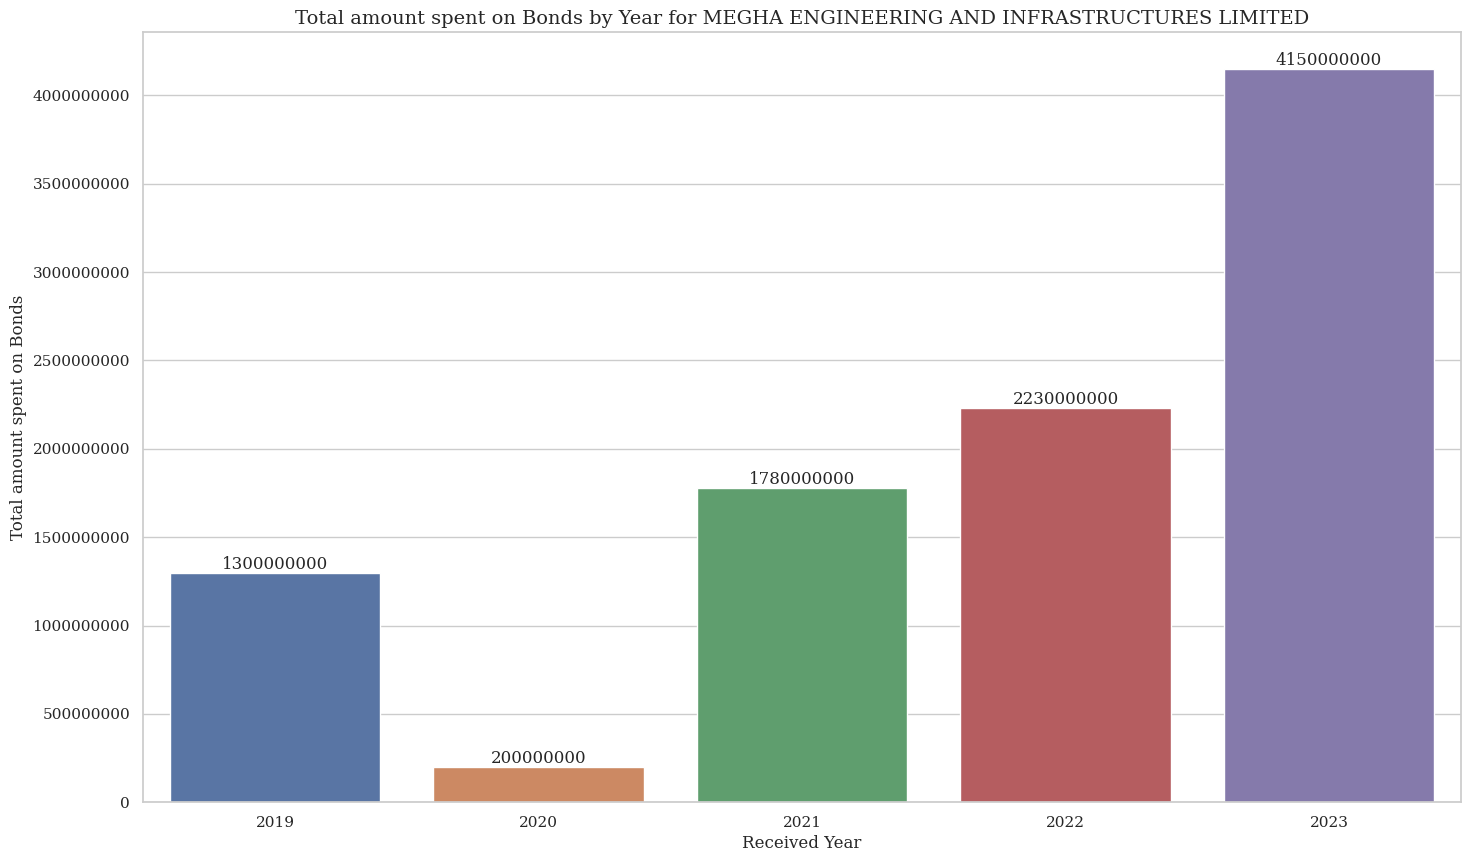

In [191]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg_df, x='Year', y='Denominations_sum')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- this graph is illustrate the total amount spent on bonds by anually for megha engineering and infrastructre limited
- in the year of 2023 the bonds has purchased hightest with the bonds of 450000000
- in the year of 2020 the bonds has spent lowest with 200000000

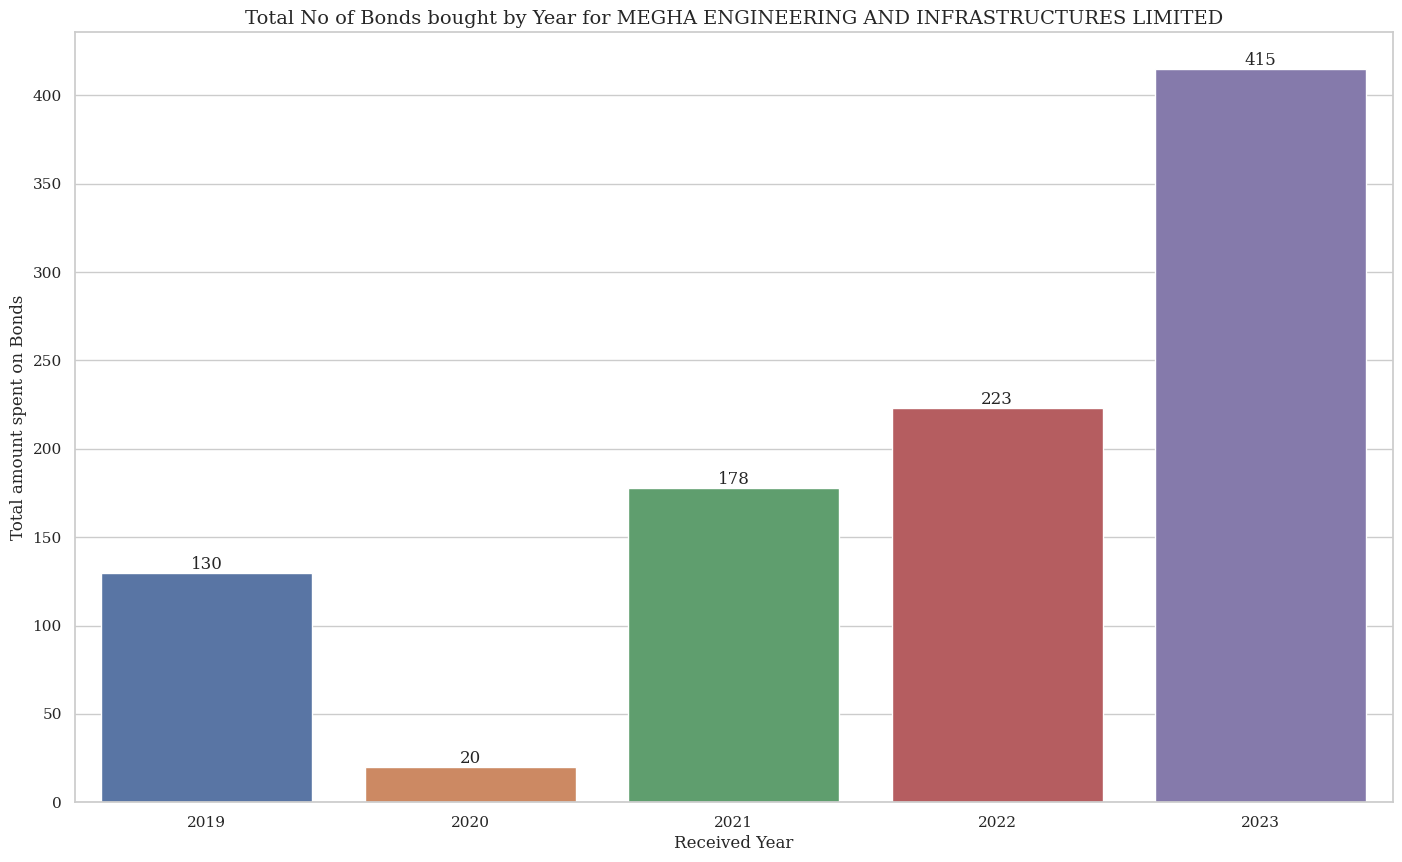

In [192]:
# Create the count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg_df, x='Year', y='Denominations_count')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total No of Bonds bought by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- this graph is depict the total number of bonds bought by year for megha engineering and infrastructures limited
- the total amount o spents on bonds recieved highest in 2023 with 415 bonds 
- in 2020 they bought lowest  with 20 bonds 

In [193]:
# Group by 'Year' and 'PartyName', and aggregate 'Denomination' using custom names for the aggregated columns
company_amt_agg_partyname_df = company_name_df.groupby(['Year', 'PartyName']).agg(
    Denominations_sum=('Denomination', 'sum'),
    Denominations_count=('Denomination', 'count')
).reset_index()

company_amt_agg_partyname_df

Year                                          PartyName  \
0   2019                             BHARATIYA JANATA PARTY   
1   2019            PRESIDENT, ALL INDIA CONGRESS COMMITTEE   
2   2020                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
3   2021                             BHARAT RASHTRA SAMITHI   
4   2021                             BHARATIYA JANATA PARTY   
5   2021                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
6   2021            PRESIDENT, ALL INDIA CONGRESS COMMITTEE   
7   2022                             BHARAT RASHTRA SAMITHI   
8   2022                             BHARATIYA JANATA PARTY   
9   2022                    BIHAR PRADESH JANTA DAL(UNITED)   
10  2022                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
11  2022                                     JANASENA PARTY   
12  2022  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...   
13  2023                             BHARAT RASHTRA SAMITHI   
14  2023                             BHARATIYA JANATA PARTY   
15  2023                                     JANASENA PARTY   
16  2023                             JANATA DAL ( SECULAR )   
17  2023            PRESIDENT, ALL INDIA CONGRESS COMMITTEE   
18  2023                                 TELUGU DESAM PARTY   
19  2023  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...   

    Denominations_sum  Denominations_count  
0        1.250000e+09                  125  
1        5.000000e+07                    5  
2        2.000000e+08                   20  
3        1.000000e+09                  100  
4        3.300000e+08                   33  
5        4.000000e+08                   40  
6        5.000000e+07                    5  
7        4.500000e+08                   45  
8        1.290000e+09                  129  
9        1.000000e+08                   10  
10       2.500000e+08                   25  
11       2.000000e+07                    2  
12       1.200000e+08                   12  
13       5.000000e+08                   50  
14       2.970000e+09                  297  
15       2.000000e+07                    2  
16       5.000000e+07                    5  
17       8.000000e+07                    8  
18       2.800000e+08                   28  
19       2.500000e+08                   25

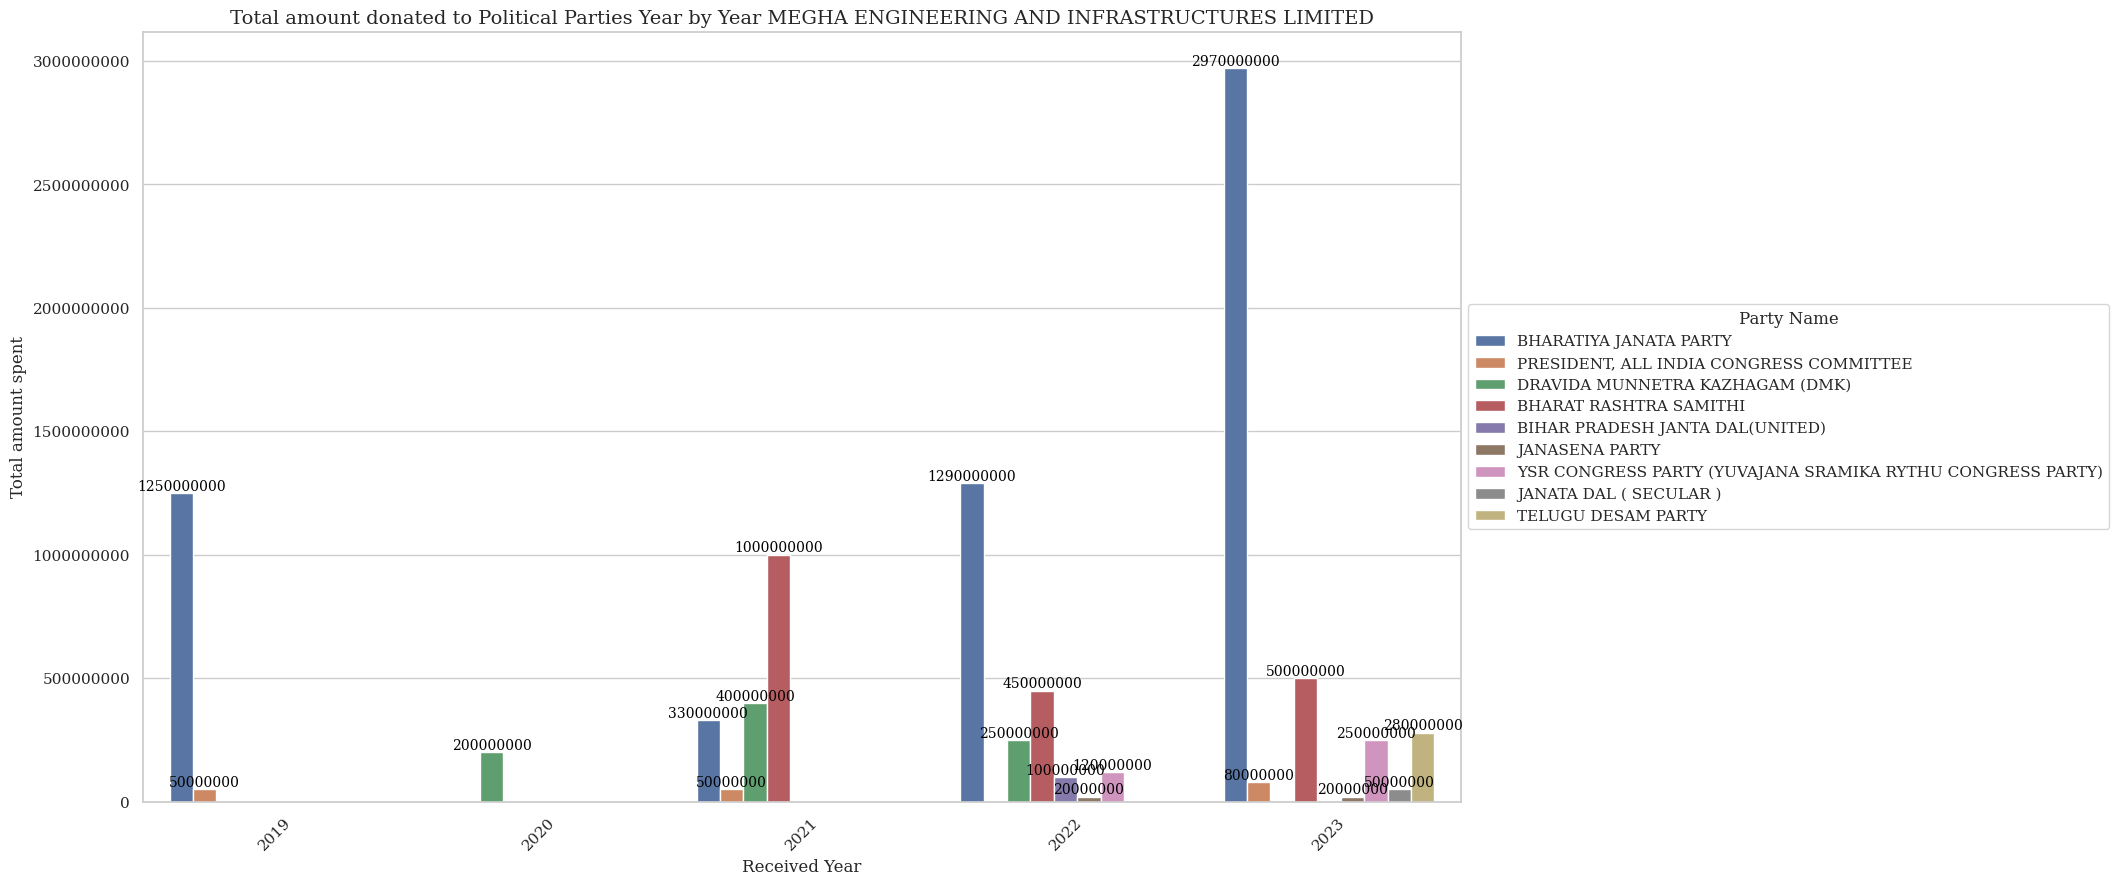

In [194]:
# Create the grouped bar plot
plt.figure(figsize=(17, 10))
ax = sns.barplot(data=company_amt_agg_partyname_df, x='Year', y='Denominations_sum', hue='PartyName')

# Iterate over each container (group of bars)
for container in ax.containers:
    # Iterate over each bar in the container and add labels
    for bar in container:
        # Get the height of the bar
        height = bar.get_height()
        # Add the value label to the bar
        ax.annotate(f'{height:.0f}', 
                    (bar.get_x() + bar.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent', fontsize=12)
plt.title(f'Total amount donated to Political Parties Year by Year {company_name}', fontsize=14)

# Rotate y-axis labels by -45 degrees for better readability
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Move legend to the right and outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Party Name')

# Show the plot
plt.show()

- This graph is representing total amount donated to political parties year by year MEGHA ENGINEERING AND INRASTURUCTURES LIMITED
- in this graoh the bihar pradesh janta dal(united) has received highest spent amounts
- while we comparing with other parties with year wise president, all india congress comittee has received lowest bonds 

In [195]:
# Due to some reason some of the sankeys are not working dirtectly but this problem is resolved when we are exporting the data frame to a csv file and recreating
# again as a new dataframe --> as of now I don't the reason but as a bandaid solution I am applying thisabs 

#exporting to a csv file 
company_name_df.to_csv("temp_files/check.csv")
# Reimporting as a dataframe 
company_name_df = pd.read_csv('temp_files/check.csv')

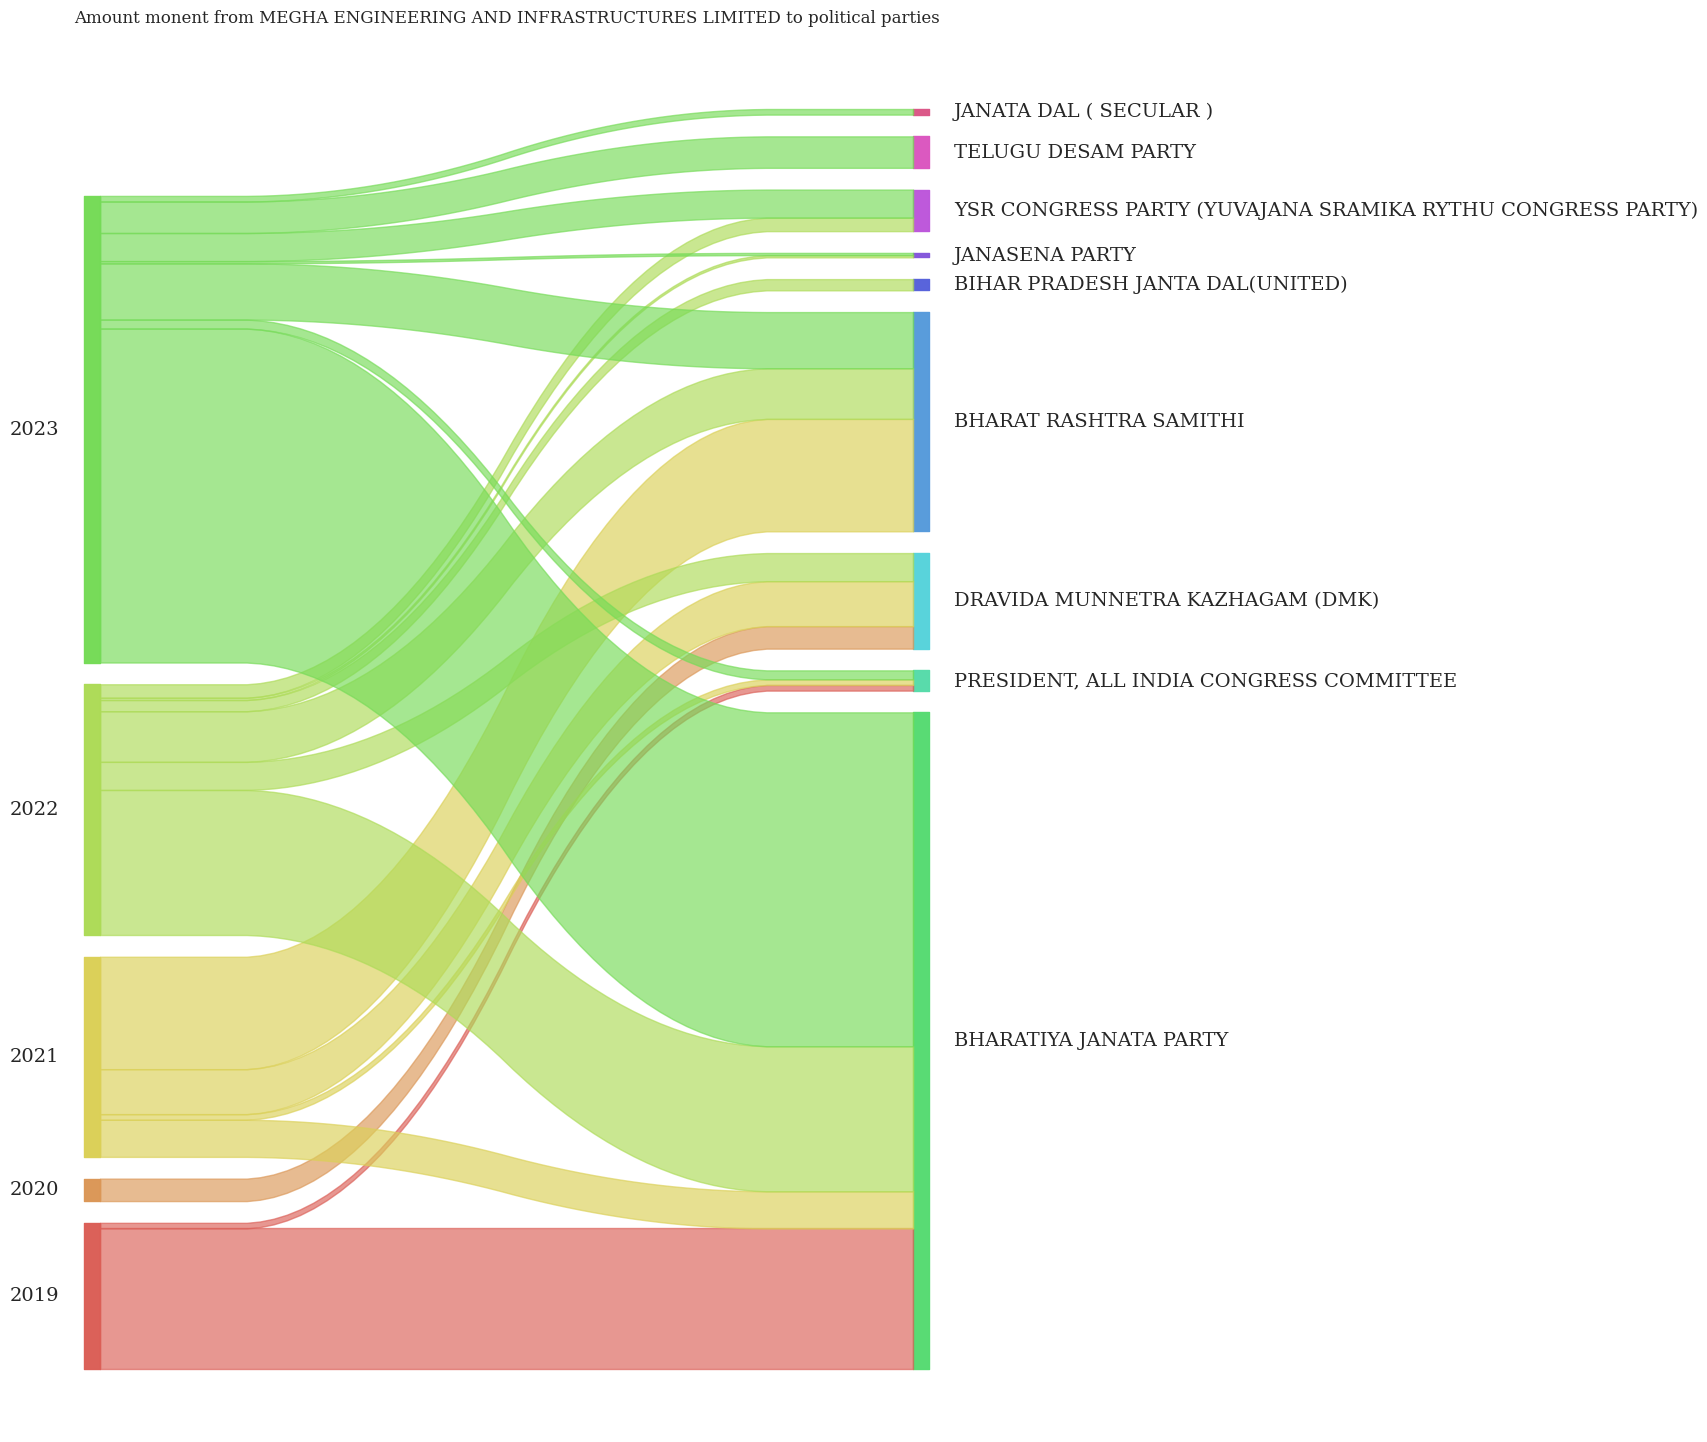

In [196]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

- This graph shows that the Amount monent from MEGHA ENGINERRING AND INFRASTRUCTURE LIMITED to political parties
- in this graph BHARATIYA JANATA PARTY has received highest denominations with comparing other parties


In [197]:
# Removing the file I created which is of no use
os.remove("temp_files/check.csv")

# 'VEDANTA LIMITED',

In [199]:
company_name =  'VEDANTA LIMITED'
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name] 
company_name_df

Urn JournalDate PurchaseDate ExpiryDate  \
766    00691201904160000001223  2019-04-16   2019-04-16 2019-04-30   
767    00691201904160000001223  2019-04-16   2019-04-16 2019-04-30   
768    00691201904160000001223  2019-04-16   2019-04-16 2019-04-30   
769    00691201904160000001223  2019-04-16   2019-04-16 2019-04-30   
770    00691201904160000001223  2019-04-16   2019-04-16 2019-04-30   
...                        ...         ...          ...        ...   
17103  00691202311090000003521  2023-11-09   2023-11-09 2023-11-23   
17104  00691202311090000003521  2023-11-09   2023-11-09 2023-11-23   
17105  00691202311090000003521  2023-11-09   2023-11-09 2023-11-23   
17106  00691202311090000003521  2023-11-09   2023-11-09 2023-11-23   
17107  00691202311090000003521  2023-11-09   2023-11-09 2023-11-23   

             Purchaser Prefix  BondNumber  PayBranchCode_x  IssueTeller  \
766    VEDANTA LIMITED     OC      5271.0            691.0    3300196.0   
767    VEDANTA LIMITED     OC      5283.0            691.0    3300196.0   
768    VEDANTA LIMITED     OC      5281.0            691.0    3300196.0   
769    VEDANTA LIMITED     OC      5273.0            691.0    3300196.0   
770    VEDANTA LIMITED     OC      5280.0            691.0    3300196.0   
...                ...    ...         ...              ...          ...   
17103  VEDANTA LIMITED     OC     14108.0            691.0    8212066.0   
17104  VEDANTA LIMITED     OC     14106.0            691.0    8212066.0   
17105  VEDANTA LIMITED     OC     14102.0            691.0    8212066.0   
17106  VEDANTA LIMITED     OC     14100.0            691.0    8212066.0   
17107  VEDANTA LIMITED     OC     14104.0            691.0    8212066.0   

      unique_key DateEncashment                                PartyName  \
766       OC5271     2019-04-18                   BHARATIYA JANATA PARTY   
767       OC5283     2019-04-18                   BHARATIYA JANATA PARTY   
768       OC5281     2019-04-18                   BHARATIYA JANATA PARTY   
769       OC5273     2019-04-18                   BHARATIYA JANATA PARTY   
770       OC5280     2019-04-18                   BHARATIYA JANATA PARTY   
...          ...            ...                                      ...   
17103    OC14108     2023-11-23                   BHARATIYA JANATA PARTY   
17104    OC14106     2023-11-10  PRESIDENT, ALL INDIA CONGRESS COMMITTEE   
17105    OC14102     2023-11-10  PRESIDENT, ALL INDIA CONGRESS COMMITTEE   
17106    OC14100     2023-11-10  PRESIDENT, ALL INDIA CONGRESS COMMITTEE   
17107    OC14104     2023-11-10  PRESIDENT, ALL INDIA CONGRESS COMMITTEE   

        AccountNum  PayBranchCode_y  PayTeller  encashedyear  Denomination  \
766    *******8244            691.0  3627829.0        2019.0    10000000.0   
767    *******8244            691.0  3627829.0        2019.0    10000000.0   
768    *******8244            691.0  3627829.0        2019.0    10000000.0   
769    *******8244            691.0  3627829.0        2019.0    10000000.0   
770    *******8244            691.0  3627829.0        2019.0    10000000.0   
...            ...              ...        ...           ...           ...   
17103  *******8244            691.0  8212066.0        2023.0    10000000.0   
17104  *******4012            691.0  8212066.0        2023.0    10000000.0   
17105  *******4012            691.0  8212066.0        2023.0    10000000.0   
17106  *******4012            691.0  8212066.0        2023.0    10000000.0   
17107  *******4012            691.0  8212066.0        2023.0    10000000.0   

       Year  
766    2019  
767    2019  
768    2019  
769    2019  
770    2019  
...     ...  
17103  2023  
17104  2023  
17105  2023  
17106  2023  
17107  2023  

[426 rows x 18 columns]

In [200]:
company_amt_agg_df = company_name_df.groupby('Year')['Denomination'].agg(
    Denominations_sum=('sum'),
    Denominations_count=('count')
).reset_index()
company_amt_agg_df

Year  Denominations_sum  Denominations_count
0  2019       5.265000e+08                   63
1  2021       2.500000e+08                   25
2  2022       2.527000e+09                  268
3  2023       7.000000e+08                   70

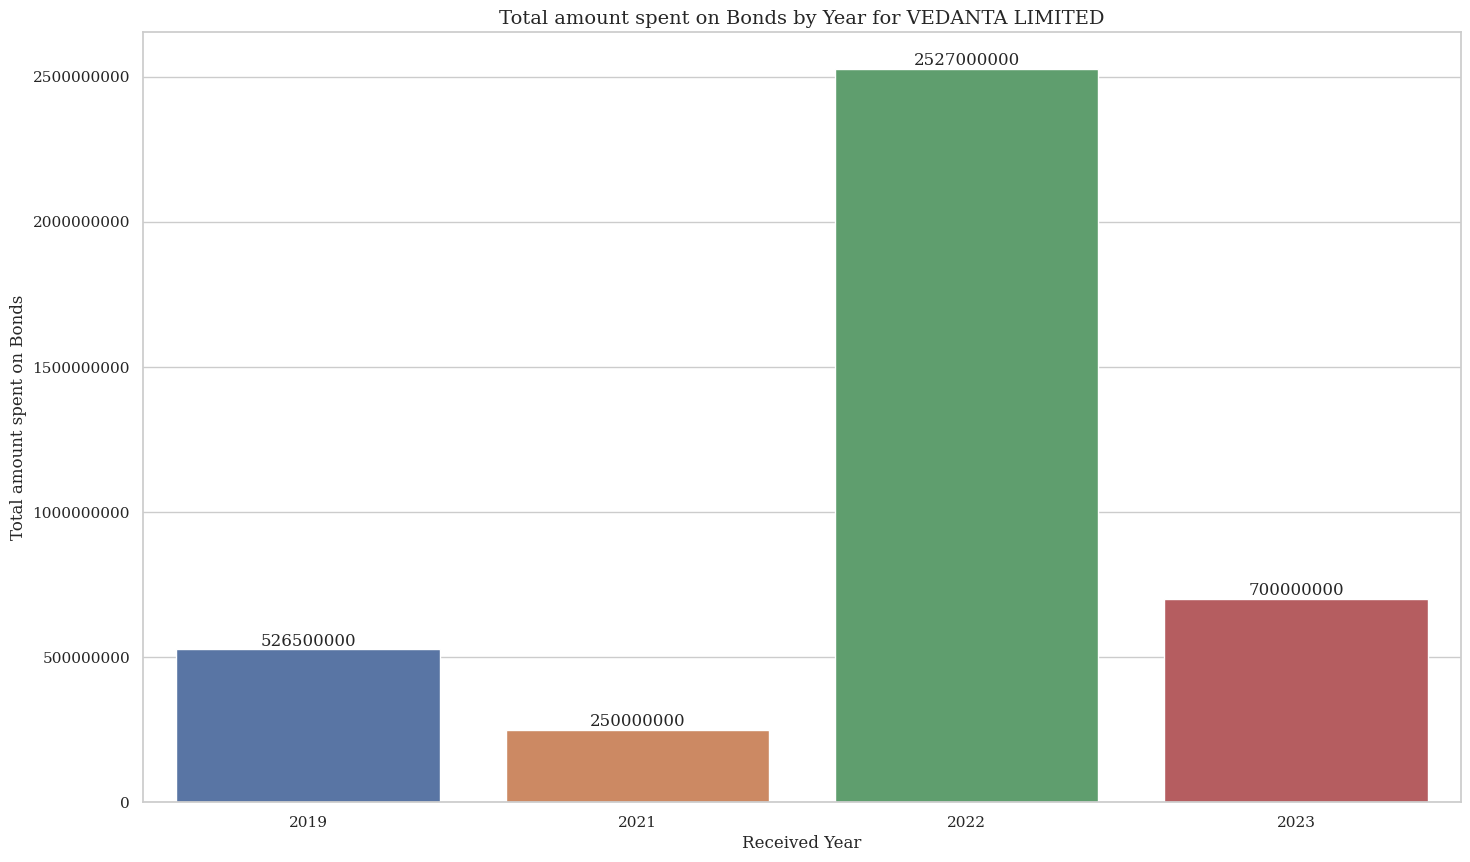

In [201]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg_df, x='Year', y='Denominations_sum')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- the graph shows the total amount spent on bonds by year for vendantha limited
- in the year 2022 they purchase highest amount of bonds with 2527000000
- with the comparision of other year 2021 has lowest bonds

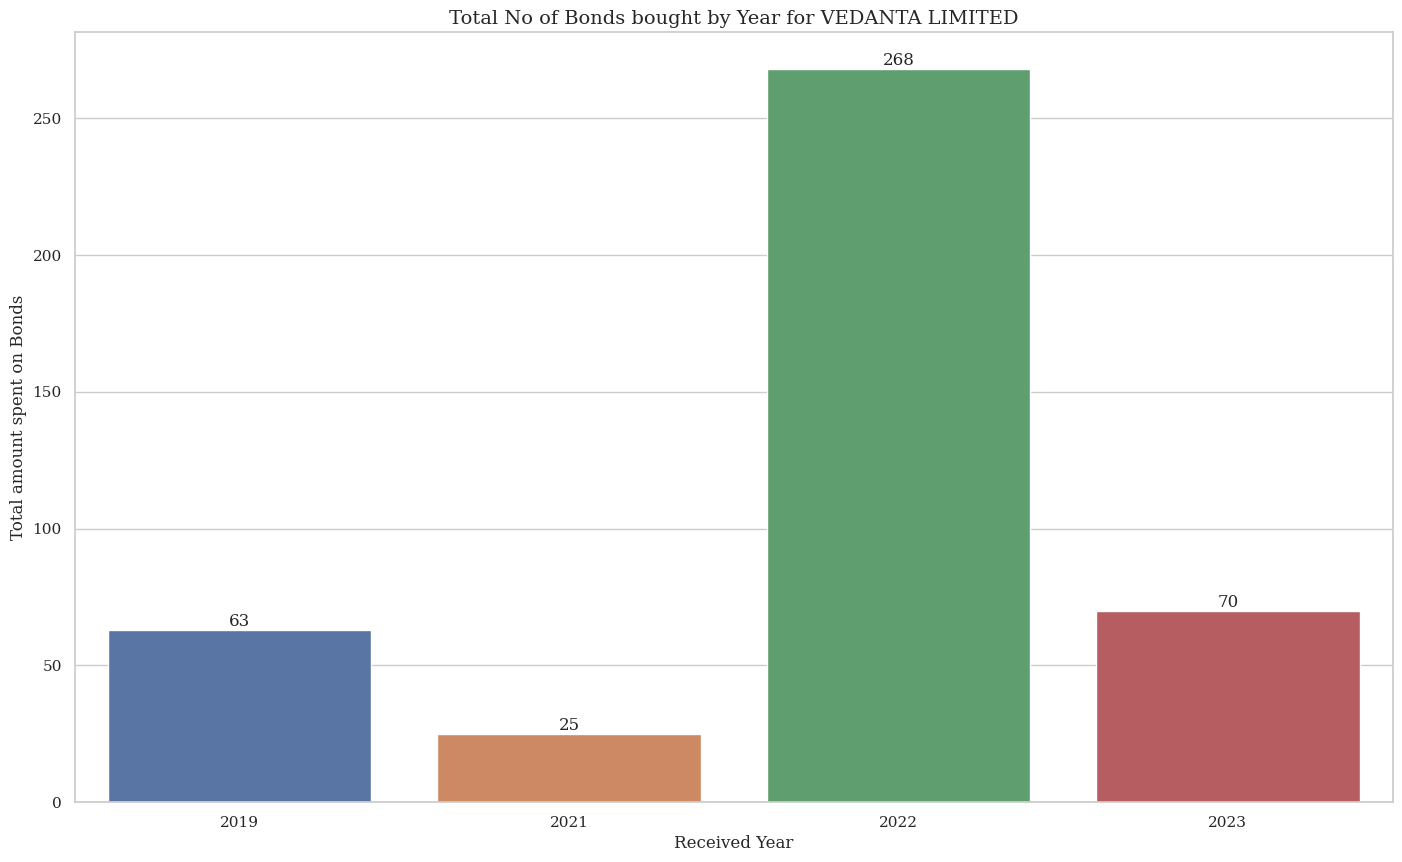

In [202]:
# Create the count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg_df, x='Year', y='Denominations_count')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total No of Bonds bought by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- this graph depicts the total number of bonds bought by year for vedantha limited
- in the year of 2022 they received highest bonds with compare other years


In [203]:
# Group by 'Year' and 'PartyName', and aggregate 'Denomination' using custom names for the aggregated columns
company_amt_agg_partyname_df = company_name_df.groupby(['Year', 'PartyName']).agg(
    Denominations_sum=('Denomination', 'sum'),
    Denominations_count=('Denomination', 'count')
).reset_index()

company_amt_agg_partyname_df

Year                                PartyName  Denominations_sum  \
0  2019                   BHARATIYA JANATA PARTY       5.265000e+08   
1  2021  PRESIDENT, ALL INDIA CONGRESS COMMITTEE       2.500000e+08   
2  2022             ALL INDIA TRINAMOOL CONGRESS       2.000000e+06   
3  2022                   BHARATIYA JANATA PARTY       1.765000e+09   
4  2022                          BIJU JANATA DAL       2.500000e+08   
5  2022  PRESIDENT, ALL INDIA CONGRESS COMMITTEE       5.100000e+08   
6  2023                   BHARATIYA JANATA PARTY       1.000000e+07   
7  2023                          BIJU JANATA DAL       1.500000e+08   
8  2023                   JHARKHAND MUKTI MORCHA       5.000000e+07   
9  2023  PRESIDENT, ALL INDIA CONGRESS COMMITTEE       4.900000e+08   

   Denominations_count  
0                   63  
1                   25  
2                    2  
3                  190  
4                   25  
5                   51  
6                    1  
7                   15  
8                    5  
9                   49

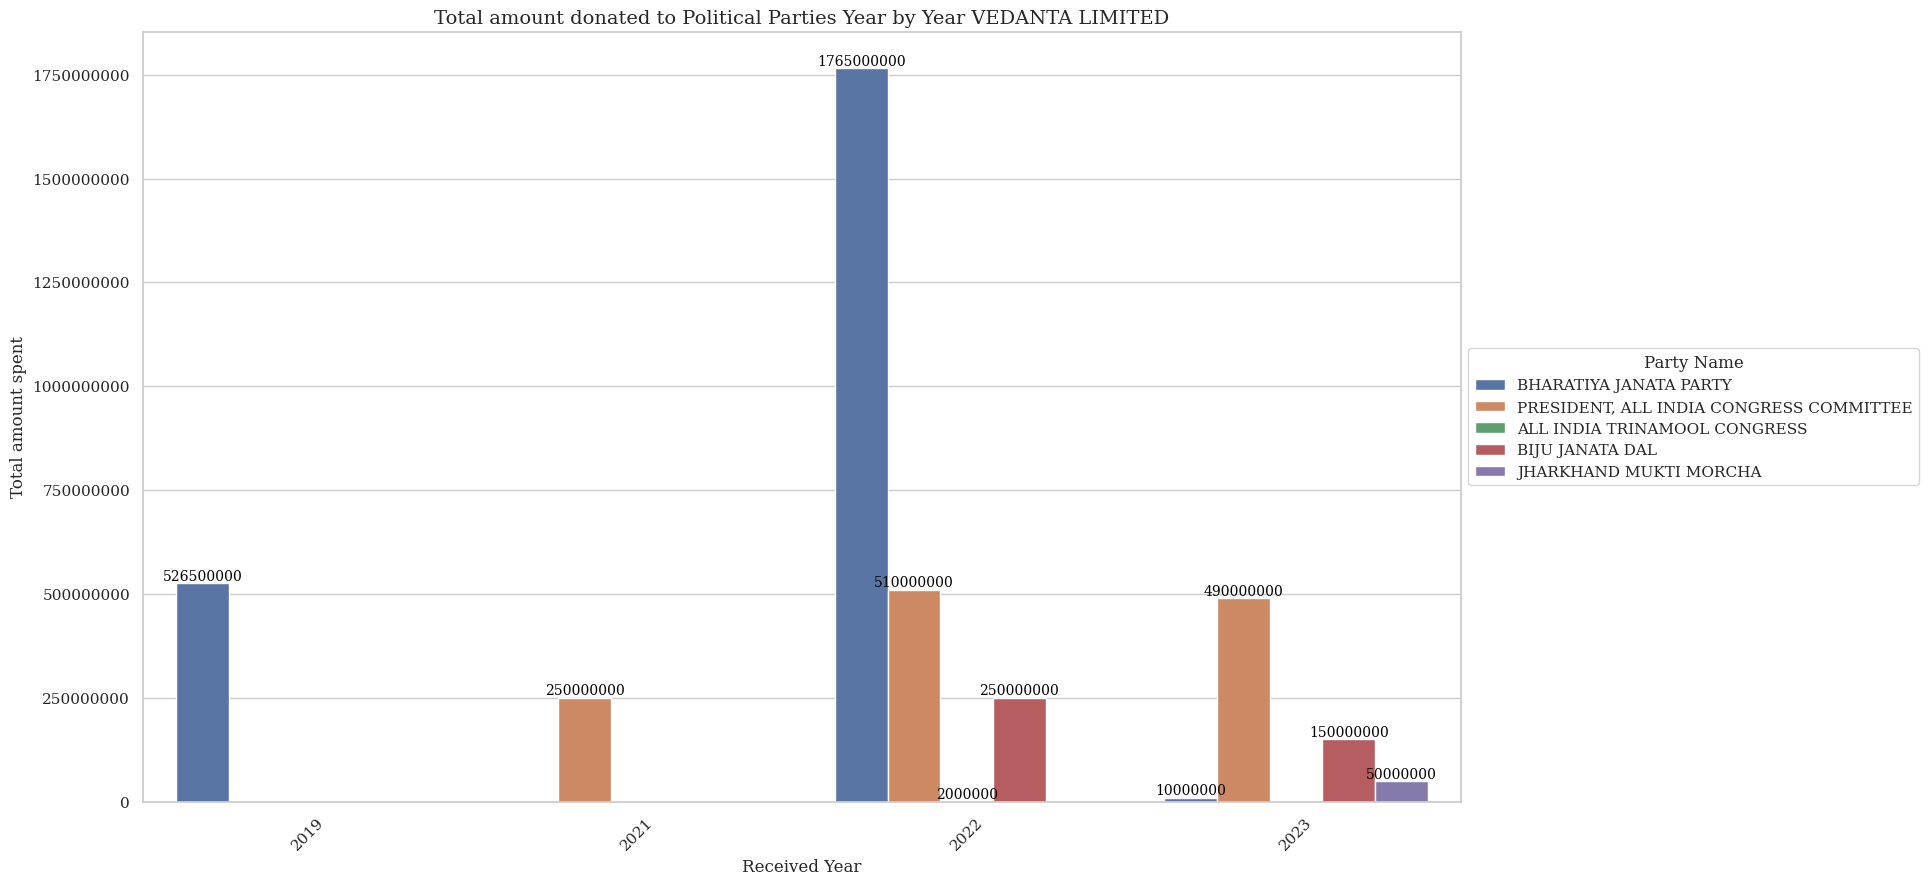

In [204]:
# Create the grouped bar plot
plt.figure(figsize=(17, 10))
ax = sns.barplot(data=company_amt_agg_partyname_df, x='Year', y='Denominations_sum', hue='PartyName')

# Iterate over each container (group of bars)
for container in ax.containers:
    # Iterate over each bar in the container and add labels
    for bar in container:
        # Get the height of the bar
        height = bar.get_height()
        # Add the value label to the bar
        ax.annotate(f'{height:.0f}', 
                    (bar.get_x() + bar.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent', fontsize=12)
plt.title(f'Total amount donated to Political Parties Year by Year {company_name}', fontsize=14)

# Rotate y-axis labels by -45 degrees for better readability
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Move legend to the right and outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Party Name')

# Show the plot
plt.show()

- This graph is representing the Total amount donated to political party year by year VEDANTA LIMITED
- Bharatiya janta party has spent highest amount of bonds with comparing other parties

In [205]:
# Due to some reason some of the sankeys are not working dirtectly but this problem is resolved when we are exporting the data frame to a csv file and recreating
# again as a new dataframe --> as of now I don't the reason but as a bandaid solution I am applying thisabs 

#exporting to a csv file 
company_name_df.to_csv("temp_files/check.csv")
# Reimporting as a dataframe 
company_name_df = pd.read_csv('temp_files/check.csv')

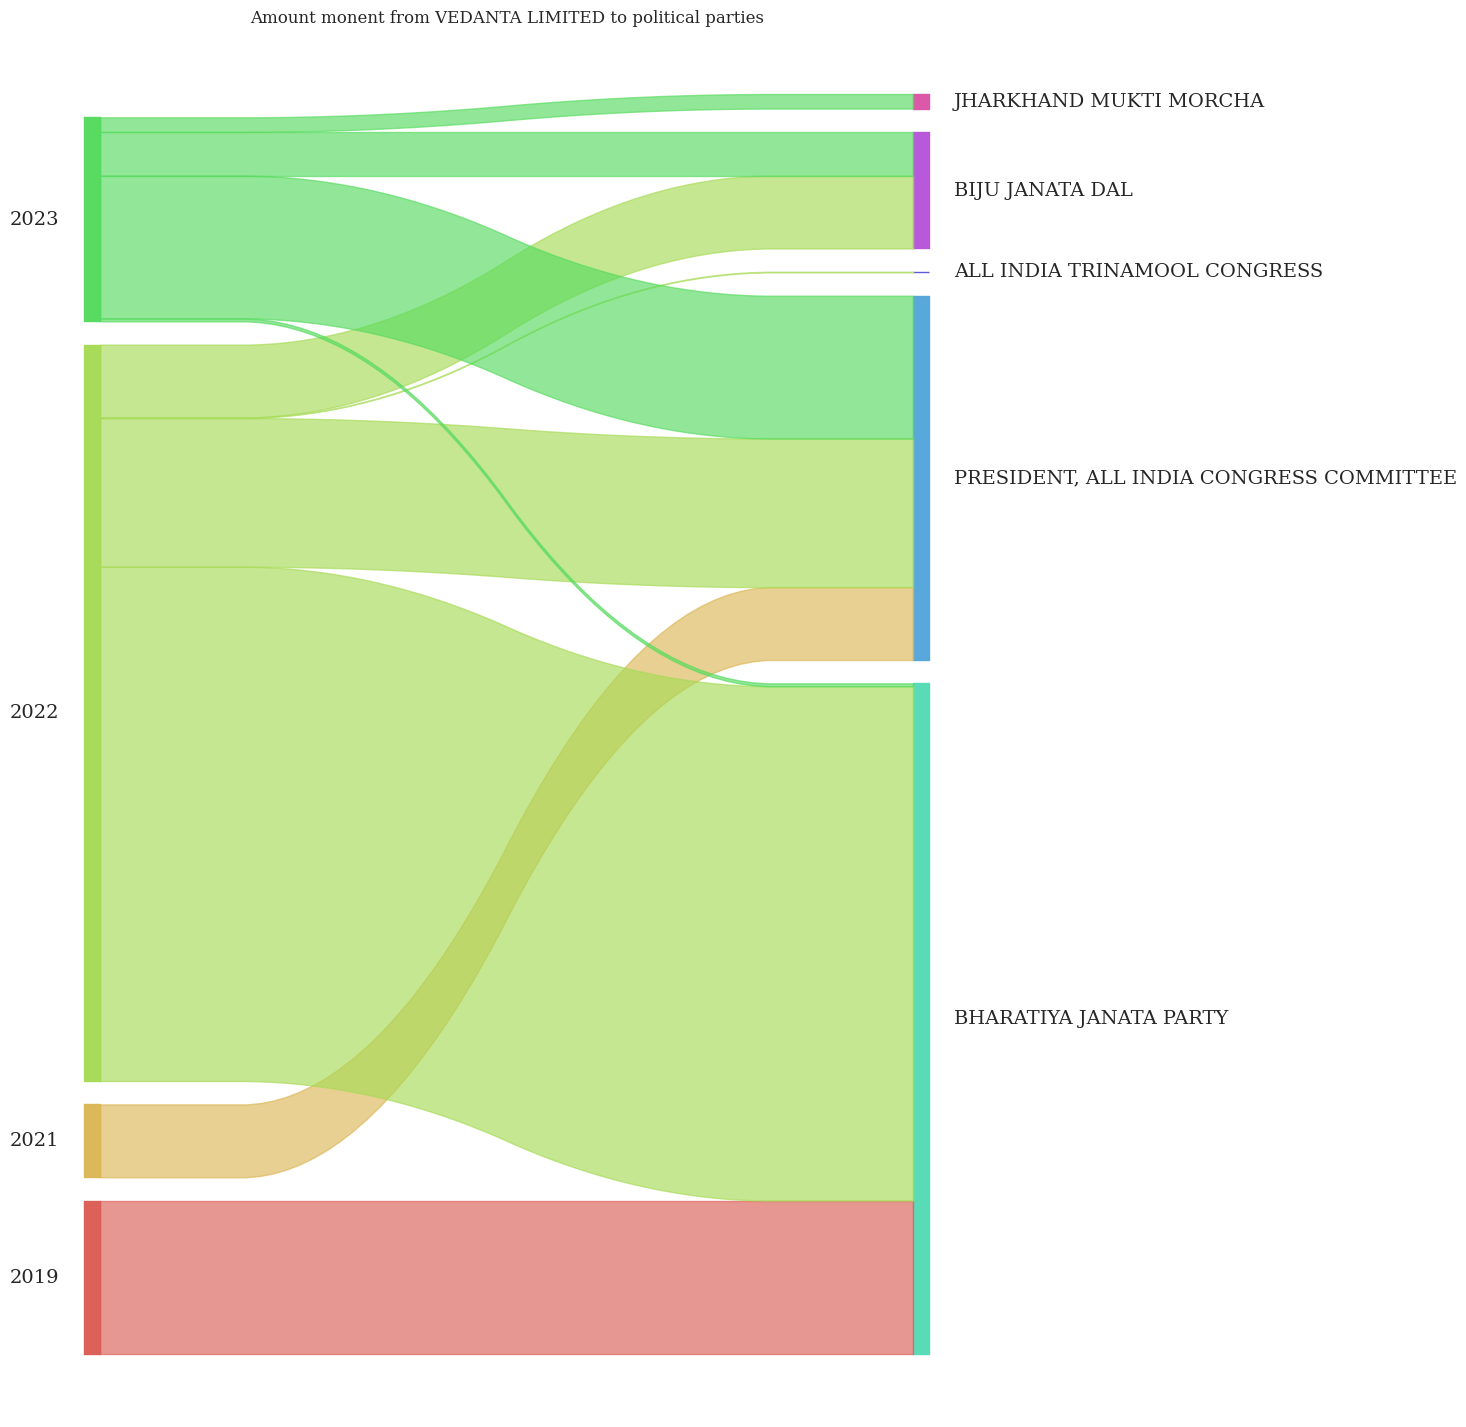

In [206]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

- This sankey chart is illustrate the amount monent from the VEDANTA LIMITED to political parties
- Bharatiya janta party has received highest denomination from the VEDAMTA LIMITED while comparing with other parties

In [207]:
# Removing the file I created which is of no use
os.remove("temp_files/check.csv")

# 'QWIKSUPPLYCHAINPRIVATELIMITED'

In [208]:
company_name =  'QWIKSUPPLYCHAINPRIVATELIMITED' 
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name] 
company_name_df

Urn JournalDate PurchaseDate ExpiryDate  \
6708   00300202201050000002119  2022-01-05   2022-01-05 2022-01-19   
6709   00300202201050000002119  2022-01-05   2022-01-05 2022-01-19   
6710   00300202201050000002119  2022-01-05   2022-01-05 2022-01-19   
6711   00300202201050000002119  2022-01-05   2022-01-05 2022-01-19   
6712   00300202201050000002119  2022-01-05   2022-01-05 2022-01-19   
...                        ...         ...          ...        ...   
17603  00300202311170000003592  2023-11-17   2023-11-17 2023-12-01   
17604  00300202311170000003592  2023-11-17   2023-11-17 2023-12-01   
17605  00300202311170000003592  2023-11-17   2023-11-17 2023-12-01   
17606  00300202311170000003592  2023-11-17   2023-11-17 2023-12-01   
17607  00300202311170000003592  2023-11-17   2023-11-17 2023-12-01   

                           Purchaser Prefix  BondNumber  PayBranchCode_x  \
6708   QWIKSUPPLYCHAINPRIVATELIMITED     OC     11273.0            300.0   
6709   QWIKSUPPLYCHAINPRIVATELIMITED     OC     11361.0            300.0   
6710   QWIKSUPPLYCHAINPRIVATELIMITED     OC     11323.0            300.0   
6711   QWIKSUPPLYCHAINPRIVATELIMITED     OC     11363.0            300.0   
6712   QWIKSUPPLYCHAINPRIVATELIMITED     OC     11237.0            300.0   
...                              ...    ...         ...              ...   
17603  QWIKSUPPLYCHAINPRIVATELIMITED     OC     17308.0            300.0   
17604  QWIKSUPPLYCHAINPRIVATELIMITED     OC     17268.0            300.0   
17605  QWIKSUPPLYCHAINPRIVATELIMITED     OC     17294.0            300.0   
17606  QWIKSUPPLYCHAINPRIVATELIMITED     OC     17214.0            300.0   
17607  QWIKSUPPLYCHAINPRIVATELIMITED     OC     17254.0            300.0   

       IssueTeller unique_key DateEncashment               PartyName  \
6708     4180496.0    OC11273     2022-01-10  BHARATIYA JANATA PARTY   
6709     4180496.0    OC11361     2022-01-10  BHARATIYA JANATA PARTY   
6710     4180496.0    OC11323     2022-01-10  BHARATIYA JANATA PARTY   
6711     4180496.0    OC11363     2022-01-10  BHARATIYA JANATA PARTY   
6712     4180496.0    OC11237     2022-01-10  BHARATIYA JANATA PARTY   
...            ...        ...            ...                     ...   
17603    1022034.0    OC17308     2023-11-20  BHARATIYA JANATA PARTY   
17604    1022034.0    OC17268     2023-11-20  BHARATIYA JANATA PARTY   
17605    1022034.0    OC17294     2023-11-20  BHARATIYA JANATA PARTY   
17606    1022034.0    OC17214     2023-11-20  BHARATIYA JANATA PARTY   
17607    1022034.0    OC17254     2023-11-20  BHARATIYA JANATA PARTY   

        AccountNum  PayBranchCode_y  PayTeller  encashedyear  Denomination  \
6708   *******8244            691.0  7516991.0        2022.0    10000000.0   
6709   *******8244            691.0  7516991.0        2022.0    10000000.0   
6710   *******8244            691.0  7516991.0        2022.0    10000000.0   
6711   *******8244            691.0  7516991.0        2022.0    10000000.0   
6712   *******8244            691.0  7516991.0        2022.0    10000000.0   
...            ...              ...        ...           ...           ...   
17603  *******8244            691.0  7516991.0        2023.0    10000000.0   
17604  *******8244            691.0  7516991.0        2023.0    10000000.0   
17605  *******8244            691.0  7516991.0        2023.0    10000000.0   
17606  *******8244            691.0  7516991.0        2023.0    10000000.0   
17607  *******8244            691.0  7516991.0        2023.0    10000000.0   

       Year  
6708   2022  
6709   2022  
6710   2022  
6711   2022  
6712   2022  
...     ...  
17603  2023  
17604  2023  
17605  2023  
17606  2023  
17607  2023  

[410 rows x 18 columns]

In [209]:
company_amt_agg_df = company_name_df.groupby('Year')['Denomination'].agg(
    Denominations_sum=('sum'),
    Denominations_count=('count')
).reset_index()
company_amt_agg_df

Year  Denominations_sum  Denominations_count
0  2022       3.600000e+09                  360
1  2023       5.000000e+08                   50

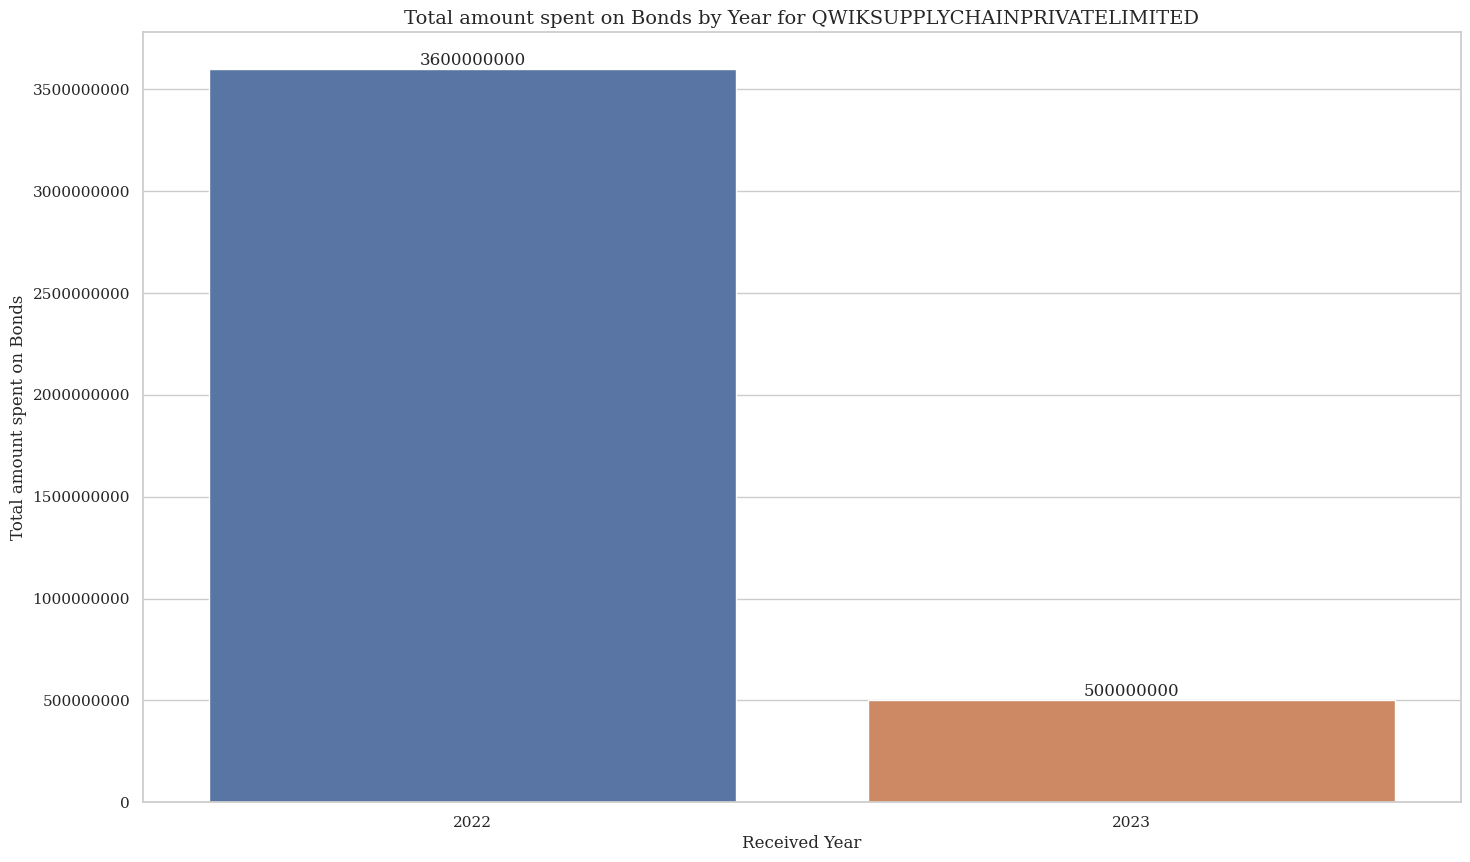

In [210]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg_df, x='Year', y='Denominations_sum')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- The bar graph is representing that the Total amount spent on bonds by year for QWIKSUPPLYCHAINPRIVATELIMITED
- when we comparing year wise the spent bonds are received more in 2022 
 

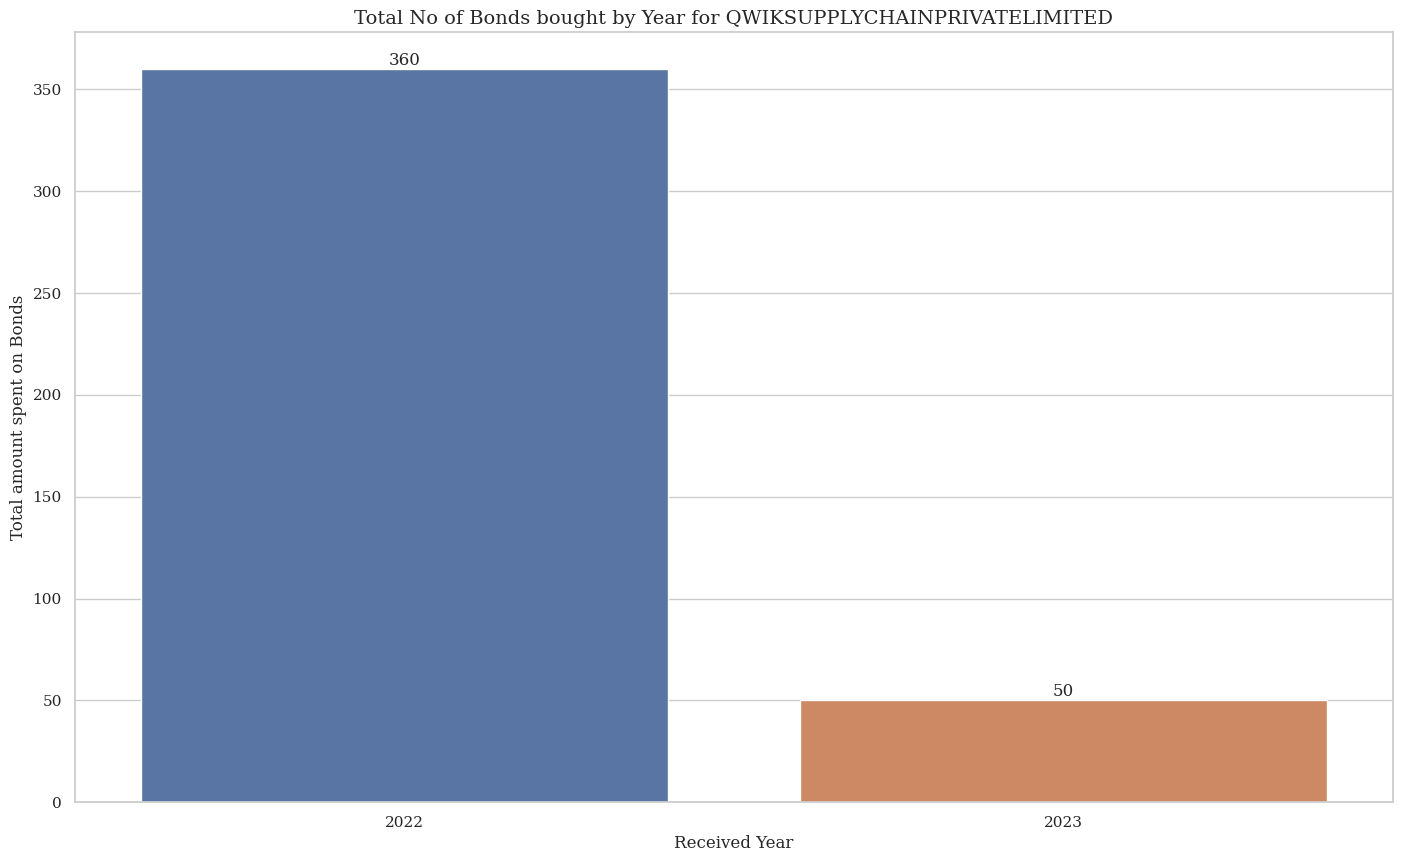

In [211]:
# Create the count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg_df, x='Year', y='Denominations_count')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total No of Bonds bought by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- This bar graph shows that the total number of bonds bought by year for QWIKSUPPLYCHAINPRIVATELIMITED
- while comparing with year 2022 - 2023 the highest bonds received in 2022

In [212]:
# Group by 'Year' and 'PartyName', and aggregate 'Denomination' using custom names for the aggregated columns
company_amt_agg_partyname_df = company_name_df.groupby(['Year', 'PartyName']).agg(
    Denominations_sum=('Denomination', 'sum'),
    Denominations_count=('Denomination', 'count')
).reset_index()

company_amt_agg_partyname_df

Year                                       PartyName  Denominations_sum  \
0  2022                          BHARATIYA JANATA PARTY       3.250000e+09   
1  2022  NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH       1.000000e+08   
2  2022                                        SHIVSENA       2.500000e+08   
3  2023                          BHARATIYA JANATA PARTY       5.000000e+08   

   Denominations_count  
0                  325  
1                   10  
2                   25  
3                   50

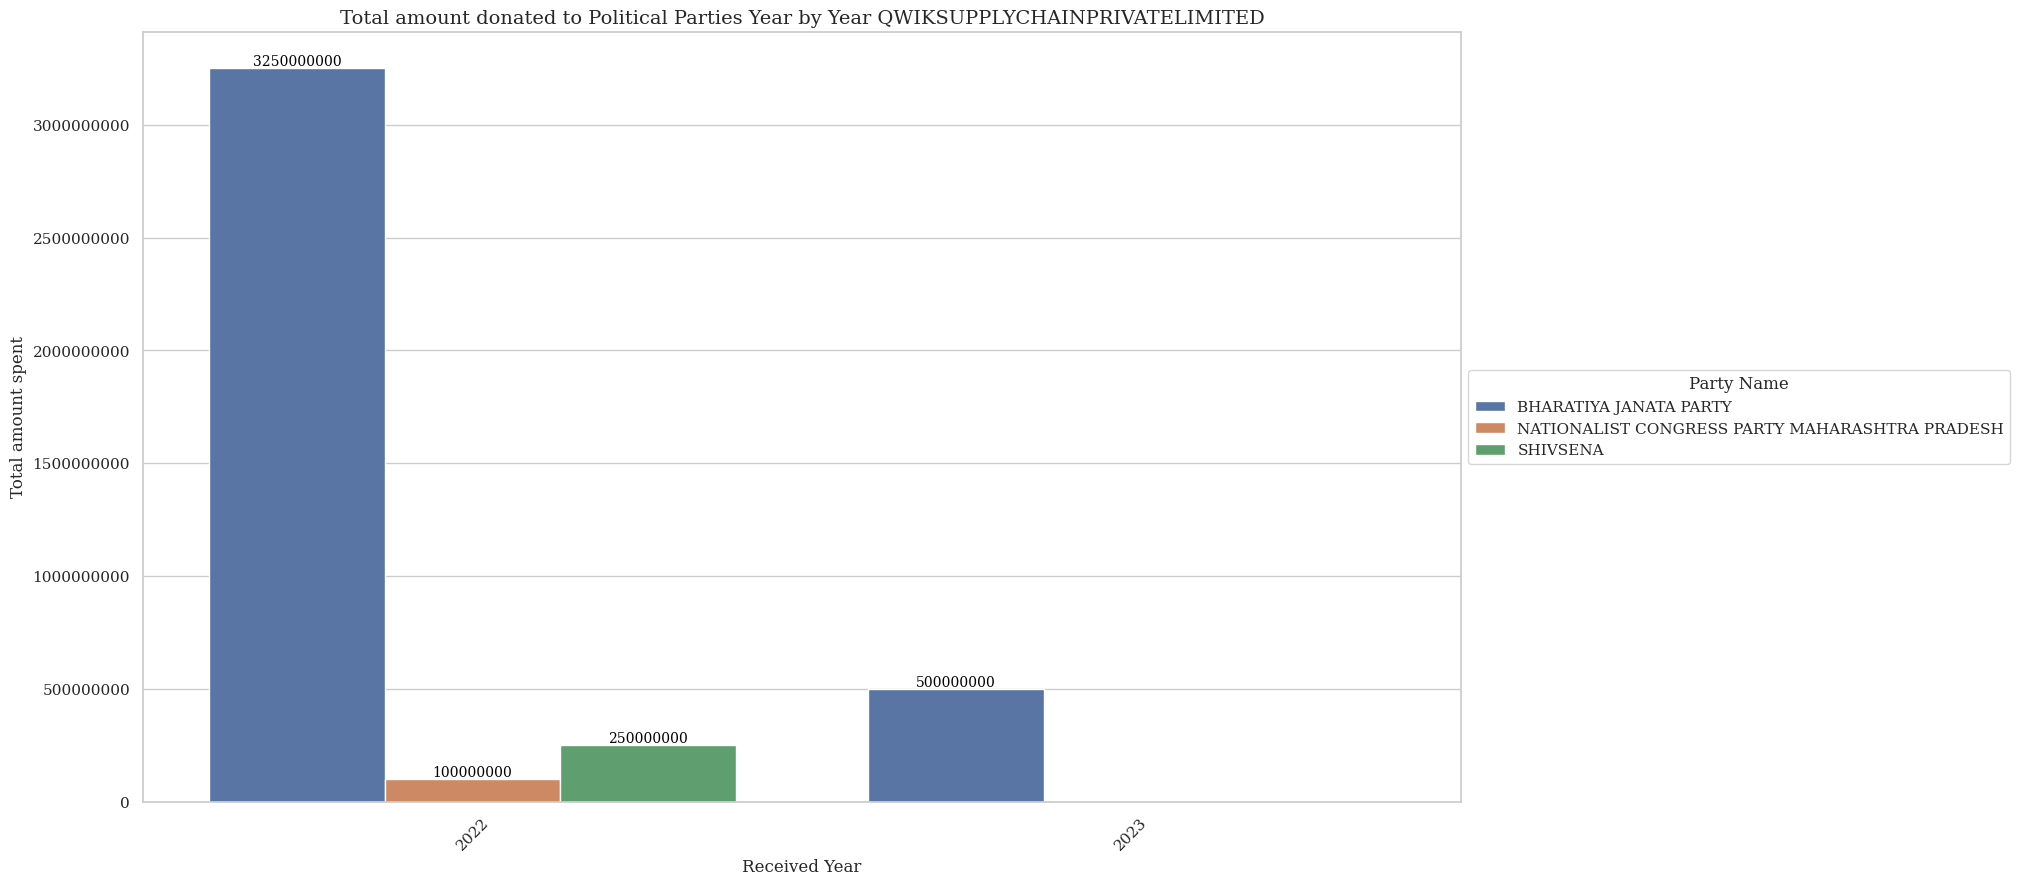

In [213]:
# Create the grouped bar plot
plt.figure(figsize=(17, 10))
ax = sns.barplot(data=company_amt_agg_partyname_df, x='Year', y='Denominations_sum', hue='PartyName')

# Iterate over each container (group of bars)
for container in ax.containers:
    # Iterate over each bar in the container and add labels
    for bar in container:
        # Get the height of the bar
        height = bar.get_height()
        # Add the value label to the bar
        ax.annotate(f'{height:.0f}', 
                    (bar.get_x() + bar.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent', fontsize=12)
plt.title(f'Total amount donated to Political Parties Year by Year {company_name}', fontsize=14)

# Rotate y-axis labels by -45 degrees for better readability
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Move legend to the right and outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Party Name')

# Show the plot
plt.show()

- This bar graph shows that the total amount donated to political parties year by  year QWIKSUPPLYCHAINPRIVATELIMITED
- comparing the two years from 2022 - 2023 the highest denominations received by BHARATIYA JANTA PARTY
-  in 2023 the company got nill denomination to compare with the bharatiya janta party

In [214]:
# Due to some reason some of the sankeys are not working dirtectly but this problem is resolved when we are exporting the data frame to a csv file and recreating
# again as a new dataframe --> as of now I don't the reason but as a bandaid solution I am applying thisabs 

#exporting to a csv file 
company_name_df.to_csv("temp_files/check.csv")
# Reimporting as a dataframe 
company_name_df = pd.read_csv('temp_files/check.csv')

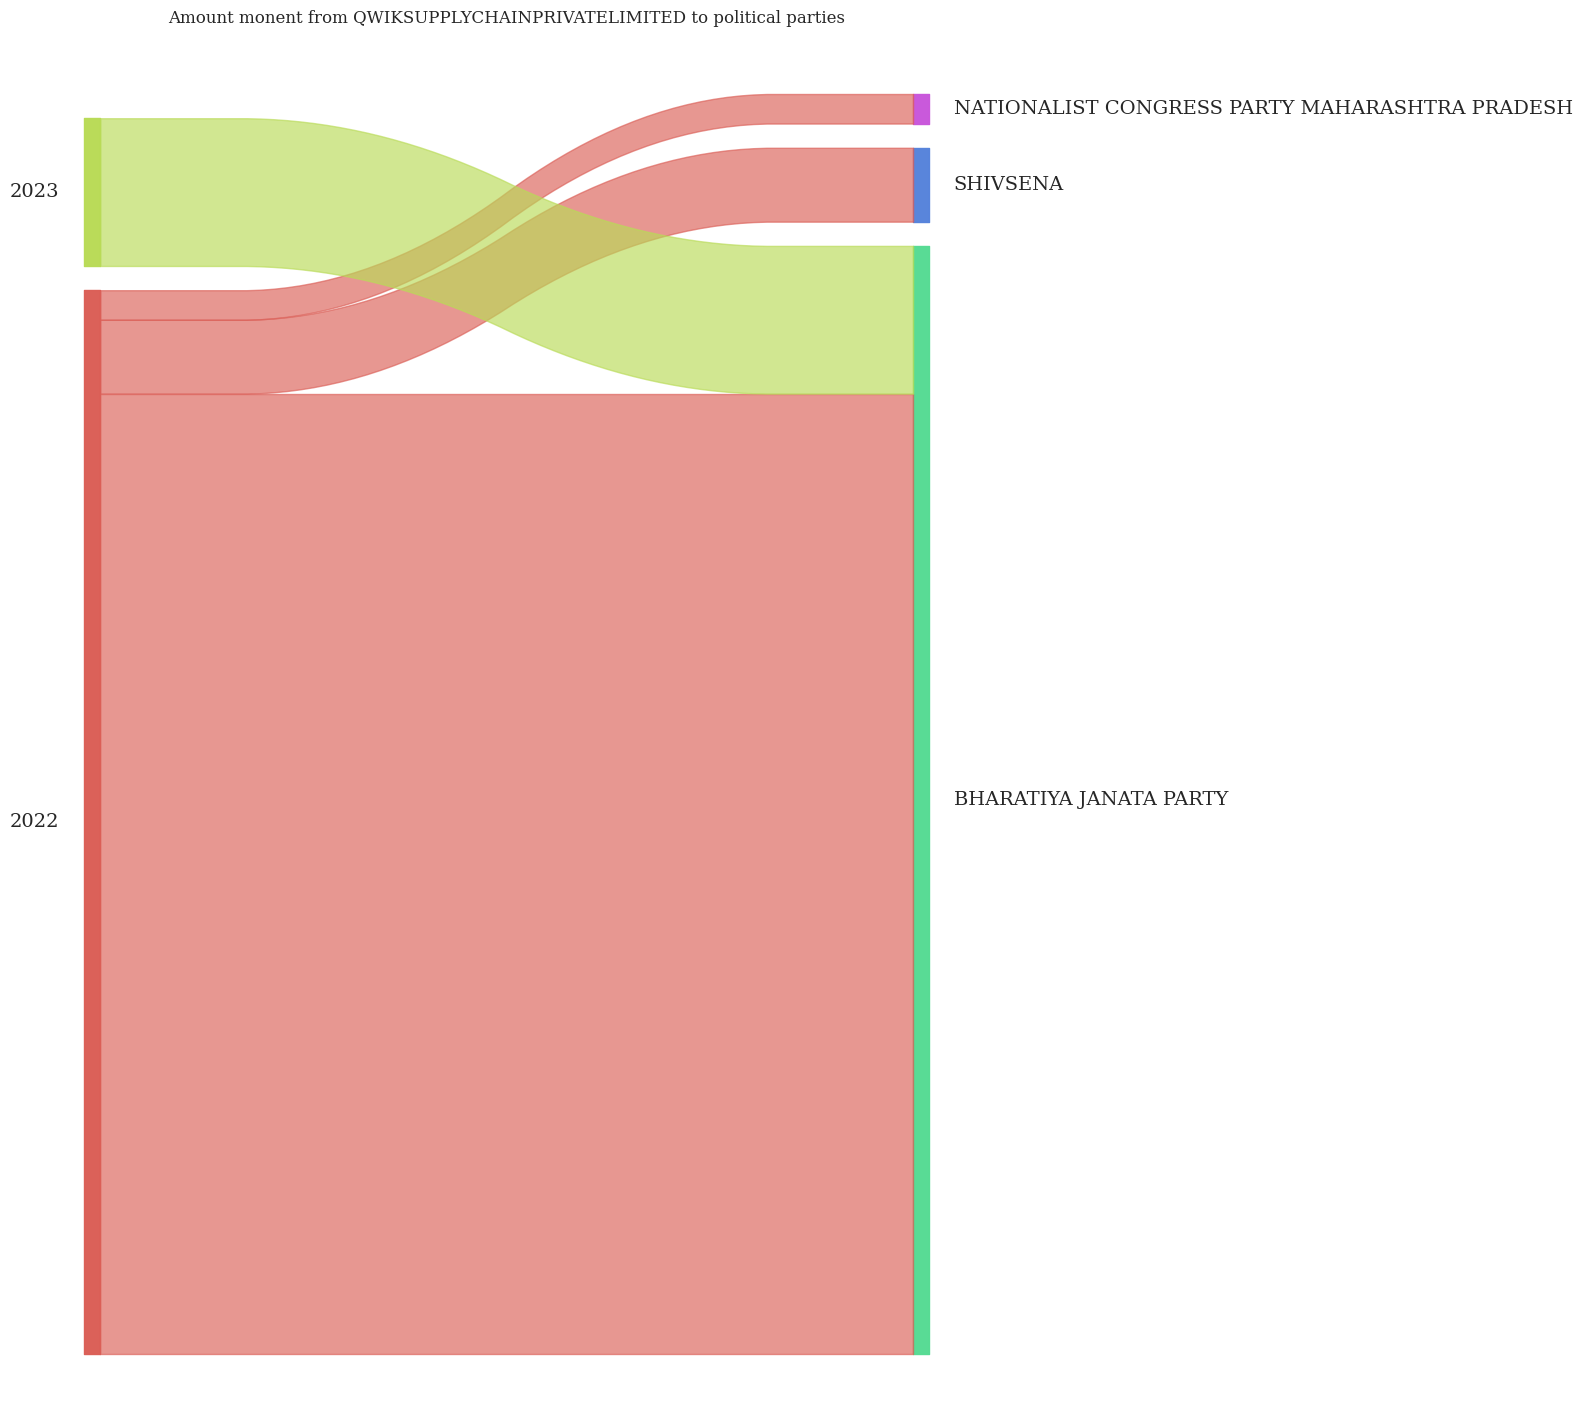

In [215]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

- the sankey has representing the amount monent from QWIKSUPPLYCHAINPRIVTAELIMITED
- compared with two years the bharatiya janta party has received highest denominations more than the other parties 

In [216]:
# Removing the file I created which is of no use
os.remove("temp_files/check.csv")

# 'HALDIA ENERGY LIMITED'

In [217]:
company_name =  'HALDIA ENERGY LIMITED'
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name] 
company_name_df

Urn JournalDate PurchaseDate ExpiryDate  \
1535   00001201905070000001348  2019-05-07   2019-05-07 2019-05-21   
1536   00001201905070000001348  2019-05-07   2019-05-07 2019-05-21   
1537   00001201905070000001348  2019-05-07   2019-05-07 2019-05-21   
1538   00001201905070000001348  2019-05-07   2019-05-07 2019-05-21   
1539   00001201905070000001348  2019-05-07   2019-05-07 2019-05-21   
...                        ...         ...          ...        ...   
18074  00001202401050000003653  2024-01-05   2024-01-05 2024-01-19   
18075  00001202401050000003653  2024-01-05   2024-01-05 2024-01-19   
18076  00001202401050000003653  2024-01-05   2024-01-05 2024-01-19   
18077  00001202401050000003653  2024-01-05   2024-01-05 2024-01-19   
18078  00001202401050000003653  2024-01-05   2024-01-05 2024-01-19   

                   Purchaser Prefix  BondNumber  PayBranchCode_x  IssueTeller  \
1535   HALDIA ENERGY LIMITED     OC      6369.0              1.0    5899230.0   
1536   HALDIA ENERGY LIMITED     OC      6363.0              1.0    5899230.0   
1537   HALDIA ENERGY LIMITED     OC      6358.0              1.0    5899230.0   
1538   HALDIA ENERGY LIMITED     OC      6368.0              1.0    5899230.0   
1539   HALDIA ENERGY LIMITED     OC      6354.0              1.0    5899230.0   
...                      ...    ...         ...              ...          ...   
18074  HALDIA ENERGY LIMITED     OC     15706.0              1.0    5898161.0   
18075  HALDIA ENERGY LIMITED     OC     15734.0              1.0    5898161.0   
18076  HALDIA ENERGY LIMITED     OC     15668.0              1.0    5898161.0   
18077  HALDIA ENERGY LIMITED     OC     15700.0              1.0    5898161.0   
18078  HALDIA ENERGY LIMITED     OC     15730.0              1.0    5898161.0   

      unique_key DateEncashment                     PartyName   AccountNum  \
1535      OC6369     2019-05-10        BHARATIYA JANATA PARTY  *******8244   
1536      OC6363     2019-05-10        BHARATIYA JANATA PARTY  *******8244   
1537      OC6358     2019-05-10        BHARATIYA JANATA PARTY  *******8244   
1538      OC6368     2019-05-10        BHARATIYA JANATA PARTY  *******8244   
1539      OC6354     2019-05-10        BHARATIYA JANATA PARTY  *******8244   
...          ...            ...                           ...          ...   
18074    OC15706     2024-01-10  ALL INDIA TRINAMOOL CONGRESS  *******0688   
18075    OC15734     2024-01-10  ALL INDIA TRINAMOOL CONGRESS  *******0688   
18076    OC15668     2024-01-10  ALL INDIA TRINAMOOL CONGRESS  *******0688   
18077    OC15700     2024-01-10  ALL INDIA TRINAMOOL CONGRESS  *******0688   
18078    OC15730     2024-01-10  ALL INDIA TRINAMOOL CONGRESS  *******0688   

       PayBranchCode_y  PayTeller  encashedyear  Denomination  Year  
1535             691.0  3627829.0        2019.0    10000000.0  2019  
1536             691.0  3627829.0        2019.0    10000000.0  2019  
1537             691.0  3627829.0        2019.0    10000000.0  2019  
1538             691.0  3627829.0        2019.0    10000000.0  2019  
1539             691.0  3627829.0        2019.0    10000000.0  2019  
...                ...        ...           ...           ...   ...  
18074              1.0  3490777.0        2024.0    10000000.0  2024  
18075              1.0  3490777.0        2024.0    10000000.0  2024  
18076              1.0  3490777.0        2024.0    10000000.0  2024  
18077              1.0  3490777.0        2024.0    10000000.0  2024  
18078              1.0  3490777.0        2024.0    10000000.0  2024  

[395 rows x 18 columns]

In [218]:
company_amt_agg_df = company_name_df.groupby('Year')['Denomination'].agg(
    Denominations_sum=('sum'),
    Denominations_count=('count')
).reset_index()
company_amt_agg_df

Year  Denominations_sum  Denominations_count
0  2019       1.600000e+08                   34
1  2020       2.100000e+08                   21
2  2021       1.050000e+09                  105
3  2022       8.500000e+08                   85
4  2023       1.150000e+09                  115
5  2024       3.500000e+08                   35

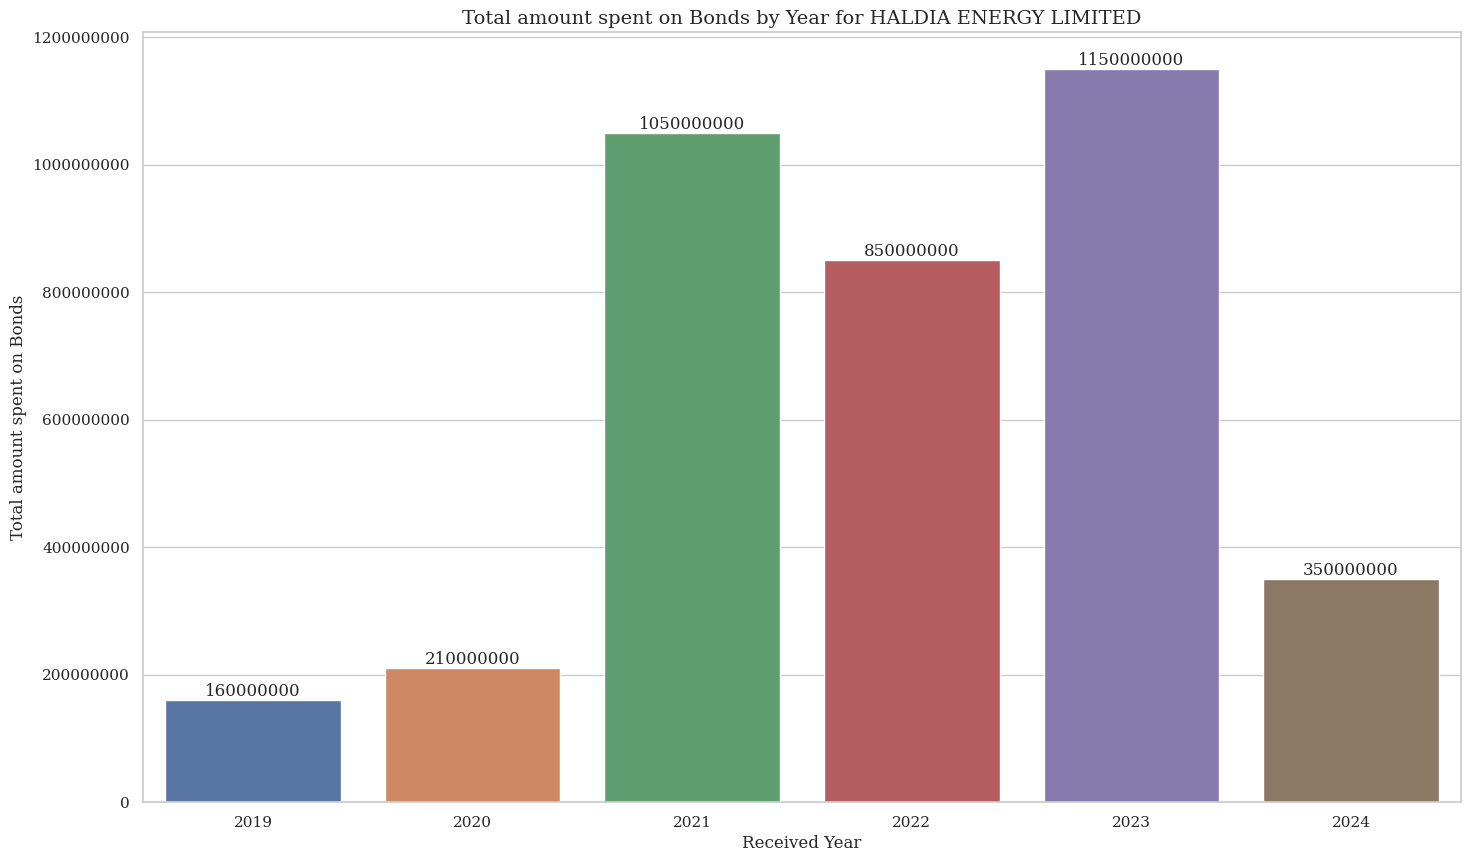

In [219]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg_df, x='Year', y='Denominations_sum')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- This Bar graph shows that the total amount spent on bonds by year for HALDIA ENERGY LIMITED
- this company has spent more bonds in the year of 2023
- haldia energy limited has spent lowest bonds in 2019 

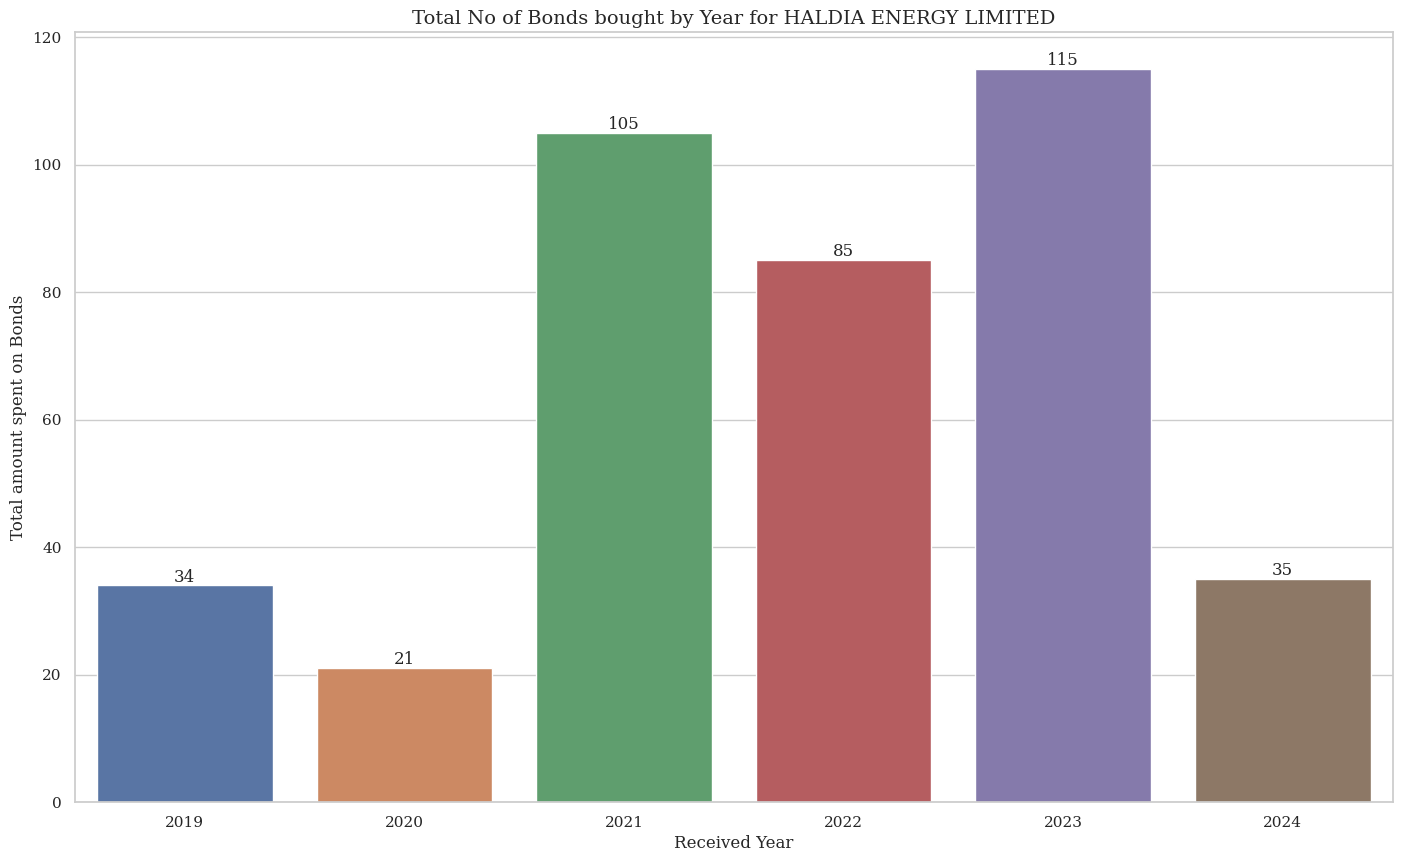

In [220]:
# Create the count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg_df, x='Year', y='Denominations_count')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total No of Bonds bought by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- this bar graph has representing the total number of bonds bought by year for HALDIA ENERGY LIMITED
- FROM 2019 TO 2024 the amount has spent more in the year of 2022
- while comparing the years the bonds are received lowest in 2019

In [221]:
# Group by 'Year' and 'PartyName', and aggregate 'Denomination' using custom names for the aggregated columns
company_amt_agg_partyname_df = company_name_df.groupby(['Year', 'PartyName']).agg(
    Denominations_sum=('Denomination', 'sum'),
    Denominations_count=('Denomination', 'count')
).reset_index()

company_amt_agg_partyname_df

Year                                PartyName  Denominations_sum  \
0  2019                   BHARATIYA JANATA PARTY        160000000.0   
1  2020             ALL INDIA TRINAMOOL CONGRESS        210000000.0   
2  2021             ALL INDIA TRINAMOOL CONGRESS        550000000.0   
3  2021                   BHARATIYA JANATA PARTY        350000000.0   
4  2021  PRESIDENT, ALL INDIA CONGRESS COMMITTEE        150000000.0   
5  2022             ALL INDIA TRINAMOOL CONGRESS        750000000.0   
6  2022                   BHARATIYA JANATA PARTY        100000000.0   
7  2023             ALL INDIA TRINAMOOL CONGRESS        950000000.0   
8  2023                   BHARATIYA JANATA PARTY        200000000.0   
9  2024             ALL INDIA TRINAMOOL CONGRESS        350000000.0   

   Denominations_count  
0                   34  
1                   21  
2                   55  
3                   35  
4                   15  
5                   75  
6                   10  
7                   95  
8                   20  
9                   35

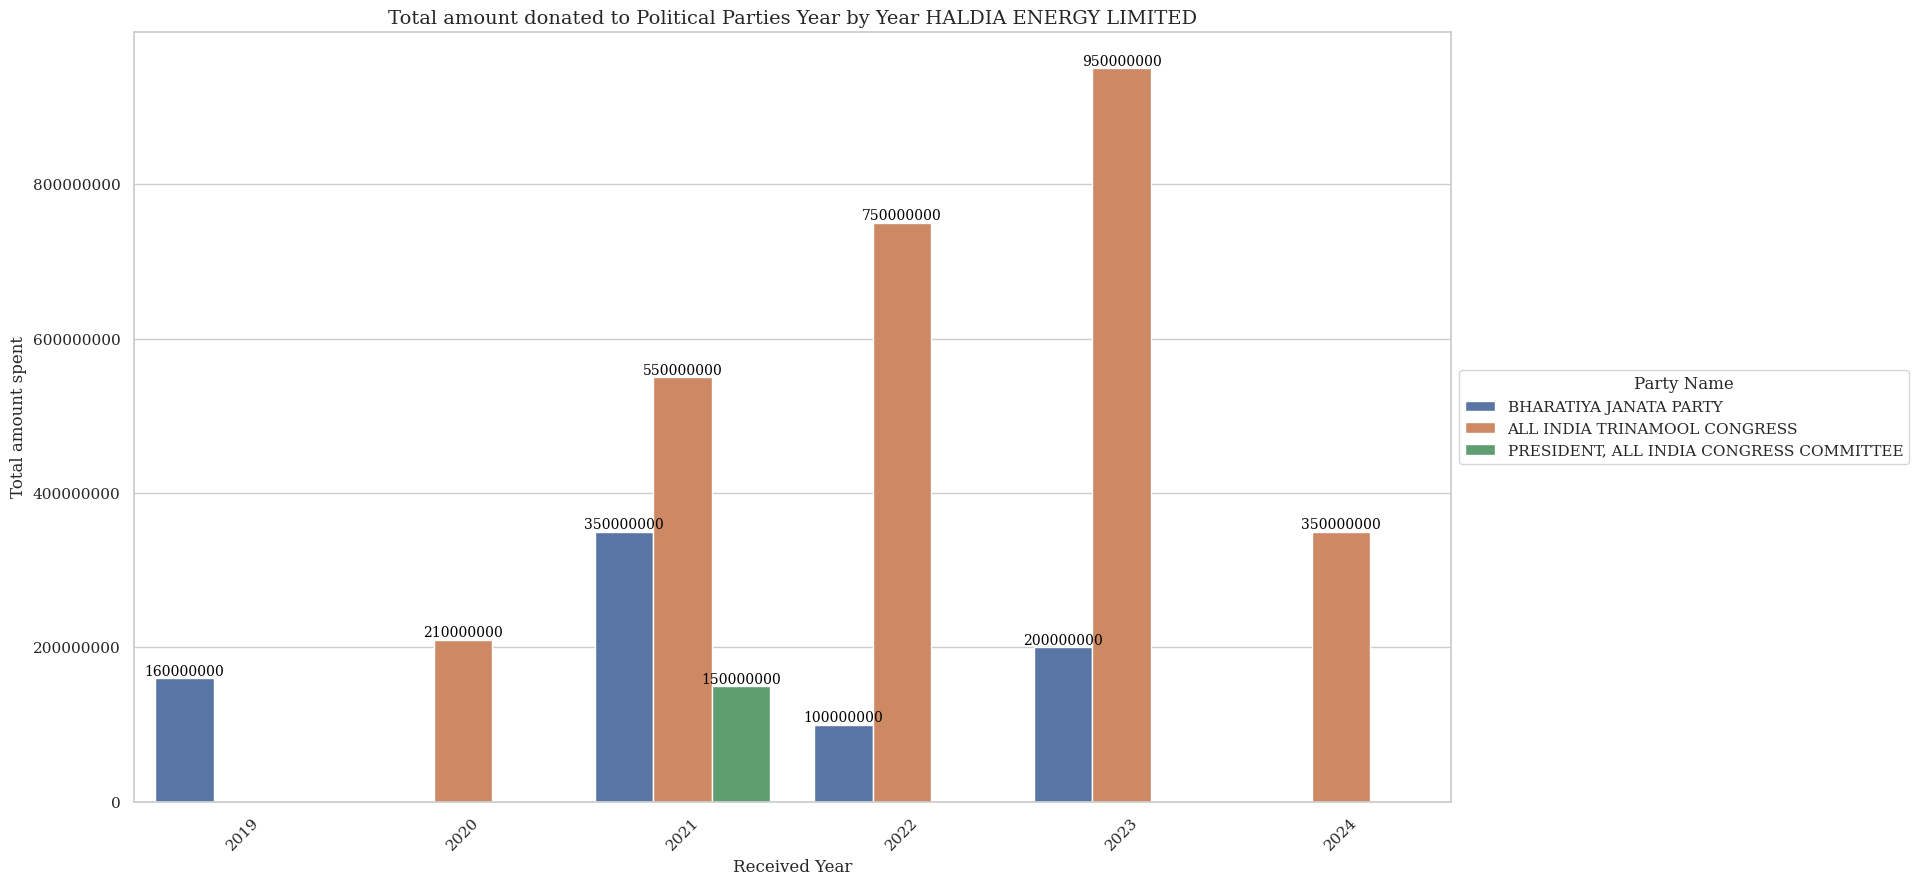

In [222]:
# Create the grouped bar plot
plt.figure(figsize=(17, 10))
ax = sns.barplot(data=company_amt_agg_partyname_df, x='Year', y='Denominations_sum', hue='PartyName')

# Iterate over each container (group of bars)
for container in ax.containers:
    # Iterate over each bar in the container and add labels
    for bar in container:
        # Get the height of the bar
        height = bar.get_height()
        # Add the value label to the bar
        ax.annotate(f'{height:.0f}', 
                    (bar.get_x() + bar.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent', fontsize=12)
plt.title(f'Total amount donated to Political Parties Year by Year {company_name}', fontsize=14)

# Rotate y-axis labels by -45 degrees for better readability
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Move legend to the right and outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Party Name')

# Show the plot
plt.show()

- the bar graph that shows the total amount donated to political parties year by year HALDIA ENERGY LIMITED
- the highest total amount spent for the ALL INDIA TRINAMOOL CONGRESS
- HALDIA ENERGY LIMITED has spent bonds at one time to the party of president all india congress committee

In [223]:
# Due to some reason some of the sankeys are not working dirtectly but this problem is resolved when we are exporting the data frame to a csv file and recreating
# again as a new dataframe --> as of now I don't the reason but as a bandaid solution I am applying thisabs 

#exporting to a csv file 
company_name_df.to_csv("temp_files/check.csv")
# Reimporting as a dataframe 
company_name_df = pd.read_csv('temp_files/check.csv')

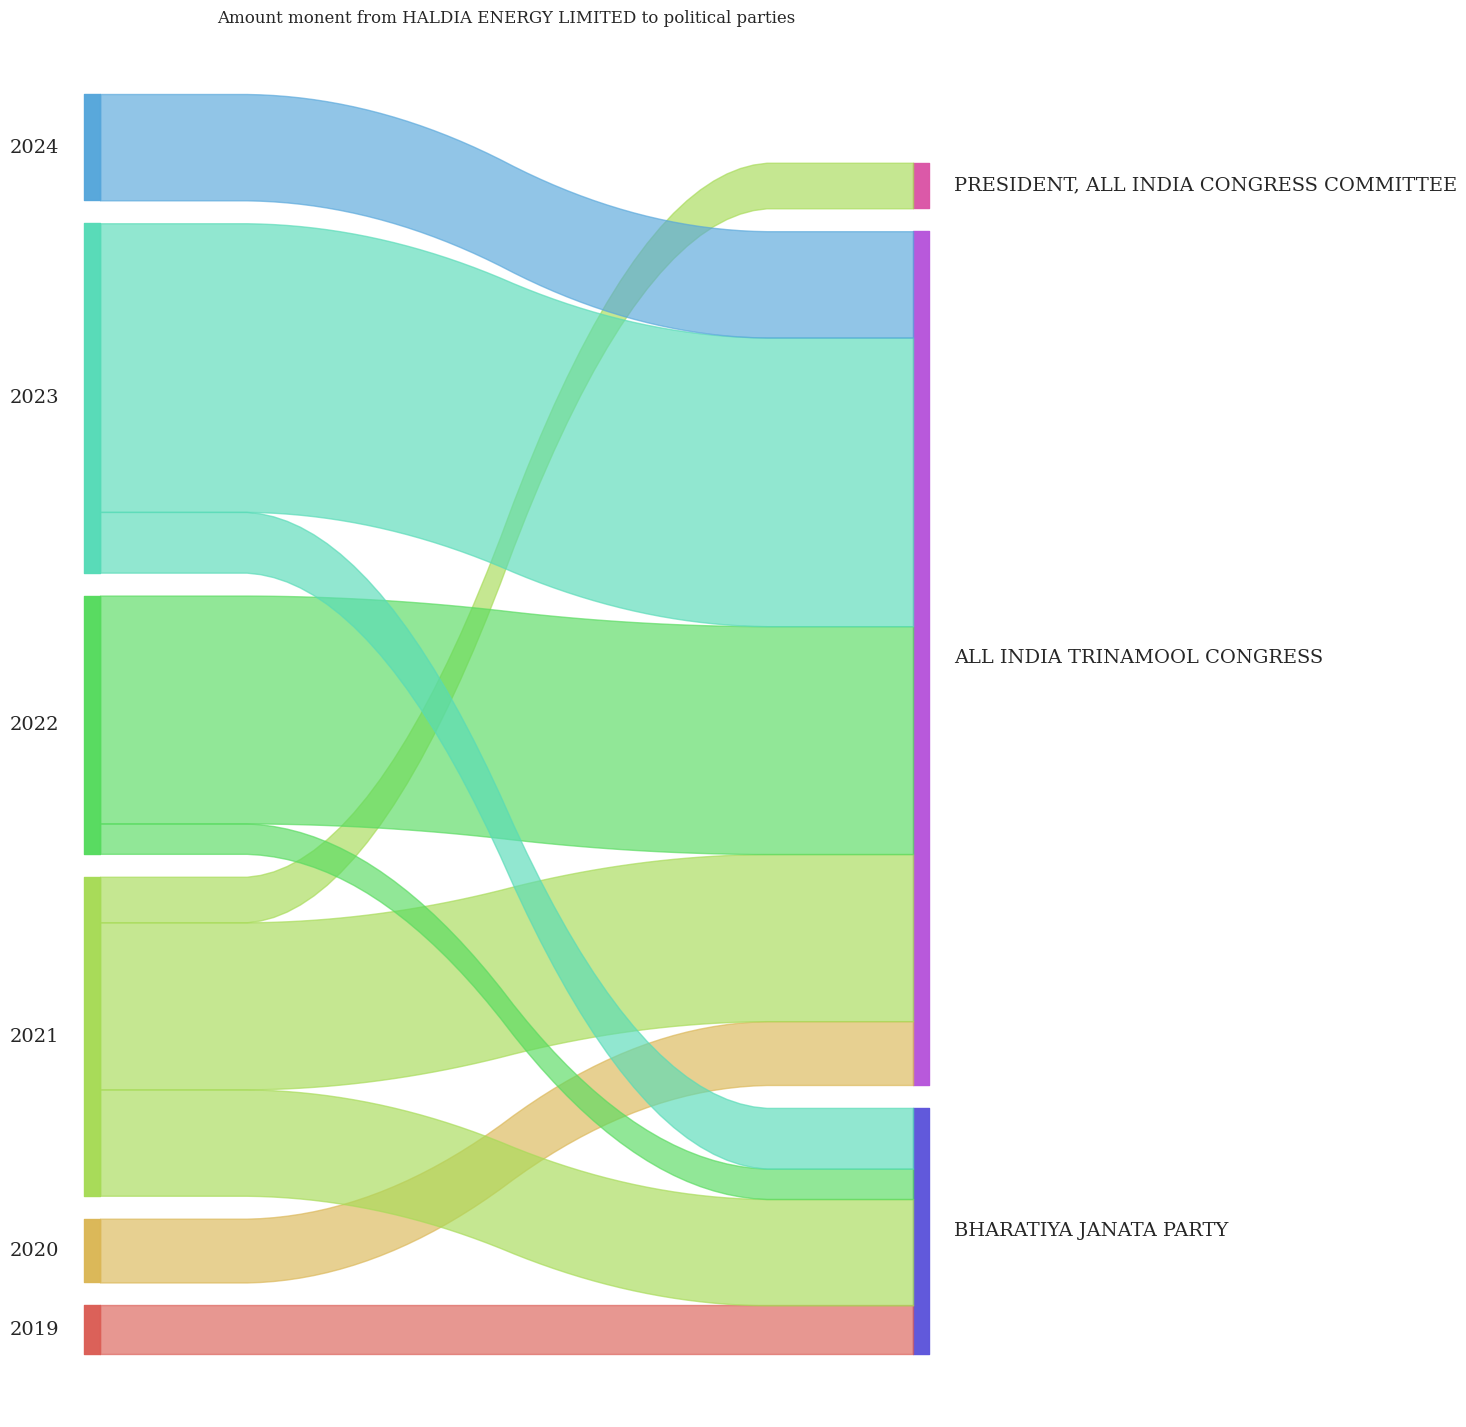

In [224]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

- this sankey chart representing the amount monent from HALDIA ENERGY LIMITED
- from the year of 2019 to 2024 the all india trinamool congress has recee4ived highest denominations


In [225]:
# Removing the file I created which is of no use
os.remove("temp_files/check.csv")

# Political Parties Denomonation Analyisis

In [226]:
reciver_df.columns

Index(['Sno', 'DateEncashment', 'PartyName', 'AccountNum', 'Prefix',
       'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller',
       'encashedyear', 'State', 'Branch Code No.', 'Branch City'],
      dtype='object')

In [228]:
political_funds = reciver_df[['DateEncashment','PartyName','Denominations']]
# Create a new column 'ReceivedYear' based on the year component of 'DateEncashment'
political_funds['ReceivedYear'] = political_funds['DateEncashment'].dt.year
political_funds = political_funds.groupby(['PartyName','ReceivedYear']).agg(
    min_Denominations=('Denominations', 'min'),
    max_Denominations=('Denominations', 'max'),
    sum_Denominations=('Denominations', 'sum'),
    count_Denominations=('Denominations', 'count')).reset_index()
political_funds = political_funds.sort_values('PartyName')
political_funds

PartyName  ReceivedYear  \
0                                     AAM AADMI PARTY          2019   
1                                     AAM AADMI PARTY          2020   
2                                     AAM AADMI PARTY          2021   
3                                     AAM AADMI PARTY          2022   
4                                     AAM AADMI PARTY          2023   
5                            ADYAKSHA SAMAJVADI PARTY          2019   
6                            ADYAKSHA SAMAJVADI PARTY          2022   
7            ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM          2019   
13                       ALL INDIA TRINAMOOL CONGRESS          2024   
12                       ALL INDIA TRINAMOOL CONGRESS          2023   
11                       ALL INDIA TRINAMOOL CONGRESS          2022   
10                       ALL INDIA TRINAMOOL CONGRESS          2021   
9                        ALL INDIA TRINAMOOL CONGRESS          2020   
8                        ALL INDIA TRINAMOOL CONGRESS          2019   
14                             BHARAT RASHTRA SAMITHI          2019   
15                             BHARAT RASHTRA SAMITHI          2021   
16                             BHARAT RASHTRA SAMITHI          2022   
17                             BHARAT RASHTRA SAMITHI          2023   
23                             BHARATIYA JANATA PARTY          2024   
22                             BHARATIYA JANATA PARTY          2023   
21                             BHARATIYA JANATA PARTY          2022   
20                             BHARATIYA JANATA PARTY          2021   
19                             BHARATIYA JANATA PARTY          2020   
18                             BHARATIYA JANATA PARTY          2019   
24                    BIHAR PRADESH JANTA DAL(UNITED)          2019   
25                    BIHAR PRADESH JANTA DAL(UNITED)          2020   
26                    BIHAR PRADESH JANTA DAL(UNITED)          2022   
30                                    BIJU JANATA DAL          2022   
29                                    BIJU JANATA DAL          2021   
31                                    BIJU JANATA DAL          2023   
27                                    BIJU JANATA DAL          2019   
28                                    BIJU JANATA DAL          2020   
32                    DRAVIDA MUNNETRA KAZHAGAM (DMK)          2019   
33                    DRAVIDA MUNNETRA KAZHAGAM (DMK)          2020   
34                    DRAVIDA MUNNETRA KAZHAGAM (DMK)          2021   
35                    DRAVIDA MUNNETRA KAZHAGAM (DMK)          2022   
36                    DRAVIDA MUNNETRA KAZHAGAM (DMK)          2023   
37                    DRAVIDA MUNNETRA KAZHAGAM (DMK)          2024   
38                                  GOA FORWARD PARTY          2022   
39              JAMMU AND KASHMIR NATIONAL CONFERENCE          2019   
42                                     JANASENA PARTY          2024   
41                                     JANASENA PARTY          2023   
40                                     JANASENA PARTY          2022   
43                             JANATA DAL ( SECULAR )          2019   
44                             JANATA DAL ( SECULAR )          2023   
45                             JHARKHAND MUKTI MORCHA          2019   
46                             JHARKHAND MUKTI MORCHA          2023   
47                      MAHARASHTRAWADI GOMNTAK PARTY          2022   
48     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH          2019   
49     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH          2021   
50     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH          2022   
51     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH          2023   
57            PRESIDENT, ALL INDIA CONGRESS COMMITTEE          2024   
56            PRESIDENT, ALL INDIA CONGRESS COMMITTEE          2023   
55            PRESIDENT, ALL INDIA CONGRESS COMMITTEE          2022   
52            PRESIDENT, ALL INDIA CONGRESS COMMITTEE          2019 

In [229]:
political_party_list = list(political_funds['PartyName'].unique())
political_party_list

['AAM AADMI PARTY',
 'ADYAKSHA SAMAJVADI PARTY',
 'ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM',
 'ALL INDIA TRINAMOOL CONGRESS',
 'BHARAT RASHTRA SAMITHI',
 'BHARATIYA JANATA PARTY',
 'BIHAR PRADESH JANTA DAL(UNITED)',
 'BIJU JANATA DAL',
 'DRAVIDA MUNNETRA KAZHAGAM (DMK)',
 'GOA FORWARD PARTY',
 'JAMMU AND KASHMIR NATIONAL CONFERENCE',
 'JANASENA PARTY',
 'JANATA DAL ( SECULAR )',
 'JHARKHAND MUKTI MORCHA',
 'MAHARASHTRAWADI GOMNTAK PARTY',
 'NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH',
 'PRESIDENT, ALL INDIA CONGRESS COMMITTEE',
 'RASHTRIYA JANTA DAL',
 'SHIROMANI AKALI DAL',
 'SHIVSENA',
 'SIKKIM DEMOCRATIC FRONT',
 'SIKKIM KRANTIKARI MORCHA',
 'TELUGU DESAM PARTY',
 'YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CONGRESS PARTY)']

## AAM AADMI PARTY

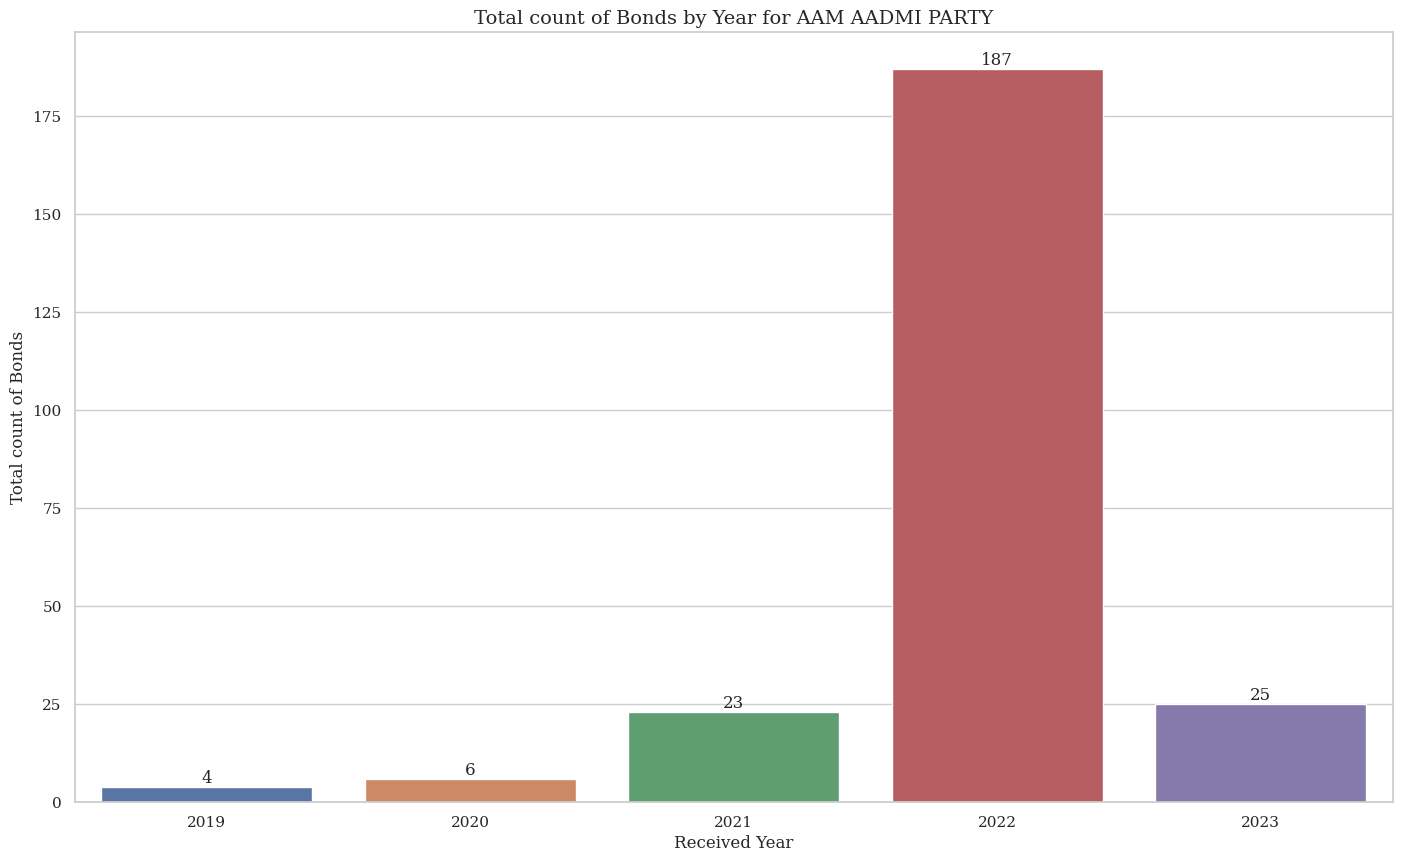

In [230]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name = 'AAM AADMI PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- This graph is representing the total count of bonds by year for AAM AADMI PARTY 
- The AAM AADMI PARTY has received highest count of bonds in the year of 2022
- The AAM AADMI PARTY has received lowest bonds in the year of 2019

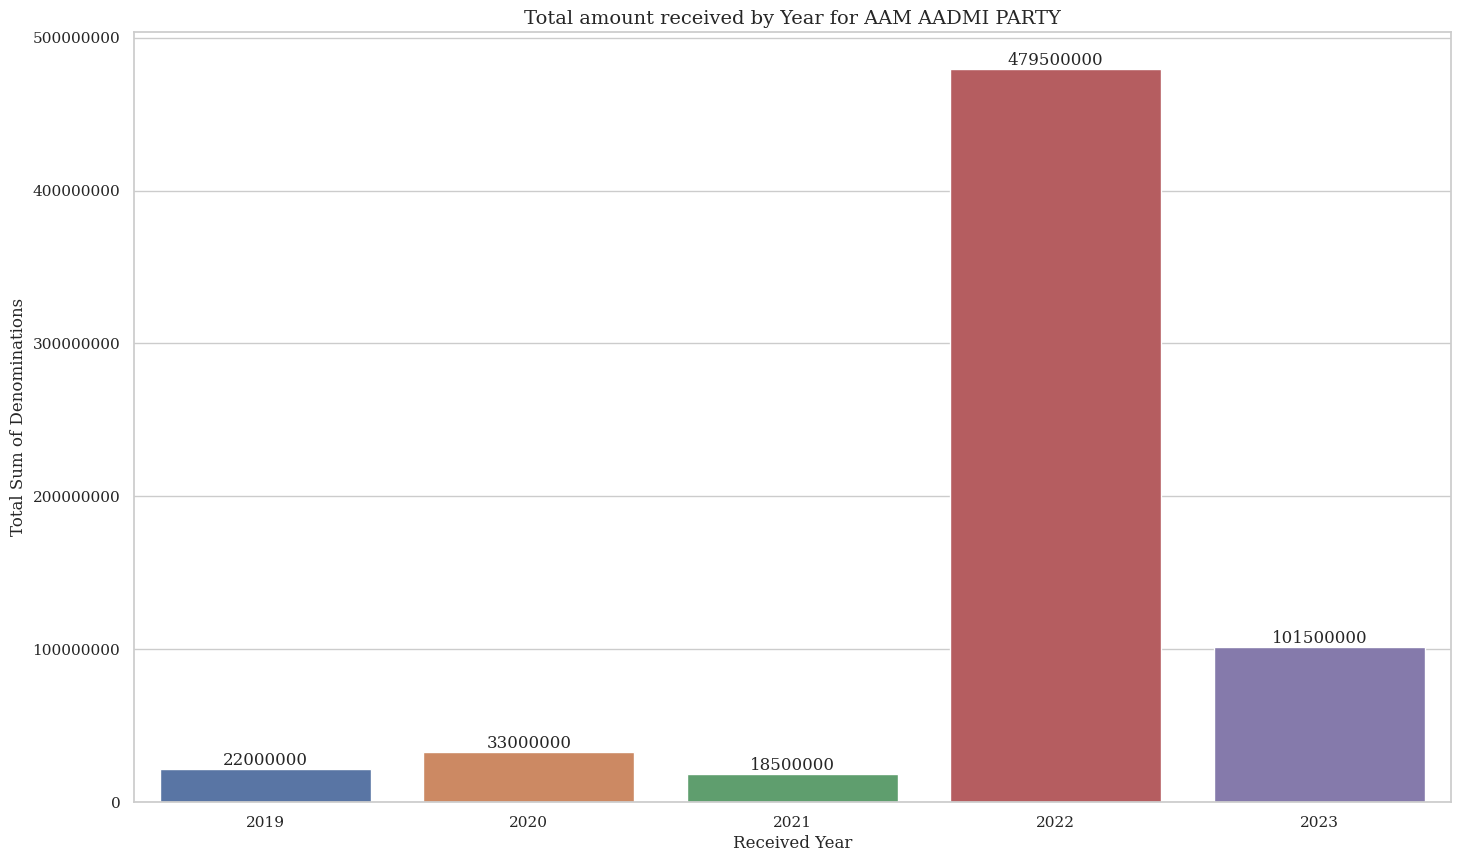

In [231]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name = 'AAM AADMI PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- This graph is representing the total amount received by year for AAM AADMI PARTY
- the AAM AADMI PARTY has received highest denomination in the year of 2022
- while we comparing with the other years the denominations has received lowest in 2021

In [232]:
filtered_df

PartyName  ReceivedYear  min_Denominations  max_Denominations  \
0  AAM AADMI PARTY          2019            1000000           10000000   
1  AAM AADMI PARTY          2020            1000000           10000000   
2  AAM AADMI PARTY          2021             100000           10000000   
3  AAM AADMI PARTY          2022             100000           10000000   
4  AAM AADMI PARTY          2023             100000           10000000   

   sum_Denominations  count_Denominations  
0           22000000                    4  
1           33000000                    6  
2           18500000                   23  
3          479500000                  187  
4          101500000                   25

## ADYAKSHA SAMAJVADI PARTY

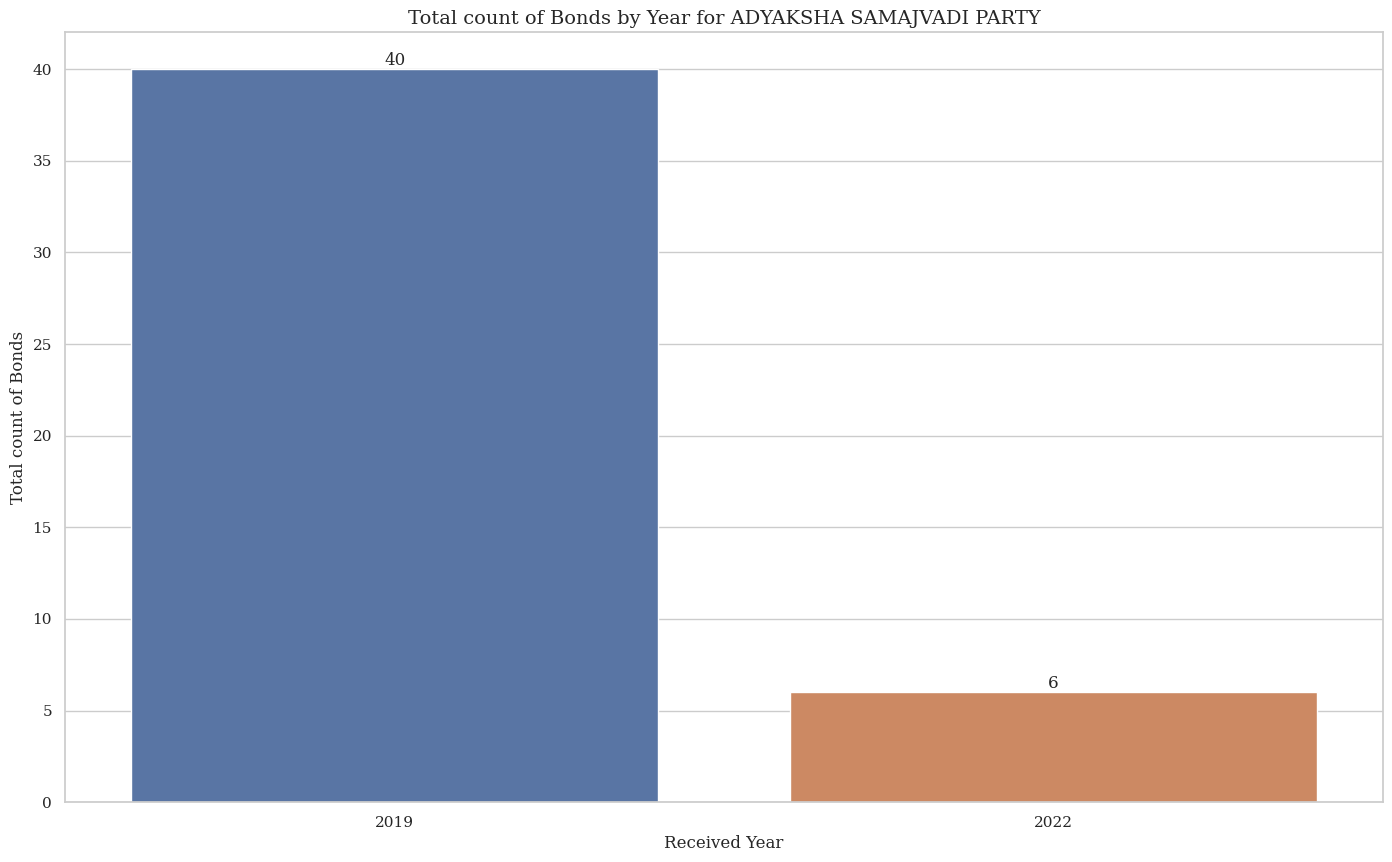

In [234]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'ADYAKSHA SAMAJVADI PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- This bar graph is representing the total count of bonds by year for ADYAKSHA SAMAJVADI PARTY
- The highest total count of bonds are received in the year of 2019 

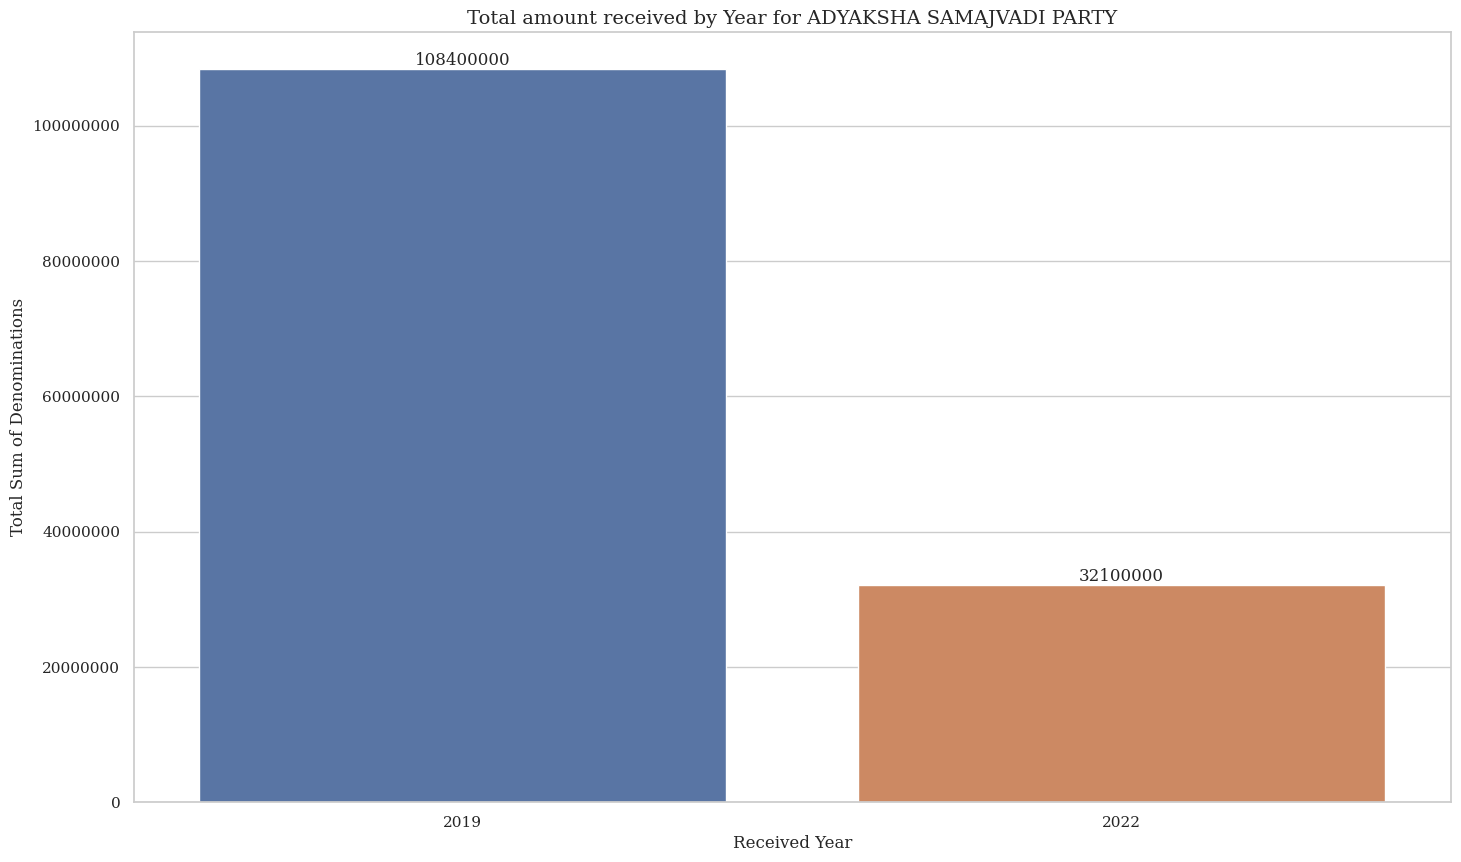

In [235]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'ADYAKSHA SAMAJVADI PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- this graph is representing the the total mount received by year for ADYAKSHA SAMAJVADI PARTY
- the ADYAKSHA SAMAJVADHI PARTY has received denomination in 2019 and 2022 
- in 2019 it has received highest denomination compare with 2022

In [236]:
filtered_df

PartyName  ReceivedYear  min_Denominations  \
5  ADYAKSHA SAMAJVADI PARTY          2019             100000   
6  ADYAKSHA SAMAJVADI PARTY          2022             100000   

   max_Denominations  sum_Denominations  count_Denominations  
5           10000000          108400000                   40  
6           10000000           32100000                    6

## 'ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM'

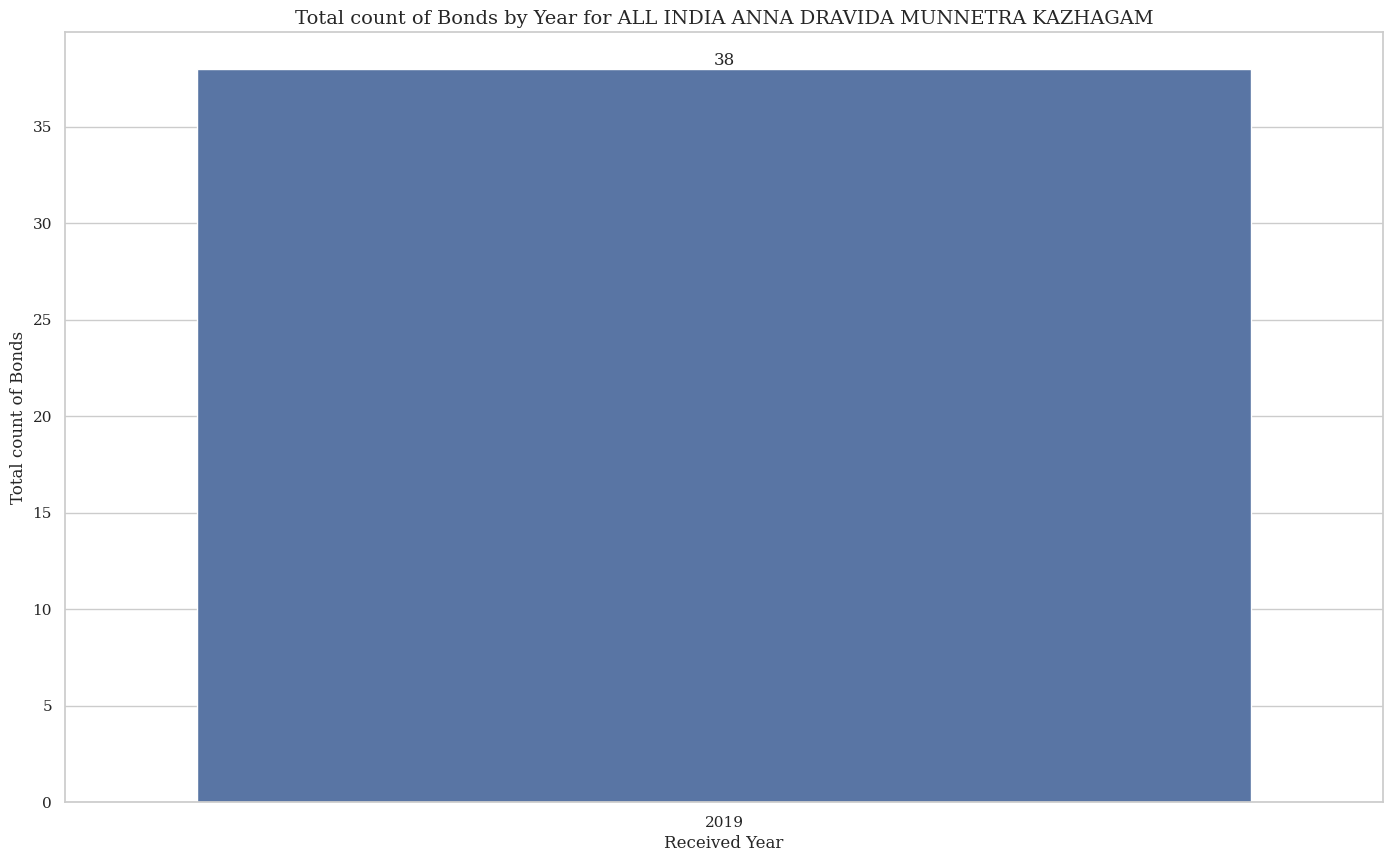

In [237]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- This graph is illustrate the total count of bonds by year for ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGHAM
- thus party has received the total bonds in the year of 2019 at once. it has not taken bonds in other years

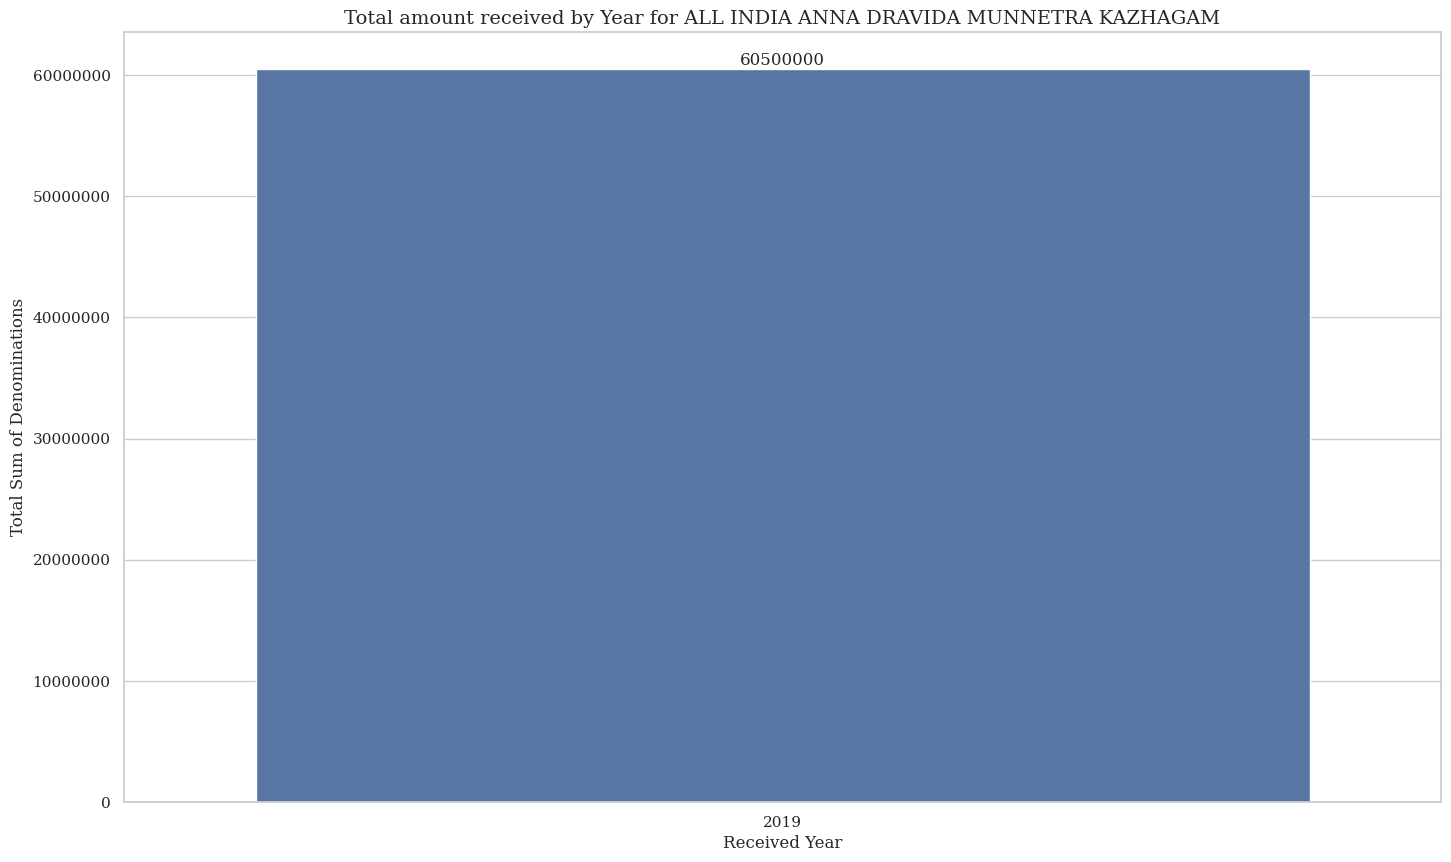

In [238]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- This graph shows that the total amount received by year for ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM
- this party has received total denominations in the year of 2019 only its not taken denominations repeatedly

In [239]:
filtered_df

PartyName  ReceivedYear  min_Denominations  \
7  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM          2019             100000   

   max_Denominations  sum_Denominations  count_Denominations  
7           10000000           60500000                   38

## 'ALL INDIA TRINAMOOL CONGRESS'

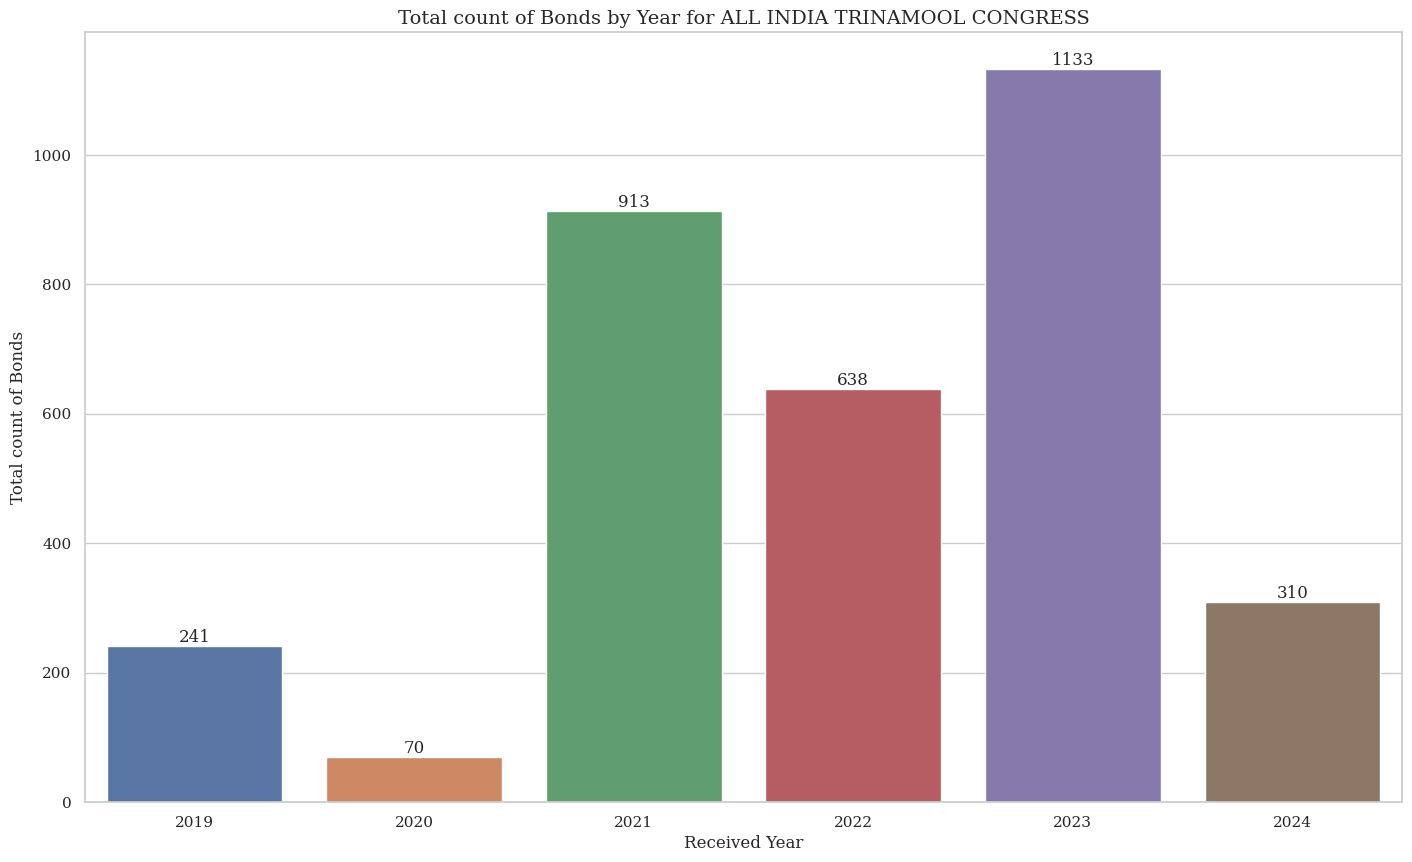

In [240]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'ALL INDIA TRINAMOOL CONGRESS'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- this bar graph has reprenting the total count of bonds by year for ALL INDIA TRINAMOOL CONGRESS
- the thrinamool congress party has received anually denomination with comparing other parties 
- in the year of 2023 this party has received highest to denomination comparing with other years

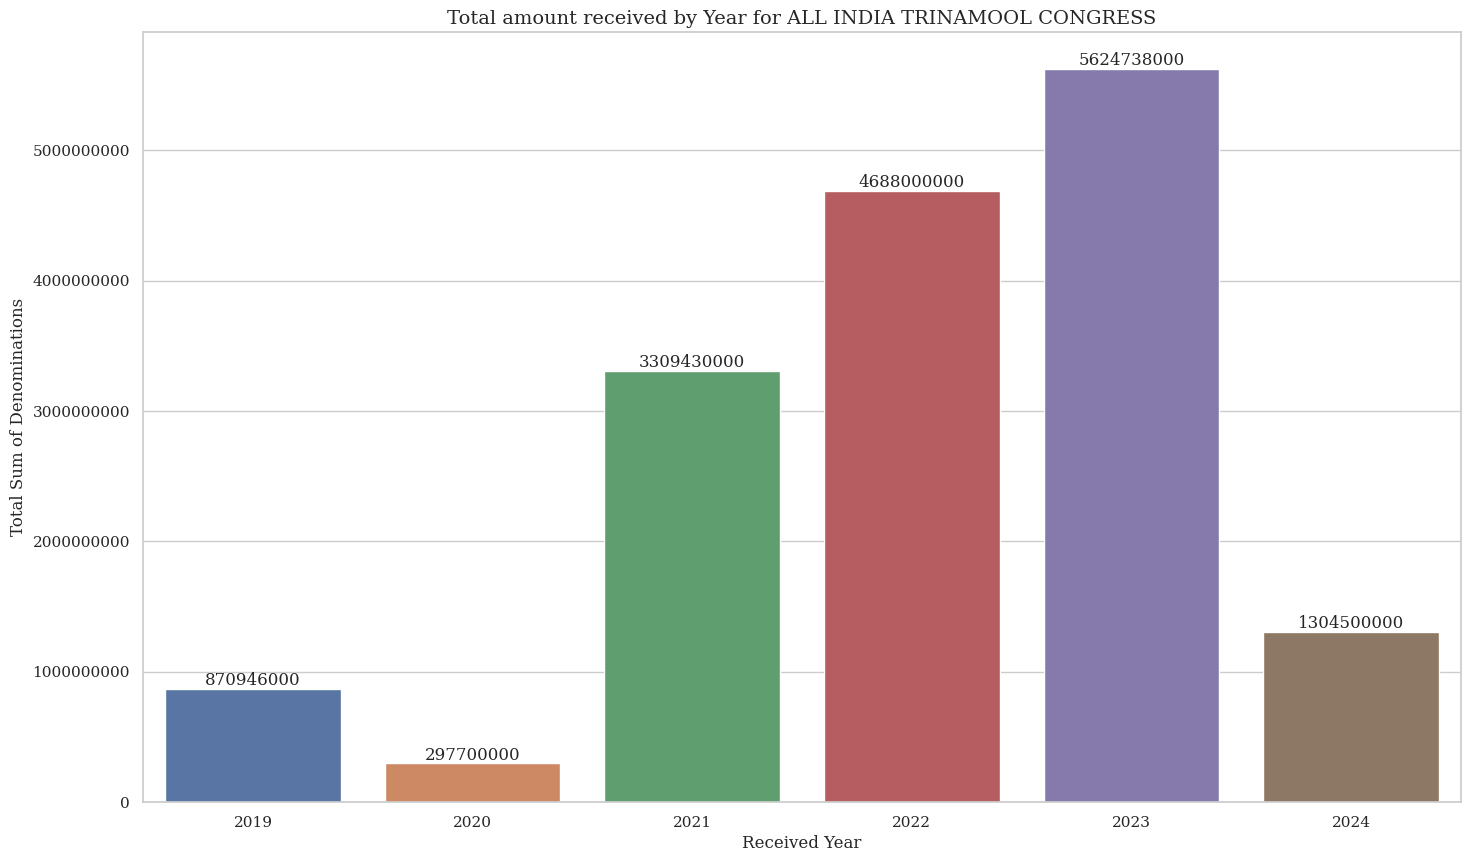

In [241]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'ALL INDIA TRINAMOOL CONGRESS'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- this bar graph has representing the total amount received by year for ALL INDIA TRINAMOOL CONGRESS
-  it has received anually denomination comparing with other parties
- 2022 this party has received highest denomination and it is incresed by anually but in the 2024 it has decresed in large amount of denominations

In [242]:
filtered_df

PartyName  ReceivedYear  min_Denominations  \
13  ALL INDIA TRINAMOOL CONGRESS          2024             100000   
12  ALL INDIA TRINAMOOL CONGRESS          2023               1000   
11  ALL INDIA TRINAMOOL CONGRESS          2022             100000   
10  ALL INDIA TRINAMOOL CONGRESS          2021              10000   
9   ALL INDIA TRINAMOOL CONGRESS          2020             100000   
8   ALL INDIA TRINAMOOL CONGRESS          2019               1000   

    max_Denominations  sum_Denominations  count_Denominations  
13           10000000         1304500000                  310  
12           10000000         5624738000                 1133  
11           10000000         4688000000                  638  
10           10000000         3309430000                  913  
9            10000000          297700000                   70  
8            10000000          870946000                  241

## 'BHARAT RASHTRA SAMITHI'

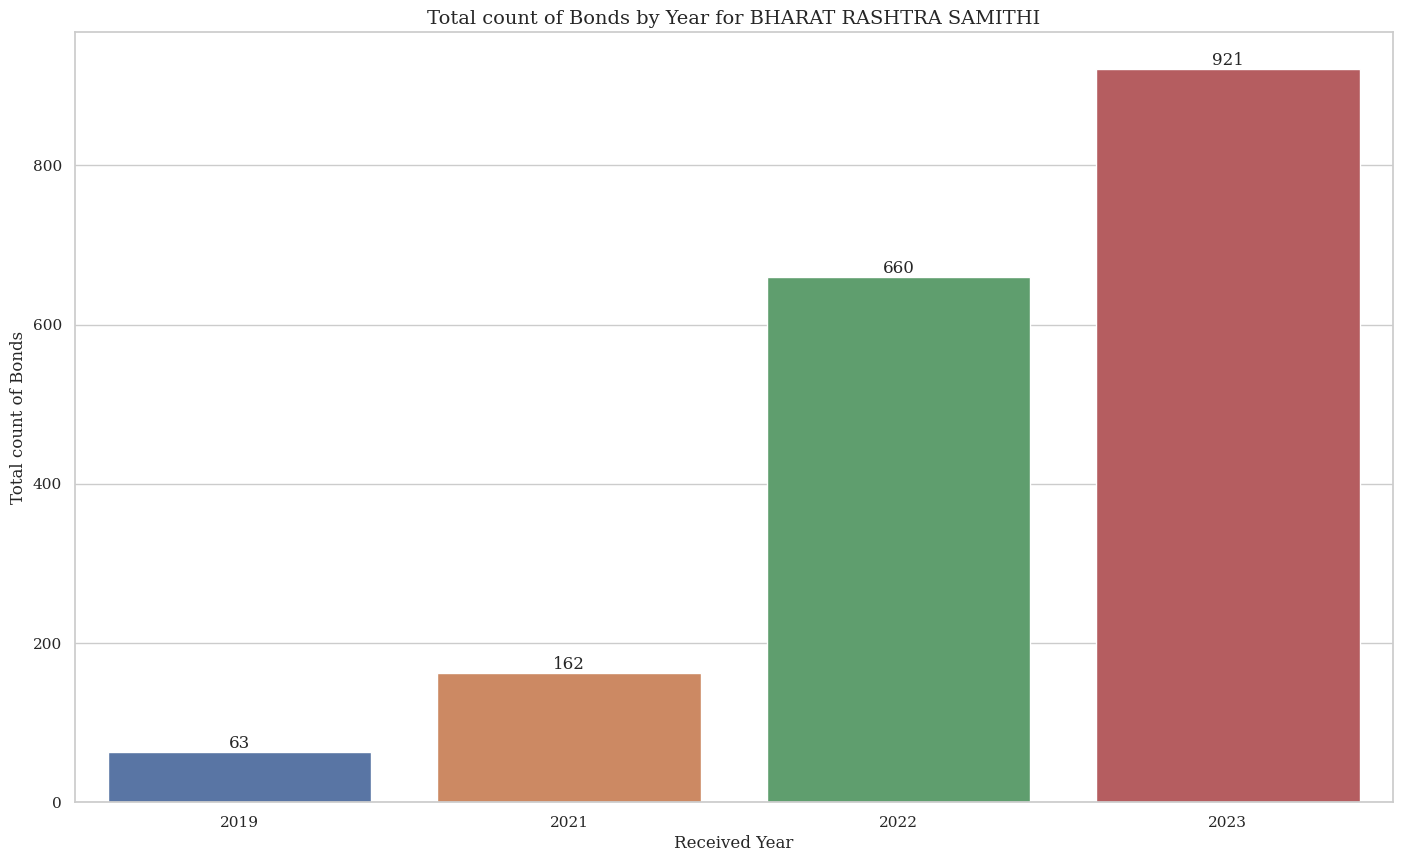

In [243]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'BHARAT RASHTRA SAMITHI'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- this graph shows that the total count of bonds by year for BHARAT RASHTRA SAMITHI
- this party has recevied highest bonds in the year 2023 and it is constantly incresed
- in the year 2020 it has not received any bonds  

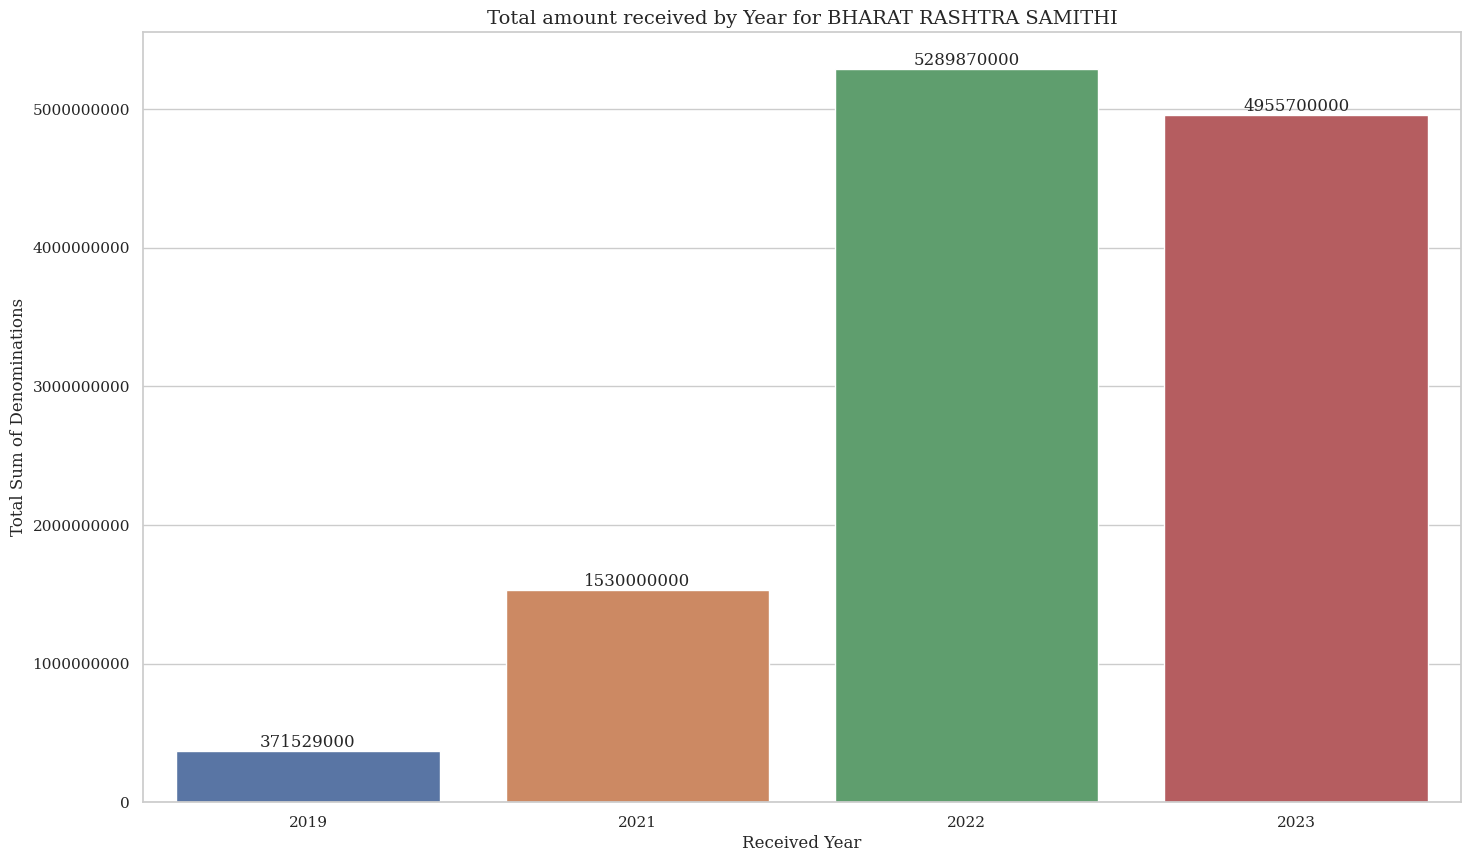

In [244]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'BHARAT RASHTRA SAMITHI'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- This graph illustrate the total amount received by year for BHARAT RASTRA SAMITHI
- this party has received highest denomination in the year of 2023 and it can constantly increased and it might not be received denomination in the year of 2020 

In [245]:
filtered_df

PartyName  ReceivedYear  min_Denominations  \
14  BHARAT RASHTRA SAMITHI          2019               1000   
15  BHARAT RASHTRA SAMITHI          2021            1000000   
16  BHARAT RASHTRA SAMITHI          2022              10000   
17  BHARAT RASHTRA SAMITHI          2023             100000   

    max_Denominations  sum_Denominations  count_Denominations  
14           10000000          371529000                   63  
15           10000000         1530000000                  162  
16           10000000         5289870000                  660  
17           10000000         4955700000                  921

## 'BHARATIYA JANATA PARTY'

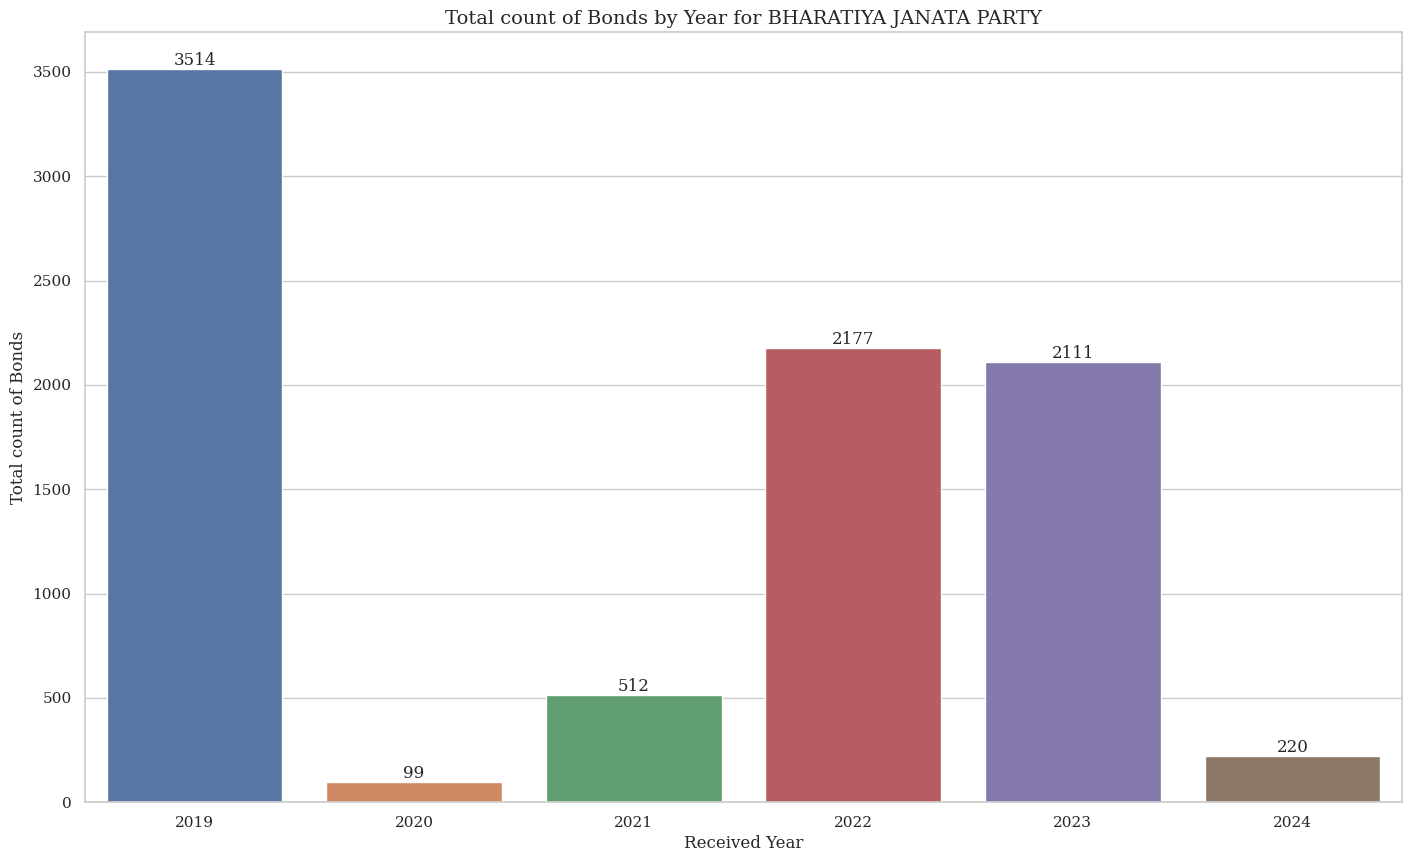

In [246]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'BHARATIYA JANATA PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- this bar graph shows that the total count of bonds by year for BHARATIYA JANATA PARTY
- while we calculating all years this party has received the highest count of bonds in the year of 2019
- comparing with other parties the BHARATIYA JANATA PARTY has received highest bonds

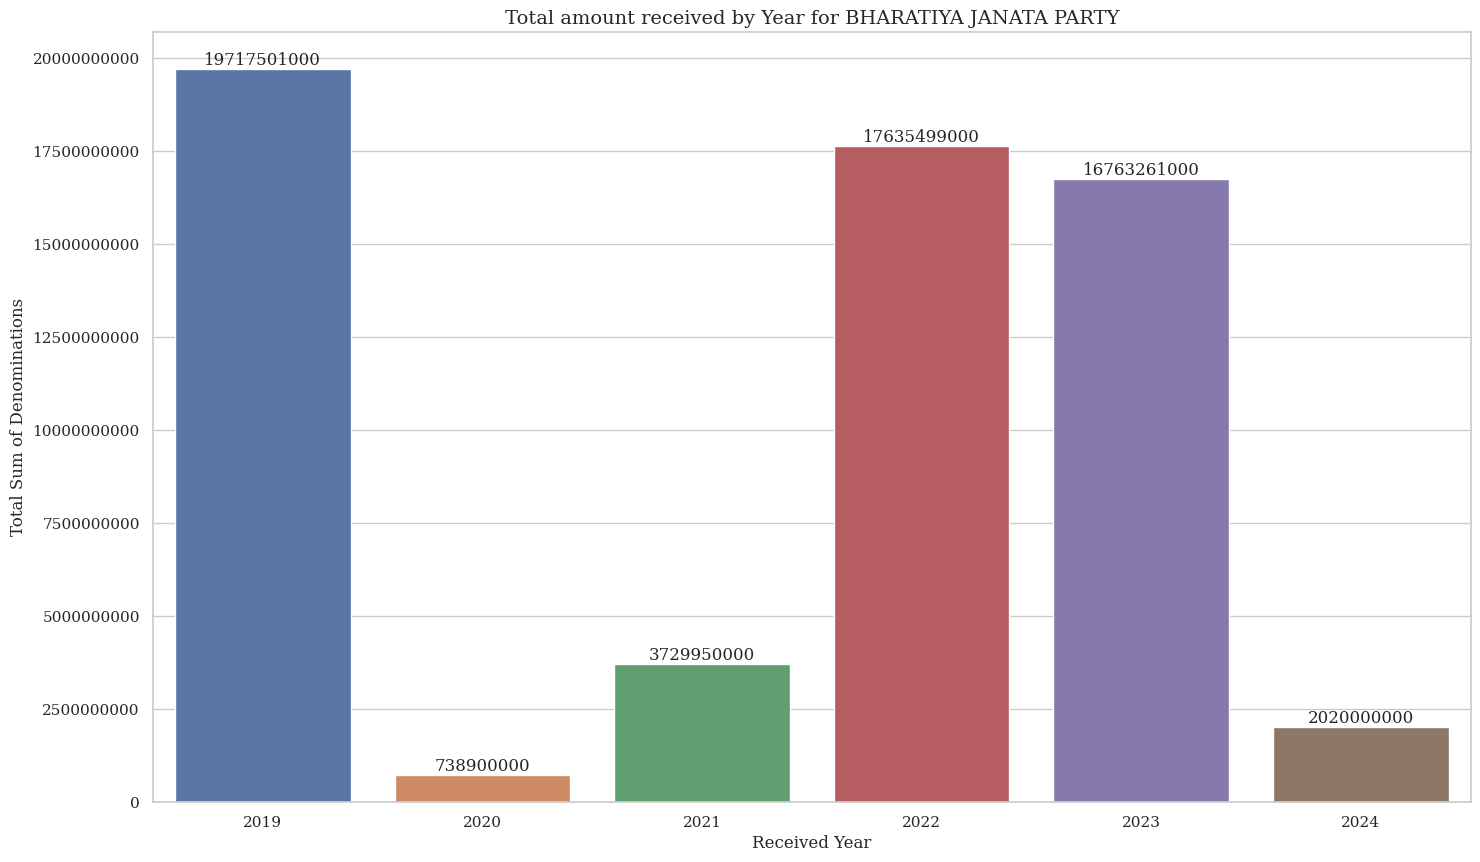

In [247]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'BHARATIYA JANATA PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

- this bar graph is representing the total amount received by year for BHARATIYA JANATA PARTY
- this party has received highest denominations in the year of 2019
- comparing with other parties the BHARATIYA JANATA PARTY has received highest denominations

In [248]:
filtered_df

PartyName  ReceivedYear  min_Denominations  \
23  BHARATIYA JANATA PARTY          2024            1000000   
22  BHARATIYA JANATA PARTY          2023               1000   
21  BHARATIYA JANATA PARTY          2022               1000   
20  BHARATIYA JANATA PARTY          2021              10000   
19  BHARATIYA JANATA PARTY          2020             100000   
18  BHARATIYA JANATA PARTY          2019               1000   

    max_Denominations  sum_Denominations  count_Denominations  
23           10000000         2020000000                  220  
22           10000000        16763261000                 2111  
21           10000000        17635499000                 2177  
20           10000000         3729950000                  512  
19           10000000          738900000                   99  
18           10000000        19717501000                 3514

In [252]:
alldata_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination', 'State_x',
       'Branch Code No._x', 'Branch City_x', 'State_y', 'Branch Code No._y',
       'Branch City_y', 'State', 'Branch Code No.', 'Branch City'],
      dtype='object')

In [255]:
perfect_data.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination'],
      dtype='object')

In [267]:
perfect_data.head()

Urn JournalDate PurchaseDate ExpiryDate  \
0  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
3  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
4  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  PayBranchCode_x  IssueTeller  \
0  A B C INDIA LIMITED     TL     11448.0              1.0    5899230.0   
1  A B C INDIA LIMITED     TL     11447.0              1.0    5899230.0   
2  A B C INDIA LIMITED     TL     11441.0              1.0    5899230.0   
3  A B C INDIA LIMITED     OL      1113.0              1.0    5899230.0   
4  A B C INDIA LIMITED     OL      1118.0              1.0    5899230.0   

  unique_key DateEncashment               PartyName   AccountNum  \
0    TL11448     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
1    TL11447     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
2    TL11441     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
3     OL1113     2019-04-25  BHARATIYA JANATA PARTY  *******8244   
4     OL1118     2019-04-25  BHARATIYA JANATA PARTY  *******8244   

   PayBranchCode_y  PayTeller  encashedyear  Denomination State_x  \
0            691.0  3300196.0        2019.0     1000000.0   Delhi   
1            691.0  3300196.0        2019.0     1000000.0   Delhi   
2            691.0  3300196.0        2019.0     1000000.0   Delhi   
3            691.0  3300196.0        2019.0      100000.0   Delhi   
4            691.0  3300196.0        2019.0      100000.0   Delhi   

   Branch Code No._x Branch City_x                           State_y  \
0                691     New Delhi  West Bengal and Andaman& Nicobar   
1                691     New Delhi  West Bengal and Andaman& Nicobar   
2                691     New Delhi  West Bengal and Andaman& Nicobar   
3                691     New Delhi  West Bengal and Andaman& Nicobar   
4                691     New Delhi  West Bengal and Andaman& Nicobar   

   Branch Code No._y Branch City_y  
0                  1       Kolkata  
1                  1       Kolkata  
2                  1       Kolkata  
3                  1       Kolkata  
4                  1       Kolkata

In [265]:
bankdata.columns

Index(['State', 'Branch Code No.', 'Branch City'], dtype='object')

# Sankey 

In [262]:
perfect_data = pd.merge(perfect_data, bankdata, how="inner", left_on="PayBranchCode_x", right_on= "Branch Code No.")

In [259]:
perfect_data = pd.merge(perfect_data, bankdata, how="inner", left_on="PayBranchCode_y", right_on= "Branch Code No.")

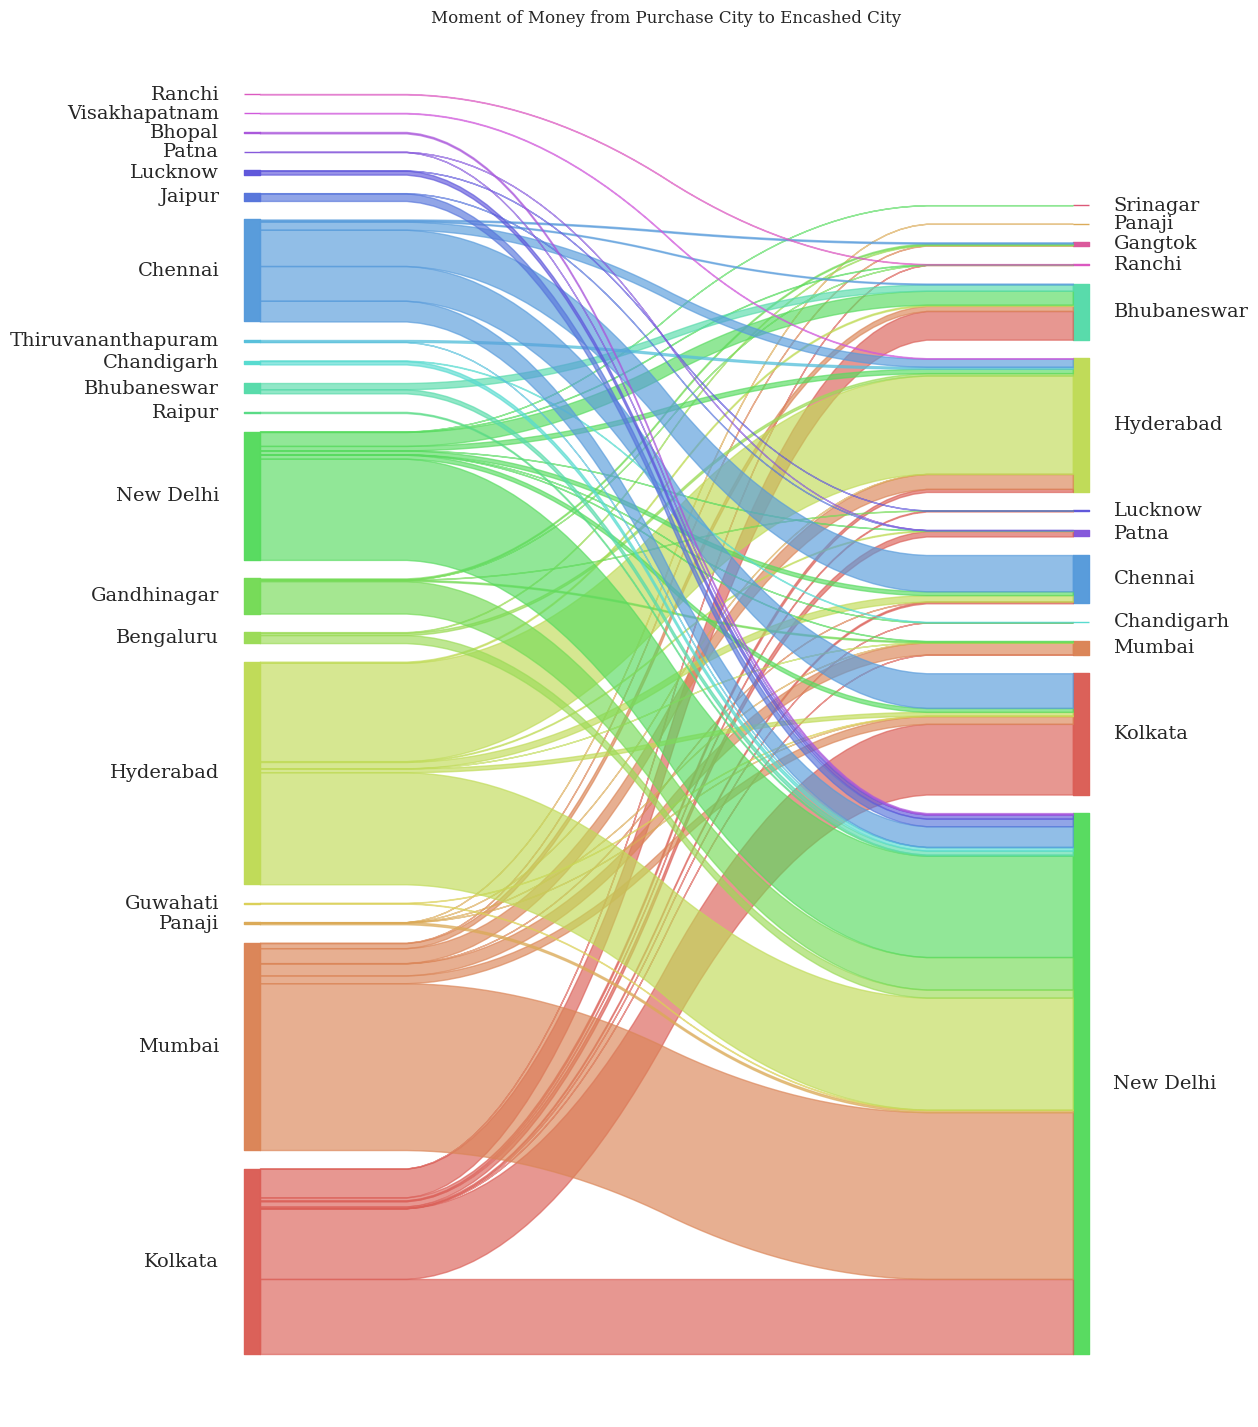

In [270]:
# Sankey chart from matplotlib
sankey(
    left        = perfect_data['Branch City_y'],
    right       = perfect_data['Branch City_x'],
    leftWeight  = perfect_data['Denomination'],
    rightWeight = perfect_data['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title('Moment of Money from Purchase City to Encashed City') 
plt.show() 

In [1]:
x = 1  
while True:  
    if x % 5 = = 0:  
        break  
    print(x)  
    x + = 1

SyntaxError: invalid syntax (3006922550.py, line 3)